In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import warnings
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings('ignore')

data = pd.read_csv(r'/Users/henry/Desktop/train.csv')
ID = data['id']

#Drop unnecessary columns
data = data.iloc[:,1:]

data['log_loss'] = np.log(data['loss'])

seed = 7
test_size = 0.2
stepsize = 10000

In [2]:
#GetDummies

T_D = []
MAE_D = []
N_D = []

for i in range(1, 19):
    print(i)
    n_data = i*stepsize
    N_D.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    dummies_X = np.array(pd.get_dummies(cat_X))
    new_X = np.c_[dummies_X, cont_X]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(new_X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = CatBoostRegressor()
    
    model.fit(X_train,y_train,eval_set=(X_test, y_test))

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    MAE_D.append(mae)

    Time = time.time() - start_time
    T_D.append(Time)


1
Learning rate set to 0.068261
0:	learn: 0.7930264	test: 0.8106663	best: 0.8106663 (0)	total: 69.2ms	remaining: 1m 9s
1:	learn: 0.7782231	test: 0.7962127	best: 0.7962127 (1)	total: 84.5ms	remaining: 42.2s
2:	learn: 0.7635983	test: 0.7814854	best: 0.7814854 (2)	total: 96.6ms	remaining: 32.1s
3:	learn: 0.7517674	test: 0.7693828	best: 0.7693828 (3)	total: 109ms	remaining: 27.2s
4:	learn: 0.7396249	test: 0.7569674	best: 0.7569674 (4)	total: 122ms	remaining: 24.3s
5:	learn: 0.7290237	test: 0.7460537	best: 0.7460537 (5)	total: 135ms	remaining: 22.3s
6:	learn: 0.7194506	test: 0.7356697	best: 0.7356697 (6)	total: 148ms	remaining: 21s
7:	learn: 0.7109919	test: 0.7271249	best: 0.7271249 (7)	total: 172ms	remaining: 21.3s
8:	learn: 0.7026717	test: 0.7184817	best: 0.7184817 (8)	total: 191ms	remaining: 21s
9:	learn: 0.6953193	test: 0.7108757	best: 0.7108757 (9)	total: 215ms	remaining: 21.3s
10:	learn: 0.6880753	test: 0.7031611	best: 0.7031611 (10)	total: 228ms	remaining: 20.5s
11:	learn: 0.6830913	

98:	learn: 0.5593969	test: 0.5870483	best: 0.5870483 (98)	total: 2.19s	remaining: 19.9s
99:	learn: 0.5591161	test: 0.5869056	best: 0.5869056 (99)	total: 2.21s	remaining: 19.9s
100:	learn: 0.5586342	test: 0.5866920	best: 0.5866920 (100)	total: 2.24s	remaining: 19.9s
101:	learn: 0.5582607	test: 0.5865586	best: 0.5865586 (101)	total: 2.26s	remaining: 19.9s
102:	learn: 0.5578778	test: 0.5863760	best: 0.5863760 (102)	total: 2.29s	remaining: 20s
103:	learn: 0.5576029	test: 0.5862688	best: 0.5862688 (103)	total: 2.32s	remaining: 20s
104:	learn: 0.5571405	test: 0.5856595	best: 0.5856595 (104)	total: 2.35s	remaining: 20s
105:	learn: 0.5567010	test: 0.5853766	best: 0.5853766 (105)	total: 2.37s	remaining: 20s
106:	learn: 0.5562915	test: 0.5852075	best: 0.5852075 (106)	total: 2.53s	remaining: 21.1s
107:	learn: 0.5557194	test: 0.5849211	best: 0.5849211 (107)	total: 2.55s	remaining: 21.1s
108:	learn: 0.5553208	test: 0.5846632	best: 0.5846632 (108)	total: 2.58s	remaining: 21.1s
109:	learn: 0.5549774	

204:	learn: 0.5251728	test: 0.5741871	best: 0.5741871 (204)	total: 5.29s	remaining: 20.5s
205:	learn: 0.5247742	test: 0.5738800	best: 0.5738800 (205)	total: 5.31s	remaining: 20.5s
206:	learn: 0.5242457	test: 0.5738029	best: 0.5738029 (206)	total: 5.34s	remaining: 20.5s
207:	learn: 0.5238382	test: 0.5736471	best: 0.5736471 (207)	total: 5.37s	remaining: 20.4s
208:	learn: 0.5235941	test: 0.5737577	best: 0.5736471 (207)	total: 5.38s	remaining: 20.4s
209:	learn: 0.5235366	test: 0.5737417	best: 0.5736471 (207)	total: 5.4s	remaining: 20.3s
210:	learn: 0.5233051	test: 0.5737524	best: 0.5736471 (207)	total: 5.41s	remaining: 20.2s
211:	learn: 0.5229180	test: 0.5737140	best: 0.5736471 (207)	total: 5.42s	remaining: 20.2s
212:	learn: 0.5226333	test: 0.5737687	best: 0.5736471 (207)	total: 5.46s	remaining: 20.2s
213:	learn: 0.5224142	test: 0.5737817	best: 0.5736471 (207)	total: 5.47s	remaining: 20.1s
214:	learn: 0.5223863	test: 0.5737820	best: 0.5736471 (207)	total: 5.49s	remaining: 20s
215:	learn: 0

309:	learn: 0.4994776	test: 0.5700392	best: 0.5699259 (306)	total: 7.66s	remaining: 17.1s
310:	learn: 0.4992979	test: 0.5700455	best: 0.5699259 (306)	total: 7.69s	remaining: 17s
311:	learn: 0.4991365	test: 0.5700096	best: 0.5699259 (306)	total: 7.71s	remaining: 17s
312:	learn: 0.4991026	test: 0.5700055	best: 0.5699259 (306)	total: 7.73s	remaining: 17s
313:	learn: 0.4989010	test: 0.5699517	best: 0.5699259 (306)	total: 7.75s	remaining: 16.9s
314:	learn: 0.4987679	test: 0.5699499	best: 0.5699259 (306)	total: 7.77s	remaining: 16.9s
315:	learn: 0.4985263	test: 0.5700540	best: 0.5699259 (306)	total: 7.78s	remaining: 16.8s
316:	learn: 0.4982840	test: 0.5698676	best: 0.5698676 (316)	total: 7.8s	remaining: 16.8s
317:	learn: 0.4979579	test: 0.5698343	best: 0.5698343 (317)	total: 7.82s	remaining: 16.8s
318:	learn: 0.4976851	test: 0.5697988	best: 0.5697988 (318)	total: 7.84s	remaining: 16.7s
319:	learn: 0.4974020	test: 0.5697043	best: 0.5697043 (319)	total: 7.86s	remaining: 16.7s
320:	learn: 0.497

401:	learn: 0.4828396	test: 0.5693226	best: 0.5692149 (386)	total: 9.6s	remaining: 14.3s
402:	learn: 0.4828126	test: 0.5693317	best: 0.5692149 (386)	total: 9.63s	remaining: 14.3s
403:	learn: 0.4825074	test: 0.5692885	best: 0.5692149 (386)	total: 9.64s	remaining: 14.2s
404:	learn: 0.4823811	test: 0.5692819	best: 0.5692149 (386)	total: 9.66s	remaining: 14.2s
405:	learn: 0.4821830	test: 0.5692978	best: 0.5692149 (386)	total: 9.67s	remaining: 14.1s
406:	learn: 0.4819793	test: 0.5693220	best: 0.5692149 (386)	total: 9.69s	remaining: 14.1s
407:	learn: 0.4817974	test: 0.5693943	best: 0.5692149 (386)	total: 9.7s	remaining: 14.1s
408:	learn: 0.4815421	test: 0.5694400	best: 0.5692149 (386)	total: 9.72s	remaining: 14s
409:	learn: 0.4814509	test: 0.5694341	best: 0.5692149 (386)	total: 9.73s	remaining: 14s
410:	learn: 0.4812319	test: 0.5694192	best: 0.5692149 (386)	total: 9.75s	remaining: 14s
411:	learn: 0.4810437	test: 0.5695492	best: 0.5692149 (386)	total: 9.76s	remaining: 13.9s
412:	learn: 0.4808

494:	learn: 0.4691136	test: 0.5688734	best: 0.5688458 (487)	total: 11.4s	remaining: 11.7s
495:	learn: 0.4689210	test: 0.5688062	best: 0.5688062 (495)	total: 11.5s	remaining: 11.6s
496:	learn: 0.4689021	test: 0.5688104	best: 0.5688062 (495)	total: 11.5s	remaining: 11.6s
497:	learn: 0.4686930	test: 0.5688859	best: 0.5688062 (495)	total: 11.5s	remaining: 11.6s
498:	learn: 0.4686773	test: 0.5688881	best: 0.5688062 (495)	total: 11.5s	remaining: 11.6s
499:	learn: 0.4685768	test: 0.5688333	best: 0.5688062 (495)	total: 11.5s	remaining: 11.5s
500:	learn: 0.4683849	test: 0.5688017	best: 0.5688017 (500)	total: 11.6s	remaining: 11.5s
501:	learn: 0.4681569	test: 0.5688365	best: 0.5688017 (500)	total: 11.6s	remaining: 11.5s
502:	learn: 0.4680836	test: 0.5688117	best: 0.5688017 (500)	total: 11.6s	remaining: 11.5s
503:	learn: 0.4679227	test: 0.5688412	best: 0.5688017 (500)	total: 11.6s	remaining: 11.4s
504:	learn: 0.4677542	test: 0.5689030	best: 0.5688017 (500)	total: 11.6s	remaining: 11.4s
505:	learn

595:	learn: 0.4560441	test: 0.5677230	best: 0.5677230 (595)	total: 13.7s	remaining: 9.28s
596:	learn: 0.4558768	test: 0.5678068	best: 0.5677230 (595)	total: 13.7s	remaining: 9.25s
597:	learn: 0.4556805	test: 0.5677659	best: 0.5677230 (595)	total: 13.7s	remaining: 9.22s
598:	learn: 0.4555367	test: 0.5677945	best: 0.5677230 (595)	total: 13.7s	remaining: 9.19s
599:	learn: 0.4554026	test: 0.5677883	best: 0.5677230 (595)	total: 13.7s	remaining: 9.16s
600:	learn: 0.4553095	test: 0.5677889	best: 0.5677230 (595)	total: 13.8s	remaining: 9.13s
601:	learn: 0.4551482	test: 0.5677891	best: 0.5677230 (595)	total: 13.8s	remaining: 9.1s
602:	learn: 0.4550519	test: 0.5678077	best: 0.5677230 (595)	total: 13.8s	remaining: 9.07s
603:	learn: 0.4550184	test: 0.5678037	best: 0.5677230 (595)	total: 13.8s	remaining: 9.04s
604:	learn: 0.4548198	test: 0.5677966	best: 0.5677230 (595)	total: 13.8s	remaining: 9.01s
605:	learn: 0.4548103	test: 0.5677984	best: 0.5677230 (595)	total: 13.8s	remaining: 8.98s
606:	learn:

695:	learn: 0.4426014	test: 0.5676815	best: 0.5674600 (673)	total: 15.7s	remaining: 6.85s
696:	learn: 0.4424611	test: 0.5676830	best: 0.5674600 (673)	total: 15.7s	remaining: 6.82s
697:	learn: 0.4423995	test: 0.5676880	best: 0.5674600 (673)	total: 15.7s	remaining: 6.8s
698:	learn: 0.4422398	test: 0.5676915	best: 0.5674600 (673)	total: 15.7s	remaining: 6.77s
699:	learn: 0.4420780	test: 0.5678899	best: 0.5674600 (673)	total: 15.7s	remaining: 6.74s
700:	learn: 0.4420688	test: 0.5678908	best: 0.5674600 (673)	total: 15.7s	remaining: 6.72s
701:	learn: 0.4419477	test: 0.5678430	best: 0.5674600 (673)	total: 15.8s	remaining: 6.69s
702:	learn: 0.4418319	test: 0.5678330	best: 0.5674600 (673)	total: 15.8s	remaining: 6.67s
703:	learn: 0.4416198	test: 0.5677565	best: 0.5674600 (673)	total: 15.8s	remaining: 6.64s
704:	learn: 0.4414500	test: 0.5677699	best: 0.5674600 (673)	total: 15.8s	remaining: 6.61s
705:	learn: 0.4413027	test: 0.5677061	best: 0.5674600 (673)	total: 15.8s	remaining: 6.58s
706:	learn:

792:	learn: 0.4304632	test: 0.5672674	best: 0.5671887 (774)	total: 17.2s	remaining: 4.48s
793:	learn: 0.4303088	test: 0.5672515	best: 0.5671887 (774)	total: 17.2s	remaining: 4.46s
794:	learn: 0.4301371	test: 0.5672372	best: 0.5671887 (774)	total: 17.2s	remaining: 4.43s
795:	learn: 0.4299868	test: 0.5672751	best: 0.5671887 (774)	total: 17.2s	remaining: 4.41s
796:	learn: 0.4298130	test: 0.5673130	best: 0.5671887 (774)	total: 17.2s	remaining: 4.39s
797:	learn: 0.4296648	test: 0.5672805	best: 0.5671887 (774)	total: 17.2s	remaining: 4.36s
798:	learn: 0.4294878	test: 0.5673012	best: 0.5671887 (774)	total: 17.3s	remaining: 4.34s
799:	learn: 0.4293998	test: 0.5672904	best: 0.5671887 (774)	total: 17.3s	remaining: 4.32s
800:	learn: 0.4293055	test: 0.5672757	best: 0.5671887 (774)	total: 17.3s	remaining: 4.3s
801:	learn: 0.4292034	test: 0.5672972	best: 0.5671887 (774)	total: 17.3s	remaining: 4.27s
802:	learn: 0.4290834	test: 0.5673077	best: 0.5671887 (774)	total: 17.3s	remaining: 4.25s
803:	learn:

884:	learn: 0.4193252	test: 0.5676614	best: 0.5671543 (806)	total: 20.1s	remaining: 2.61s
885:	learn: 0.4192726	test: 0.5676754	best: 0.5671543 (806)	total: 20.1s	remaining: 2.59s
886:	learn: 0.4190634	test: 0.5676029	best: 0.5671543 (806)	total: 20.2s	remaining: 2.57s
887:	learn: 0.4188986	test: 0.5675779	best: 0.5671543 (806)	total: 20.2s	remaining: 2.55s
888:	learn: 0.4187967	test: 0.5675551	best: 0.5671543 (806)	total: 20.3s	remaining: 2.53s
889:	learn: 0.4187895	test: 0.5675572	best: 0.5671543 (806)	total: 20.3s	remaining: 2.51s
890:	learn: 0.4186258	test: 0.5675659	best: 0.5671543 (806)	total: 20.3s	remaining: 2.48s
891:	learn: 0.4184943	test: 0.5675701	best: 0.5671543 (806)	total: 20.3s	remaining: 2.46s
892:	learn: 0.4184033	test: 0.5675298	best: 0.5671543 (806)	total: 20.3s	remaining: 2.44s
893:	learn: 0.4182913	test: 0.5675724	best: 0.5671543 (806)	total: 20.3s	remaining: 2.41s
894:	learn: 0.4181989	test: 0.5675740	best: 0.5671543 (806)	total: 20.4s	remaining: 2.39s
895:	learn

982:	learn: 0.4080268	test: 0.5687298	best: 0.5671543 (806)	total: 22.8s	remaining: 395ms
983:	learn: 0.4078460	test: 0.5687039	best: 0.5671543 (806)	total: 22.9s	remaining: 372ms
984:	learn: 0.4077206	test: 0.5687391	best: 0.5671543 (806)	total: 22.9s	remaining: 348ms
985:	learn: 0.4076750	test: 0.5687153	best: 0.5671543 (806)	total: 22.9s	remaining: 325ms
986:	learn: 0.4075430	test: 0.5687564	best: 0.5671543 (806)	total: 22.9s	remaining: 302ms
987:	learn: 0.4074782	test: 0.5687080	best: 0.5671543 (806)	total: 23s	remaining: 279ms
988:	learn: 0.4072759	test: 0.5687510	best: 0.5671543 (806)	total: 23s	remaining: 256ms
989:	learn: 0.4071123	test: 0.5688999	best: 0.5671543 (806)	total: 23.1s	remaining: 233ms
990:	learn: 0.4070059	test: 0.5689601	best: 0.5671543 (806)	total: 23.1s	remaining: 210ms
991:	learn: 0.4069726	test: 0.5689039	best: 0.5671543 (806)	total: 23.2s	remaining: 187ms
992:	learn: 0.4068997	test: 0.5689154	best: 0.5671543 (806)	total: 23.2s	remaining: 163ms
993:	learn: 0.

79:	learn: 0.5665878	test: 0.5731830	best: 0.5731830 (79)	total: 2.1s	remaining: 24.2s
80:	learn: 0.5662035	test: 0.5731185	best: 0.5731185 (80)	total: 2.18s	remaining: 24.7s
81:	learn: 0.5657059	test: 0.5727604	best: 0.5727604 (81)	total: 2.21s	remaining: 24.7s
82:	learn: 0.5652504	test: 0.5725540	best: 0.5725540 (82)	total: 2.24s	remaining: 24.8s
83:	learn: 0.5648216	test: 0.5723175	best: 0.5723175 (83)	total: 2.28s	remaining: 24.8s
84:	learn: 0.5643828	test: 0.5720992	best: 0.5720992 (84)	total: 2.31s	remaining: 24.8s
85:	learn: 0.5640874	test: 0.5718245	best: 0.5718245 (85)	total: 2.34s	remaining: 24.8s
86:	learn: 0.5637750	test: 0.5715408	best: 0.5715408 (86)	total: 2.36s	remaining: 24.8s
87:	learn: 0.5633851	test: 0.5711895	best: 0.5711895 (87)	total: 2.38s	remaining: 24.7s
88:	learn: 0.5631240	test: 0.5710101	best: 0.5710101 (88)	total: 2.48s	remaining: 25.4s
89:	learn: 0.5626968	test: 0.5706350	best: 0.5706350 (89)	total: 2.51s	remaining: 25.4s
90:	learn: 0.5622740	test: 0.5703

178:	learn: 0.5378348	test: 0.5587453	best: 0.5587453 (178)	total: 4.21s	remaining: 19.3s
179:	learn: 0.5376174	test: 0.5587981	best: 0.5587453 (178)	total: 4.23s	remaining: 19.3s
180:	learn: 0.5374521	test: 0.5588174	best: 0.5587453 (178)	total: 4.25s	remaining: 19.2s
181:	learn: 0.5372992	test: 0.5587989	best: 0.5587453 (178)	total: 4.27s	remaining: 19.2s
182:	learn: 0.5372663	test: 0.5587796	best: 0.5587453 (178)	total: 4.28s	remaining: 19.1s
183:	learn: 0.5370171	test: 0.5587415	best: 0.5587415 (183)	total: 4.3s	remaining: 19.1s
184:	learn: 0.5368024	test: 0.5586811	best: 0.5586811 (184)	total: 4.31s	remaining: 19s
185:	learn: 0.5365881	test: 0.5585426	best: 0.5585426 (185)	total: 4.33s	remaining: 18.9s
186:	learn: 0.5365568	test: 0.5585249	best: 0.5585249 (186)	total: 4.36s	remaining: 18.9s
187:	learn: 0.5363231	test: 0.5584813	best: 0.5584813 (187)	total: 4.4s	remaining: 19s
188:	learn: 0.5361556	test: 0.5584960	best: 0.5584813 (187)	total: 4.47s	remaining: 19.2s
189:	learn: 0.53

280:	learn: 0.5218020	test: 0.5547796	best: 0.5547392 (278)	total: 5.95s	remaining: 15.2s
281:	learn: 0.5216477	test: 0.5548050	best: 0.5547392 (278)	total: 5.97s	remaining: 15.2s
282:	learn: 0.5214959	test: 0.5547773	best: 0.5547392 (278)	total: 5.99s	remaining: 15.2s
283:	learn: 0.5214836	test: 0.5547843	best: 0.5547392 (278)	total: 6s	remaining: 15.1s
284:	learn: 0.5214045	test: 0.5547562	best: 0.5547392 (278)	total: 6.02s	remaining: 15.1s
285:	learn: 0.5212735	test: 0.5547188	best: 0.5547188 (285)	total: 6.03s	remaining: 15.1s
286:	learn: 0.5211379	test: 0.5547558	best: 0.5547188 (285)	total: 6.04s	remaining: 15s
287:	learn: 0.5209665	test: 0.5547214	best: 0.5547188 (285)	total: 6.06s	remaining: 15s
288:	learn: 0.5207991	test: 0.5546904	best: 0.5546904 (288)	total: 6.07s	remaining: 14.9s
289:	learn: 0.5206284	test: 0.5546932	best: 0.5546904 (288)	total: 6.09s	remaining: 14.9s
290:	learn: 0.5205153	test: 0.5546469	best: 0.5546469 (290)	total: 6.1s	remaining: 14.9s
291:	learn: 0.5203

375:	learn: 0.5089799	test: 0.5530388	best: 0.5530357 (374)	total: 7.82s	remaining: 13s
376:	learn: 0.5087966	test: 0.5529480	best: 0.5529480 (376)	total: 7.86s	remaining: 13s
377:	learn: 0.5086508	test: 0.5528356	best: 0.5528356 (377)	total: 7.88s	remaining: 13s
378:	learn: 0.5086373	test: 0.5528436	best: 0.5528356 (377)	total: 7.9s	remaining: 12.9s
379:	learn: 0.5085260	test: 0.5528231	best: 0.5528231 (379)	total: 7.92s	remaining: 12.9s
380:	learn: 0.5083976	test: 0.5527961	best: 0.5527961 (380)	total: 7.95s	remaining: 12.9s
381:	learn: 0.5082861	test: 0.5527973	best: 0.5527961 (380)	total: 7.97s	remaining: 12.9s
382:	learn: 0.5081398	test: 0.5528327	best: 0.5527961 (380)	total: 7.99s	remaining: 12.9s
383:	learn: 0.5079285	test: 0.5528634	best: 0.5527961 (380)	total: 8s	remaining: 12.8s
384:	learn: 0.5079112	test: 0.5528658	best: 0.5527961 (380)	total: 8.03s	remaining: 12.8s
385:	learn: 0.5076931	test: 0.5528320	best: 0.5527961 (380)	total: 8.07s	remaining: 12.8s
386:	learn: 0.507494

471:	learn: 0.4972129	test: 0.5520547	best: 0.5520466 (460)	total: 10.2s	remaining: 11.5s
472:	learn: 0.4970974	test: 0.5520123	best: 0.5520123 (472)	total: 10.3s	remaining: 11.4s
473:	learn: 0.4969483	test: 0.5519794	best: 0.5519794 (473)	total: 10.3s	remaining: 11.4s
474:	learn: 0.4968607	test: 0.5519651	best: 0.5519651 (474)	total: 10.3s	remaining: 11.4s
475:	learn: 0.4968152	test: 0.5519520	best: 0.5519520 (475)	total: 10.3s	remaining: 11.4s
476:	learn: 0.4966999	test: 0.5519787	best: 0.5519520 (475)	total: 10.4s	remaining: 11.4s
477:	learn: 0.4965916	test: 0.5519728	best: 0.5519520 (475)	total: 10.4s	remaining: 11.3s
478:	learn: 0.4965358	test: 0.5520356	best: 0.5519520 (475)	total: 10.4s	remaining: 11.3s
479:	learn: 0.4963935	test: 0.5520235	best: 0.5519520 (475)	total: 10.4s	remaining: 11.3s
480:	learn: 0.4963102	test: 0.5520503	best: 0.5519520 (475)	total: 10.4s	remaining: 11.3s
481:	learn: 0.4961790	test: 0.5520403	best: 0.5519520 (475)	total: 10.5s	remaining: 11.3s
482:	learn

573:	learn: 0.4861963	test: 0.5507860	best: 0.5507640 (562)	total: 12.1s	remaining: 9.01s
574:	learn: 0.4861060	test: 0.5508257	best: 0.5507640 (562)	total: 12.2s	remaining: 8.99s
575:	learn: 0.4860551	test: 0.5508452	best: 0.5507640 (562)	total: 12.2s	remaining: 8.97s
576:	learn: 0.4859273	test: 0.5508795	best: 0.5507640 (562)	total: 12.2s	remaining: 8.96s
577:	learn: 0.4857891	test: 0.5508486	best: 0.5507640 (562)	total: 12.3s	remaining: 8.98s
578:	learn: 0.4856358	test: 0.5508247	best: 0.5507640 (562)	total: 12.3s	remaining: 8.96s
579:	learn: 0.4855595	test: 0.5507979	best: 0.5507640 (562)	total: 12.4s	remaining: 8.95s
580:	learn: 0.4854184	test: 0.5508287	best: 0.5507640 (562)	total: 12.5s	remaining: 9.04s
581:	learn: 0.4852995	test: 0.5508124	best: 0.5507640 (562)	total: 12.6s	remaining: 9.07s
582:	learn: 0.4852100	test: 0.5508104	best: 0.5507640 (562)	total: 12.7s	remaining: 9.06s
583:	learn: 0.4850708	test: 0.5508042	best: 0.5507640 (562)	total: 12.7s	remaining: 9.05s
584:	learn

666:	learn: 0.4778038	test: 0.5507595	best: 0.5506549 (662)	total: 14.8s	remaining: 7.38s
667:	learn: 0.4776669	test: 0.5507359	best: 0.5506549 (662)	total: 14.8s	remaining: 7.36s
668:	learn: 0.4775321	test: 0.5507424	best: 0.5506549 (662)	total: 14.8s	remaining: 7.33s
669:	learn: 0.4774249	test: 0.5507566	best: 0.5506549 (662)	total: 14.8s	remaining: 7.31s
670:	learn: 0.4773290	test: 0.5507660	best: 0.5506549 (662)	total: 14.9s	remaining: 7.29s
671:	learn: 0.4772554	test: 0.5507252	best: 0.5506549 (662)	total: 14.9s	remaining: 7.26s
672:	learn: 0.4771536	test: 0.5507042	best: 0.5506549 (662)	total: 14.9s	remaining: 7.24s
673:	learn: 0.4771436	test: 0.5507042	best: 0.5506549 (662)	total: 14.9s	remaining: 7.21s
674:	learn: 0.4770266	test: 0.5507238	best: 0.5506549 (662)	total: 14.9s	remaining: 7.19s
675:	learn: 0.4769488	test: 0.5507103	best: 0.5506549 (662)	total: 14.9s	remaining: 7.16s
676:	learn: 0.4768275	test: 0.5506953	best: 0.5506549 (662)	total: 15s	remaining: 7.14s
677:	learn: 

758:	learn: 0.4704122	test: 0.5507125	best: 0.5506549 (662)	total: 16.5s	remaining: 5.25s
759:	learn: 0.4702986	test: 0.5507441	best: 0.5506549 (662)	total: 16.6s	remaining: 5.24s
760:	learn: 0.4702932	test: 0.5507413	best: 0.5506549 (662)	total: 16.6s	remaining: 5.22s
761:	learn: 0.4701608	test: 0.5507816	best: 0.5506549 (662)	total: 16.6s	remaining: 5.2s
762:	learn: 0.4700447	test: 0.5507747	best: 0.5506549 (662)	total: 16.7s	remaining: 5.17s
763:	learn: 0.4699674	test: 0.5507816	best: 0.5506549 (662)	total: 16.7s	remaining: 5.15s
764:	learn: 0.4699387	test: 0.5507762	best: 0.5506549 (662)	total: 16.7s	remaining: 5.13s
765:	learn: 0.4698966	test: 0.5507333	best: 0.5506549 (662)	total: 16.7s	remaining: 5.11s
766:	learn: 0.4697897	test: 0.5506922	best: 0.5506549 (662)	total: 16.7s	remaining: 5.09s
767:	learn: 0.4697019	test: 0.5507031	best: 0.5506549 (662)	total: 16.8s	remaining: 5.06s
768:	learn: 0.4696931	test: 0.5507019	best: 0.5506549 (662)	total: 16.8s	remaining: 5.04s
769:	learn:

852:	learn: 0.4625594	test: 0.5512227	best: 0.5506549 (662)	total: 18.7s	remaining: 3.22s
853:	learn: 0.4624909	test: 0.5511901	best: 0.5506549 (662)	total: 18.7s	remaining: 3.2s
854:	learn: 0.4623953	test: 0.5511767	best: 0.5506549 (662)	total: 18.7s	remaining: 3.18s
855:	learn: 0.4622934	test: 0.5512449	best: 0.5506549 (662)	total: 18.8s	remaining: 3.15s
856:	learn: 0.4622271	test: 0.5512723	best: 0.5506549 (662)	total: 18.8s	remaining: 3.13s
857:	learn: 0.4621925	test: 0.5512983	best: 0.5506549 (662)	total: 18.8s	remaining: 3.11s
858:	learn: 0.4621612	test: 0.5512839	best: 0.5506549 (662)	total: 18.8s	remaining: 3.09s
859:	learn: 0.4620402	test: 0.5512380	best: 0.5506549 (662)	total: 18.8s	remaining: 3.06s
860:	learn: 0.4619443	test: 0.5512206	best: 0.5506549 (662)	total: 18.8s	remaining: 3.04s
861:	learn: 0.4618728	test: 0.5512335	best: 0.5506549 (662)	total: 18.9s	remaining: 3.02s
862:	learn: 0.4617284	test: 0.5512469	best: 0.5506549 (662)	total: 18.9s	remaining: 2.99s
863:	learn:

949:	learn: 0.4550551	test: 0.5512478	best: 0.5506549 (662)	total: 20.4s	remaining: 1.07s
950:	learn: 0.4550516	test: 0.5512542	best: 0.5506549 (662)	total: 20.4s	remaining: 1.05s
951:	learn: 0.4549916	test: 0.5512846	best: 0.5506549 (662)	total: 20.5s	remaining: 1.03s
952:	learn: 0.4548935	test: 0.5512892	best: 0.5506549 (662)	total: 20.5s	remaining: 1.01s
953:	learn: 0.4547763	test: 0.5513123	best: 0.5506549 (662)	total: 20.5s	remaining: 988ms
954:	learn: 0.4546963	test: 0.5513395	best: 0.5506549 (662)	total: 20.5s	remaining: 966ms
955:	learn: 0.4546295	test: 0.5513293	best: 0.5506549 (662)	total: 20.5s	remaining: 945ms
956:	learn: 0.4545550	test: 0.5513698	best: 0.5506549 (662)	total: 20.5s	remaining: 923ms
957:	learn: 0.4544560	test: 0.5513717	best: 0.5506549 (662)	total: 20.6s	remaining: 901ms
958:	learn: 0.4543880	test: 0.5513490	best: 0.5506549 (662)	total: 20.6s	remaining: 879ms
959:	learn: 0.4543358	test: 0.5513618	best: 0.5506549 (662)	total: 20.6s	remaining: 858ms
960:	learn

47:	learn: 0.5787521	test: 0.5976635	best: 0.5976635 (47)	total: 1.03s	remaining: 20.4s
48:	learn: 0.5778324	test: 0.5967780	best: 0.5967780 (48)	total: 1.05s	remaining: 20.4s
49:	learn: 0.5770223	test: 0.5959591	best: 0.5959591 (49)	total: 1.07s	remaining: 20.3s
50:	learn: 0.5762757	test: 0.5952282	best: 0.5952282 (50)	total: 1.09s	remaining: 20.2s
51:	learn: 0.5755949	test: 0.5945332	best: 0.5945332 (51)	total: 1.1s	remaining: 20.1s
52:	learn: 0.5747881	test: 0.5937553	best: 0.5937553 (52)	total: 1.12s	remaining: 20.1s
53:	learn: 0.5740082	test: 0.5930643	best: 0.5930643 (53)	total: 1.25s	remaining: 22s
54:	learn: 0.5733695	test: 0.5923505	best: 0.5923505 (54)	total: 1.29s	remaining: 22.1s
55:	learn: 0.5727041	test: 0.5917484	best: 0.5917484 (55)	total: 1.31s	remaining: 22.1s
56:	learn: 0.5720551	test: 0.5913004	best: 0.5913004 (56)	total: 1.33s	remaining: 22s
57:	learn: 0.5713643	test: 0.5907019	best: 0.5907019 (57)	total: 1.35s	remaining: 21.9s
58:	learn: 0.5707097	test: 0.5900916	

141:	learn: 0.5457146	test: 0.5704133	best: 0.5704133 (141)	total: 4.1s	remaining: 24.8s
142:	learn: 0.5454598	test: 0.5702500	best: 0.5702500 (142)	total: 4.14s	remaining: 24.8s
143:	learn: 0.5454266	test: 0.5702280	best: 0.5702280 (143)	total: 4.16s	remaining: 24.7s
144:	learn: 0.5452148	test: 0.5701247	best: 0.5701247 (144)	total: 4.18s	remaining: 24.7s
145:	learn: 0.5449911	test: 0.5701110	best: 0.5701110 (145)	total: 4.25s	remaining: 24.8s
146:	learn: 0.5447634	test: 0.5699758	best: 0.5699758 (146)	total: 4.29s	remaining: 24.9s
147:	learn: 0.5444517	test: 0.5698492	best: 0.5698492 (147)	total: 4.36s	remaining: 25.1s
148:	learn: 0.5441728	test: 0.5696756	best: 0.5696756 (148)	total: 4.41s	remaining: 25.2s
149:	learn: 0.5438826	test: 0.5695138	best: 0.5695138 (149)	total: 4.44s	remaining: 25.2s
150:	learn: 0.5436863	test: 0.5693966	best: 0.5693966 (150)	total: 4.46s	remaining: 25s
151:	learn: 0.5434165	test: 0.5693455	best: 0.5693455 (151)	total: 4.47s	remaining: 24.9s
152:	learn: 0

237:	learn: 0.5293317	test: 0.5633876	best: 0.5633876 (237)	total: 6.66s	remaining: 21.3s
238:	learn: 0.5291640	test: 0.5633034	best: 0.5633034 (238)	total: 6.71s	remaining: 21.4s
239:	learn: 0.5289813	test: 0.5632381	best: 0.5632381 (239)	total: 6.8s	remaining: 21.5s
240:	learn: 0.5289658	test: 0.5632331	best: 0.5632331 (240)	total: 6.82s	remaining: 21.5s
241:	learn: 0.5288052	test: 0.5631858	best: 0.5631858 (241)	total: 6.85s	remaining: 21.4s
242:	learn: 0.5286886	test: 0.5631629	best: 0.5631629 (242)	total: 6.88s	remaining: 21.4s
243:	learn: 0.5285685	test: 0.5631099	best: 0.5631099 (243)	total: 6.94s	remaining: 21.5s
244:	learn: 0.5283914	test: 0.5630412	best: 0.5630412 (244)	total: 7s	remaining: 21.6s
245:	learn: 0.5281823	test: 0.5629635	best: 0.5629635 (245)	total: 7.39s	remaining: 22.6s
246:	learn: 0.5280426	test: 0.5630114	best: 0.5629635 (245)	total: 7.43s	remaining: 22.6s
247:	learn: 0.5277950	test: 0.5628040	best: 0.5628040 (247)	total: 7.47s	remaining: 22.7s
248:	learn: 0.

337:	learn: 0.5168453	test: 0.5599926	best: 0.5599926 (337)	total: 9.68s	remaining: 19s
338:	learn: 0.5167372	test: 0.5599702	best: 0.5599702 (338)	total: 9.71s	remaining: 18.9s
339:	learn: 0.5165912	test: 0.5599457	best: 0.5599457 (339)	total: 9.73s	remaining: 18.9s
340:	learn: 0.5165108	test: 0.5599345	best: 0.5599345 (340)	total: 9.75s	remaining: 18.9s
341:	learn: 0.5164124	test: 0.5599145	best: 0.5599145 (341)	total: 9.77s	remaining: 18.8s
342:	learn: 0.5162922	test: 0.5597642	best: 0.5597642 (342)	total: 9.79s	remaining: 18.7s
343:	learn: 0.5161564	test: 0.5596922	best: 0.5596922 (343)	total: 9.8s	remaining: 18.7s
344:	learn: 0.5160622	test: 0.5597166	best: 0.5596922 (343)	total: 9.82s	remaining: 18.6s
345:	learn: 0.5160513	test: 0.5597127	best: 0.5596922 (343)	total: 9.84s	remaining: 18.6s
346:	learn: 0.5160399	test: 0.5597137	best: 0.5596922 (343)	total: 9.85s	remaining: 18.5s
347:	learn: 0.5160300	test: 0.5597137	best: 0.5596922 (343)	total: 9.87s	remaining: 18.5s
348:	learn: 0

432:	learn: 0.5083222	test: 0.5585498	best: 0.5585167 (429)	total: 12.4s	remaining: 16.2s
433:	learn: 0.5083130	test: 0.5585552	best: 0.5585167 (429)	total: 12.4s	remaining: 16.2s
434:	learn: 0.5082168	test: 0.5585510	best: 0.5585167 (429)	total: 12.4s	remaining: 16.1s
435:	learn: 0.5081415	test: 0.5585187	best: 0.5585167 (429)	total: 12.4s	remaining: 16.1s
436:	learn: 0.5080090	test: 0.5584921	best: 0.5584921 (436)	total: 12.4s	remaining: 16s
437:	learn: 0.5079103	test: 0.5585088	best: 0.5584921 (436)	total: 12.5s	remaining: 16s
438:	learn: 0.5077967	test: 0.5584775	best: 0.5584775 (438)	total: 12.5s	remaining: 15.9s
439:	learn: 0.5077002	test: 0.5584576	best: 0.5584576 (439)	total: 12.5s	remaining: 15.9s
440:	learn: 0.5075480	test: 0.5584293	best: 0.5584293 (440)	total: 12.5s	remaining: 15.9s
441:	learn: 0.5074863	test: 0.5584050	best: 0.5584050 (441)	total: 12.5s	remaining: 15.8s
442:	learn: 0.5073953	test: 0.5584321	best: 0.5584050 (441)	total: 12.5s	remaining: 15.8s
443:	learn: 0.

526:	learn: 0.5002874	test: 0.5580253	best: 0.5579719 (518)	total: 15.1s	remaining: 13.5s
527:	learn: 0.5002394	test: 0.5580221	best: 0.5579719 (518)	total: 15.1s	remaining: 13.5s
528:	learn: 0.5001509	test: 0.5580583	best: 0.5579719 (518)	total: 15.1s	remaining: 13.5s
529:	learn: 0.5000569	test: 0.5580480	best: 0.5579719 (518)	total: 15.1s	remaining: 13.4s
530:	learn: 0.5000214	test: 0.5580623	best: 0.5579719 (518)	total: 15.1s	remaining: 13.4s
531:	learn: 0.4999049	test: 0.5579932	best: 0.5579719 (518)	total: 15.2s	remaining: 13.3s
532:	learn: 0.4998257	test: 0.5579723	best: 0.5579719 (518)	total: 15.2s	remaining: 13.3s
533:	learn: 0.4997077	test: 0.5579899	best: 0.5579719 (518)	total: 15.3s	remaining: 13.3s
534:	learn: 0.4996296	test: 0.5579780	best: 0.5579719 (518)	total: 15.3s	remaining: 13.3s
535:	learn: 0.4995784	test: 0.5579786	best: 0.5579719 (518)	total: 15.4s	remaining: 13.4s
536:	learn: 0.4994848	test: 0.5579851	best: 0.5579719 (518)	total: 15.5s	remaining: 13.4s
537:	learn

624:	learn: 0.4924740	test: 0.5576293	best: 0.5576057 (607)	total: 18.8s	remaining: 11.3s
625:	learn: 0.4923777	test: 0.5575959	best: 0.5575959 (625)	total: 18.8s	remaining: 11.2s
626:	learn: 0.4923014	test: 0.5576124	best: 0.5575959 (625)	total: 18.9s	remaining: 11.2s
627:	learn: 0.4922967	test: 0.5576184	best: 0.5575959 (625)	total: 18.9s	remaining: 11.2s
628:	learn: 0.4922927	test: 0.5576181	best: 0.5575959 (625)	total: 18.9s	remaining: 11.1s
629:	learn: 0.4922376	test: 0.5576257	best: 0.5575959 (625)	total: 18.9s	remaining: 11.1s
630:	learn: 0.4921285	test: 0.5576166	best: 0.5575959 (625)	total: 18.9s	remaining: 11.1s
631:	learn: 0.4920557	test: 0.5576020	best: 0.5575959 (625)	total: 19s	remaining: 11s
632:	learn: 0.4919493	test: 0.5575901	best: 0.5575901 (632)	total: 19s	remaining: 11s
633:	learn: 0.4919455	test: 0.5575985	best: 0.5575901 (632)	total: 19s	remaining: 11s
634:	learn: 0.4918828	test: 0.5576201	best: 0.5575901 (632)	total: 19.1s	remaining: 11s
635:	learn: 0.4917870	te

719:	learn: 0.4859471	test: 0.5570487	best: 0.5569940 (707)	total: 21.4s	remaining: 8.32s
720:	learn: 0.4859410	test: 0.5570632	best: 0.5569940 (707)	total: 21.4s	remaining: 8.28s
721:	learn: 0.4858763	test: 0.5570492	best: 0.5569940 (707)	total: 21.4s	remaining: 8.25s
722:	learn: 0.4858014	test: 0.5570372	best: 0.5569940 (707)	total: 21.4s	remaining: 8.21s
723:	learn: 0.4857187	test: 0.5570235	best: 0.5569940 (707)	total: 21.5s	remaining: 8.18s
724:	learn: 0.4856673	test: 0.5570350	best: 0.5569940 (707)	total: 21.5s	remaining: 8.14s
725:	learn: 0.4855614	test: 0.5570480	best: 0.5569940 (707)	total: 21.5s	remaining: 8.11s
726:	learn: 0.4855174	test: 0.5570403	best: 0.5569940 (707)	total: 21.5s	remaining: 8.08s
727:	learn: 0.4854611	test: 0.5570325	best: 0.5569940 (707)	total: 21.6s	remaining: 8.05s
728:	learn: 0.4853696	test: 0.5570094	best: 0.5569940 (707)	total: 21.6s	remaining: 8.02s
729:	learn: 0.4853158	test: 0.5570126	best: 0.5569940 (707)	total: 21.6s	remaining: 7.99s
730:	learn

822:	learn: 0.4792967	test: 0.5569234	best: 0.5567885 (758)	total: 23.7s	remaining: 5.09s
823:	learn: 0.4792300	test: 0.5569153	best: 0.5567885 (758)	total: 23.7s	remaining: 5.06s
824:	learn: 0.4792261	test: 0.5569103	best: 0.5567885 (758)	total: 23.7s	remaining: 5.03s
825:	learn: 0.4791330	test: 0.5569190	best: 0.5567885 (758)	total: 23.7s	remaining: 5s
826:	learn: 0.4790635	test: 0.5569109	best: 0.5567885 (758)	total: 23.7s	remaining: 4.97s
827:	learn: 0.4790216	test: 0.5568983	best: 0.5567885 (758)	total: 23.8s	remaining: 4.95s
828:	learn: 0.4789340	test: 0.5568682	best: 0.5567885 (758)	total: 23.9s	remaining: 4.92s
829:	learn: 0.4788675	test: 0.5568916	best: 0.5567885 (758)	total: 23.9s	remaining: 4.89s
830:	learn: 0.4788105	test: 0.5569094	best: 0.5567885 (758)	total: 23.9s	remaining: 4.86s
831:	learn: 0.4787540	test: 0.5569046	best: 0.5567885 (758)	total: 23.9s	remaining: 4.83s
832:	learn: 0.4787039	test: 0.5569048	best: 0.5567885 (758)	total: 24s	remaining: 4.8s
833:	learn: 0.47

918:	learn: 0.4736034	test: 0.5566596	best: 0.5566596 (918)	total: 27.1s	remaining: 2.39s
919:	learn: 0.4735528	test: 0.5566602	best: 0.5566596 (918)	total: 27.3s	remaining: 2.37s
920:	learn: 0.4734567	test: 0.5566554	best: 0.5566554 (920)	total: 27.9s	remaining: 2.4s
921:	learn: 0.4734223	test: 0.5566421	best: 0.5566421 (921)	total: 28s	remaining: 2.37s
922:	learn: 0.4733454	test: 0.5566811	best: 0.5566421 (921)	total: 28s	remaining: 2.34s
923:	learn: 0.4732640	test: 0.5566822	best: 0.5566421 (921)	total: 28.1s	remaining: 2.31s
924:	learn: 0.4731190	test: 0.5566972	best: 0.5566421 (921)	total: 28.2s	remaining: 2.29s
925:	learn: 0.4730491	test: 0.5566664	best: 0.5566421 (921)	total: 28.2s	remaining: 2.26s
926:	learn: 0.4729782	test: 0.5566798	best: 0.5566421 (921)	total: 28.3s	remaining: 2.23s
927:	learn: 0.4729205	test: 0.5566805	best: 0.5566421 (921)	total: 28.3s	remaining: 2.19s
928:	learn: 0.4728232	test: 0.5566872	best: 0.5566421 (921)	total: 28.3s	remaining: 2.16s
929:	learn: 0.4

15:	learn: 0.6320177	test: 0.6353966	best: 0.6353966 (15)	total: 520ms	remaining: 32s
16:	learn: 0.6282529	test: 0.6316466	best: 0.6316466 (16)	total: 547ms	remaining: 31.6s
17:	learn: 0.6249557	test: 0.6285648	best: 0.6285648 (17)	total: 571ms	remaining: 31.1s
18:	learn: 0.6216177	test: 0.6255118	best: 0.6255118 (18)	total: 593ms	remaining: 30.6s
19:	learn: 0.6184128	test: 0.6226054	best: 0.6226054 (19)	total: 620ms	remaining: 30.4s
20:	learn: 0.6157078	test: 0.6201603	best: 0.6201603 (20)	total: 664ms	remaining: 31s
21:	learn: 0.6127480	test: 0.6175805	best: 0.6175805 (21)	total: 709ms	remaining: 31.5s
22:	learn: 0.6101336	test: 0.6151450	best: 0.6151450 (22)	total: 761ms	remaining: 32.3s
23:	learn: 0.6078908	test: 0.6132102	best: 0.6132102 (23)	total: 805ms	remaining: 32.7s
24:	learn: 0.6053478	test: 0.6109629	best: 0.6109629 (24)	total: 827ms	remaining: 32.3s
25:	learn: 0.6032806	test: 0.6091352	best: 0.6091352 (25)	total: 851ms	remaining: 31.9s
26:	learn: 0.6011262	test: 0.6070624

109:	learn: 0.5513162	test: 0.5649131	best: 0.5649131 (109)	total: 3.19s	remaining: 25.8s
110:	learn: 0.5508871	test: 0.5644932	best: 0.5644932 (110)	total: 3.29s	remaining: 26.4s
111:	learn: 0.5507403	test: 0.5643881	best: 0.5643881 (111)	total: 3.35s	remaining: 26.6s
112:	learn: 0.5505510	test: 0.5643412	best: 0.5643412 (112)	total: 3.39s	remaining: 26.6s
113:	learn: 0.5504022	test: 0.5641747	best: 0.5641747 (113)	total: 3.47s	remaining: 27s
114:	learn: 0.5502703	test: 0.5640886	best: 0.5640886 (114)	total: 3.51s	remaining: 27s
115:	learn: 0.5500568	test: 0.5638896	best: 0.5638896 (115)	total: 3.55s	remaining: 27s
116:	learn: 0.5498701	test: 0.5637765	best: 0.5637765 (116)	total: 3.61s	remaining: 27.3s
117:	learn: 0.5496804	test: 0.5636554	best: 0.5636554 (117)	total: 3.67s	remaining: 27.4s
118:	learn: 0.5494554	test: 0.5635622	best: 0.5635622 (118)	total: 3.7s	remaining: 27.4s
119:	learn: 0.5493524	test: 0.5635135	best: 0.5635135 (119)	total: 3.75s	remaining: 27.5s
120:	learn: 0.549

201:	learn: 0.5345467	test: 0.5559342	best: 0.5559342 (201)	total: 5.99s	remaining: 23.7s
202:	learn: 0.5344112	test: 0.5559094	best: 0.5559094 (202)	total: 6.05s	remaining: 23.8s
203:	learn: 0.5342508	test: 0.5559318	best: 0.5559094 (202)	total: 6.1s	remaining: 23.8s
204:	learn: 0.5341357	test: 0.5558826	best: 0.5558826 (204)	total: 6.12s	remaining: 23.7s
205:	learn: 0.5340021	test: 0.5558161	best: 0.5558161 (205)	total: 6.14s	remaining: 23.7s
206:	learn: 0.5338481	test: 0.5557811	best: 0.5557811 (206)	total: 6.16s	remaining: 23.6s
207:	learn: 0.5338331	test: 0.5557810	best: 0.5557810 (207)	total: 6.18s	remaining: 23.5s
208:	learn: 0.5337332	test: 0.5557804	best: 0.5557804 (208)	total: 6.2s	remaining: 23.5s
209:	learn: 0.5336039	test: 0.5557719	best: 0.5557719 (209)	total: 6.22s	remaining: 23.4s
210:	learn: 0.5334927	test: 0.5557276	best: 0.5557276 (210)	total: 6.24s	remaining: 23.3s
211:	learn: 0.5333457	test: 0.5556993	best: 0.5556993 (211)	total: 6.29s	remaining: 23.4s
212:	learn: 

296:	learn: 0.5232485	test: 0.5528383	best: 0.5528383 (296)	total: 9.1s	remaining: 21.5s
297:	learn: 0.5231338	test: 0.5528375	best: 0.5528375 (297)	total: 9.13s	remaining: 21.5s
298:	learn: 0.5229764	test: 0.5527428	best: 0.5527428 (298)	total: 9.15s	remaining: 21.4s
299:	learn: 0.5228552	test: 0.5527507	best: 0.5527428 (298)	total: 9.16s	remaining: 21.4s
300:	learn: 0.5227531	test: 0.5527610	best: 0.5527428 (298)	total: 9.18s	remaining: 21.3s
301:	learn: 0.5226621	test: 0.5526845	best: 0.5526845 (301)	total: 9.2s	remaining: 21.3s
302:	learn: 0.5225374	test: 0.5526619	best: 0.5526619 (302)	total: 9.22s	remaining: 21.2s
303:	learn: 0.5224506	test: 0.5526337	best: 0.5526337 (303)	total: 9.23s	remaining: 21.1s
304:	learn: 0.5223414	test: 0.5526813	best: 0.5526337 (303)	total: 9.26s	remaining: 21.1s
305:	learn: 0.5222127	test: 0.5526042	best: 0.5526042 (305)	total: 9.28s	remaining: 21s
306:	learn: 0.5221196	test: 0.5526160	best: 0.5526042 (305)	total: 9.3s	remaining: 21s
307:	learn: 0.522

393:	learn: 0.5139673	test: 0.5510955	best: 0.5510955 (393)	total: 11.5s	remaining: 17.7s
394:	learn: 0.5138872	test: 0.5511110	best: 0.5510955 (393)	total: 11.6s	remaining: 17.7s
395:	learn: 0.5138026	test: 0.5510467	best: 0.5510467 (395)	total: 11.6s	remaining: 17.6s
396:	learn: 0.5137769	test: 0.5510519	best: 0.5510467 (395)	total: 11.6s	remaining: 17.6s
397:	learn: 0.5136817	test: 0.5510150	best: 0.5510150 (397)	total: 11.6s	remaining: 17.6s
398:	learn: 0.5135910	test: 0.5510031	best: 0.5510031 (398)	total: 11.6s	remaining: 17.5s
399:	learn: 0.5134892	test: 0.5509427	best: 0.5509427 (399)	total: 11.6s	remaining: 17.5s
400:	learn: 0.5133622	test: 0.5509006	best: 0.5509006 (400)	total: 11.7s	remaining: 17.4s
401:	learn: 0.5133490	test: 0.5509108	best: 0.5509006 (400)	total: 11.7s	remaining: 17.4s
402:	learn: 0.5132607	test: 0.5509048	best: 0.5509006 (400)	total: 11.7s	remaining: 17.3s
403:	learn: 0.5131908	test: 0.5509085	best: 0.5509006 (400)	total: 11.7s	remaining: 17.3s
404:	learn

487:	learn: 0.5067731	test: 0.5502259	best: 0.5502259 (487)	total: 14.6s	remaining: 15.3s
488:	learn: 0.5066786	test: 0.5501793	best: 0.5501793 (488)	total: 14.7s	remaining: 15.3s
489:	learn: 0.5066046	test: 0.5501734	best: 0.5501734 (489)	total: 14.7s	remaining: 15.3s
490:	learn: 0.5065738	test: 0.5501646	best: 0.5501646 (490)	total: 14.7s	remaining: 15.2s
491:	learn: 0.5065343	test: 0.5501690	best: 0.5501646 (490)	total: 14.7s	remaining: 15.2s
492:	learn: 0.5064833	test: 0.5501630	best: 0.5501630 (492)	total: 14.8s	remaining: 15.2s
493:	learn: 0.5063871	test: 0.5501269	best: 0.5501269 (493)	total: 14.8s	remaining: 15.2s
494:	learn: 0.5062939	test: 0.5500984	best: 0.5500984 (494)	total: 14.9s	remaining: 15.2s
495:	learn: 0.5062414	test: 0.5501082	best: 0.5500984 (494)	total: 15.1s	remaining: 15.3s
496:	learn: 0.5062128	test: 0.5501116	best: 0.5500984 (494)	total: 15.1s	remaining: 15.3s
497:	learn: 0.5061109	test: 0.5500883	best: 0.5500883 (497)	total: 15.2s	remaining: 15.3s
498:	learn

586:	learn: 0.5000001	test: 0.5497024	best: 0.5496979 (581)	total: 17.7s	remaining: 12.4s
587:	learn: 0.4999443	test: 0.5497146	best: 0.5496979 (581)	total: 17.7s	remaining: 12.4s
588:	learn: 0.4998534	test: 0.5497244	best: 0.5496979 (581)	total: 17.7s	remaining: 12.4s
589:	learn: 0.4998262	test: 0.5497299	best: 0.5496979 (581)	total: 17.8s	remaining: 12.3s
590:	learn: 0.4997770	test: 0.5497299	best: 0.5496979 (581)	total: 17.8s	remaining: 12.3s
591:	learn: 0.4997243	test: 0.5497093	best: 0.5496979 (581)	total: 17.8s	remaining: 12.3s
592:	learn: 0.4996205	test: 0.5497403	best: 0.5496979 (581)	total: 18s	remaining: 12.3s
593:	learn: 0.4995011	test: 0.5497439	best: 0.5496979 (581)	total: 18s	remaining: 12.3s
594:	learn: 0.4994181	test: 0.5497115	best: 0.5496979 (581)	total: 18s	remaining: 12.3s
595:	learn: 0.4993702	test: 0.5497269	best: 0.5496979 (581)	total: 18.1s	remaining: 12.2s
596:	learn: 0.4993252	test: 0.5497182	best: 0.5496979 (581)	total: 18.1s	remaining: 12.2s
597:	learn: 0.49

679:	learn: 0.4946035	test: 0.5496425	best: 0.5495856 (651)	total: 19.9s	remaining: 9.39s
680:	learn: 0.4945396	test: 0.5496381	best: 0.5495856 (651)	total: 20s	remaining: 9.36s
681:	learn: 0.4944714	test: 0.5496243	best: 0.5495856 (651)	total: 20s	remaining: 9.33s
682:	learn: 0.4943957	test: 0.5496096	best: 0.5495856 (651)	total: 20s	remaining: 9.3s
683:	learn: 0.4943359	test: 0.5495942	best: 0.5495856 (651)	total: 20.1s	remaining: 9.26s
684:	learn: 0.4942843	test: 0.5495830	best: 0.5495830 (684)	total: 20.1s	remaining: 9.23s
685:	learn: 0.4942332	test: 0.5495993	best: 0.5495830 (684)	total: 20.1s	remaining: 9.19s
686:	learn: 0.4941554	test: 0.5495911	best: 0.5495830 (684)	total: 20.1s	remaining: 9.16s
687:	learn: 0.4941182	test: 0.5495930	best: 0.5495830 (684)	total: 20.1s	remaining: 9.13s
688:	learn: 0.4940921	test: 0.5495971	best: 0.5495830 (684)	total: 20.1s	remaining: 9.09s
689:	learn: 0.4939724	test: 0.5495857	best: 0.5495830 (684)	total: 20.2s	remaining: 9.06s
690:	learn: 0.493

771:	learn: 0.4889262	test: 0.5494842	best: 0.5494054 (761)	total: 22.5s	remaining: 6.64s
772:	learn: 0.4888784	test: 0.5494937	best: 0.5494054 (761)	total: 22.5s	remaining: 6.61s
773:	learn: 0.4888094	test: 0.5494805	best: 0.5494054 (761)	total: 22.5s	remaining: 6.58s
774:	learn: 0.4887428	test: 0.5494426	best: 0.5494054 (761)	total: 22.5s	remaining: 6.54s
775:	learn: 0.4886502	test: 0.5494256	best: 0.5494054 (761)	total: 22.6s	remaining: 6.51s
776:	learn: 0.4885785	test: 0.5494274	best: 0.5494054 (761)	total: 22.6s	remaining: 6.48s
777:	learn: 0.4884861	test: 0.5494432	best: 0.5494054 (761)	total: 22.6s	remaining: 6.45s
778:	learn: 0.4884160	test: 0.5494397	best: 0.5494054 (761)	total: 22.6s	remaining: 6.41s
779:	learn: 0.4883434	test: 0.5494415	best: 0.5494054 (761)	total: 22.6s	remaining: 6.38s
780:	learn: 0.4882819	test: 0.5494510	best: 0.5494054 (761)	total: 22.6s	remaining: 6.35s
781:	learn: 0.4882138	test: 0.5494858	best: 0.5494054 (761)	total: 22.7s	remaining: 6.32s
782:	learn

866:	learn: 0.4834125	test: 0.5495835	best: 0.5492810 (804)	total: 24.5s	remaining: 3.75s
867:	learn: 0.4833611	test: 0.5495793	best: 0.5492810 (804)	total: 24.5s	remaining: 3.72s
868:	learn: 0.4833110	test: 0.5495665	best: 0.5492810 (804)	total: 24.5s	remaining: 3.69s
869:	learn: 0.4832568	test: 0.5495754	best: 0.5492810 (804)	total: 24.5s	remaining: 3.66s
870:	learn: 0.4832077	test: 0.5495578	best: 0.5492810 (804)	total: 24.5s	remaining: 3.63s
871:	learn: 0.4831873	test: 0.5495429	best: 0.5492810 (804)	total: 24.6s	remaining: 3.6s
872:	learn: 0.4830910	test: 0.5495456	best: 0.5492810 (804)	total: 24.6s	remaining: 3.58s
873:	learn: 0.4830203	test: 0.5495206	best: 0.5492810 (804)	total: 24.6s	remaining: 3.54s
874:	learn: 0.4829599	test: 0.5495017	best: 0.5492810 (804)	total: 24.6s	remaining: 3.52s
875:	learn: 0.4828982	test: 0.5495200	best: 0.5492810 (804)	total: 24.6s	remaining: 3.49s
876:	learn: 0.4828948	test: 0.5495183	best: 0.5492810 (804)	total: 24.6s	remaining: 3.46s
877:	learn:

961:	learn: 0.4781474	test: 0.5492199	best: 0.5491782 (954)	total: 26.4s	remaining: 1.04s
962:	learn: 0.4780601	test: 0.5492417	best: 0.5491782 (954)	total: 26.5s	remaining: 1.02s
963:	learn: 0.4780545	test: 0.5492456	best: 0.5491782 (954)	total: 26.5s	remaining: 989ms
964:	learn: 0.4779924	test: 0.5492234	best: 0.5491782 (954)	total: 26.5s	remaining: 961ms
965:	learn: 0.4779659	test: 0.5492322	best: 0.5491782 (954)	total: 26.5s	remaining: 933ms
966:	learn: 0.4778883	test: 0.5492407	best: 0.5491782 (954)	total: 26.5s	remaining: 905ms
967:	learn: 0.4778566	test: 0.5492396	best: 0.5491782 (954)	total: 26.5s	remaining: 877ms
968:	learn: 0.4778222	test: 0.5492425	best: 0.5491782 (954)	total: 26.6s	remaining: 850ms
969:	learn: 0.4777906	test: 0.5492653	best: 0.5491782 (954)	total: 26.6s	remaining: 822ms
970:	learn: 0.4777500	test: 0.5492770	best: 0.5491782 (954)	total: 26.6s	remaining: 794ms
971:	learn: 0.4776809	test: 0.5492737	best: 0.5491782 (954)	total: 26.6s	remaining: 767ms
972:	learn

56:	learn: 0.5683708	test: 0.5843123	best: 0.5843123 (56)	total: 2.05s	remaining: 33.9s
57:	learn: 0.5678492	test: 0.5838393	best: 0.5838393 (57)	total: 2.08s	remaining: 33.8s
58:	learn: 0.5673187	test: 0.5834200	best: 0.5834200 (58)	total: 2.11s	remaining: 33.7s
59:	learn: 0.5669205	test: 0.5830699	best: 0.5830699 (59)	total: 2.13s	remaining: 33.4s
60:	learn: 0.5663402	test: 0.5825582	best: 0.5825582 (60)	total: 2.15s	remaining: 33.1s
61:	learn: 0.5656106	test: 0.5819289	best: 0.5819289 (61)	total: 2.17s	remaining: 32.9s
62:	learn: 0.5652036	test: 0.5815569	best: 0.5815569 (62)	total: 2.19s	remaining: 32.6s
63:	learn: 0.5648382	test: 0.5812264	best: 0.5812264 (63)	total: 2.21s	remaining: 32.3s
64:	learn: 0.5645457	test: 0.5810409	best: 0.5810409 (64)	total: 2.23s	remaining: 32s
65:	learn: 0.5640987	test: 0.5807013	best: 0.5807013 (65)	total: 2.25s	remaining: 31.8s
66:	learn: 0.5637697	test: 0.5804208	best: 0.5804208 (66)	total: 2.27s	remaining: 31.7s
67:	learn: 0.5633398	test: 0.58009

159:	learn: 0.5423650	test: 0.5645376	best: 0.5645376 (159)	total: 4.44s	remaining: 23.3s
160:	learn: 0.5420615	test: 0.5641886	best: 0.5641886 (160)	total: 4.46s	remaining: 23.2s
161:	learn: 0.5419346	test: 0.5641344	best: 0.5641344 (161)	total: 4.48s	remaining: 23.2s
162:	learn: 0.5416500	test: 0.5639559	best: 0.5639559 (162)	total: 4.5s	remaining: 23.1s
163:	learn: 0.5414737	test: 0.5639221	best: 0.5639221 (163)	total: 4.52s	remaining: 23s
164:	learn: 0.5412806	test: 0.5638571	best: 0.5638571 (164)	total: 4.54s	remaining: 23s
165:	learn: 0.5412568	test: 0.5638550	best: 0.5638550 (165)	total: 4.56s	remaining: 22.9s
166:	learn: 0.5412414	test: 0.5638549	best: 0.5638549 (166)	total: 4.57s	remaining: 22.8s
167:	learn: 0.5410598	test: 0.5637498	best: 0.5637498 (167)	total: 4.59s	remaining: 22.8s
168:	learn: 0.5408764	test: 0.5635684	best: 0.5635684 (168)	total: 4.61s	remaining: 22.7s
169:	learn: 0.5407097	test: 0.5634809	best: 0.5634809 (169)	total: 4.63s	remaining: 22.6s
170:	learn: 0.5

253:	learn: 0.5300354	test: 0.5592225	best: 0.5592225 (253)	total: 6.49s	remaining: 19.1s
254:	learn: 0.5299413	test: 0.5592089	best: 0.5592089 (254)	total: 6.52s	remaining: 19s
255:	learn: 0.5298559	test: 0.5591964	best: 0.5591964 (255)	total: 6.54s	remaining: 19s
256:	learn: 0.5297583	test: 0.5591880	best: 0.5591880 (256)	total: 6.55s	remaining: 19s
257:	learn: 0.5297248	test: 0.5591770	best: 0.5591770 (257)	total: 6.57s	remaining: 18.9s
258:	learn: 0.5296330	test: 0.5591260	best: 0.5591260 (258)	total: 6.59s	remaining: 18.9s
259:	learn: 0.5295248	test: 0.5591293	best: 0.5591260 (258)	total: 6.61s	remaining: 18.8s
260:	learn: 0.5294531	test: 0.5590950	best: 0.5590950 (260)	total: 6.63s	remaining: 18.8s
261:	learn: 0.5293682	test: 0.5591181	best: 0.5590950 (260)	total: 6.65s	remaining: 18.7s
262:	learn: 0.5292766	test: 0.5590762	best: 0.5590762 (262)	total: 6.67s	remaining: 18.7s
263:	learn: 0.5291349	test: 0.5590073	best: 0.5590073 (263)	total: 6.69s	remaining: 18.7s
264:	learn: 0.52

345:	learn: 0.5218758	test: 0.5568232	best: 0.5568159 (344)	total: 8.51s	remaining: 16.1s
346:	learn: 0.5217735	test: 0.5567545	best: 0.5567545 (346)	total: 8.53s	remaining: 16.1s
347:	learn: 0.5217162	test: 0.5567492	best: 0.5567492 (347)	total: 8.55s	remaining: 16s
348:	learn: 0.5216298	test: 0.5567558	best: 0.5567492 (347)	total: 8.57s	remaining: 16s
349:	learn: 0.5215689	test: 0.5567453	best: 0.5567453 (349)	total: 8.59s	remaining: 16s
350:	learn: 0.5214903	test: 0.5567005	best: 0.5567005 (350)	total: 8.61s	remaining: 15.9s
351:	learn: 0.5214826	test: 0.5567078	best: 0.5567005 (350)	total: 8.63s	remaining: 15.9s
352:	learn: 0.5214269	test: 0.5566923	best: 0.5566923 (352)	total: 8.65s	remaining: 15.8s
353:	learn: 0.5213832	test: 0.5566848	best: 0.5566848 (353)	total: 8.67s	remaining: 15.8s
354:	learn: 0.5213025	test: 0.5566847	best: 0.5566847 (354)	total: 8.69s	remaining: 15.8s
355:	learn: 0.5212365	test: 0.5566959	best: 0.5566847 (354)	total: 8.71s	remaining: 15.8s
356:	learn: 0.52

440:	learn: 0.5153012	test: 0.5558324	best: 0.5558324 (440)	total: 10.6s	remaining: 13.4s
441:	learn: 0.5152102	test: 0.5558240	best: 0.5558240 (441)	total: 10.6s	remaining: 13.4s
442:	learn: 0.5151461	test: 0.5558103	best: 0.5558103 (442)	total: 10.6s	remaining: 13.4s
443:	learn: 0.5150550	test: 0.5558334	best: 0.5558103 (442)	total: 10.6s	remaining: 13.3s
444:	learn: 0.5150471	test: 0.5558362	best: 0.5558103 (442)	total: 10.7s	remaining: 13.3s
445:	learn: 0.5149726	test: 0.5558121	best: 0.5558103 (442)	total: 10.7s	remaining: 13.3s
446:	learn: 0.5149677	test: 0.5558192	best: 0.5558103 (442)	total: 10.7s	remaining: 13.2s
447:	learn: 0.5148630	test: 0.5557938	best: 0.5557938 (447)	total: 10.7s	remaining: 13.2s
448:	learn: 0.5148037	test: 0.5557808	best: 0.5557808 (448)	total: 10.7s	remaining: 13.2s
449:	learn: 0.5146564	test: 0.5557264	best: 0.5557264 (449)	total: 10.8s	remaining: 13.1s
450:	learn: 0.5146111	test: 0.5557071	best: 0.5557071 (450)	total: 10.8s	remaining: 13.1s
451:	learn

532:	learn: 0.5089431	test: 0.5550859	best: 0.5550859 (532)	total: 12.6s	remaining: 11s
533:	learn: 0.5088644	test: 0.5550511	best: 0.5550511 (533)	total: 12.6s	remaining: 11s
534:	learn: 0.5087740	test: 0.5550610	best: 0.5550511 (533)	total: 12.6s	remaining: 11s
535:	learn: 0.5087102	test: 0.5550252	best: 0.5550252 (535)	total: 12.7s	remaining: 11s
536:	learn: 0.5086413	test: 0.5550472	best: 0.5550252 (535)	total: 12.7s	remaining: 10.9s
537:	learn: 0.5086254	test: 0.5550538	best: 0.5550252 (535)	total: 12.7s	remaining: 10.9s
538:	learn: 0.5085297	test: 0.5550340	best: 0.5550252 (535)	total: 12.7s	remaining: 10.9s
539:	learn: 0.5084800	test: 0.5550284	best: 0.5550252 (535)	total: 12.7s	remaining: 10.9s
540:	learn: 0.5084516	test: 0.5550235	best: 0.5550235 (540)	total: 12.8s	remaining: 10.8s
541:	learn: 0.5083460	test: 0.5550228	best: 0.5550228 (541)	total: 12.8s	remaining: 10.8s
542:	learn: 0.5083369	test: 0.5550255	best: 0.5550228 (541)	total: 12.9s	remaining: 10.8s
543:	learn: 0.5082

628:	learn: 0.5029148	test: 0.5547516	best: 0.5547516 (628)	total: 14.9s	remaining: 8.77s
629:	learn: 0.5028582	test: 0.5547062	best: 0.5547062 (629)	total: 15s	remaining: 8.84s
630:	learn: 0.5028487	test: 0.5547081	best: 0.5547062 (629)	total: 15.1s	remaining: 8.83s
631:	learn: 0.5027766	test: 0.5547364	best: 0.5547062 (629)	total: 15.1s	remaining: 8.81s
632:	learn: 0.5027481	test: 0.5547296	best: 0.5547062 (629)	total: 15.2s	remaining: 8.79s
633:	learn: 0.5026752	test: 0.5547268	best: 0.5547062 (629)	total: 15.2s	remaining: 8.77s
634:	learn: 0.5026455	test: 0.5547413	best: 0.5547062 (629)	total: 15.2s	remaining: 8.74s
635:	learn: 0.5025743	test: 0.5547223	best: 0.5547062 (629)	total: 15.2s	remaining: 8.71s
636:	learn: 0.5025412	test: 0.5547178	best: 0.5547062 (629)	total: 15.3s	remaining: 8.69s
637:	learn: 0.5024669	test: 0.5546934	best: 0.5546934 (637)	total: 15.3s	remaining: 8.66s
638:	learn: 0.5023875	test: 0.5547311	best: 0.5546934 (637)	total: 15.3s	remaining: 8.64s
639:	learn: 

723:	learn: 0.4974509	test: 0.5542191	best: 0.5542000 (711)	total: 18.1s	remaining: 6.91s
724:	learn: 0.4974028	test: 0.5542151	best: 0.5542000 (711)	total: 18.2s	remaining: 6.89s
725:	learn: 0.4973228	test: 0.5542377	best: 0.5542000 (711)	total: 18.2s	remaining: 6.86s
726:	learn: 0.4972997	test: 0.5542316	best: 0.5542000 (711)	total: 18.2s	remaining: 6.84s
727:	learn: 0.4972376	test: 0.5542333	best: 0.5542000 (711)	total: 18.2s	remaining: 6.82s
728:	learn: 0.4971850	test: 0.5542582	best: 0.5542000 (711)	total: 18.3s	remaining: 6.79s
729:	learn: 0.4971816	test: 0.5542569	best: 0.5542000 (711)	total: 18.3s	remaining: 6.77s
730:	learn: 0.4971448	test: 0.5542476	best: 0.5542000 (711)	total: 18.3s	remaining: 6.74s
731:	learn: 0.4970813	test: 0.5542378	best: 0.5542000 (711)	total: 18.4s	remaining: 6.72s
732:	learn: 0.4970281	test: 0.5542398	best: 0.5542000 (711)	total: 18.4s	remaining: 6.7s
733:	learn: 0.4969729	test: 0.5542302	best: 0.5542000 (711)	total: 18.4s	remaining: 6.67s
734:	learn:

819:	learn: 0.4927062	test: 0.5541586	best: 0.5540917 (758)	total: 21.3s	remaining: 4.67s
820:	learn: 0.4926645	test: 0.5541751	best: 0.5540917 (758)	total: 21.3s	remaining: 4.64s
821:	learn: 0.4925917	test: 0.5541744	best: 0.5540917 (758)	total: 21.3s	remaining: 4.62s
822:	learn: 0.4925489	test: 0.5541562	best: 0.5540917 (758)	total: 21.4s	remaining: 4.6s
823:	learn: 0.4925289	test: 0.5541515	best: 0.5540917 (758)	total: 21.4s	remaining: 4.57s
824:	learn: 0.4924976	test: 0.5541559	best: 0.5540917 (758)	total: 21.4s	remaining: 4.55s
825:	learn: 0.4924346	test: 0.5541613	best: 0.5540917 (758)	total: 21.5s	remaining: 4.52s
826:	learn: 0.4923686	test: 0.5541843	best: 0.5540917 (758)	total: 21.5s	remaining: 4.5s
827:	learn: 0.4923128	test: 0.5542013	best: 0.5540917 (758)	total: 21.5s	remaining: 4.48s
828:	learn: 0.4922507	test: 0.5542136	best: 0.5540917 (758)	total: 21.6s	remaining: 4.45s
829:	learn: 0.4921787	test: 0.5542054	best: 0.5540917 (758)	total: 21.6s	remaining: 4.43s
830:	learn: 

916:	learn: 0.4881345	test: 0.5540784	best: 0.5540784 (916)	total: 24.1s	remaining: 2.18s
917:	learn: 0.4880972	test: 0.5540839	best: 0.5540784 (916)	total: 24.1s	remaining: 2.15s
918:	learn: 0.4880320	test: 0.5541007	best: 0.5540784 (916)	total: 24.1s	remaining: 2.13s
919:	learn: 0.4879946	test: 0.5540997	best: 0.5540784 (916)	total: 24.1s	remaining: 2.1s
920:	learn: 0.4879071	test: 0.5541262	best: 0.5540784 (916)	total: 24.2s	remaining: 2.07s
921:	learn: 0.4878510	test: 0.5541365	best: 0.5540784 (916)	total: 24.2s	remaining: 2.05s
922:	learn: 0.4878478	test: 0.5541362	best: 0.5540784 (916)	total: 24.2s	remaining: 2.02s
923:	learn: 0.4878239	test: 0.5541434	best: 0.5540784 (916)	total: 24.2s	remaining: 1.99s
924:	learn: 0.4877885	test: 0.5541471	best: 0.5540784 (916)	total: 24.2s	remaining: 1.97s
925:	learn: 0.4877057	test: 0.5541694	best: 0.5540784 (916)	total: 24.3s	remaining: 1.94s
926:	learn: 0.4876715	test: 0.5541650	best: 0.5540784 (916)	total: 24.3s	remaining: 1.91s
927:	learn:

12:	learn: 0.6463783	test: 0.6407925	best: 0.6407925 (12)	total: 354ms	remaining: 26.8s
13:	learn: 0.6415147	test: 0.6360610	best: 0.6360610 (13)	total: 379ms	remaining: 26.7s
14:	learn: 0.6367470	test: 0.6314915	best: 0.6314915 (14)	total: 404ms	remaining: 26.5s
15:	learn: 0.6326371	test: 0.6274968	best: 0.6274968 (15)	total: 426ms	remaining: 26.2s
16:	learn: 0.6290304	test: 0.6242366	best: 0.6242366 (16)	total: 448ms	remaining: 25.9s
17:	learn: 0.6254164	test: 0.6208853	best: 0.6208853 (17)	total: 470ms	remaining: 25.7s
18:	learn: 0.6220886	test: 0.6177765	best: 0.6177765 (18)	total: 493ms	remaining: 25.4s
19:	learn: 0.6185057	test: 0.6144675	best: 0.6144675 (19)	total: 514ms	remaining: 25.2s
20:	learn: 0.6156078	test: 0.6117489	best: 0.6117489 (20)	total: 537ms	remaining: 25s
21:	learn: 0.6125963	test: 0.6089477	best: 0.6089477 (21)	total: 568ms	remaining: 25.3s
22:	learn: 0.6103021	test: 0.6070856	best: 0.6070856 (22)	total: 593ms	remaining: 25.2s
23:	learn: 0.6080876	test: 0.60525

112:	learn: 0.5521796	test: 0.5577806	best: 0.5577806 (112)	total: 2.92s	remaining: 22.9s
113:	learn: 0.5518894	test: 0.5575229	best: 0.5575229 (113)	total: 2.95s	remaining: 22.9s
114:	learn: 0.5517824	test: 0.5574456	best: 0.5574456 (114)	total: 2.97s	remaining: 22.9s
115:	learn: 0.5517600	test: 0.5574305	best: 0.5574305 (115)	total: 2.99s	remaining: 22.8s
116:	learn: 0.5514547	test: 0.5572026	best: 0.5572026 (116)	total: 3.01s	remaining: 22.7s
117:	learn: 0.5512947	test: 0.5571013	best: 0.5571013 (117)	total: 3.03s	remaining: 22.7s
118:	learn: 0.5510020	test: 0.5569448	best: 0.5569448 (118)	total: 3.05s	remaining: 22.6s
119:	learn: 0.5507663	test: 0.5567840	best: 0.5567840 (119)	total: 3.07s	remaining: 22.5s
120:	learn: 0.5505944	test: 0.5566717	best: 0.5566717 (120)	total: 3.09s	remaining: 22.5s
121:	learn: 0.5504383	test: 0.5565554	best: 0.5565554 (121)	total: 3.11s	remaining: 22.4s
122:	learn: 0.5502582	test: 0.5564551	best: 0.5564551 (122)	total: 3.15s	remaining: 22.4s
123:	learn

206:	learn: 0.5378027	test: 0.5498555	best: 0.5498555 (206)	total: 6.41s	remaining: 24.6s
207:	learn: 0.5376731	test: 0.5498484	best: 0.5498484 (207)	total: 6.55s	remaining: 25s
208:	learn: 0.5375132	test: 0.5497199	best: 0.5497199 (208)	total: 6.65s	remaining: 25.2s
209:	learn: 0.5375019	test: 0.5497178	best: 0.5497178 (209)	total: 6.68s	remaining: 25.1s
210:	learn: 0.5373497	test: 0.5496284	best: 0.5496284 (210)	total: 6.71s	remaining: 25.1s
211:	learn: 0.5372175	test: 0.5495876	best: 0.5495876 (211)	total: 6.75s	remaining: 25.1s
212:	learn: 0.5370736	test: 0.5495481	best: 0.5495481 (212)	total: 6.78s	remaining: 25.1s
213:	learn: 0.5369738	test: 0.5494877	best: 0.5494877 (213)	total: 6.81s	remaining: 25s
214:	learn: 0.5368657	test: 0.5494155	best: 0.5494155 (214)	total: 6.84s	remaining: 25s
215:	learn: 0.5367541	test: 0.5493832	best: 0.5493832 (215)	total: 6.88s	remaining: 25s
216:	learn: 0.5366735	test: 0.5493317	best: 0.5493317 (216)	total: 6.91s	remaining: 24.9s
217:	learn: 0.5366

298:	learn: 0.5296592	test: 0.5475019	best: 0.5474979 (296)	total: 10.1s	remaining: 23.6s
299:	learn: 0.5296522	test: 0.5475011	best: 0.5474979 (296)	total: 10.1s	remaining: 23.6s
300:	learn: 0.5295666	test: 0.5474885	best: 0.5474885 (300)	total: 10.1s	remaining: 23.5s
301:	learn: 0.5295128	test: 0.5474835	best: 0.5474835 (301)	total: 10.2s	remaining: 23.5s
302:	learn: 0.5293909	test: 0.5474500	best: 0.5474500 (302)	total: 10.2s	remaining: 23.5s
303:	learn: 0.5292800	test: 0.5473772	best: 0.5473772 (303)	total: 10.2s	remaining: 23.4s
304:	learn: 0.5292015	test: 0.5473424	best: 0.5473424 (304)	total: 10.3s	remaining: 23.4s
305:	learn: 0.5291448	test: 0.5473607	best: 0.5473424 (304)	total: 10.3s	remaining: 23.4s
306:	learn: 0.5290499	test: 0.5473378	best: 0.5473378 (306)	total: 10.3s	remaining: 23.3s
307:	learn: 0.5289792	test: 0.5473136	best: 0.5473136 (307)	total: 10.4s	remaining: 23.3s
308:	learn: 0.5289028	test: 0.5472910	best: 0.5472910 (308)	total: 10.4s	remaining: 23.2s
309:	learn

396:	learn: 0.5223600	test: 0.5460870	best: 0.5460766 (393)	total: 13.6s	remaining: 20.7s
397:	learn: 0.5222913	test: 0.5460732	best: 0.5460732 (397)	total: 13.7s	remaining: 20.7s
398:	learn: 0.5222452	test: 0.5460852	best: 0.5460732 (397)	total: 13.7s	remaining: 20.7s
399:	learn: 0.5221678	test: 0.5460921	best: 0.5460732 (397)	total: 13.7s	remaining: 20.6s
400:	learn: 0.5220819	test: 0.5460864	best: 0.5460732 (397)	total: 13.8s	remaining: 20.6s
401:	learn: 0.5219849	test: 0.5461005	best: 0.5460732 (397)	total: 13.8s	remaining: 20.5s
402:	learn: 0.5219170	test: 0.5460967	best: 0.5460732 (397)	total: 13.8s	remaining: 20.5s
403:	learn: 0.5219025	test: 0.5460983	best: 0.5460732 (397)	total: 13.9s	remaining: 20.5s
404:	learn: 0.5218175	test: 0.5460895	best: 0.5460732 (397)	total: 13.9s	remaining: 20.4s
405:	learn: 0.5217280	test: 0.5460754	best: 0.5460732 (397)	total: 13.9s	remaining: 20.4s
406:	learn: 0.5216948	test: 0.5460744	best: 0.5460732 (397)	total: 14s	remaining: 20.4s
407:	learn: 

490:	learn: 0.5164984	test: 0.5452209	best: 0.5452209 (490)	total: 17.5s	remaining: 18.1s
491:	learn: 0.5164294	test: 0.5452421	best: 0.5452209 (490)	total: 17.5s	remaining: 18.1s
492:	learn: 0.5163471	test: 0.5452276	best: 0.5452209 (490)	total: 17.6s	remaining: 18.1s
493:	learn: 0.5162489	test: 0.5451638	best: 0.5451638 (493)	total: 17.6s	remaining: 18s
494:	learn: 0.5161816	test: 0.5451487	best: 0.5451487 (494)	total: 17.6s	remaining: 18s
495:	learn: 0.5160826	test: 0.5451437	best: 0.5451437 (495)	total: 17.7s	remaining: 18s
496:	learn: 0.5159791	test: 0.5451239	best: 0.5451239 (496)	total: 17.7s	remaining: 17.9s
497:	learn: 0.5159127	test: 0.5451080	best: 0.5451080 (497)	total: 17.8s	remaining: 17.9s
498:	learn: 0.5159087	test: 0.5451080	best: 0.5451080 (497)	total: 17.8s	remaining: 17.9s
499:	learn: 0.5158986	test: 0.5451110	best: 0.5451080 (497)	total: 17.8s	remaining: 17.8s
500:	learn: 0.5158229	test: 0.5451245	best: 0.5451080 (497)	total: 17.8s	remaining: 17.8s
501:	learn: 0.51

583:	learn: 0.5110317	test: 0.5448504	best: 0.5448290 (578)	total: 21s	remaining: 14.9s
584:	learn: 0.5109624	test: 0.5448161	best: 0.5448161 (584)	total: 21s	remaining: 14.9s
585:	learn: 0.5108907	test: 0.5448168	best: 0.5448161 (584)	total: 21s	remaining: 14.9s
586:	learn: 0.5108366	test: 0.5448261	best: 0.5448161 (584)	total: 21.1s	remaining: 14.8s
587:	learn: 0.5108308	test: 0.5448296	best: 0.5448161 (584)	total: 21.1s	remaining: 14.8s
588:	learn: 0.5107576	test: 0.5448373	best: 0.5448161 (584)	total: 21.1s	remaining: 14.7s
589:	learn: 0.5106807	test: 0.5448296	best: 0.5448161 (584)	total: 21.3s	remaining: 14.8s
590:	learn: 0.5105803	test: 0.5447841	best: 0.5447841 (590)	total: 21.3s	remaining: 14.8s
591:	learn: 0.5105135	test: 0.5447772	best: 0.5447772 (591)	total: 21.4s	remaining: 14.7s
592:	learn: 0.5104546	test: 0.5447853	best: 0.5447772 (591)	total: 21.4s	remaining: 14.7s
593:	learn: 0.5103897	test: 0.5447434	best: 0.5447434 (593)	total: 21.4s	remaining: 14.6s
594:	learn: 0.51

676:	learn: 0.5062140	test: 0.5443353	best: 0.5443353 (676)	total: 24.6s	remaining: 11.7s
677:	learn: 0.5061723	test: 0.5443303	best: 0.5443303 (677)	total: 24.6s	remaining: 11.7s
678:	learn: 0.5060987	test: 0.5443248	best: 0.5443248 (678)	total: 24.6s	remaining: 11.7s
679:	learn: 0.5060430	test: 0.5443434	best: 0.5443248 (678)	total: 24.7s	remaining: 11.6s
680:	learn: 0.5060006	test: 0.5443411	best: 0.5443248 (678)	total: 24.7s	remaining: 11.6s
681:	learn: 0.5059448	test: 0.5443614	best: 0.5443248 (678)	total: 24.7s	remaining: 11.5s
682:	learn: 0.5059185	test: 0.5443703	best: 0.5443248 (678)	total: 24.8s	remaining: 11.5s
683:	learn: 0.5058630	test: 0.5443687	best: 0.5443248 (678)	total: 24.8s	remaining: 11.5s
684:	learn: 0.5058098	test: 0.5443560	best: 0.5443248 (678)	total: 24.8s	remaining: 11.4s
685:	learn: 0.5057387	test: 0.5443677	best: 0.5443248 (678)	total: 24.8s	remaining: 11.4s
686:	learn: 0.5056925	test: 0.5443559	best: 0.5443248 (678)	total: 24.9s	remaining: 11.3s
687:	learn

769:	learn: 0.5013055	test: 0.5442641	best: 0.5442093 (764)	total: 27.6s	remaining: 8.24s
770:	learn: 0.5013011	test: 0.5442652	best: 0.5442093 (764)	total: 27.6s	remaining: 8.2s
771:	learn: 0.5012796	test: 0.5442796	best: 0.5442093 (764)	total: 27.6s	remaining: 8.16s
772:	learn: 0.5012248	test: 0.5442759	best: 0.5442093 (764)	total: 27.7s	remaining: 8.12s
773:	learn: 0.5011423	test: 0.5442988	best: 0.5442093 (764)	total: 27.7s	remaining: 8.08s
774:	learn: 0.5010755	test: 0.5442878	best: 0.5442093 (764)	total: 27.7s	remaining: 8.04s
775:	learn: 0.5010451	test: 0.5442931	best: 0.5442093 (764)	total: 27.7s	remaining: 8s
776:	learn: 0.5009865	test: 0.5442919	best: 0.5442093 (764)	total: 27.7s	remaining: 7.96s
777:	learn: 0.5009843	test: 0.5442932	best: 0.5442093 (764)	total: 27.8s	remaining: 7.92s
778:	learn: 0.5009374	test: 0.5443022	best: 0.5442093 (764)	total: 27.8s	remaining: 7.89s
779:	learn: 0.5009059	test: 0.5443181	best: 0.5442093 (764)	total: 27.8s	remaining: 7.85s
780:	learn: 0.

863:	learn: 0.4965945	test: 0.5441414	best: 0.5441183 (862)	total: 30.1s	remaining: 4.74s
864:	learn: 0.4965338	test: 0.5440974	best: 0.5440974 (864)	total: 30.1s	remaining: 4.7s
865:	learn: 0.4964824	test: 0.5440967	best: 0.5440967 (865)	total: 30.3s	remaining: 4.68s
866:	learn: 0.4964305	test: 0.5441109	best: 0.5440967 (865)	total: 30.3s	remaining: 4.64s
867:	learn: 0.4963710	test: 0.5441177	best: 0.5440967 (865)	total: 30.3s	remaining: 4.61s
868:	learn: 0.4963397	test: 0.5441199	best: 0.5440967 (865)	total: 30.3s	remaining: 4.57s
869:	learn: 0.4962888	test: 0.5441013	best: 0.5440967 (865)	total: 30.4s	remaining: 4.54s
870:	learn: 0.4962453	test: 0.5440838	best: 0.5440838 (870)	total: 30.4s	remaining: 4.5s
871:	learn: 0.4961919	test: 0.5440819	best: 0.5440819 (871)	total: 30.4s	remaining: 4.46s
872:	learn: 0.4961852	test: 0.5440834	best: 0.5440819 (871)	total: 30.4s	remaining: 4.43s
873:	learn: 0.4961348	test: 0.5440867	best: 0.5440819 (871)	total: 30.4s	remaining: 4.39s
874:	learn: 

960:	learn: 0.4923495	test: 0.5438315	best: 0.5437982 (938)	total: 32.7s	remaining: 1.33s
961:	learn: 0.4923005	test: 0.5438062	best: 0.5437982 (938)	total: 32.8s	remaining: 1.29s
962:	learn: 0.4922727	test: 0.5437924	best: 0.5437924 (962)	total: 32.8s	remaining: 1.26s
963:	learn: 0.4922466	test: 0.5438121	best: 0.5437924 (962)	total: 32.8s	remaining: 1.23s
964:	learn: 0.4922011	test: 0.5438139	best: 0.5437924 (962)	total: 32.8s	remaining: 1.19s
965:	learn: 0.4921708	test: 0.5438190	best: 0.5437924 (962)	total: 32.9s	remaining: 1.16s
966:	learn: 0.4921245	test: 0.5438211	best: 0.5437924 (962)	total: 32.9s	remaining: 1.12s
967:	learn: 0.4921013	test: 0.5438254	best: 0.5437924 (962)	total: 32.9s	remaining: 1.09s
968:	learn: 0.4920776	test: 0.5438197	best: 0.5437924 (962)	total: 32.9s	remaining: 1.05s
969:	learn: 0.4920264	test: 0.5438231	best: 0.5437924 (962)	total: 32.9s	remaining: 1.02s
970:	learn: 0.4919824	test: 0.5438282	best: 0.5437924 (962)	total: 33s	remaining: 985ms
971:	learn: 

54:	learn: 0.5690621	test: 0.5710423	best: 0.5710423 (54)	total: 2.83s	remaining: 48.7s
55:	learn: 0.5684926	test: 0.5705653	best: 0.5705653 (55)	total: 2.87s	remaining: 48.4s
56:	learn: 0.5679782	test: 0.5701267	best: 0.5701267 (56)	total: 2.9s	remaining: 48s
57:	learn: 0.5675124	test: 0.5697049	best: 0.5697049 (57)	total: 2.93s	remaining: 47.6s
58:	learn: 0.5670409	test: 0.5693620	best: 0.5693620 (58)	total: 2.97s	remaining: 47.3s
59:	learn: 0.5666436	test: 0.5689643	best: 0.5689643 (59)	total: 3s	remaining: 47s
60:	learn: 0.5661072	test: 0.5685721	best: 0.5685721 (60)	total: 3.03s	remaining: 46.7s
61:	learn: 0.5656640	test: 0.5681856	best: 0.5681856 (61)	total: 3.08s	remaining: 46.6s
62:	learn: 0.5652389	test: 0.5679385	best: 0.5679385 (62)	total: 3.11s	remaining: 46.3s
63:	learn: 0.5647308	test: 0.5675106	best: 0.5675106 (63)	total: 3.15s	remaining: 46.1s
64:	learn: 0.5644033	test: 0.5672601	best: 0.5672601 (64)	total: 3.18s	remaining: 45.7s
65:	learn: 0.5638598	test: 0.5667745	bes

149:	learn: 0.5440690	test: 0.5523292	best: 0.5523292 (149)	total: 6.66s	remaining: 37.8s
150:	learn: 0.5439260	test: 0.5522521	best: 0.5522521 (150)	total: 6.7s	remaining: 37.7s
151:	learn: 0.5439131	test: 0.5522514	best: 0.5522514 (151)	total: 6.72s	remaining: 37.5s
152:	learn: 0.5437031	test: 0.5520780	best: 0.5520780 (152)	total: 6.74s	remaining: 37.3s
153:	learn: 0.5435363	test: 0.5519687	best: 0.5519687 (153)	total: 6.76s	remaining: 37.2s
154:	learn: 0.5434336	test: 0.5519402	best: 0.5519402 (154)	total: 6.79s	remaining: 37s
155:	learn: 0.5432219	test: 0.5517994	best: 0.5517994 (155)	total: 6.81s	remaining: 36.9s
156:	learn: 0.5432090	test: 0.5517976	best: 0.5517976 (156)	total: 6.83s	remaining: 36.7s
157:	learn: 0.5429505	test: 0.5516387	best: 0.5516387 (157)	total: 6.86s	remaining: 36.5s
158:	learn: 0.5427746	test: 0.5515162	best: 0.5515162 (158)	total: 6.89s	remaining: 36.4s
159:	learn: 0.5426267	test: 0.5514099	best: 0.5514099 (159)	total: 6.91s	remaining: 36.3s
160:	learn: 0

247:	learn: 0.5326710	test: 0.5471169	best: 0.5471169 (247)	total: 9.36s	remaining: 28.4s
248:	learn: 0.5325814	test: 0.5471064	best: 0.5471064 (248)	total: 9.39s	remaining: 28.3s
249:	learn: 0.5324869	test: 0.5471044	best: 0.5471044 (249)	total: 9.41s	remaining: 28.2s
250:	learn: 0.5324534	test: 0.5471032	best: 0.5471032 (250)	total: 9.44s	remaining: 28.2s
251:	learn: 0.5323566	test: 0.5471403	best: 0.5471032 (250)	total: 9.46s	remaining: 28.1s
252:	learn: 0.5322664	test: 0.5471283	best: 0.5471032 (250)	total: 9.48s	remaining: 28s
253:	learn: 0.5322259	test: 0.5471358	best: 0.5471032 (250)	total: 9.53s	remaining: 28s
254:	learn: 0.5321222	test: 0.5471388	best: 0.5471032 (250)	total: 9.63s	remaining: 28.1s
255:	learn: 0.5320083	test: 0.5470595	best: 0.5470595 (255)	total: 9.66s	remaining: 28.1s
256:	learn: 0.5319140	test: 0.5470291	best: 0.5470291 (256)	total: 9.69s	remaining: 28s
257:	learn: 0.5318368	test: 0.5470086	best: 0.5470086 (257)	total: 9.71s	remaining: 27.9s
258:	learn: 0.53

345:	learn: 0.5251491	test: 0.5455670	best: 0.5455472 (343)	total: 12s	remaining: 22.7s
346:	learn: 0.5250464	test: 0.5455496	best: 0.5455472 (343)	total: 12s	remaining: 22.7s
347:	learn: 0.5249657	test: 0.5455422	best: 0.5455422 (347)	total: 12.1s	remaining: 22.6s
348:	learn: 0.5248411	test: 0.5455228	best: 0.5455228 (348)	total: 12.1s	remaining: 22.6s
349:	learn: 0.5247622	test: 0.5454815	best: 0.5454815 (349)	total: 12.1s	remaining: 22.5s
350:	learn: 0.5246803	test: 0.5454683	best: 0.5454683 (350)	total: 12.1s	remaining: 22.4s
351:	learn: 0.5246600	test: 0.5454620	best: 0.5454620 (351)	total: 12.2s	remaining: 22.4s
352:	learn: 0.5245982	test: 0.5454360	best: 0.5454360 (352)	total: 12.2s	remaining: 22.3s
353:	learn: 0.5244936	test: 0.5453689	best: 0.5453689 (353)	total: 12.2s	remaining: 22.3s
354:	learn: 0.5244445	test: 0.5453670	best: 0.5453670 (354)	total: 12.2s	remaining: 22.2s
355:	learn: 0.5244361	test: 0.5453565	best: 0.5453565 (355)	total: 12.3s	remaining: 22.2s
356:	learn: 0.

437:	learn: 0.5193848	test: 0.5446576	best: 0.5446481 (434)	total: 15.2s	remaining: 19.5s
438:	learn: 0.5193331	test: 0.5446532	best: 0.5446481 (434)	total: 15.3s	remaining: 19.5s
439:	learn: 0.5192615	test: 0.5446581	best: 0.5446481 (434)	total: 15.3s	remaining: 19.5s
440:	learn: 0.5191719	test: 0.5446781	best: 0.5446481 (434)	total: 15.4s	remaining: 19.5s
441:	learn: 0.5190726	test: 0.5447022	best: 0.5446481 (434)	total: 15.4s	remaining: 19.4s
442:	learn: 0.5190250	test: 0.5446946	best: 0.5446481 (434)	total: 15.6s	remaining: 19.6s
443:	learn: 0.5189846	test: 0.5447078	best: 0.5446481 (434)	total: 15.6s	remaining: 19.5s
444:	learn: 0.5189484	test: 0.5446972	best: 0.5446481 (434)	total: 15.6s	remaining: 19.5s
445:	learn: 0.5189077	test: 0.5446735	best: 0.5446481 (434)	total: 15.6s	remaining: 19.4s
446:	learn: 0.5188331	test: 0.5446591	best: 0.5446481 (434)	total: 15.7s	remaining: 19.4s
447:	learn: 0.5187701	test: 0.5446614	best: 0.5446481 (434)	total: 15.7s	remaining: 19.4s
448:	learn

531:	learn: 0.5142315	test: 0.5439097	best: 0.5439097 (531)	total: 19s	remaining: 16.7s
532:	learn: 0.5141744	test: 0.5438908	best: 0.5438908 (532)	total: 19s	remaining: 16.6s
533:	learn: 0.5141210	test: 0.5438734	best: 0.5438734 (533)	total: 19s	remaining: 16.6s
534:	learn: 0.5140602	test: 0.5438259	best: 0.5438259 (534)	total: 19.1s	remaining: 16.6s
535:	learn: 0.5139763	test: 0.5438006	best: 0.5438006 (535)	total: 19.1s	remaining: 16.5s
536:	learn: 0.5139299	test: 0.5438170	best: 0.5438006 (535)	total: 19.1s	remaining: 16.5s
537:	learn: 0.5138636	test: 0.5438416	best: 0.5438006 (535)	total: 19.2s	remaining: 16.4s
538:	learn: 0.5138137	test: 0.5438345	best: 0.5438006 (535)	total: 19.2s	remaining: 16.4s
539:	learn: 0.5137512	test: 0.5437977	best: 0.5437977 (539)	total: 19.2s	remaining: 16.4s
540:	learn: 0.5136891	test: 0.5438049	best: 0.5437977 (539)	total: 19.3s	remaining: 16.3s
541:	learn: 0.5136692	test: 0.5437998	best: 0.5437977 (539)	total: 19.3s	remaining: 16.3s
542:	learn: 0.51

623:	learn: 0.5095717	test: 0.5432506	best: 0.5432506 (623)	total: 21.7s	remaining: 13.1s
624:	learn: 0.5095185	test: 0.5432463	best: 0.5432463 (624)	total: 21.7s	remaining: 13s
625:	learn: 0.5094738	test: 0.5432477	best: 0.5432463 (624)	total: 21.7s	remaining: 13s
626:	learn: 0.5094095	test: 0.5432528	best: 0.5432463 (624)	total: 21.8s	remaining: 12.9s
627:	learn: 0.5093765	test: 0.5432359	best: 0.5432359 (627)	total: 21.8s	remaining: 12.9s
628:	learn: 0.5093404	test: 0.5432337	best: 0.5432337 (628)	total: 21.8s	remaining: 12.9s
629:	learn: 0.5093093	test: 0.5432470	best: 0.5432337 (628)	total: 21.8s	remaining: 12.8s
630:	learn: 0.5092768	test: 0.5432408	best: 0.5432337 (628)	total: 21.9s	remaining: 12.8s
631:	learn: 0.5092141	test: 0.5432417	best: 0.5432337 (628)	total: 21.9s	remaining: 12.7s
632:	learn: 0.5091912	test: 0.5432239	best: 0.5432239 (632)	total: 21.9s	remaining: 12.7s
633:	learn: 0.5091320	test: 0.5432305	best: 0.5432239 (632)	total: 21.9s	remaining: 12.7s
634:	learn: 0.

715:	learn: 0.5055314	test: 0.5429091	best: 0.5429091 (715)	total: 24.2s	remaining: 9.61s
716:	learn: 0.5055270	test: 0.5429175	best: 0.5429091 (715)	total: 24.2s	remaining: 9.57s
717:	learn: 0.5054772	test: 0.5429175	best: 0.5429091 (715)	total: 24.3s	remaining: 9.53s
718:	learn: 0.5054731	test: 0.5429129	best: 0.5429091 (715)	total: 24.3s	remaining: 9.49s
719:	learn: 0.5054241	test: 0.5428957	best: 0.5428957 (719)	total: 24.4s	remaining: 9.49s
720:	learn: 0.5053639	test: 0.5428752	best: 0.5428752 (720)	total: 24.4s	remaining: 9.46s
721:	learn: 0.5053262	test: 0.5428726	best: 0.5428726 (721)	total: 24.5s	remaining: 9.43s
722:	learn: 0.5052774	test: 0.5428613	best: 0.5428613 (722)	total: 24.5s	remaining: 9.39s
723:	learn: 0.5052107	test: 0.5428731	best: 0.5428613 (722)	total: 24.6s	remaining: 9.36s
724:	learn: 0.5051527	test: 0.5428693	best: 0.5428613 (722)	total: 24.6s	remaining: 9.33s
725:	learn: 0.5051150	test: 0.5428859	best: 0.5428613 (722)	total: 24.6s	remaining: 9.29s
726:	learn

814:	learn: 0.5012810	test: 0.5426337	best: 0.5425702 (787)	total: 27.2s	remaining: 6.18s
815:	learn: 0.5012196	test: 0.5426353	best: 0.5425702 (787)	total: 27.3s	remaining: 6.15s
816:	learn: 0.5011700	test: 0.5426302	best: 0.5425702 (787)	total: 27.3s	remaining: 6.11s
817:	learn: 0.5011355	test: 0.5426267	best: 0.5425702 (787)	total: 27.4s	remaining: 6.1s
818:	learn: 0.5010931	test: 0.5426073	best: 0.5425702 (787)	total: 27.4s	remaining: 6.06s
819:	learn: 0.5010541	test: 0.5425817	best: 0.5425702 (787)	total: 27.5s	remaining: 6.03s
820:	learn: 0.5009848	test: 0.5425824	best: 0.5425702 (787)	total: 27.5s	remaining: 5.99s
821:	learn: 0.5009310	test: 0.5425751	best: 0.5425702 (787)	total: 27.5s	remaining: 5.96s
822:	learn: 0.5008782	test: 0.5425820	best: 0.5425702 (787)	total: 27.5s	remaining: 5.92s
823:	learn: 0.5008159	test: 0.5425641	best: 0.5425641 (823)	total: 27.6s	remaining: 5.89s
824:	learn: 0.5008135	test: 0.5425695	best: 0.5425641 (823)	total: 27.6s	remaining: 5.85s
825:	learn:

907:	learn: 0.4975831	test: 0.5424452	best: 0.5423797 (890)	total: 30.3s	remaining: 3.07s
908:	learn: 0.4975724	test: 0.5424493	best: 0.5423797 (890)	total: 30.4s	remaining: 3.04s
909:	learn: 0.4975259	test: 0.5424516	best: 0.5423797 (890)	total: 30.4s	remaining: 3.01s
910:	learn: 0.4974814	test: 0.5424508	best: 0.5423797 (890)	total: 30.4s	remaining: 2.97s
911:	learn: 0.4974419	test: 0.5424562	best: 0.5423797 (890)	total: 30.5s	remaining: 2.94s
912:	learn: 0.4974167	test: 0.5424602	best: 0.5423797 (890)	total: 30.5s	remaining: 2.91s
913:	learn: 0.4973495	test: 0.5424381	best: 0.5423797 (890)	total: 30.6s	remaining: 2.87s
914:	learn: 0.4972968	test: 0.5424466	best: 0.5423797 (890)	total: 30.6s	remaining: 2.84s
915:	learn: 0.4972417	test: 0.5424366	best: 0.5423797 (890)	total: 30.6s	remaining: 2.81s
916:	learn: 0.4971787	test: 0.5424417	best: 0.5423797 (890)	total: 30.6s	remaining: 2.77s
917:	learn: 0.4971292	test: 0.5424525	best: 0.5423797 (890)	total: 30.7s	remaining: 2.74s
918:	learn

8
Learning rate set to 0.101124
0:	learn: 0.7874694	test: 0.7743612	best: 0.7743612 (0)	total: 32.6ms	remaining: 32.5s
1:	learn: 0.7631022	test: 0.7506727	best: 0.7506727 (1)	total: 66.4ms	remaining: 33.2s
2:	learn: 0.7421684	test: 0.7299715	best: 0.7299715 (2)	total: 132ms	remaining: 43.8s
3:	learn: 0.7248508	test: 0.7129554	best: 0.7129554 (3)	total: 180ms	remaining: 44.9s
4:	learn: 0.7110924	test: 0.6996671	best: 0.6996671 (4)	total: 206ms	remaining: 40.9s
5:	learn: 0.6983392	test: 0.6873937	best: 0.6873937 (5)	total: 247ms	remaining: 40.8s
6:	learn: 0.6868801	test: 0.6763482	best: 0.6763482 (6)	total: 276ms	remaining: 39.2s
7:	learn: 0.6770949	test: 0.6667937	best: 0.6667937 (7)	total: 310ms	remaining: 38.4s
8:	learn: 0.6683572	test: 0.6582505	best: 0.6582505 (8)	total: 336ms	remaining: 37s
9:	learn: 0.6606415	test: 0.6506662	best: 0.6506662 (9)	total: 364ms	remaining: 36s
10:	learn: 0.6538798	test: 0.6441513	best: 0.6441513 (10)	total: 395ms	remaining: 35.5s
11:	learn: 0.6471809	t

96:	learn: 0.5553274	test: 0.5519388	best: 0.5519388 (96)	total: 2.96s	remaining: 27.5s
97:	learn: 0.5549495	test: 0.5516210	best: 0.5516210 (97)	total: 2.98s	remaining: 27.5s
98:	learn: 0.5547503	test: 0.5514689	best: 0.5514689 (98)	total: 3.01s	remaining: 27.4s
99:	learn: 0.5545109	test: 0.5512273	best: 0.5512273 (99)	total: 3.04s	remaining: 27.3s
100:	learn: 0.5543396	test: 0.5511113	best: 0.5511113 (100)	total: 3.06s	remaining: 27.2s
101:	learn: 0.5541441	test: 0.5509254	best: 0.5509254 (101)	total: 3.08s	remaining: 27.1s
102:	learn: 0.5539036	test: 0.5507345	best: 0.5507345 (102)	total: 3.11s	remaining: 27.1s
103:	learn: 0.5536485	test: 0.5505581	best: 0.5505581 (103)	total: 3.14s	remaining: 27s
104:	learn: 0.5534087	test: 0.5503866	best: 0.5503866 (104)	total: 3.24s	remaining: 27.6s
105:	learn: 0.5532118	test: 0.5502297	best: 0.5502297 (105)	total: 3.27s	remaining: 27.6s
106:	learn: 0.5529925	test: 0.5500282	best: 0.5500282 (106)	total: 3.29s	remaining: 27.5s
107:	learn: 0.552801

192:	learn: 0.5399114	test: 0.5421155	best: 0.5421155 (192)	total: 5.68s	remaining: 23.8s
193:	learn: 0.5399007	test: 0.5421155	best: 0.5421155 (193)	total: 5.7s	remaining: 23.7s
194:	learn: 0.5397703	test: 0.5420005	best: 0.5420005 (194)	total: 5.73s	remaining: 23.6s
195:	learn: 0.5396803	test: 0.5419808	best: 0.5419808 (195)	total: 5.75s	remaining: 23.6s
196:	learn: 0.5395847	test: 0.5419389	best: 0.5419389 (196)	total: 5.78s	remaining: 23.6s
197:	learn: 0.5394679	test: 0.5418728	best: 0.5418728 (197)	total: 5.8s	remaining: 23.5s
198:	learn: 0.5393641	test: 0.5418092	best: 0.5418092 (198)	total: 5.83s	remaining: 23.5s
199:	learn: 0.5392910	test: 0.5418101	best: 0.5418092 (198)	total: 5.85s	remaining: 23.4s
200:	learn: 0.5392026	test: 0.5417551	best: 0.5417551 (200)	total: 5.87s	remaining: 23.4s
201:	learn: 0.5390955	test: 0.5416896	best: 0.5416896 (201)	total: 5.91s	remaining: 23.3s
202:	learn: 0.5389654	test: 0.5416456	best: 0.5416456 (202)	total: 5.93s	remaining: 23.3s
203:	learn: 

288:	learn: 0.5313897	test: 0.5385371	best: 0.5385371 (288)	total: 8.34s	remaining: 20.5s
289:	learn: 0.5313824	test: 0.5385371	best: 0.5385371 (289)	total: 8.36s	remaining: 20.5s
290:	learn: 0.5313081	test: 0.5385264	best: 0.5385264 (290)	total: 8.39s	remaining: 20.4s
291:	learn: 0.5312129	test: 0.5385207	best: 0.5385207 (291)	total: 8.41s	remaining: 20.4s
292:	learn: 0.5311490	test: 0.5385162	best: 0.5385162 (292)	total: 8.44s	remaining: 20.4s
293:	learn: 0.5310688	test: 0.5385040	best: 0.5385040 (293)	total: 8.46s	remaining: 20.3s
294:	learn: 0.5309746	test: 0.5384564	best: 0.5384564 (294)	total: 8.48s	remaining: 20.3s
295:	learn: 0.5309662	test: 0.5384574	best: 0.5384564 (294)	total: 8.51s	remaining: 20.2s
296:	learn: 0.5309586	test: 0.5384584	best: 0.5384564 (294)	total: 8.53s	remaining: 20.2s
297:	learn: 0.5309522	test: 0.5384593	best: 0.5384564 (294)	total: 8.55s	remaining: 20.2s
298:	learn: 0.5308822	test: 0.5384682	best: 0.5384564 (294)	total: 8.58s	remaining: 20.1s
299:	learn

385:	learn: 0.5248845	test: 0.5370309	best: 0.5370309 (385)	total: 11.1s	remaining: 17.7s
386:	learn: 0.5248075	test: 0.5370081	best: 0.5370081 (386)	total: 11.2s	remaining: 17.7s
387:	learn: 0.5247192	test: 0.5369727	best: 0.5369727 (387)	total: 11.2s	remaining: 17.7s
388:	learn: 0.5246697	test: 0.5369706	best: 0.5369706 (388)	total: 11.2s	remaining: 17.7s
389:	learn: 0.5245969	test: 0.5369385	best: 0.5369385 (389)	total: 11.3s	remaining: 17.6s
390:	learn: 0.5245468	test: 0.5369363	best: 0.5369363 (390)	total: 11.3s	remaining: 17.6s
391:	learn: 0.5244836	test: 0.5368942	best: 0.5368942 (391)	total: 11.3s	remaining: 17.6s
392:	learn: 0.5244199	test: 0.5369190	best: 0.5368942 (391)	total: 11.4s	remaining: 17.6s
393:	learn: 0.5243451	test: 0.5369093	best: 0.5368942 (391)	total: 11.4s	remaining: 17.6s
394:	learn: 0.5242854	test: 0.5368699	best: 0.5368699 (394)	total: 11.4s	remaining: 17.5s
395:	learn: 0.5242163	test: 0.5368524	best: 0.5368524 (395)	total: 11.5s	remaining: 17.5s
396:	learn

478:	learn: 0.5199411	test: 0.5359860	best: 0.5359812 (475)	total: 14.3s	remaining: 15.5s
479:	learn: 0.5198791	test: 0.5359750	best: 0.5359750 (479)	total: 14.3s	remaining: 15.5s
480:	learn: 0.5197961	test: 0.5359342	best: 0.5359342 (480)	total: 14.3s	remaining: 15.4s
481:	learn: 0.5197391	test: 0.5359138	best: 0.5359138 (481)	total: 14.3s	remaining: 15.4s
482:	learn: 0.5196624	test: 0.5358939	best: 0.5358939 (482)	total: 14.4s	remaining: 15.4s
483:	learn: 0.5196568	test: 0.5358926	best: 0.5358926 (483)	total: 14.4s	remaining: 15.3s
484:	learn: 0.5196265	test: 0.5358843	best: 0.5358843 (484)	total: 14.4s	remaining: 15.3s
485:	learn: 0.5195450	test: 0.5359066	best: 0.5358843 (484)	total: 14.4s	remaining: 15.3s
486:	learn: 0.5194981	test: 0.5358988	best: 0.5358843 (484)	total: 14.5s	remaining: 15.2s
487:	learn: 0.5194440	test: 0.5358883	best: 0.5358843 (484)	total: 14.5s	remaining: 15.2s
488:	learn: 0.5194407	test: 0.5358893	best: 0.5358843 (484)	total: 14.5s	remaining: 15.2s
489:	learn

570:	learn: 0.5156233	test: 0.5353468	best: 0.5353468 (570)	total: 16.7s	remaining: 12.6s
571:	learn: 0.5155829	test: 0.5353561	best: 0.5353468 (570)	total: 16.7s	remaining: 12.5s
572:	learn: 0.5155705	test: 0.5353503	best: 0.5353468 (570)	total: 16.8s	remaining: 12.5s
573:	learn: 0.5155369	test: 0.5353583	best: 0.5353468 (570)	total: 16.8s	remaining: 12.5s
574:	learn: 0.5155005	test: 0.5353732	best: 0.5353468 (570)	total: 16.8s	remaining: 12.4s
575:	learn: 0.5154356	test: 0.5353812	best: 0.5353468 (570)	total: 16.8s	remaining: 12.4s
576:	learn: 0.5154009	test: 0.5353942	best: 0.5353468 (570)	total: 16.9s	remaining: 12.4s
577:	learn: 0.5153378	test: 0.5354038	best: 0.5353468 (570)	total: 16.9s	remaining: 12.3s
578:	learn: 0.5153020	test: 0.5353985	best: 0.5353468 (570)	total: 16.9s	remaining: 12.3s
579:	learn: 0.5152416	test: 0.5354035	best: 0.5353468 (570)	total: 16.9s	remaining: 12.3s
580:	learn: 0.5151923	test: 0.5354135	best: 0.5353468 (570)	total: 17s	remaining: 12.3s
581:	learn: 

663:	learn: 0.5113283	test: 0.5350845	best: 0.5350845 (663)	total: 19.3s	remaining: 9.78s
664:	learn: 0.5112743	test: 0.5350640	best: 0.5350640 (664)	total: 19.4s	remaining: 9.76s
665:	learn: 0.5112118	test: 0.5350664	best: 0.5350640 (664)	total: 19.4s	remaining: 9.73s
666:	learn: 0.5111507	test: 0.5350644	best: 0.5350640 (664)	total: 19.4s	remaining: 9.7s
667:	learn: 0.5111161	test: 0.5350715	best: 0.5350640 (664)	total: 19.4s	remaining: 9.66s
668:	learn: 0.5110456	test: 0.5350494	best: 0.5350494 (668)	total: 19.5s	remaining: 9.63s
669:	learn: 0.5110432	test: 0.5350494	best: 0.5350494 (669)	total: 19.5s	remaining: 9.6s
670:	learn: 0.5109986	test: 0.5350592	best: 0.5350494 (669)	total: 19.5s	remaining: 9.57s
671:	learn: 0.5109610	test: 0.5350415	best: 0.5350415 (671)	total: 19.5s	remaining: 9.53s
672:	learn: 0.5109203	test: 0.5350359	best: 0.5350359 (672)	total: 19.6s	remaining: 9.51s
673:	learn: 0.5108745	test: 0.5350328	best: 0.5350328 (673)	total: 19.6s	remaining: 9.48s
674:	learn: 

761:	learn: 0.5071670	test: 0.5347539	best: 0.5347207 (743)	total: 22.6s	remaining: 7.04s
762:	learn: 0.5071334	test: 0.5347550	best: 0.5347207 (743)	total: 22.6s	remaining: 7.02s
763:	learn: 0.5071258	test: 0.5347563	best: 0.5347207 (743)	total: 22.6s	remaining: 6.99s
764:	learn: 0.5070634	test: 0.5347431	best: 0.5347207 (743)	total: 22.6s	remaining: 6.96s
765:	learn: 0.5070123	test: 0.5347222	best: 0.5347207 (743)	total: 22.7s	remaining: 6.93s
766:	learn: 0.5069871	test: 0.5347152	best: 0.5347152 (766)	total: 22.7s	remaining: 6.89s
767:	learn: 0.5069534	test: 0.5347086	best: 0.5347086 (767)	total: 22.7s	remaining: 6.86s
768:	learn: 0.5069087	test: 0.5347139	best: 0.5347086 (767)	total: 22.7s	remaining: 6.83s
769:	learn: 0.5068529	test: 0.5346911	best: 0.5346911 (769)	total: 22.8s	remaining: 6.8s
770:	learn: 0.5067987	test: 0.5346921	best: 0.5346911 (769)	total: 22.8s	remaining: 6.79s
771:	learn: 0.5067309	test: 0.5347009	best: 0.5346911 (769)	total: 22.9s	remaining: 6.76s
772:	learn:

856:	learn: 0.5033892	test: 0.5345061	best: 0.5345041 (845)	total: 25.2s	remaining: 4.21s
857:	learn: 0.5033561	test: 0.5345071	best: 0.5345041 (845)	total: 25.2s	remaining: 4.18s
858:	learn: 0.5033365	test: 0.5345164	best: 0.5345041 (845)	total: 25.3s	remaining: 4.15s
859:	learn: 0.5032948	test: 0.5345176	best: 0.5345041 (845)	total: 25.3s	remaining: 4.12s
860:	learn: 0.5032928	test: 0.5345163	best: 0.5345041 (845)	total: 25.3s	remaining: 4.09s
861:	learn: 0.5032631	test: 0.5345282	best: 0.5345041 (845)	total: 25.3s	remaining: 4.06s
862:	learn: 0.5032073	test: 0.5345459	best: 0.5345041 (845)	total: 25.4s	remaining: 4.03s
863:	learn: 0.5031934	test: 0.5345477	best: 0.5345041 (845)	total: 25.4s	remaining: 4s
864:	learn: 0.5031554	test: 0.5345593	best: 0.5345041 (845)	total: 25.4s	remaining: 3.96s
865:	learn: 0.5031107	test: 0.5345385	best: 0.5345041 (845)	total: 25.4s	remaining: 3.94s
866:	learn: 0.5030413	test: 0.5345193	best: 0.5345041 (845)	total: 25.5s	remaining: 3.91s
867:	learn: 0

951:	learn: 0.4999907	test: 0.5344707	best: 0.5344419 (949)	total: 28.1s	remaining: 1.42s
952:	learn: 0.4999670	test: 0.5344716	best: 0.5344419 (949)	total: 28.2s	remaining: 1.39s
953:	learn: 0.4999263	test: 0.5344731	best: 0.5344419 (949)	total: 28.2s	remaining: 1.36s
954:	learn: 0.4998712	test: 0.5344662	best: 0.5344419 (949)	total: 28.2s	remaining: 1.33s
955:	learn: 0.4998221	test: 0.5344782	best: 0.5344419 (949)	total: 28.3s	remaining: 1.3s
956:	learn: 0.4997933	test: 0.5344783	best: 0.5344419 (949)	total: 28.3s	remaining: 1.27s
957:	learn: 0.4997454	test: 0.5344806	best: 0.5344419 (949)	total: 28.3s	remaining: 1.24s
958:	learn: 0.4997436	test: 0.5344806	best: 0.5344419 (949)	total: 28.4s	remaining: 1.21s
959:	learn: 0.4996974	test: 0.5344761	best: 0.5344419 (949)	total: 28.4s	remaining: 1.18s
960:	learn: 0.4996525	test: 0.5344739	best: 0.5344419 (949)	total: 28.4s	remaining: 1.15s
961:	learn: 0.4996131	test: 0.5344731	best: 0.5344419 (949)	total: 28.5s	remaining: 1.12s
962:	learn:

45:	learn: 0.5726616	test: 0.5720457	best: 0.5720457 (45)	total: 2.42s	remaining: 50.2s
46:	learn: 0.5719472	test: 0.5713614	best: 0.5713614 (46)	total: 2.46s	remaining: 49.8s
47:	learn: 0.5713225	test: 0.5707035	best: 0.5707035 (47)	total: 2.49s	remaining: 49.4s
48:	learn: 0.5706821	test: 0.5701102	best: 0.5701102 (48)	total: 2.53s	remaining: 49s
49:	learn: 0.5700332	test: 0.5694874	best: 0.5694874 (49)	total: 2.56s	remaining: 48.6s
50:	learn: 0.5694546	test: 0.5689040	best: 0.5689040 (50)	total: 2.6s	remaining: 48.4s
51:	learn: 0.5689304	test: 0.5683482	best: 0.5683482 (51)	total: 2.65s	remaining: 48.4s
52:	learn: 0.5683924	test: 0.5678723	best: 0.5678723 (52)	total: 2.69s	remaining: 48.1s
53:	learn: 0.5678642	test: 0.5673950	best: 0.5673950 (53)	total: 2.75s	remaining: 48.1s
54:	learn: 0.5673311	test: 0.5669483	best: 0.5669483 (54)	total: 2.79s	remaining: 48s
55:	learn: 0.5668640	test: 0.5665594	best: 0.5665594 (55)	total: 2.88s	remaining: 48.5s
56:	learn: 0.5664189	test: 0.5661322	

139:	learn: 0.5457779	test: 0.5489810	best: 0.5489810 (139)	total: 6.27s	remaining: 38.5s
140:	learn: 0.5455756	test: 0.5487911	best: 0.5487911 (140)	total: 6.3s	remaining: 38.4s
141:	learn: 0.5453863	test: 0.5486377	best: 0.5486377 (141)	total: 6.33s	remaining: 38.2s
142:	learn: 0.5452581	test: 0.5485270	best: 0.5485270 (142)	total: 6.36s	remaining: 38.1s
143:	learn: 0.5451180	test: 0.5484407	best: 0.5484407 (143)	total: 6.39s	remaining: 38s
144:	learn: 0.5450113	test: 0.5483717	best: 0.5483717 (144)	total: 6.41s	remaining: 37.8s
145:	learn: 0.5448281	test: 0.5482066	best: 0.5482066 (145)	total: 6.44s	remaining: 37.7s
146:	learn: 0.5446470	test: 0.5480722	best: 0.5480722 (146)	total: 6.47s	remaining: 37.6s
147:	learn: 0.5446271	test: 0.5480669	best: 0.5480669 (147)	total: 6.53s	remaining: 37.6s
148:	learn: 0.5444980	test: 0.5479973	best: 0.5479973 (148)	total: 6.56s	remaining: 37.5s
149:	learn: 0.5443749	test: 0.5479112	best: 0.5479112 (149)	total: 6.59s	remaining: 37.3s
150:	learn: 0

235:	learn: 0.5353854	test: 0.5432061	best: 0.5432061 (235)	total: 9.33s	remaining: 30.2s
236:	learn: 0.5352748	test: 0.5431385	best: 0.5431385 (236)	total: 9.36s	remaining: 30.1s
237:	learn: 0.5352177	test: 0.5431367	best: 0.5431367 (237)	total: 9.39s	remaining: 30.1s
238:	learn: 0.5351411	test: 0.5431018	best: 0.5431018 (238)	total: 9.42s	remaining: 30s
239:	learn: 0.5350810	test: 0.5430840	best: 0.5430840 (239)	total: 9.44s	remaining: 29.9s
240:	learn: 0.5350160	test: 0.5430466	best: 0.5430466 (240)	total: 9.48s	remaining: 29.9s
241:	learn: 0.5350068	test: 0.5430451	best: 0.5430451 (241)	total: 9.51s	remaining: 29.8s
242:	learn: 0.5349408	test: 0.5430139	best: 0.5430139 (242)	total: 9.54s	remaining: 29.7s
243:	learn: 0.5348463	test: 0.5429562	best: 0.5429562 (243)	total: 9.58s	remaining: 29.7s
244:	learn: 0.5347365	test: 0.5429009	best: 0.5429009 (244)	total: 9.61s	remaining: 29.6s
245:	learn: 0.5346599	test: 0.5428611	best: 0.5428611 (245)	total: 9.64s	remaining: 29.5s
246:	learn: 

330:	learn: 0.5291409	test: 0.5410141	best: 0.5410141 (330)	total: 12.7s	remaining: 25.6s
331:	learn: 0.5290683	test: 0.5409701	best: 0.5409701 (331)	total: 12.7s	remaining: 25.6s
332:	learn: 0.5290226	test: 0.5409704	best: 0.5409701 (331)	total: 12.7s	remaining: 25.5s
333:	learn: 0.5289461	test: 0.5409610	best: 0.5409610 (333)	total: 12.8s	remaining: 25.5s
334:	learn: 0.5288961	test: 0.5409517	best: 0.5409517 (334)	total: 12.8s	remaining: 25.4s
335:	learn: 0.5288914	test: 0.5409526	best: 0.5409517 (334)	total: 12.8s	remaining: 25.4s
336:	learn: 0.5288322	test: 0.5409474	best: 0.5409474 (336)	total: 12.9s	remaining: 25.3s
337:	learn: 0.5287429	test: 0.5408873	best: 0.5408873 (337)	total: 12.9s	remaining: 25.2s
338:	learn: 0.5287072	test: 0.5408595	best: 0.5408595 (338)	total: 12.9s	remaining: 25.2s
339:	learn: 0.5286336	test: 0.5408298	best: 0.5408298 (339)	total: 13s	remaining: 25.1s
340:	learn: 0.5285900	test: 0.5407964	best: 0.5407964 (340)	total: 13s	remaining: 25.1s
341:	learn: 0.

426:	learn: 0.5237763	test: 0.5395437	best: 0.5395426 (425)	total: 15.7s	remaining: 21s
427:	learn: 0.5237127	test: 0.5395310	best: 0.5395310 (427)	total: 15.7s	remaining: 21s
428:	learn: 0.5236581	test: 0.5395324	best: 0.5395310 (427)	total: 15.7s	remaining: 20.9s
429:	learn: 0.5236546	test: 0.5395352	best: 0.5395310 (427)	total: 15.7s	remaining: 20.9s
430:	learn: 0.5236510	test: 0.5395370	best: 0.5395310 (427)	total: 15.8s	remaining: 20.8s
431:	learn: 0.5235942	test: 0.5395114	best: 0.5395114 (431)	total: 15.8s	remaining: 20.8s
432:	learn: 0.5235220	test: 0.5395004	best: 0.5395004 (432)	total: 15.8s	remaining: 20.7s
433:	learn: 0.5235124	test: 0.5394999	best: 0.5394999 (433)	total: 15.8s	remaining: 20.7s
434:	learn: 0.5234455	test: 0.5395138	best: 0.5394999 (433)	total: 15.9s	remaining: 20.6s
435:	learn: 0.5234062	test: 0.5395005	best: 0.5394999 (433)	total: 15.9s	remaining: 20.6s
436:	learn: 0.5233390	test: 0.5395117	best: 0.5394999 (433)	total: 15.9s	remaining: 20.5s
437:	learn: 0.

522:	learn: 0.5192075	test: 0.5389456	best: 0.5389018 (518)	total: 18.6s	remaining: 17s
523:	learn: 0.5191592	test: 0.5389411	best: 0.5389018 (518)	total: 18.6s	remaining: 16.9s
524:	learn: 0.5191082	test: 0.5389515	best: 0.5389018 (518)	total: 18.7s	remaining: 16.9s
525:	learn: 0.5190594	test: 0.5389321	best: 0.5389018 (518)	total: 18.7s	remaining: 16.8s
526:	learn: 0.5190163	test: 0.5389136	best: 0.5389018 (518)	total: 18.7s	remaining: 16.8s
527:	learn: 0.5189773	test: 0.5389143	best: 0.5389018 (518)	total: 18.7s	remaining: 16.7s
528:	learn: 0.5189271	test: 0.5388951	best: 0.5388951 (528)	total: 18.8s	remaining: 16.7s
529:	learn: 0.5188801	test: 0.5388927	best: 0.5388927 (529)	total: 18.8s	remaining: 16.7s
530:	learn: 0.5188190	test: 0.5389052	best: 0.5388927 (529)	total: 18.8s	remaining: 16.6s
531:	learn: 0.5187623	test: 0.5389139	best: 0.5388927 (529)	total: 18.9s	remaining: 16.6s
532:	learn: 0.5187339	test: 0.5389308	best: 0.5388927 (529)	total: 18.9s	remaining: 16.5s
533:	learn: 

616:	learn: 0.5149299	test: 0.5384778	best: 0.5384576 (615)	total: 21.5s	remaining: 13.4s
617:	learn: 0.5148859	test: 0.5384705	best: 0.5384576 (615)	total: 21.6s	remaining: 13.3s
618:	learn: 0.5148623	test: 0.5384651	best: 0.5384576 (615)	total: 21.6s	remaining: 13.3s
619:	learn: 0.5148196	test: 0.5384566	best: 0.5384566 (619)	total: 21.6s	remaining: 13.3s
620:	learn: 0.5148170	test: 0.5384600	best: 0.5384566 (619)	total: 21.7s	remaining: 13.2s
621:	learn: 0.5147882	test: 0.5384528	best: 0.5384528 (621)	total: 21.7s	remaining: 13.2s
622:	learn: 0.5147407	test: 0.5384520	best: 0.5384520 (622)	total: 21.7s	remaining: 13.1s
623:	learn: 0.5146848	test: 0.5384395	best: 0.5384395 (623)	total: 21.7s	remaining: 13.1s
624:	learn: 0.5146426	test: 0.5384626	best: 0.5384395 (623)	total: 21.8s	remaining: 13.1s
625:	learn: 0.5145627	test: 0.5384201	best: 0.5384201 (625)	total: 21.8s	remaining: 13s
626:	learn: 0.5145572	test: 0.5384203	best: 0.5384201 (625)	total: 21.8s	remaining: 13s
627:	learn: 0.

709:	learn: 0.5110533	test: 0.5381075	best: 0.5381055 (705)	total: 24.4s	remaining: 9.98s
710:	learn: 0.5109758	test: 0.5381156	best: 0.5381055 (705)	total: 24.5s	remaining: 9.94s
711:	learn: 0.5109401	test: 0.5381076	best: 0.5381055 (705)	total: 24.5s	remaining: 9.91s
712:	learn: 0.5108891	test: 0.5380987	best: 0.5380987 (712)	total: 24.5s	remaining: 9.87s
713:	learn: 0.5108378	test: 0.5380720	best: 0.5380720 (713)	total: 24.5s	remaining: 9.83s
714:	learn: 0.5108023	test: 0.5380632	best: 0.5380632 (714)	total: 24.6s	remaining: 9.79s
715:	learn: 0.5107801	test: 0.5380609	best: 0.5380609 (715)	total: 24.6s	remaining: 9.76s
716:	learn: 0.5107359	test: 0.5380499	best: 0.5380499 (716)	total: 24.6s	remaining: 9.72s
717:	learn: 0.5107187	test: 0.5380623	best: 0.5380499 (716)	total: 24.7s	remaining: 9.68s
718:	learn: 0.5106661	test: 0.5380338	best: 0.5380338 (718)	total: 24.7s	remaining: 9.65s
719:	learn: 0.5106231	test: 0.5380164	best: 0.5380164 (719)	total: 24.7s	remaining: 9.61s
720:	learn

805:	learn: 0.5075346	test: 0.5379497	best: 0.5379323 (799)	total: 27.4s	remaining: 6.59s
806:	learn: 0.5075082	test: 0.5379441	best: 0.5379323 (799)	total: 27.4s	remaining: 6.55s
807:	learn: 0.5074545	test: 0.5379317	best: 0.5379317 (807)	total: 27.4s	remaining: 6.52s
808:	learn: 0.5074329	test: 0.5379375	best: 0.5379317 (807)	total: 27.5s	remaining: 6.48s
809:	learn: 0.5073865	test: 0.5379396	best: 0.5379317 (807)	total: 27.5s	remaining: 6.45s
810:	learn: 0.5073428	test: 0.5379339	best: 0.5379317 (807)	total: 27.5s	remaining: 6.41s
811:	learn: 0.5072932	test: 0.5379619	best: 0.5379317 (807)	total: 27.5s	remaining: 6.38s
812:	learn: 0.5072787	test: 0.5379571	best: 0.5379317 (807)	total: 27.6s	remaining: 6.34s
813:	learn: 0.5072123	test: 0.5379405	best: 0.5379317 (807)	total: 27.6s	remaining: 6.31s
814:	learn: 0.5071862	test: 0.5379481	best: 0.5379317 (807)	total: 27.6s	remaining: 6.27s
815:	learn: 0.5071220	test: 0.5379376	best: 0.5379317 (807)	total: 27.7s	remaining: 6.24s
816:	learn

904:	learn: 0.5040589	test: 0.5378688	best: 0.5378479 (892)	total: 30.4s	remaining: 3.19s
905:	learn: 0.5040412	test: 0.5378692	best: 0.5378479 (892)	total: 30.4s	remaining: 3.16s
906:	learn: 0.5040057	test: 0.5378796	best: 0.5378479 (892)	total: 30.5s	remaining: 3.12s
907:	learn: 0.5039849	test: 0.5378854	best: 0.5378479 (892)	total: 30.5s	remaining: 3.09s
908:	learn: 0.5039228	test: 0.5378792	best: 0.5378479 (892)	total: 30.5s	remaining: 3.06s
909:	learn: 0.5038965	test: 0.5378740	best: 0.5378479 (892)	total: 30.5s	remaining: 3.02s
910:	learn: 0.5038488	test: 0.5378724	best: 0.5378479 (892)	total: 30.6s	remaining: 2.99s
911:	learn: 0.5038349	test: 0.5378695	best: 0.5378479 (892)	total: 30.6s	remaining: 2.95s
912:	learn: 0.5038039	test: 0.5378616	best: 0.5378479 (892)	total: 30.6s	remaining: 2.92s
913:	learn: 0.5037642	test: 0.5378474	best: 0.5378474 (913)	total: 30.7s	remaining: 2.88s
914:	learn: 0.5037148	test: 0.5378313	best: 0.5378313 (914)	total: 30.7s	remaining: 2.85s
915:	learn

10
Learning rate set to 0.10548
0:	learn: 0.7850663	test: 0.7807679	best: 0.7807679 (0)	total: 55.2ms	remaining: 55.1s
1:	learn: 0.7597367	test: 0.7557592	best: 0.7557592 (1)	total: 90.2ms	remaining: 45s
2:	learn: 0.7388436	test: 0.7353156	best: 0.7353156 (2)	total: 120ms	remaining: 40s
3:	learn: 0.7211707	test: 0.7181919	best: 0.7181919 (3)	total: 151ms	remaining: 37.7s
4:	learn: 0.7057809	test: 0.7028264	best: 0.7028264 (4)	total: 182ms	remaining: 36.2s
5:	learn: 0.6925489	test: 0.6901334	best: 0.6901334 (5)	total: 216ms	remaining: 35.7s
6:	learn: 0.6812277	test: 0.6788353	best: 0.6788353 (6)	total: 245ms	remaining: 34.7s
7:	learn: 0.6713191	test: 0.6691419	best: 0.6691419 (7)	total: 287ms	remaining: 35.6s
8:	learn: 0.6630078	test: 0.6610674	best: 0.6610674 (8)	total: 319ms	remaining: 35.1s
9:	learn: 0.6552439	test: 0.6534174	best: 0.6534174 (9)	total: 430ms	remaining: 42.6s
10:	learn: 0.6476791	test: 0.6460355	best: 0.6460355 (10)	total: 468ms	remaining: 42.1s
11:	learn: 0.6417642	t

94:	learn: 0.5553714	test: 0.5564279	best: 0.5564279 (94)	total: 3.2s	remaining: 30.5s
95:	learn: 0.5550773	test: 0.5561895	best: 0.5561895 (95)	total: 3.24s	remaining: 30.5s
96:	learn: 0.5548637	test: 0.5560102	best: 0.5560102 (96)	total: 3.27s	remaining: 30.4s
97:	learn: 0.5546957	test: 0.5559178	best: 0.5559178 (97)	total: 3.3s	remaining: 30.4s
98:	learn: 0.5545114	test: 0.5557333	best: 0.5557333 (98)	total: 3.4s	remaining: 30.9s
99:	learn: 0.5543311	test: 0.5556309	best: 0.5556309 (99)	total: 3.45s	remaining: 31s
100:	learn: 0.5541533	test: 0.5555132	best: 0.5555132 (100)	total: 3.48s	remaining: 31s
101:	learn: 0.5540361	test: 0.5554149	best: 0.5554149 (101)	total: 3.51s	remaining: 30.9s
102:	learn: 0.5537871	test: 0.5552271	best: 0.5552271 (102)	total: 3.54s	remaining: 30.8s
103:	learn: 0.5536016	test: 0.5550920	best: 0.5550920 (103)	total: 3.56s	remaining: 30.7s
104:	learn: 0.5535182	test: 0.5550343	best: 0.5550343 (104)	total: 3.59s	remaining: 30.6s
105:	learn: 0.5532716	test: 0

189:	learn: 0.5407900	test: 0.5453012	best: 0.5453012 (189)	total: 6.4s	remaining: 27.3s
190:	learn: 0.5407113	test: 0.5452214	best: 0.5452214 (190)	total: 6.43s	remaining: 27.3s
191:	learn: 0.5406173	test: 0.5451648	best: 0.5451648 (191)	total: 6.46s	remaining: 27.2s
192:	learn: 0.5405235	test: 0.5451226	best: 0.5451226 (192)	total: 6.49s	remaining: 27.1s
193:	learn: 0.5404399	test: 0.5450621	best: 0.5450621 (193)	total: 6.52s	remaining: 27.1s
194:	learn: 0.5403034	test: 0.5449348	best: 0.5449348 (194)	total: 6.55s	remaining: 27s
195:	learn: 0.5401991	test: 0.5448879	best: 0.5448879 (195)	total: 6.58s	remaining: 27s
196:	learn: 0.5401868	test: 0.5448873	best: 0.5448873 (196)	total: 6.6s	remaining: 26.9s
197:	learn: 0.5401739	test: 0.5448924	best: 0.5448873 (196)	total: 6.63s	remaining: 26.9s
198:	learn: 0.5400053	test: 0.5447614	best: 0.5447614 (198)	total: 6.66s	remaining: 26.8s
199:	learn: 0.5398870	test: 0.5447204	best: 0.5447204 (199)	total: 6.69s	remaining: 26.8s
200:	learn: 0.53

283:	learn: 0.5332828	test: 0.5417519	best: 0.5417519 (283)	total: 9.56s	remaining: 24.1s
284:	learn: 0.5331965	test: 0.5417348	best: 0.5417348 (284)	total: 9.59s	remaining: 24.1s
285:	learn: 0.5331245	test: 0.5417018	best: 0.5417018 (285)	total: 9.62s	remaining: 24s
286:	learn: 0.5330501	test: 0.5416306	best: 0.5416306 (286)	total: 9.65s	remaining: 24s
287:	learn: 0.5329969	test: 0.5415841	best: 0.5415841 (287)	total: 9.68s	remaining: 23.9s
288:	learn: 0.5329284	test: 0.5415740	best: 0.5415740 (288)	total: 9.7s	remaining: 23.9s
289:	learn: 0.5328284	test: 0.5415520	best: 0.5415520 (289)	total: 9.73s	remaining: 23.8s
290:	learn: 0.5327439	test: 0.5415422	best: 0.5415422 (290)	total: 9.76s	remaining: 23.8s
291:	learn: 0.5326478	test: 0.5414920	best: 0.5414920 (291)	total: 9.8s	remaining: 23.8s
292:	learn: 0.5325685	test: 0.5414442	best: 0.5414442 (292)	total: 9.83s	remaining: 23.7s
293:	learn: 0.5325232	test: 0.5414342	best: 0.5414342 (293)	total: 9.86s	remaining: 23.7s
294:	learn: 0.53

377:	learn: 0.5280915	test: 0.5402065	best: 0.5402065 (377)	total: 12.4s	remaining: 20.5s
378:	learn: 0.5280335	test: 0.5402021	best: 0.5402021 (378)	total: 12.5s	remaining: 20.5s
379:	learn: 0.5279465	test: 0.5401888	best: 0.5401888 (379)	total: 12.5s	remaining: 20.4s
380:	learn: 0.5278903	test: 0.5402004	best: 0.5401888 (379)	total: 12.5s	remaining: 20.4s
381:	learn: 0.5278790	test: 0.5402060	best: 0.5401888 (379)	total: 12.6s	remaining: 20.3s
382:	learn: 0.5278409	test: 0.5401949	best: 0.5401888 (379)	total: 12.6s	remaining: 20.3s
383:	learn: 0.5277677	test: 0.5401602	best: 0.5401602 (383)	total: 12.6s	remaining: 20.3s
384:	learn: 0.5277009	test: 0.5401247	best: 0.5401247 (384)	total: 12.7s	remaining: 20.2s
385:	learn: 0.5276624	test: 0.5401246	best: 0.5401246 (385)	total: 12.7s	remaining: 20.2s
386:	learn: 0.5275976	test: 0.5400932	best: 0.5400932 (386)	total: 12.7s	remaining: 20.1s
387:	learn: 0.5275941	test: 0.5400932	best: 0.5400932 (386)	total: 12.7s	remaining: 20.1s
388:	learn

472:	learn: 0.5233665	test: 0.5393732	best: 0.5393582 (470)	total: 15.4s	remaining: 17.1s
473:	learn: 0.5233047	test: 0.5393469	best: 0.5393469 (473)	total: 15.4s	remaining: 17.1s
474:	learn: 0.5232592	test: 0.5393384	best: 0.5393384 (474)	total: 15.4s	remaining: 17.1s
475:	learn: 0.5231982	test: 0.5393187	best: 0.5393187 (475)	total: 15.5s	remaining: 17s
476:	learn: 0.5231429	test: 0.5393333	best: 0.5393187 (475)	total: 15.5s	remaining: 17s
477:	learn: 0.5230927	test: 0.5393568	best: 0.5393187 (475)	total: 15.5s	remaining: 17s
478:	learn: 0.5230409	test: 0.5393363	best: 0.5393187 (475)	total: 15.6s	remaining: 16.9s
479:	learn: 0.5229781	test: 0.5392941	best: 0.5392941 (479)	total: 15.6s	remaining: 16.9s
480:	learn: 0.5229629	test: 0.5392974	best: 0.5392941 (479)	total: 15.6s	remaining: 16.9s
481:	learn: 0.5229074	test: 0.5392856	best: 0.5392856 (481)	total: 15.7s	remaining: 16.8s
482:	learn: 0.5228900	test: 0.5392820	best: 0.5392820 (482)	total: 15.7s	remaining: 16.8s
483:	learn: 0.52

566:	learn: 0.5191905	test: 0.5384317	best: 0.5384302 (565)	total: 18.6s	remaining: 14.2s
567:	learn: 0.5191711	test: 0.5384163	best: 0.5384163 (567)	total: 18.7s	remaining: 14.2s
568:	learn: 0.5191286	test: 0.5383975	best: 0.5383975 (568)	total: 18.7s	remaining: 14.2s
569:	learn: 0.5190789	test: 0.5383912	best: 0.5383912 (569)	total: 18.7s	remaining: 14.1s
570:	learn: 0.5190436	test: 0.5383715	best: 0.5383715 (570)	total: 18.8s	remaining: 14.1s
571:	learn: 0.5190165	test: 0.5383642	best: 0.5383642 (571)	total: 18.8s	remaining: 14.1s
572:	learn: 0.5189729	test: 0.5383543	best: 0.5383543 (572)	total: 18.9s	remaining: 14.1s
573:	learn: 0.5189516	test: 0.5383562	best: 0.5383543 (572)	total: 18.9s	remaining: 14s
574:	learn: 0.5189216	test: 0.5383555	best: 0.5383543 (572)	total: 18.9s	remaining: 14s
575:	learn: 0.5188695	test: 0.5383487	best: 0.5383487 (575)	total: 19.1s	remaining: 14s
576:	learn: 0.5188514	test: 0.5383429	best: 0.5383429 (576)	total: 19.1s	remaining: 14s
577:	learn: 0.5188

660:	learn: 0.5156134	test: 0.5379480	best: 0.5379463 (659)	total: 21.8s	remaining: 11.2s
661:	learn: 0.5155685	test: 0.5379424	best: 0.5379424 (661)	total: 21.8s	remaining: 11.1s
662:	learn: 0.5155155	test: 0.5379248	best: 0.5379248 (662)	total: 21.8s	remaining: 11.1s
663:	learn: 0.5154839	test: 0.5379102	best: 0.5379102 (663)	total: 21.9s	remaining: 11.1s
664:	learn: 0.5154527	test: 0.5379040	best: 0.5379040 (664)	total: 21.9s	remaining: 11s
665:	learn: 0.5154184	test: 0.5379006	best: 0.5379006 (665)	total: 21.9s	remaining: 11s
666:	learn: 0.5153604	test: 0.5378969	best: 0.5378969 (666)	total: 22.1s	remaining: 11s
667:	learn: 0.5153583	test: 0.5378972	best: 0.5378969 (666)	total: 22.1s	remaining: 11s
668:	learn: 0.5152992	test: 0.5378999	best: 0.5378969 (666)	total: 22.1s	remaining: 10.9s
669:	learn: 0.5152502	test: 0.5378888	best: 0.5378888 (669)	total: 22.1s	remaining: 10.9s
670:	learn: 0.5151932	test: 0.5378759	best: 0.5378759 (670)	total: 22.2s	remaining: 10.9s
671:	learn: 0.5151

754:	learn: 0.5121062	test: 0.5376166	best: 0.5376166 (754)	total: 25.1s	remaining: 8.14s
755:	learn: 0.5120691	test: 0.5376084	best: 0.5376084 (755)	total: 25.1s	remaining: 8.11s
756:	learn: 0.5120623	test: 0.5376081	best: 0.5376081 (756)	total: 25.2s	remaining: 8.08s
757:	learn: 0.5120212	test: 0.5375888	best: 0.5375888 (757)	total: 25.2s	remaining: 8.04s
758:	learn: 0.5119725	test: 0.5375704	best: 0.5375704 (758)	total: 25.2s	remaining: 8.01s
759:	learn: 0.5119409	test: 0.5375678	best: 0.5375678 (759)	total: 25.3s	remaining: 7.97s
760:	learn: 0.5118884	test: 0.5375523	best: 0.5375523 (760)	total: 25.3s	remaining: 7.94s
761:	learn: 0.5118480	test: 0.5375402	best: 0.5375402 (761)	total: 25.3s	remaining: 7.91s
762:	learn: 0.5118425	test: 0.5375381	best: 0.5375381 (762)	total: 25.3s	remaining: 7.87s
763:	learn: 0.5117748	test: 0.5375254	best: 0.5375254 (763)	total: 25.4s	remaining: 7.84s
764:	learn: 0.5117284	test: 0.5375160	best: 0.5375160 (764)	total: 25.4s	remaining: 7.8s
765:	learn:

846:	learn: 0.5090029	test: 0.5374385	best: 0.5374306 (845)	total: 28s	remaining: 5.06s
847:	learn: 0.5089683	test: 0.5374395	best: 0.5374306 (845)	total: 28.1s	remaining: 5.03s
848:	learn: 0.5089299	test: 0.5374239	best: 0.5374239 (848)	total: 28.1s	remaining: 4.99s
849:	learn: 0.5089017	test: 0.5374184	best: 0.5374184 (849)	total: 28.1s	remaining: 4.96s
850:	learn: 0.5088779	test: 0.5374052	best: 0.5374052 (850)	total: 28.1s	remaining: 4.92s
851:	learn: 0.5088308	test: 0.5374142	best: 0.5374052 (850)	total: 28.2s	remaining: 4.89s
852:	learn: 0.5087991	test: 0.5374070	best: 0.5374052 (850)	total: 28.2s	remaining: 4.86s
853:	learn: 0.5087753	test: 0.5374050	best: 0.5374050 (853)	total: 28.2s	remaining: 4.82s
854:	learn: 0.5087469	test: 0.5374168	best: 0.5374050 (853)	total: 28.2s	remaining: 4.79s
855:	learn: 0.5086940	test: 0.5374126	best: 0.5374050 (853)	total: 28.3s	remaining: 4.76s
856:	learn: 0.5086914	test: 0.5374156	best: 0.5374050 (853)	total: 28.3s	remaining: 4.72s
857:	learn: 

938:	learn: 0.5060369	test: 0.5373010	best: 0.5373010 (938)	total: 30.9s	remaining: 2.01s
939:	learn: 0.5060001	test: 0.5372904	best: 0.5372904 (939)	total: 30.9s	remaining: 1.97s
940:	learn: 0.5059775	test: 0.5372949	best: 0.5372904 (939)	total: 30.9s	remaining: 1.94s
941:	learn: 0.5059418	test: 0.5373065	best: 0.5372904 (939)	total: 31s	remaining: 1.91s
942:	learn: 0.5059002	test: 0.5373002	best: 0.5372904 (939)	total: 31s	remaining: 1.87s
943:	learn: 0.5058741	test: 0.5373116	best: 0.5372904 (939)	total: 31s	remaining: 1.84s
944:	learn: 0.5058214	test: 0.5372949	best: 0.5372904 (939)	total: 31.1s	remaining: 1.81s
945:	learn: 0.5057839	test: 0.5372738	best: 0.5372738 (945)	total: 31.1s	remaining: 1.77s
946:	learn: 0.5057823	test: 0.5372734	best: 0.5372734 (946)	total: 31.1s	remaining: 1.74s
947:	learn: 0.5057538	test: 0.5372579	best: 0.5372579 (947)	total: 31.2s	remaining: 1.71s
948:	learn: 0.5057185	test: 0.5372472	best: 0.5372472 (948)	total: 31.2s	remaining: 1.68s
949:	learn: 0.50

33:	learn: 0.5832582	test: 0.5854455	best: 0.5854455 (33)	total: 1.62s	remaining: 46.1s
34:	learn: 0.5822398	test: 0.5844363	best: 0.5844363 (34)	total: 1.68s	remaining: 46.3s
35:	learn: 0.5810566	test: 0.5832285	best: 0.5832285 (35)	total: 1.71s	remaining: 45.8s
36:	learn: 0.5799964	test: 0.5821564	best: 0.5821564 (36)	total: 1.74s	remaining: 45.4s
37:	learn: 0.5790609	test: 0.5812809	best: 0.5812809 (37)	total: 1.77s	remaining: 45s
38:	learn: 0.5779985	test: 0.5803010	best: 0.5803010 (38)	total: 1.81s	remaining: 44.5s
39:	learn: 0.5773249	test: 0.5796432	best: 0.5796432 (39)	total: 1.85s	remaining: 44.5s
40:	learn: 0.5764740	test: 0.5788601	best: 0.5788601 (40)	total: 1.9s	remaining: 44.4s
41:	learn: 0.5755133	test: 0.5778739	best: 0.5778739 (41)	total: 1.96s	remaining: 44.7s
42:	learn: 0.5747265	test: 0.5771198	best: 0.5771198 (42)	total: 2s	remaining: 44.6s
43:	learn: 0.5739050	test: 0.5762891	best: 0.5762891 (43)	total: 2.04s	remaining: 44.4s
44:	learn: 0.5731131	test: 0.5755085	b

129:	learn: 0.5479516	test: 0.5525560	best: 0.5525560 (129)	total: 5.66s	remaining: 37.9s
130:	learn: 0.5477792	test: 0.5524518	best: 0.5524518 (130)	total: 5.7s	remaining: 37.8s
131:	learn: 0.5476619	test: 0.5523954	best: 0.5523954 (131)	total: 5.74s	remaining: 37.7s
132:	learn: 0.5474711	test: 0.5522222	best: 0.5522222 (132)	total: 5.78s	remaining: 37.7s
133:	learn: 0.5473395	test: 0.5521596	best: 0.5521596 (133)	total: 5.83s	remaining: 37.7s
134:	learn: 0.5471880	test: 0.5520482	best: 0.5520482 (134)	total: 5.88s	remaining: 37.7s
135:	learn: 0.5469001	test: 0.5517498	best: 0.5517498 (135)	total: 5.93s	remaining: 37.7s
136:	learn: 0.5466979	test: 0.5516211	best: 0.5516211 (136)	total: 5.97s	remaining: 37.6s
137:	learn: 0.5464718	test: 0.5514693	best: 0.5514693 (137)	total: 6.02s	remaining: 37.6s
138:	learn: 0.5463531	test: 0.5513638	best: 0.5513638 (138)	total: 6.06s	remaining: 37.5s
139:	learn: 0.5460677	test: 0.5511930	best: 0.5511930 (139)	total: 6.11s	remaining: 37.6s
140:	learn:

222:	learn: 0.5377255	test: 0.5462016	best: 0.5462016 (222)	total: 9.59s	remaining: 33.4s
223:	learn: 0.5376868	test: 0.5461815	best: 0.5461815 (223)	total: 9.62s	remaining: 33.3s
224:	learn: 0.5376209	test: 0.5461735	best: 0.5461735 (224)	total: 9.65s	remaining: 33.2s
225:	learn: 0.5375263	test: 0.5461292	best: 0.5461292 (225)	total: 9.69s	remaining: 33.2s
226:	learn: 0.5374596	test: 0.5461102	best: 0.5461102 (226)	total: 9.72s	remaining: 33.1s
227:	learn: 0.5373725	test: 0.5460588	best: 0.5460588 (227)	total: 9.75s	remaining: 33s
228:	learn: 0.5372568	test: 0.5459825	best: 0.5459825 (228)	total: 9.78s	remaining: 32.9s
229:	learn: 0.5371643	test: 0.5459043	best: 0.5459043 (229)	total: 9.83s	remaining: 32.9s
230:	learn: 0.5370494	test: 0.5458539	best: 0.5458539 (230)	total: 9.86s	remaining: 32.8s
231:	learn: 0.5369706	test: 0.5458386	best: 0.5458386 (231)	total: 9.89s	remaining: 32.8s
232:	learn: 0.5369138	test: 0.5458168	best: 0.5458168 (232)	total: 9.93s	remaining: 32.7s
233:	learn: 

315:	learn: 0.5315454	test: 0.5435360	best: 0.5435360 (315)	total: 13s	remaining: 28.2s
316:	learn: 0.5314684	test: 0.5435347	best: 0.5435347 (316)	total: 13.1s	remaining: 28.1s
317:	learn: 0.5314213	test: 0.5435145	best: 0.5435145 (317)	total: 13.1s	remaining: 28.1s
318:	learn: 0.5313686	test: 0.5435042	best: 0.5435042 (318)	total: 13.1s	remaining: 28s
319:	learn: 0.5313101	test: 0.5434751	best: 0.5434751 (319)	total: 13.2s	remaining: 27.9s
320:	learn: 0.5312624	test: 0.5434776	best: 0.5434751 (319)	total: 13.2s	remaining: 27.9s
321:	learn: 0.5312377	test: 0.5434697	best: 0.5434697 (321)	total: 13.2s	remaining: 27.8s
322:	learn: 0.5311430	test: 0.5434166	best: 0.5434166 (322)	total: 13.3s	remaining: 27.8s
323:	learn: 0.5311383	test: 0.5434166	best: 0.5434166 (323)	total: 13.3s	remaining: 27.7s
324:	learn: 0.5310949	test: 0.5433959	best: 0.5433959 (324)	total: 13.3s	remaining: 27.7s
325:	learn: 0.5310146	test: 0.5433876	best: 0.5433876 (325)	total: 13.3s	remaining: 27.6s
326:	learn: 0.

410:	learn: 0.5265881	test: 0.5422540	best: 0.5422538 (405)	total: 16.6s	remaining: 23.8s
411:	learn: 0.5265109	test: 0.5422251	best: 0.5422251 (411)	total: 16.7s	remaining: 23.8s
412:	learn: 0.5264594	test: 0.5422100	best: 0.5422100 (412)	total: 16.7s	remaining: 23.8s
413:	learn: 0.5264274	test: 0.5422028	best: 0.5422028 (413)	total: 16.7s	remaining: 23.7s
414:	learn: 0.5263879	test: 0.5421763	best: 0.5421763 (414)	total: 16.8s	remaining: 23.6s
415:	learn: 0.5263545	test: 0.5421861	best: 0.5421763 (414)	total: 16.8s	remaining: 23.6s
416:	learn: 0.5263494	test: 0.5421853	best: 0.5421763 (414)	total: 16.8s	remaining: 23.5s
417:	learn: 0.5262838	test: 0.5421915	best: 0.5421763 (414)	total: 16.9s	remaining: 23.5s
418:	learn: 0.5262129	test: 0.5421845	best: 0.5421763 (414)	total: 16.9s	remaining: 23.4s
419:	learn: 0.5261864	test: 0.5421805	best: 0.5421763 (414)	total: 16.9s	remaining: 23.4s
420:	learn: 0.5261828	test: 0.5421840	best: 0.5421763 (414)	total: 17s	remaining: 23.3s
421:	learn: 

503:	learn: 0.5223666	test: 0.5410972	best: 0.5410972 (503)	total: 19.9s	remaining: 19.6s
504:	learn: 0.5223521	test: 0.5410940	best: 0.5410940 (504)	total: 20s	remaining: 19.6s
505:	learn: 0.5223486	test: 0.5410940	best: 0.5410940 (505)	total: 20s	remaining: 19.5s
506:	learn: 0.5223302	test: 0.5410741	best: 0.5410741 (506)	total: 20s	remaining: 19.5s
507:	learn: 0.5222941	test: 0.5410606	best: 0.5410606 (507)	total: 20.1s	remaining: 19.4s
508:	learn: 0.5222600	test: 0.5410467	best: 0.5410467 (508)	total: 20.1s	remaining: 19.4s
509:	learn: 0.5222234	test: 0.5410370	best: 0.5410370 (509)	total: 20.1s	remaining: 19.3s
510:	learn: 0.5221574	test: 0.5410305	best: 0.5410305 (510)	total: 20.2s	remaining: 19.3s
511:	learn: 0.5221200	test: 0.5410174	best: 0.5410174 (511)	total: 20.2s	remaining: 19.2s
512:	learn: 0.5221174	test: 0.5410200	best: 0.5410174 (511)	total: 20.2s	remaining: 19.2s
513:	learn: 0.5220528	test: 0.5409921	best: 0.5409921 (513)	total: 20.3s	remaining: 19.2s
514:	learn: 0.52

596:	learn: 0.5185487	test: 0.5403910	best: 0.5403910 (596)	total: 23.4s	remaining: 15.8s
597:	learn: 0.5184846	test: 0.5403813	best: 0.5403813 (597)	total: 23.5s	remaining: 15.8s
598:	learn: 0.5184274	test: 0.5403581	best: 0.5403581 (598)	total: 23.5s	remaining: 15.7s
599:	learn: 0.5183736	test: 0.5403609	best: 0.5403581 (598)	total: 23.5s	remaining: 15.7s
600:	learn: 0.5183205	test: 0.5403621	best: 0.5403581 (598)	total: 23.6s	remaining: 15.7s
601:	learn: 0.5182683	test: 0.5403243	best: 0.5403243 (601)	total: 23.6s	remaining: 15.6s
602:	learn: 0.5182324	test: 0.5403120	best: 0.5403120 (602)	total: 23.6s	remaining: 15.6s
603:	learn: 0.5181965	test: 0.5403159	best: 0.5403120 (602)	total: 23.7s	remaining: 15.5s
604:	learn: 0.5181568	test: 0.5403170	best: 0.5403120 (602)	total: 23.7s	remaining: 15.5s
605:	learn: 0.5181223	test: 0.5403148	best: 0.5403120 (602)	total: 23.7s	remaining: 15.4s
606:	learn: 0.5180853	test: 0.5403095	best: 0.5403095 (606)	total: 23.8s	remaining: 15.4s
607:	learn

692:	learn: 0.5148721	test: 0.5398343	best: 0.5397784 (685)	total: 27.1s	remaining: 12s
693:	learn: 0.5148333	test: 0.5398229	best: 0.5397784 (685)	total: 27.2s	remaining: 12s
694:	learn: 0.5147990	test: 0.5398197	best: 0.5397784 (685)	total: 27.2s	remaining: 11.9s
695:	learn: 0.5147468	test: 0.5398217	best: 0.5397784 (685)	total: 27.2s	remaining: 11.9s
696:	learn: 0.5147114	test: 0.5398119	best: 0.5397784 (685)	total: 27.3s	remaining: 11.8s
697:	learn: 0.5146929	test: 0.5398134	best: 0.5397784 (685)	total: 27.3s	remaining: 11.8s
698:	learn: 0.5146622	test: 0.5398107	best: 0.5397784 (685)	total: 27.3s	remaining: 11.8s
699:	learn: 0.5146177	test: 0.5398221	best: 0.5397784 (685)	total: 27.4s	remaining: 11.8s
700:	learn: 0.5145761	test: 0.5398225	best: 0.5397784 (685)	total: 27.5s	remaining: 11.7s
701:	learn: 0.5145347	test: 0.5398092	best: 0.5397784 (685)	total: 27.5s	remaining: 11.7s
702:	learn: 0.5145181	test: 0.5398169	best: 0.5397784 (685)	total: 27.5s	remaining: 11.6s
703:	learn: 0.

785:	learn: 0.5116082	test: 0.5396091	best: 0.5396041 (783)	total: 30.8s	remaining: 8.39s
786:	learn: 0.5115824	test: 0.5396077	best: 0.5396041 (783)	total: 30.9s	remaining: 8.35s
787:	learn: 0.5115655	test: 0.5395952	best: 0.5395952 (787)	total: 30.9s	remaining: 8.31s
788:	learn: 0.5115144	test: 0.5395708	best: 0.5395708 (788)	total: 30.9s	remaining: 8.27s
789:	learn: 0.5114805	test: 0.5395625	best: 0.5395625 (789)	total: 31s	remaining: 8.23s
790:	learn: 0.5114787	test: 0.5395645	best: 0.5395625 (789)	total: 31s	remaining: 8.19s
791:	learn: 0.5114367	test: 0.5395526	best: 0.5395526 (791)	total: 31s	remaining: 8.15s
792:	learn: 0.5114325	test: 0.5395529	best: 0.5395526 (791)	total: 31.1s	remaining: 8.11s
793:	learn: 0.5114072	test: 0.5395522	best: 0.5395522 (793)	total: 31.1s	remaining: 8.07s
794:	learn: 0.5113800	test: 0.5395423	best: 0.5395423 (794)	total: 31.1s	remaining: 8.03s
795:	learn: 0.5113435	test: 0.5395400	best: 0.5395400 (795)	total: 31.2s	remaining: 7.99s
796:	learn: 0.51

879:	learn: 0.5088620	test: 0.5391895	best: 0.5391895 (879)	total: 34.5s	remaining: 4.7s
880:	learn: 0.5088460	test: 0.5391946	best: 0.5391895 (879)	total: 34.5s	remaining: 4.66s
881:	learn: 0.5088433	test: 0.5391942	best: 0.5391895 (879)	total: 34.6s	remaining: 4.62s
882:	learn: 0.5088053	test: 0.5391906	best: 0.5391895 (879)	total: 34.6s	remaining: 4.58s
883:	learn: 0.5087572	test: 0.5391958	best: 0.5391895 (879)	total: 34.6s	remaining: 4.54s
884:	learn: 0.5087396	test: 0.5391948	best: 0.5391895 (879)	total: 34.7s	remaining: 4.5s
885:	learn: 0.5086975	test: 0.5391859	best: 0.5391859 (885)	total: 34.7s	remaining: 4.47s
886:	learn: 0.5086570	test: 0.5391835	best: 0.5391835 (886)	total: 34.8s	remaining: 4.43s
887:	learn: 0.5086553	test: 0.5391834	best: 0.5391834 (887)	total: 34.8s	remaining: 4.39s
888:	learn: 0.5086524	test: 0.5391886	best: 0.5391834 (887)	total: 34.8s	remaining: 4.35s
889:	learn: 0.5086198	test: 0.5391803	best: 0.5391803 (889)	total: 34.8s	remaining: 4.31s
890:	learn: 

972:	learn: 0.5059695	test: 0.5390438	best: 0.5390385 (971)	total: 38.4s	remaining: 1.06s
973:	learn: 0.5059286	test: 0.5390557	best: 0.5390385 (971)	total: 38.5s	remaining: 1.03s
974:	learn: 0.5059056	test: 0.5390606	best: 0.5390385 (971)	total: 38.5s	remaining: 987ms
975:	learn: 0.5058876	test: 0.5390520	best: 0.5390385 (971)	total: 38.5s	remaining: 947ms
976:	learn: 0.5058621	test: 0.5390395	best: 0.5390385 (971)	total: 38.5s	remaining: 907ms
977:	learn: 0.5058118	test: 0.5390594	best: 0.5390385 (971)	total: 38.6s	remaining: 868ms
978:	learn: 0.5057769	test: 0.5390547	best: 0.5390385 (971)	total: 38.6s	remaining: 828ms
979:	learn: 0.5057338	test: 0.5390683	best: 0.5390385 (971)	total: 38.7s	remaining: 789ms
980:	learn: 0.5056972	test: 0.5390762	best: 0.5390385 (971)	total: 38.7s	remaining: 749ms
981:	learn: 0.5056741	test: 0.5390779	best: 0.5390385 (971)	total: 38.7s	remaining: 710ms
982:	learn: 0.5056402	test: 0.5390663	best: 0.5390385 (971)	total: 38.7s	remaining: 670ms
983:	learn

66:	learn: 0.5612078	test: 0.5667006	best: 0.5667006 (66)	total: 3.47s	remaining: 48.3s
67:	learn: 0.5609232	test: 0.5664839	best: 0.5664839 (67)	total: 3.51s	remaining: 48.1s
68:	learn: 0.5605756	test: 0.5661886	best: 0.5661886 (68)	total: 3.68s	remaining: 49.7s
69:	learn: 0.5601281	test: 0.5657434	best: 0.5657434 (69)	total: 3.76s	remaining: 50s
70:	learn: 0.5598640	test: 0.5655581	best: 0.5655581 (70)	total: 3.8s	remaining: 49.7s
71:	learn: 0.5595736	test: 0.5652951	best: 0.5652951 (71)	total: 3.83s	remaining: 49.4s
72:	learn: 0.5593321	test: 0.5650729	best: 0.5650729 (72)	total: 3.86s	remaining: 49s
73:	learn: 0.5590772	test: 0.5648660	best: 0.5648660 (73)	total: 3.9s	remaining: 48.8s
74:	learn: 0.5588834	test: 0.5646670	best: 0.5646670 (74)	total: 3.94s	remaining: 48.7s
75:	learn: 0.5584993	test: 0.5642912	best: 0.5642912 (75)	total: 3.98s	remaining: 48.4s
76:	learn: 0.5581906	test: 0.5639707	best: 0.5639707 (76)	total: 4.01s	remaining: 48.1s
77:	learn: 0.5580093	test: 0.5638489	b

163:	learn: 0.5423192	test: 0.5514899	best: 0.5514899 (163)	total: 8.21s	remaining: 41.8s
164:	learn: 0.5421784	test: 0.5513788	best: 0.5513788 (164)	total: 8.25s	remaining: 41.8s
165:	learn: 0.5421638	test: 0.5513788	best: 0.5513788 (164)	total: 8.28s	remaining: 41.6s
166:	learn: 0.5420252	test: 0.5512690	best: 0.5512690 (166)	total: 8.31s	remaining: 41.5s
167:	learn: 0.5418824	test: 0.5511657	best: 0.5511657 (167)	total: 8.34s	remaining: 41.3s
168:	learn: 0.5417475	test: 0.5510722	best: 0.5510722 (168)	total: 8.38s	remaining: 41.2s
169:	learn: 0.5416632	test: 0.5510317	best: 0.5510317 (169)	total: 8.41s	remaining: 41.1s
170:	learn: 0.5415590	test: 0.5510167	best: 0.5510167 (170)	total: 8.45s	remaining: 41s
171:	learn: 0.5414727	test: 0.5509566	best: 0.5509566 (171)	total: 8.48s	remaining: 40.8s
172:	learn: 0.5413867	test: 0.5509457	best: 0.5509457 (172)	total: 8.54s	remaining: 40.8s
173:	learn: 0.5412327	test: 0.5508295	best: 0.5508295 (173)	total: 8.59s	remaining: 40.8s
174:	learn: 

259:	learn: 0.5341649	test: 0.5470566	best: 0.5470566 (259)	total: 11.9s	remaining: 33.7s
260:	learn: 0.5340904	test: 0.5470068	best: 0.5470068 (260)	total: 11.9s	remaining: 33.7s
261:	learn: 0.5339898	test: 0.5469609	best: 0.5469609 (261)	total: 11.9s	remaining: 33.6s
262:	learn: 0.5339126	test: 0.5469363	best: 0.5469363 (262)	total: 12s	remaining: 33.5s
263:	learn: 0.5338390	test: 0.5469150	best: 0.5469150 (263)	total: 12s	remaining: 33.5s
264:	learn: 0.5337718	test: 0.5468585	best: 0.5468585 (264)	total: 12.1s	remaining: 33.5s
265:	learn: 0.5336474	test: 0.5467664	best: 0.5467664 (265)	total: 12.1s	remaining: 33.4s
266:	learn: 0.5336396	test: 0.5467664	best: 0.5467664 (265)	total: 12.1s	remaining: 33.3s
267:	learn: 0.5335339	test: 0.5466959	best: 0.5466959 (267)	total: 12.2s	remaining: 33.3s
268:	learn: 0.5335057	test: 0.5466895	best: 0.5466895 (268)	total: 12.2s	remaining: 33.2s
269:	learn: 0.5334993	test: 0.5466898	best: 0.5466895 (268)	total: 12.2s	remaining: 33.1s
270:	learn: 0.

351:	learn: 0.5289433	test: 0.5448379	best: 0.5448379 (351)	total: 16.7s	remaining: 30.7s
352:	learn: 0.5289055	test: 0.5448237	best: 0.5448237 (352)	total: 16.8s	remaining: 30.7s
353:	learn: 0.5288481	test: 0.5448069	best: 0.5448069 (353)	total: 16.8s	remaining: 30.7s
354:	learn: 0.5287714	test: 0.5447650	best: 0.5447650 (354)	total: 16.9s	remaining: 30.6s
355:	learn: 0.5287298	test: 0.5447693	best: 0.5447650 (354)	total: 16.9s	remaining: 30.7s
356:	learn: 0.5286857	test: 0.5447519	best: 0.5447519 (356)	total: 17s	remaining: 30.6s
357:	learn: 0.5286505	test: 0.5447425	best: 0.5447425 (357)	total: 17s	remaining: 30.5s
358:	learn: 0.5285840	test: 0.5447166	best: 0.5447166 (358)	total: 17.1s	remaining: 30.5s
359:	learn: 0.5285308	test: 0.5446867	best: 0.5446867 (359)	total: 17.1s	remaining: 30.4s
360:	learn: 0.5284626	test: 0.5446527	best: 0.5446527 (360)	total: 17.2s	remaining: 30.4s
361:	learn: 0.5284009	test: 0.5445998	best: 0.5445998 (361)	total: 17.2s	remaining: 30.4s
362:	learn: 0.

448:	learn: 0.5244423	test: 0.5433099	best: 0.5433099 (448)	total: 20.9s	remaining: 25.7s
449:	learn: 0.5243886	test: 0.5433035	best: 0.5433035 (449)	total: 20.9s	remaining: 25.6s
450:	learn: 0.5243833	test: 0.5433035	best: 0.5433035 (450)	total: 21s	remaining: 25.5s
451:	learn: 0.5243453	test: 0.5433199	best: 0.5433035 (450)	total: 21s	remaining: 25.5s
452:	learn: 0.5242972	test: 0.5433131	best: 0.5433035 (450)	total: 21s	remaining: 25.4s
453:	learn: 0.5242920	test: 0.5433149	best: 0.5433035 (450)	total: 21.1s	remaining: 25.3s
454:	learn: 0.5242644	test: 0.5433183	best: 0.5433035 (450)	total: 21.1s	remaining: 25.3s
455:	learn: 0.5242198	test: 0.5433022	best: 0.5433022 (455)	total: 21.2s	remaining: 25.2s
456:	learn: 0.5241787	test: 0.5432911	best: 0.5432911 (456)	total: 21.2s	remaining: 25.2s
457:	learn: 0.5241536	test: 0.5432720	best: 0.5432720 (457)	total: 21.2s	remaining: 25.1s
458:	learn: 0.5241170	test: 0.5432696	best: 0.5432696 (458)	total: 21.2s	remaining: 25s
459:	learn: 0.5240

540:	learn: 0.5210224	test: 0.5425868	best: 0.5425868 (540)	total: 24.5s	remaining: 20.8s
541:	learn: 0.5210202	test: 0.5425868	best: 0.5425868 (541)	total: 24.5s	remaining: 20.7s
542:	learn: 0.5209896	test: 0.5425963	best: 0.5425868 (541)	total: 24.6s	remaining: 20.7s
543:	learn: 0.5209565	test: 0.5425951	best: 0.5425868 (541)	total: 24.6s	remaining: 20.6s
544:	learn: 0.5209027	test: 0.5425864	best: 0.5425864 (544)	total: 24.6s	remaining: 20.5s
545:	learn: 0.5208592	test: 0.5425825	best: 0.5425825 (545)	total: 24.6s	remaining: 20.5s
546:	learn: 0.5208051	test: 0.5425737	best: 0.5425737 (546)	total: 24.7s	remaining: 20.4s
547:	learn: 0.5207571	test: 0.5425744	best: 0.5425737 (546)	total: 24.7s	remaining: 20.4s
548:	learn: 0.5207336	test: 0.5425761	best: 0.5425737 (546)	total: 24.8s	remaining: 20.3s
549:	learn: 0.5207298	test: 0.5425815	best: 0.5425737 (546)	total: 24.8s	remaining: 20.3s
550:	learn: 0.5206791	test: 0.5425736	best: 0.5425736 (550)	total: 24.8s	remaining: 20.2s
551:	learn

635:	learn: 0.5174154	test: 0.5419620	best: 0.5419575 (631)	total: 28.1s	remaining: 16.1s
636:	learn: 0.5173910	test: 0.5419502	best: 0.5419502 (636)	total: 28.2s	remaining: 16.1s
637:	learn: 0.5173783	test: 0.5419456	best: 0.5419456 (637)	total: 28.2s	remaining: 16s
638:	learn: 0.5173724	test: 0.5419417	best: 0.5419417 (638)	total: 28.2s	remaining: 15.9s
639:	learn: 0.5173212	test: 0.5419317	best: 0.5419317 (639)	total: 28.3s	remaining: 15.9s
640:	learn: 0.5172737	test: 0.5419090	best: 0.5419090 (640)	total: 28.3s	remaining: 15.9s
641:	learn: 0.5172308	test: 0.5419039	best: 0.5419039 (641)	total: 28.4s	remaining: 15.8s
642:	learn: 0.5172290	test: 0.5419048	best: 0.5419039 (641)	total: 28.4s	remaining: 15.8s
643:	learn: 0.5172096	test: 0.5419009	best: 0.5419009 (643)	total: 28.5s	remaining: 15.7s
644:	learn: 0.5171557	test: 0.5418803	best: 0.5418803 (644)	total: 28.5s	remaining: 15.7s
645:	learn: 0.5171343	test: 0.5418938	best: 0.5418803 (644)	total: 28.5s	remaining: 15.6s
646:	learn: 

727:	learn: 0.5142264	test: 0.5415667	best: 0.5415515 (723)	total: 31.6s	remaining: 11.8s
728:	learn: 0.5142229	test: 0.5415719	best: 0.5415515 (723)	total: 31.7s	remaining: 11.8s
729:	learn: 0.5141794	test: 0.5415727	best: 0.5415515 (723)	total: 31.7s	remaining: 11.7s
730:	learn: 0.5141499	test: 0.5415904	best: 0.5415515 (723)	total: 31.7s	remaining: 11.7s
731:	learn: 0.5141110	test: 0.5415890	best: 0.5415515 (723)	total: 31.8s	remaining: 11.6s
732:	learn: 0.5140782	test: 0.5415801	best: 0.5415515 (723)	total: 31.8s	remaining: 11.6s
733:	learn: 0.5140504	test: 0.5415746	best: 0.5415515 (723)	total: 31.8s	remaining: 11.5s
734:	learn: 0.5140473	test: 0.5415770	best: 0.5415515 (723)	total: 31.9s	remaining: 11.5s
735:	learn: 0.5140317	test: 0.5415822	best: 0.5415515 (723)	total: 31.9s	remaining: 11.4s
736:	learn: 0.5139954	test: 0.5415812	best: 0.5415515 (723)	total: 31.9s	remaining: 11.4s
737:	learn: 0.5139424	test: 0.5415784	best: 0.5415515 (723)	total: 32s	remaining: 11.3s
738:	learn: 

820:	learn: 0.5112561	test: 0.5413934	best: 0.5413355 (792)	total: 35.1s	remaining: 7.66s
821:	learn: 0.5112264	test: 0.5413865	best: 0.5413355 (792)	total: 35.1s	remaining: 7.61s
822:	learn: 0.5111969	test: 0.5413826	best: 0.5413355 (792)	total: 35.2s	remaining: 7.56s
823:	learn: 0.5111546	test: 0.5413574	best: 0.5413355 (792)	total: 35.2s	remaining: 7.52s
824:	learn: 0.5111192	test: 0.5413482	best: 0.5413355 (792)	total: 35.4s	remaining: 7.5s
825:	learn: 0.5111175	test: 0.5413512	best: 0.5413355 (792)	total: 35.4s	remaining: 7.45s
826:	learn: 0.5110853	test: 0.5413437	best: 0.5413355 (792)	total: 35.4s	remaining: 7.41s
827:	learn: 0.5110443	test: 0.5413201	best: 0.5413201 (827)	total: 35.5s	remaining: 7.36s
828:	learn: 0.5110118	test: 0.5413156	best: 0.5413156 (828)	total: 35.5s	remaining: 7.32s
829:	learn: 0.5109705	test: 0.5412962	best: 0.5412962 (829)	total: 35.5s	remaining: 7.27s
830:	learn: 0.5109246	test: 0.5412814	best: 0.5412814 (830)	total: 35.5s	remaining: 7.23s
831:	learn:

912:	learn: 0.5085655	test: 0.5412331	best: 0.5412331 (912)	total: 39s	remaining: 3.72s
913:	learn: 0.5085294	test: 0.5412293	best: 0.5412293 (913)	total: 39.1s	remaining: 3.67s
914:	learn: 0.5084901	test: 0.5412253	best: 0.5412253 (914)	total: 39.1s	remaining: 3.63s
915:	learn: 0.5084686	test: 0.5412173	best: 0.5412173 (915)	total: 39.2s	remaining: 3.6s
916:	learn: 0.5084554	test: 0.5412166	best: 0.5412166 (916)	total: 39.3s	remaining: 3.56s
917:	learn: 0.5084350	test: 0.5412141	best: 0.5412141 (917)	total: 39.3s	remaining: 3.51s
918:	learn: 0.5083973	test: 0.5412166	best: 0.5412141 (917)	total: 39.3s	remaining: 3.47s
919:	learn: 0.5083537	test: 0.5412233	best: 0.5412141 (917)	total: 39.4s	remaining: 3.42s
920:	learn: 0.5083525	test: 0.5412241	best: 0.5412141 (917)	total: 39.4s	remaining: 3.38s
921:	learn: 0.5083266	test: 0.5412099	best: 0.5412099 (921)	total: 39.4s	remaining: 3.34s
922:	learn: 0.5083018	test: 0.5412076	best: 0.5412076 (922)	total: 39.5s	remaining: 3.29s
923:	learn: 0

4:	learn: 0.7019833	test: 0.6964440	best: 0.6964440 (4)	total: 295ms	remaining: 58.6s
5:	learn: 0.6880703	test: 0.6831523	best: 0.6831523 (5)	total: 371ms	remaining: 1m 1s
6:	learn: 0.6761919	test: 0.6718073	best: 0.6718073 (6)	total: 411ms	remaining: 58.3s
7:	learn: 0.6664592	test: 0.6625134	best: 0.6625134 (7)	total: 446ms	remaining: 55.3s
8:	learn: 0.6575324	test: 0.6540175	best: 0.6540175 (8)	total: 484ms	remaining: 53.2s
9:	learn: 0.6501591	test: 0.6469800	best: 0.6469800 (9)	total: 539ms	remaining: 53.4s
10:	learn: 0.6438177	test: 0.6409967	best: 0.6409967 (10)	total: 575ms	remaining: 51.7s
11:	learn: 0.6378328	test: 0.6353317	best: 0.6353317 (11)	total: 609ms	remaining: 50.1s
12:	learn: 0.6328770	test: 0.6307871	best: 0.6307871 (12)	total: 645ms	remaining: 49s
13:	learn: 0.6280283	test: 0.6262270	best: 0.6262270 (13)	total: 695ms	remaining: 48.9s
14:	learn: 0.6235460	test: 0.6217137	best: 0.6217137 (14)	total: 732ms	remaining: 48.1s
15:	learn: 0.6197906	test: 0.6183845	best: 0.6

99:	learn: 0.5520863	test: 0.5568248	best: 0.5568248 (99)	total: 4.42s	remaining: 39.8s
100:	learn: 0.5519641	test: 0.5566959	best: 0.5566959 (100)	total: 4.47s	remaining: 39.8s
101:	learn: 0.5518210	test: 0.5565899	best: 0.5565899 (101)	total: 4.5s	remaining: 39.6s
102:	learn: 0.5515184	test: 0.5563158	best: 0.5563158 (102)	total: 4.54s	remaining: 39.5s
103:	learn: 0.5513479	test: 0.5562027	best: 0.5562027 (103)	total: 4.57s	remaining: 39.4s
104:	learn: 0.5510569	test: 0.5559419	best: 0.5559419 (104)	total: 4.61s	remaining: 39.3s
105:	learn: 0.5509183	test: 0.5558860	best: 0.5558860 (105)	total: 4.64s	remaining: 39.1s
106:	learn: 0.5507909	test: 0.5557995	best: 0.5557995 (106)	total: 4.67s	remaining: 39s
107:	learn: 0.5505376	test: 0.5555633	best: 0.5555633 (107)	total: 4.71s	remaining: 38.9s
108:	learn: 0.5504037	test: 0.5554220	best: 0.5554220 (108)	total: 4.74s	remaining: 38.7s
109:	learn: 0.5502005	test: 0.5552393	best: 0.5552393 (109)	total: 4.77s	remaining: 38.6s
110:	learn: 0.5

193:	learn: 0.5395222	test: 0.5480102	best: 0.5480102 (193)	total: 8.46s	remaining: 35.1s
194:	learn: 0.5394027	test: 0.5479526	best: 0.5479526 (194)	total: 8.49s	remaining: 35.1s
195:	learn: 0.5393143	test: 0.5478852	best: 0.5478852 (195)	total: 8.53s	remaining: 35s
196:	learn: 0.5392047	test: 0.5478167	best: 0.5478167 (196)	total: 8.56s	remaining: 34.9s
197:	learn: 0.5391340	test: 0.5477914	best: 0.5477914 (197)	total: 8.59s	remaining: 34.8s
198:	learn: 0.5390349	test: 0.5477213	best: 0.5477213 (198)	total: 8.62s	remaining: 34.7s
199:	learn: 0.5389431	test: 0.5476605	best: 0.5476605 (199)	total: 8.66s	remaining: 34.6s
200:	learn: 0.5388622	test: 0.5476037	best: 0.5476037 (200)	total: 8.71s	remaining: 34.6s
201:	learn: 0.5388040	test: 0.5475968	best: 0.5475968 (201)	total: 8.75s	remaining: 34.6s
202:	learn: 0.5387199	test: 0.5475415	best: 0.5475415 (202)	total: 8.78s	remaining: 34.5s
203:	learn: 0.5386220	test: 0.5474693	best: 0.5474693 (203)	total: 8.82s	remaining: 34.4s
204:	learn: 

287:	learn: 0.5330497	test: 0.5449444	best: 0.5449444 (287)	total: 12.1s	remaining: 29.9s
288:	learn: 0.5330015	test: 0.5449166	best: 0.5449166 (288)	total: 12.2s	remaining: 29.9s
289:	learn: 0.5329969	test: 0.5449171	best: 0.5449166 (288)	total: 12.2s	remaining: 29.8s
290:	learn: 0.5329208	test: 0.5448946	best: 0.5448946 (290)	total: 12.2s	remaining: 29.8s
291:	learn: 0.5328535	test: 0.5449151	best: 0.5448946 (290)	total: 12.3s	remaining: 29.7s
292:	learn: 0.5327977	test: 0.5449171	best: 0.5448946 (290)	total: 12.3s	remaining: 29.7s
293:	learn: 0.5327498	test: 0.5449003	best: 0.5448946 (290)	total: 12.3s	remaining: 29.6s
294:	learn: 0.5326999	test: 0.5448740	best: 0.5448740 (294)	total: 12.4s	remaining: 29.5s
295:	learn: 0.5326238	test: 0.5448417	best: 0.5448417 (295)	total: 12.4s	remaining: 29.5s
296:	learn: 0.5325731	test: 0.5448075	best: 0.5448075 (296)	total: 12.4s	remaining: 29.4s
297:	learn: 0.5325688	test: 0.5448079	best: 0.5448075 (296)	total: 12.5s	remaining: 29.4s
298:	learn

380:	learn: 0.5282937	test: 0.5431728	best: 0.5431728 (380)	total: 15.7s	remaining: 25.5s
381:	learn: 0.5282675	test: 0.5431707	best: 0.5431707 (381)	total: 15.7s	remaining: 25.4s
382:	learn: 0.5282083	test: 0.5431701	best: 0.5431701 (382)	total: 15.7s	remaining: 25.4s
383:	learn: 0.5281453	test: 0.5431407	best: 0.5431407 (383)	total: 15.8s	remaining: 25.3s
384:	learn: 0.5280892	test: 0.5431107	best: 0.5431107 (384)	total: 15.8s	remaining: 25.3s
385:	learn: 0.5280522	test: 0.5431113	best: 0.5431107 (384)	total: 15.8s	remaining: 25.2s
386:	learn: 0.5280146	test: 0.5431147	best: 0.5431107 (384)	total: 15.9s	remaining: 25.1s
387:	learn: 0.5279664	test: 0.5431072	best: 0.5431072 (387)	total: 15.9s	remaining: 25.1s
388:	learn: 0.5279270	test: 0.5431210	best: 0.5431072 (387)	total: 16s	remaining: 25.2s
389:	learn: 0.5278759	test: 0.5431023	best: 0.5431023 (389)	total: 16.1s	remaining: 25.1s
390:	learn: 0.5278149	test: 0.5430967	best: 0.5430967 (390)	total: 16.1s	remaining: 25.1s
391:	learn: 

475:	learn: 0.5243189	test: 0.5421808	best: 0.5421808 (474)	total: 19.3s	remaining: 21.2s
476:	learn: 0.5242784	test: 0.5421754	best: 0.5421754 (476)	total: 19.3s	remaining: 21.2s
477:	learn: 0.5242208	test: 0.5421660	best: 0.5421660 (477)	total: 19.4s	remaining: 21.1s
478:	learn: 0.5242185	test: 0.5421633	best: 0.5421633 (478)	total: 19.4s	remaining: 21.1s
479:	learn: 0.5241708	test: 0.5421667	best: 0.5421633 (478)	total: 19.4s	remaining: 21s
480:	learn: 0.5241685	test: 0.5421667	best: 0.5421633 (478)	total: 19.4s	remaining: 21s
481:	learn: 0.5241214	test: 0.5421541	best: 0.5421541 (481)	total: 19.5s	remaining: 20.9s
482:	learn: 0.5240830	test: 0.5421497	best: 0.5421497 (482)	total: 19.5s	remaining: 20.9s
483:	learn: 0.5240640	test: 0.5421518	best: 0.5421497 (482)	total: 19.5s	remaining: 20.8s
484:	learn: 0.5240282	test: 0.5421482	best: 0.5421482 (484)	total: 19.6s	remaining: 20.8s
485:	learn: 0.5239835	test: 0.5421418	best: 0.5421418 (485)	total: 19.6s	remaining: 20.7s
486:	learn: 0.

572:	learn: 0.5208608	test: 0.5415339	best: 0.5415339 (572)	total: 23.4s	remaining: 17.5s
573:	learn: 0.5208195	test: 0.5415397	best: 0.5415339 (572)	total: 23.5s	remaining: 17.5s
574:	learn: 0.5207824	test: 0.5415272	best: 0.5415272 (574)	total: 24.2s	remaining: 17.9s
575:	learn: 0.5207486	test: 0.5415260	best: 0.5415260 (575)	total: 24.6s	remaining: 18.1s
576:	learn: 0.5207319	test: 0.5415339	best: 0.5415260 (575)	total: 24.7s	remaining: 18.1s
577:	learn: 0.5206871	test: 0.5415312	best: 0.5415260 (575)	total: 24.8s	remaining: 18.1s
578:	learn: 0.5206472	test: 0.5415231	best: 0.5415231 (578)	total: 25s	remaining: 18.2s
579:	learn: 0.5206075	test: 0.5415211	best: 0.5415211 (579)	total: 25.1s	remaining: 18.2s
580:	learn: 0.5205611	test: 0.5415207	best: 0.5415207 (580)	total: 25.2s	remaining: 18.1s
581:	learn: 0.5205288	test: 0.5415084	best: 0.5415084 (581)	total: 25.3s	remaining: 18.2s
582:	learn: 0.5204884	test: 0.5415062	best: 0.5415062 (582)	total: 25.4s	remaining: 18.2s
583:	learn: 

664:	learn: 0.5177966	test: 0.5410716	best: 0.5410508 (660)	total: 30.1s	remaining: 15.1s
665:	learn: 0.5177668	test: 0.5410497	best: 0.5410497 (665)	total: 30.1s	remaining: 15.1s
666:	learn: 0.5177203	test: 0.5410534	best: 0.5410497 (665)	total: 30.1s	remaining: 15s
667:	learn: 0.5176937	test: 0.5410465	best: 0.5410465 (667)	total: 30.2s	remaining: 15s
668:	learn: 0.5176557	test: 0.5410394	best: 0.5410394 (668)	total: 30.2s	remaining: 14.9s
669:	learn: 0.5176161	test: 0.5410490	best: 0.5410394 (668)	total: 30.2s	remaining: 14.9s
670:	learn: 0.5175937	test: 0.5410391	best: 0.5410391 (670)	total: 30.3s	remaining: 14.8s
671:	learn: 0.5175921	test: 0.5410406	best: 0.5410391 (670)	total: 30.3s	remaining: 14.8s
672:	learn: 0.5175450	test: 0.5410172	best: 0.5410172 (672)	total: 30.3s	remaining: 14.7s
673:	learn: 0.5175107	test: 0.5410069	best: 0.5410069 (673)	total: 30.4s	remaining: 14.7s
674:	learn: 0.5174598	test: 0.5409784	best: 0.5409784 (674)	total: 30.4s	remaining: 14.6s
675:	learn: 0.

758:	learn: 0.5150460	test: 0.5407429	best: 0.5407429 (758)	total: 34.4s	remaining: 10.9s
759:	learn: 0.5150293	test: 0.5407358	best: 0.5407358 (759)	total: 34.5s	remaining: 10.9s
760:	learn: 0.5150050	test: 0.5407394	best: 0.5407358 (759)	total: 34.5s	remaining: 10.8s
761:	learn: 0.5149737	test: 0.5407359	best: 0.5407358 (759)	total: 34.5s	remaining: 10.8s
762:	learn: 0.5149501	test: 0.5407335	best: 0.5407335 (762)	total: 34.6s	remaining: 10.7s
763:	learn: 0.5149039	test: 0.5407448	best: 0.5407335 (762)	total: 34.6s	remaining: 10.7s
764:	learn: 0.5148857	test: 0.5407453	best: 0.5407335 (762)	total: 34.6s	remaining: 10.6s
765:	learn: 0.5148502	test: 0.5407482	best: 0.5407335 (762)	total: 34.7s	remaining: 10.6s
766:	learn: 0.5148336	test: 0.5407472	best: 0.5407335 (762)	total: 34.7s	remaining: 10.5s
767:	learn: 0.5147898	test: 0.5407330	best: 0.5407330 (767)	total: 34.7s	remaining: 10.5s
768:	learn: 0.5147540	test: 0.5407383	best: 0.5407330 (767)	total: 34.8s	remaining: 10.5s
769:	learn

854:	learn: 0.5124109	test: 0.5407505	best: 0.5406312 (791)	total: 38.2s	remaining: 6.48s
855:	learn: 0.5123847	test: 0.5407554	best: 0.5406312 (791)	total: 38.3s	remaining: 6.43s
856:	learn: 0.5123834	test: 0.5407549	best: 0.5406312 (791)	total: 38.3s	remaining: 6.39s
857:	learn: 0.5123598	test: 0.5407654	best: 0.5406312 (791)	total: 38.3s	remaining: 6.34s
858:	learn: 0.5123166	test: 0.5407614	best: 0.5406312 (791)	total: 38.4s	remaining: 6.29s
859:	learn: 0.5122939	test: 0.5407426	best: 0.5406312 (791)	total: 38.4s	remaining: 6.25s
860:	learn: 0.5122648	test: 0.5407365	best: 0.5406312 (791)	total: 38.4s	remaining: 6.2s
861:	learn: 0.5122359	test: 0.5407369	best: 0.5406312 (791)	total: 38.5s	remaining: 6.16s
862:	learn: 0.5122122	test: 0.5407578	best: 0.5406312 (791)	total: 38.5s	remaining: 6.11s
863:	learn: 0.5121655	test: 0.5407584	best: 0.5406312 (791)	total: 38.5s	remaining: 6.07s
864:	learn: 0.5121636	test: 0.5407607	best: 0.5406312 (791)	total: 38.6s	remaining: 6.02s
865:	learn:

948:	learn: 0.5099082	test: 0.5407439	best: 0.5406312 (791)	total: 42.1s	remaining: 2.26s
949:	learn: 0.5099038	test: 0.5407415	best: 0.5406312 (791)	total: 42.1s	remaining: 2.21s
950:	learn: 0.5098767	test: 0.5407485	best: 0.5406312 (791)	total: 42.1s	remaining: 2.17s
951:	learn: 0.5098543	test: 0.5407518	best: 0.5406312 (791)	total: 42.2s	remaining: 2.13s
952:	learn: 0.5098497	test: 0.5407564	best: 0.5406312 (791)	total: 42.2s	remaining: 2.08s
953:	learn: 0.5098162	test: 0.5407743	best: 0.5406312 (791)	total: 42.2s	remaining: 2.04s
954:	learn: 0.5098007	test: 0.5407813	best: 0.5406312 (791)	total: 42.3s	remaining: 1.99s
955:	learn: 0.5097582	test: 0.5407806	best: 0.5406312 (791)	total: 42.3s	remaining: 1.95s
956:	learn: 0.5097322	test: 0.5407851	best: 0.5406312 (791)	total: 42.3s	remaining: 1.9s
957:	learn: 0.5096988	test: 0.5407788	best: 0.5406312 (791)	total: 42.4s	remaining: 1.86s
958:	learn: 0.5096504	test: 0.5407659	best: 0.5406312 (791)	total: 42.4s	remaining: 1.81s
959:	learn:

43:	learn: 0.5729481	test: 0.5743441	best: 0.5743441 (43)	total: 2.47s	remaining: 53.7s
44:	learn: 0.5723958	test: 0.5738538	best: 0.5738538 (44)	total: 2.51s	remaining: 53.3s
45:	learn: 0.5716849	test: 0.5731617	best: 0.5731617 (45)	total: 2.55s	remaining: 52.9s
46:	learn: 0.5711318	test: 0.5726829	best: 0.5726829 (46)	total: 2.58s	remaining: 52.4s
47:	learn: 0.5705611	test: 0.5721883	best: 0.5721883 (47)	total: 2.65s	remaining: 52.5s
48:	learn: 0.5699221	test: 0.5715716	best: 0.5715716 (48)	total: 2.69s	remaining: 52.2s
49:	learn: 0.5690584	test: 0.5708275	best: 0.5708275 (49)	total: 2.74s	remaining: 52s
50:	learn: 0.5684781	test: 0.5703475	best: 0.5703475 (50)	total: 2.77s	remaining: 51.6s
51:	learn: 0.5679551	test: 0.5698379	best: 0.5698379 (51)	total: 2.81s	remaining: 51.2s
52:	learn: 0.5673821	test: 0.5693170	best: 0.5693170 (52)	total: 2.85s	remaining: 50.9s
53:	learn: 0.5667902	test: 0.5687784	best: 0.5687784 (53)	total: 2.9s	remaining: 50.9s
54:	learn: 0.5662955	test: 0.568348

139:	learn: 0.5454966	test: 0.5511827	best: 0.5511827 (139)	total: 7.08s	remaining: 43.5s
140:	learn: 0.5453947	test: 0.5511043	best: 0.5511043 (140)	total: 7.11s	remaining: 43.3s
141:	learn: 0.5452565	test: 0.5510269	best: 0.5510269 (141)	total: 7.15s	remaining: 43.2s
142:	learn: 0.5451647	test: 0.5509732	best: 0.5509732 (142)	total: 7.18s	remaining: 43.1s
143:	learn: 0.5449508	test: 0.5507931	best: 0.5507931 (143)	total: 7.22s	remaining: 42.9s
144:	learn: 0.5448245	test: 0.5507166	best: 0.5507166 (144)	total: 7.26s	remaining: 42.8s
145:	learn: 0.5446934	test: 0.5506287	best: 0.5506287 (145)	total: 7.31s	remaining: 42.8s
146:	learn: 0.5445730	test: 0.5505514	best: 0.5505514 (146)	total: 7.36s	remaining: 42.7s
147:	learn: 0.5444295	test: 0.5504731	best: 0.5504731 (147)	total: 7.4s	remaining: 42.6s
148:	learn: 0.5442797	test: 0.5503296	best: 0.5503296 (148)	total: 7.44s	remaining: 42.5s
149:	learn: 0.5441200	test: 0.5501906	best: 0.5501906 (149)	total: 7.49s	remaining: 42.4s
150:	learn:

233:	learn: 0.5367138	test: 0.5458102	best: 0.5458102 (233)	total: 11.4s	remaining: 37.2s
234:	learn: 0.5366504	test: 0.5457807	best: 0.5457807 (234)	total: 11.4s	remaining: 37.2s
235:	learn: 0.5365580	test: 0.5457088	best: 0.5457088 (235)	total: 11.5s	remaining: 37.1s
236:	learn: 0.5364660	test: 0.5456899	best: 0.5456899 (236)	total: 11.5s	remaining: 37s
237:	learn: 0.5363933	test: 0.5456633	best: 0.5456633 (237)	total: 11.5s	remaining: 36.9s
238:	learn: 0.5363370	test: 0.5456587	best: 0.5456587 (238)	total: 11.6s	remaining: 36.8s
239:	learn: 0.5363280	test: 0.5456626	best: 0.5456587 (238)	total: 11.6s	remaining: 36.8s
240:	learn: 0.5362817	test: 0.5456511	best: 0.5456511 (240)	total: 11.7s	remaining: 36.7s
241:	learn: 0.5362048	test: 0.5456286	best: 0.5456286 (241)	total: 11.7s	remaining: 36.6s
242:	learn: 0.5361076	test: 0.5455979	best: 0.5455979 (242)	total: 11.7s	remaining: 36.5s
243:	learn: 0.5360376	test: 0.5455725	best: 0.5455725 (243)	total: 11.8s	remaining: 36.4s
244:	learn: 

326:	learn: 0.5313543	test: 0.5437015	best: 0.5436964 (324)	total: 15.4s	remaining: 31.6s
327:	learn: 0.5313056	test: 0.5436955	best: 0.5436955 (327)	total: 15.4s	remaining: 31.5s
328:	learn: 0.5312453	test: 0.5436607	best: 0.5436607 (328)	total: 15.4s	remaining: 31.5s
329:	learn: 0.5311764	test: 0.5435875	best: 0.5435875 (329)	total: 15.5s	remaining: 31.4s
330:	learn: 0.5311169	test: 0.5435684	best: 0.5435684 (330)	total: 15.5s	remaining: 31.4s
331:	learn: 0.5310473	test: 0.5435461	best: 0.5435461 (331)	total: 15.6s	remaining: 31.3s
332:	learn: 0.5310004	test: 0.5435303	best: 0.5435303 (332)	total: 15.6s	remaining: 31.3s
333:	learn: 0.5309471	test: 0.5435105	best: 0.5435105 (333)	total: 15.7s	remaining: 31.2s
334:	learn: 0.5308941	test: 0.5434953	best: 0.5434953 (334)	total: 15.7s	remaining: 31.1s
335:	learn: 0.5308378	test: 0.5434819	best: 0.5434819 (335)	total: 15.7s	remaining: 31.1s
336:	learn: 0.5307911	test: 0.5434647	best: 0.5434647 (336)	total: 15.8s	remaining: 31.1s
337:	learn

421:	learn: 0.5270729	test: 0.5422612	best: 0.5422612 (421)	total: 20.1s	remaining: 27.6s
422:	learn: 0.5270267	test: 0.5422444	best: 0.5422444 (422)	total: 20.2s	remaining: 27.5s
423:	learn: 0.5269590	test: 0.5422048	best: 0.5422048 (423)	total: 20.2s	remaining: 27.4s
424:	learn: 0.5269561	test: 0.5422048	best: 0.5422048 (423)	total: 20.2s	remaining: 27.4s
425:	learn: 0.5268849	test: 0.5421756	best: 0.5421756 (425)	total: 20.3s	remaining: 27.4s
426:	learn: 0.5268746	test: 0.5421736	best: 0.5421736 (426)	total: 20.3s	remaining: 27.3s
427:	learn: 0.5268673	test: 0.5421699	best: 0.5421699 (427)	total: 20.4s	remaining: 27.2s
428:	learn: 0.5268622	test: 0.5421685	best: 0.5421685 (428)	total: 20.4s	remaining: 27.2s
429:	learn: 0.5268045	test: 0.5421498	best: 0.5421498 (429)	total: 20.5s	remaining: 27.1s
430:	learn: 0.5267739	test: 0.5421463	best: 0.5421463 (430)	total: 20.5s	remaining: 27s
431:	learn: 0.5267215	test: 0.5421193	best: 0.5421193 (431)	total: 20.5s	remaining: 27s
432:	learn: 0.

514:	learn: 0.5236993	test: 0.5414270	best: 0.5413952 (507)	total: 24.8s	remaining: 23.4s
515:	learn: 0.5236525	test: 0.5414335	best: 0.5413952 (507)	total: 24.9s	remaining: 23.3s
516:	learn: 0.5236159	test: 0.5414247	best: 0.5413952 (507)	total: 25s	remaining: 23.3s
517:	learn: 0.5235527	test: 0.5414088	best: 0.5413952 (507)	total: 25.1s	remaining: 23.4s
518:	learn: 0.5235240	test: 0.5414218	best: 0.5413952 (507)	total: 25.2s	remaining: 23.3s
519:	learn: 0.5235017	test: 0.5414241	best: 0.5413952 (507)	total: 25.2s	remaining: 23.2s
520:	learn: 0.5234584	test: 0.5414198	best: 0.5413952 (507)	total: 25.2s	remaining: 23.2s
521:	learn: 0.5234093	test: 0.5414120	best: 0.5413952 (507)	total: 25.3s	remaining: 23.1s
522:	learn: 0.5233743	test: 0.5414110	best: 0.5413952 (507)	total: 25.4s	remaining: 23.1s
523:	learn: 0.5233286	test: 0.5413924	best: 0.5413924 (523)	total: 25.4s	remaining: 23.1s
524:	learn: 0.5232894	test: 0.5413849	best: 0.5413849 (524)	total: 25.4s	remaining: 23s
525:	learn: 0.

610:	learn: 0.5204081	test: 0.5409597	best: 0.5409572 (608)	total: 31.1s	remaining: 19.8s
611:	learn: 0.5203882	test: 0.5409527	best: 0.5409527 (611)	total: 31.1s	remaining: 19.7s
612:	learn: 0.5203704	test: 0.5409461	best: 0.5409461 (612)	total: 31.2s	remaining: 19.7s
613:	learn: 0.5203372	test: 0.5409223	best: 0.5409223 (613)	total: 31.2s	remaining: 19.6s
614:	learn: 0.5203185	test: 0.5409157	best: 0.5409157 (614)	total: 31.3s	remaining: 19.6s
615:	learn: 0.5202812	test: 0.5409045	best: 0.5409045 (615)	total: 31.3s	remaining: 19.5s
616:	learn: 0.5202507	test: 0.5409105	best: 0.5409045 (615)	total: 31.4s	remaining: 19.5s
617:	learn: 0.5202286	test: 0.5409114	best: 0.5409045 (615)	total: 31.4s	remaining: 19.4s
618:	learn: 0.5201873	test: 0.5409035	best: 0.5409035 (618)	total: 31.4s	remaining: 19.4s
619:	learn: 0.5201471	test: 0.5408963	best: 0.5408963 (619)	total: 31.5s	remaining: 19.3s
620:	learn: 0.5201058	test: 0.5409162	best: 0.5408963 (619)	total: 31.5s	remaining: 19.2s
621:	learn

703:	learn: 0.5174536	test: 0.5404055	best: 0.5404055 (703)	total: 35.5s	remaining: 14.9s
704:	learn: 0.5174218	test: 0.5404104	best: 0.5404055 (703)	total: 35.5s	remaining: 14.9s
705:	learn: 0.5173965	test: 0.5404054	best: 0.5404054 (705)	total: 35.5s	remaining: 14.8s
706:	learn: 0.5173578	test: 0.5403964	best: 0.5403964 (706)	total: 35.6s	remaining: 14.7s
707:	learn: 0.5173164	test: 0.5403807	best: 0.5403807 (707)	total: 35.6s	remaining: 14.7s
708:	learn: 0.5172842	test: 0.5403748	best: 0.5403748 (708)	total: 35.7s	remaining: 14.6s
709:	learn: 0.5172677	test: 0.5403848	best: 0.5403748 (708)	total: 35.8s	remaining: 14.6s
710:	learn: 0.5172255	test: 0.5403701	best: 0.5403701 (710)	total: 35.9s	remaining: 14.6s
711:	learn: 0.5172098	test: 0.5403617	best: 0.5403617 (711)	total: 35.9s	remaining: 14.5s
712:	learn: 0.5171608	test: 0.5403569	best: 0.5403569 (712)	total: 35.9s	remaining: 14.5s
713:	learn: 0.5171280	test: 0.5403585	best: 0.5403569 (712)	total: 36s	remaining: 14.4s
714:	learn: 

797:	learn: 0.5149258	test: 0.5402003	best: 0.5401721 (782)	total: 39.7s	remaining: 10.1s
798:	learn: 0.5148930	test: 0.5401982	best: 0.5401721 (782)	total: 39.8s	remaining: 10s
799:	learn: 0.5148916	test: 0.5401993	best: 0.5401721 (782)	total: 39.8s	remaining: 9.95s
800:	learn: 0.5148675	test: 0.5402016	best: 0.5401721 (782)	total: 39.8s	remaining: 9.89s
801:	learn: 0.5148133	test: 0.5402022	best: 0.5401721 (782)	total: 39.9s	remaining: 9.84s
802:	learn: 0.5147891	test: 0.5401859	best: 0.5401721 (782)	total: 39.9s	remaining: 9.79s
803:	learn: 0.5147611	test: 0.5401878	best: 0.5401721 (782)	total: 40s	remaining: 9.74s
804:	learn: 0.5147114	test: 0.5401738	best: 0.5401721 (782)	total: 40s	remaining: 9.69s
805:	learn: 0.5146723	test: 0.5401574	best: 0.5401574 (805)	total: 40s	remaining: 9.63s
806:	learn: 0.5146546	test: 0.5401614	best: 0.5401574 (805)	total: 40.1s	remaining: 9.58s
807:	learn: 0.5146258	test: 0.5401664	best: 0.5401574 (805)	total: 40.1s	remaining: 9.53s
808:	learn: 0.5145

891:	learn: 0.5123682	test: 0.5400241	best: 0.5400213 (870)	total: 43.6s	remaining: 5.28s
892:	learn: 0.5123288	test: 0.5400105	best: 0.5400105 (892)	total: 43.7s	remaining: 5.24s
893:	learn: 0.5123021	test: 0.5399978	best: 0.5399978 (893)	total: 43.8s	remaining: 5.19s
894:	learn: 0.5122541	test: 0.5399960	best: 0.5399960 (894)	total: 43.8s	remaining: 5.14s
895:	learn: 0.5122186	test: 0.5399904	best: 0.5399904 (895)	total: 43.9s	remaining: 5.09s
896:	learn: 0.5121918	test: 0.5399709	best: 0.5399709 (896)	total: 43.9s	remaining: 5.04s
897:	learn: 0.5121458	test: 0.5399776	best: 0.5399709 (896)	total: 43.9s	remaining: 4.99s
898:	learn: 0.5121377	test: 0.5399816	best: 0.5399709 (896)	total: 44s	remaining: 4.94s
899:	learn: 0.5121204	test: 0.5399880	best: 0.5399709 (896)	total: 44s	remaining: 4.89s
900:	learn: 0.5120844	test: 0.5399771	best: 0.5399709 (896)	total: 44s	remaining: 4.84s
901:	learn: 0.5120421	test: 0.5399883	best: 0.5399709 (896)	total: 44.1s	remaining: 4.79s
902:	learn: 0.51

984:	learn: 0.5099946	test: 0.5398739	best: 0.5398717 (981)	total: 48.1s	remaining: 732ms
985:	learn: 0.5099622	test: 0.5398748	best: 0.5398717 (981)	total: 48.1s	remaining: 683ms
986:	learn: 0.5099271	test: 0.5398757	best: 0.5398717 (981)	total: 48.2s	remaining: 634ms
987:	learn: 0.5098877	test: 0.5398867	best: 0.5398717 (981)	total: 48.2s	remaining: 585ms
988:	learn: 0.5098860	test: 0.5398887	best: 0.5398717 (981)	total: 48.2s	remaining: 536ms
989:	learn: 0.5098569	test: 0.5398957	best: 0.5398717 (981)	total: 48.3s	remaining: 488ms
990:	learn: 0.5098293	test: 0.5398934	best: 0.5398717 (981)	total: 48.3s	remaining: 439ms
991:	learn: 0.5098065	test: 0.5399030	best: 0.5398717 (981)	total: 48.4s	remaining: 390ms
992:	learn: 0.5097912	test: 0.5399090	best: 0.5398717 (981)	total: 48.4s	remaining: 341ms
993:	learn: 0.5097637	test: 0.5398920	best: 0.5398717 (981)	total: 48.4s	remaining: 292ms
994:	learn: 0.5097627	test: 0.5398918	best: 0.5398717 (981)	total: 48.5s	remaining: 244ms
995:	learn

77:	learn: 0.5585623	test: 0.5582992	best: 0.5582992 (77)	total: 6.31s	remaining: 1m 14s
78:	learn: 0.5582067	test: 0.5580090	best: 0.5580090 (78)	total: 6.36s	remaining: 1m 14s
79:	learn: 0.5579453	test: 0.5577670	best: 0.5577670 (79)	total: 6.43s	remaining: 1m 13s
80:	learn: 0.5577314	test: 0.5575990	best: 0.5575990 (80)	total: 6.49s	remaining: 1m 13s
81:	learn: 0.5575183	test: 0.5574163	best: 0.5574163 (81)	total: 6.57s	remaining: 1m 13s
82:	learn: 0.5573332	test: 0.5572767	best: 0.5572767 (82)	total: 6.61s	remaining: 1m 13s
83:	learn: 0.5570455	test: 0.5569975	best: 0.5569975 (83)	total: 6.69s	remaining: 1m 12s
84:	learn: 0.5567382	test: 0.5567465	best: 0.5567465 (84)	total: 6.89s	remaining: 1m 14s
85:	learn: 0.5564072	test: 0.5564319	best: 0.5564319 (85)	total: 7.07s	remaining: 1m 15s
86:	learn: 0.5561930	test: 0.5562504	best: 0.5562504 (86)	total: 7.39s	remaining: 1m 17s
87:	learn: 0.5559641	test: 0.5560601	best: 0.5560601 (87)	total: 7.45s	remaining: 1m 17s
88:	learn: 0.5556297	

170:	learn: 0.5423428	test: 0.5459759	best: 0.5459759 (170)	total: 12.1s	remaining: 58.5s
171:	learn: 0.5422632	test: 0.5459351	best: 0.5459351 (171)	total: 12.1s	remaining: 58.2s
172:	learn: 0.5421592	test: 0.5458492	best: 0.5458492 (172)	total: 12.1s	remaining: 58s
173:	learn: 0.5420614	test: 0.5457814	best: 0.5457814 (173)	total: 12.2s	remaining: 57.8s
174:	learn: 0.5419681	test: 0.5457599	best: 0.5457599 (174)	total: 12.2s	remaining: 57.6s
175:	learn: 0.5418399	test: 0.5456449	best: 0.5456449 (175)	total: 12.3s	remaining: 57.4s
176:	learn: 0.5417380	test: 0.5455758	best: 0.5455758 (176)	total: 12.3s	remaining: 57.3s
177:	learn: 0.5416850	test: 0.5455405	best: 0.5455405 (177)	total: 12.4s	remaining: 57.1s
178:	learn: 0.5415756	test: 0.5454570	best: 0.5454570 (178)	total: 12.4s	remaining: 56.8s
179:	learn: 0.5415045	test: 0.5454213	best: 0.5454213 (179)	total: 12.4s	remaining: 56.6s
180:	learn: 0.5413536	test: 0.5453192	best: 0.5453192 (180)	total: 12.5s	remaining: 56.4s
181:	learn: 

263:	learn: 0.5357658	test: 0.5425485	best: 0.5425485 (263)	total: 16.3s	remaining: 45.4s
264:	learn: 0.5357150	test: 0.5425390	best: 0.5425390 (264)	total: 16.3s	remaining: 45.3s
265:	learn: 0.5356566	test: 0.5425098	best: 0.5425098 (265)	total: 16.4s	remaining: 45.2s
266:	learn: 0.5356519	test: 0.5425075	best: 0.5425075 (266)	total: 16.4s	remaining: 45s
267:	learn: 0.5355825	test: 0.5424701	best: 0.5424701 (267)	total: 16.4s	remaining: 44.9s
268:	learn: 0.5354940	test: 0.5424029	best: 0.5424029 (268)	total: 16.5s	remaining: 44.8s
269:	learn: 0.5353990	test: 0.5423232	best: 0.5423232 (269)	total: 16.5s	remaining: 44.7s
270:	learn: 0.5353217	test: 0.5422826	best: 0.5422826 (270)	total: 16.6s	remaining: 44.6s
271:	learn: 0.5353179	test: 0.5422818	best: 0.5422818 (271)	total: 16.6s	remaining: 44.5s
272:	learn: 0.5352566	test: 0.5422440	best: 0.5422440 (272)	total: 16.7s	remaining: 44.4s
273:	learn: 0.5352524	test: 0.5422421	best: 0.5422421 (273)	total: 16.7s	remaining: 44.2s
274:	learn: 

357:	learn: 0.5308175	test: 0.5403476	best: 0.5403476 (357)	total: 21.1s	remaining: 37.8s
358:	learn: 0.5308035	test: 0.5403388	best: 0.5403388 (358)	total: 21.1s	remaining: 37.7s
359:	learn: 0.5307651	test: 0.5403119	best: 0.5403119 (359)	total: 21.1s	remaining: 37.6s
360:	learn: 0.5307199	test: 0.5402925	best: 0.5402925 (360)	total: 21.2s	remaining: 37.5s
361:	learn: 0.5306784	test: 0.5402698	best: 0.5402698 (361)	total: 21.2s	remaining: 37.4s
362:	learn: 0.5306293	test: 0.5402780	best: 0.5402698 (361)	total: 21.3s	remaining: 37.3s
363:	learn: 0.5305728	test: 0.5402851	best: 0.5402698 (361)	total: 21.3s	remaining: 37.2s
364:	learn: 0.5305293	test: 0.5402797	best: 0.5402698 (361)	total: 21.4s	remaining: 37.1s
365:	learn: 0.5304733	test: 0.5402545	best: 0.5402545 (365)	total: 21.4s	remaining: 37s
366:	learn: 0.5304184	test: 0.5402607	best: 0.5402545 (365)	total: 21.4s	remaining: 37s
367:	learn: 0.5303435	test: 0.5402362	best: 0.5402362 (367)	total: 21.5s	remaining: 36.9s
368:	learn: 0.

449:	learn: 0.5268296	test: 0.5391561	best: 0.5391561 (449)	total: 25.3s	remaining: 30.9s
450:	learn: 0.5268060	test: 0.5391523	best: 0.5391523 (450)	total: 25.3s	remaining: 30.8s
451:	learn: 0.5267726	test: 0.5391475	best: 0.5391475 (451)	total: 25.3s	remaining: 30.7s
452:	learn: 0.5267281	test: 0.5391397	best: 0.5391397 (452)	total: 25.4s	remaining: 30.6s
453:	learn: 0.5266945	test: 0.5391403	best: 0.5391397 (452)	total: 25.4s	remaining: 30.6s
454:	learn: 0.5266482	test: 0.5391406	best: 0.5391397 (452)	total: 25.4s	remaining: 30.5s
455:	learn: 0.5265885	test: 0.5391274	best: 0.5391274 (455)	total: 25.5s	remaining: 30.4s
456:	learn: 0.5265586	test: 0.5391154	best: 0.5391154 (456)	total: 25.5s	remaining: 30.3s
457:	learn: 0.5265345	test: 0.5391199	best: 0.5391154 (456)	total: 25.6s	remaining: 30.3s
458:	learn: 0.5264975	test: 0.5391163	best: 0.5391154 (456)	total: 25.6s	remaining: 30.2s
459:	learn: 0.5264648	test: 0.5391230	best: 0.5391154 (456)	total: 25.7s	remaining: 30.1s
460:	learn

543:	learn: 0.5233249	test: 0.5384870	best: 0.5384834 (542)	total: 29.5s	remaining: 24.7s
544:	learn: 0.5233134	test: 0.5384875	best: 0.5384834 (542)	total: 29.6s	remaining: 24.7s
545:	learn: 0.5232714	test: 0.5384818	best: 0.5384818 (545)	total: 29.6s	remaining: 24.6s
546:	learn: 0.5232347	test: 0.5384802	best: 0.5384802 (546)	total: 29.8s	remaining: 24.6s
547:	learn: 0.5232016	test: 0.5384830	best: 0.5384802 (546)	total: 29.8s	remaining: 24.6s
548:	learn: 0.5231818	test: 0.5384792	best: 0.5384792 (548)	total: 29.8s	remaining: 24.5s
549:	learn: 0.5231477	test: 0.5384740	best: 0.5384740 (549)	total: 29.9s	remaining: 24.4s
550:	learn: 0.5231047	test: 0.5384677	best: 0.5384677 (550)	total: 29.9s	remaining: 24.4s
551:	learn: 0.5230612	test: 0.5384650	best: 0.5384650 (551)	total: 30s	remaining: 24.3s
552:	learn: 0.5230587	test: 0.5384660	best: 0.5384650 (551)	total: 30s	remaining: 24.3s
553:	learn: 0.5230307	test: 0.5384474	best: 0.5384474 (553)	total: 30.1s	remaining: 24.2s
554:	learn: 0.

638:	learn: 0.5203508	test: 0.5381101	best: 0.5381101 (638)	total: 33.9s	remaining: 19.2s
639:	learn: 0.5203306	test: 0.5381211	best: 0.5381101 (638)	total: 34s	remaining: 19.1s
640:	learn: 0.5203031	test: 0.5381236	best: 0.5381101 (638)	total: 34s	remaining: 19s
641:	learn: 0.5203008	test: 0.5381239	best: 0.5381101 (638)	total: 34s	remaining: 19s
642:	learn: 0.5202492	test: 0.5381380	best: 0.5381101 (638)	total: 34.1s	remaining: 18.9s
643:	learn: 0.5202064	test: 0.5381278	best: 0.5381101 (638)	total: 34.1s	remaining: 18.9s
644:	learn: 0.5201615	test: 0.5381154	best: 0.5381101 (638)	total: 34.2s	remaining: 18.8s
645:	learn: 0.5201190	test: 0.5380958	best: 0.5380958 (645)	total: 34.2s	remaining: 18.8s
646:	learn: 0.5201169	test: 0.5380962	best: 0.5380958 (645)	total: 34.3s	remaining: 18.7s
647:	learn: 0.5201033	test: 0.5381080	best: 0.5380958 (645)	total: 34.3s	remaining: 18.6s
648:	learn: 0.5200545	test: 0.5381276	best: 0.5380958 (645)	total: 34.3s	remaining: 18.6s
649:	learn: 0.520034

732:	learn: 0.5177045	test: 0.5378910	best: 0.5378889 (727)	total: 38.4s	remaining: 14s
733:	learn: 0.5176661	test: 0.5378768	best: 0.5378768 (733)	total: 38.4s	remaining: 13.9s
734:	learn: 0.5176293	test: 0.5378768	best: 0.5378768 (734)	total: 38.5s	remaining: 13.9s
735:	learn: 0.5176021	test: 0.5378698	best: 0.5378698 (735)	total: 38.5s	remaining: 13.8s
736:	learn: 0.5175845	test: 0.5378692	best: 0.5378692 (736)	total: 38.6s	remaining: 13.8s
737:	learn: 0.5175580	test: 0.5378692	best: 0.5378692 (736)	total: 38.7s	remaining: 13.7s
738:	learn: 0.5175311	test: 0.5378747	best: 0.5378692 (736)	total: 38.7s	remaining: 13.7s
739:	learn: 0.5175048	test: 0.5378704	best: 0.5378692 (736)	total: 38.8s	remaining: 13.6s
740:	learn: 0.5174680	test: 0.5378663	best: 0.5378663 (740)	total: 38.9s	remaining: 13.6s
741:	learn: 0.5174539	test: 0.5378704	best: 0.5378663 (740)	total: 38.9s	remaining: 13.5s
742:	learn: 0.5174197	test: 0.5378648	best: 0.5378648 (742)	total: 38.9s	remaining: 13.5s
743:	learn: 

828:	learn: 0.5149873	test: 0.5376933	best: 0.5376933 (828)	total: 43.1s	remaining: 8.9s
829:	learn: 0.5149836	test: 0.5376956	best: 0.5376933 (828)	total: 43.2s	remaining: 8.84s
830:	learn: 0.5149600	test: 0.5376906	best: 0.5376906 (830)	total: 43.2s	remaining: 8.79s
831:	learn: 0.5149336	test: 0.5376841	best: 0.5376841 (831)	total: 43.3s	remaining: 8.73s
832:	learn: 0.5149086	test: 0.5376813	best: 0.5376813 (832)	total: 43.3s	remaining: 8.68s
833:	learn: 0.5148735	test: 0.5376758	best: 0.5376758 (833)	total: 43.3s	remaining: 8.63s
834:	learn: 0.5148532	test: 0.5376814	best: 0.5376758 (833)	total: 43.4s	remaining: 8.57s
835:	learn: 0.5148408	test: 0.5376782	best: 0.5376758 (833)	total: 43.4s	remaining: 8.52s
836:	learn: 0.5148080	test: 0.5376609	best: 0.5376609 (836)	total: 43.5s	remaining: 8.46s
837:	learn: 0.5147583	test: 0.5376748	best: 0.5376609 (836)	total: 43.7s	remaining: 8.44s
838:	learn: 0.5147354	test: 0.5376795	best: 0.5376609 (836)	total: 43.7s	remaining: 8.38s
839:	learn:

921:	learn: 0.5127187	test: 0.5375183	best: 0.5375183 (921)	total: 47.6s	remaining: 4.02s
922:	learn: 0.5126987	test: 0.5375194	best: 0.5375183 (921)	total: 47.6s	remaining: 3.97s
923:	learn: 0.5126903	test: 0.5375192	best: 0.5375183 (921)	total: 47.6s	remaining: 3.92s
924:	learn: 0.5126483	test: 0.5375165	best: 0.5375165 (924)	total: 47.7s	remaining: 3.86s
925:	learn: 0.5126276	test: 0.5375190	best: 0.5375165 (924)	total: 47.7s	remaining: 3.81s
926:	learn: 0.5126049	test: 0.5375134	best: 0.5375134 (926)	total: 47.7s	remaining: 3.76s
927:	learn: 0.5125867	test: 0.5375183	best: 0.5375134 (926)	total: 47.8s	remaining: 3.71s
928:	learn: 0.5125554	test: 0.5375200	best: 0.5375134 (926)	total: 47.8s	remaining: 3.65s
929:	learn: 0.5125450	test: 0.5375213	best: 0.5375134 (926)	total: 47.9s	remaining: 3.6s
930:	learn: 0.5125030	test: 0.5375211	best: 0.5375134 (926)	total: 47.9s	remaining: 3.55s
931:	learn: 0.5124829	test: 0.5375059	best: 0.5375059 (931)	total: 47.9s	remaining: 3.5s
932:	learn: 

15:	learn: 0.6174170	test: 0.6184551	best: 0.6184551 (15)	total: 823ms	remaining: 50.6s
16:	learn: 0.6138086	test: 0.6149313	best: 0.6149313 (16)	total: 1s	remaining: 57.8s
17:	learn: 0.6111251	test: 0.6124311	best: 0.6124311 (17)	total: 1.07s	remaining: 58.2s
18:	learn: 0.6078200	test: 0.6090826	best: 0.6090826 (18)	total: 1.11s	remaining: 57.4s
19:	learn: 0.6044374	test: 0.6059251	best: 0.6059251 (19)	total: 1.16s	remaining: 56.7s
20:	learn: 0.6018022	test: 0.6035324	best: 0.6035324 (20)	total: 1.2s	remaining: 55.8s
21:	learn: 0.5996200	test: 0.6013850	best: 0.6013850 (21)	total: 1.24s	remaining: 55s
22:	learn: 0.5976783	test: 0.5995201	best: 0.5995201 (22)	total: 1.29s	remaining: 54.8s
23:	learn: 0.5956709	test: 0.5975896	best: 0.5975896 (23)	total: 1.33s	remaining: 54.3s
24:	learn: 0.5937422	test: 0.5958001	best: 0.5958001 (24)	total: 1.38s	remaining: 53.7s
25:	learn: 0.5920369	test: 0.5941887	best: 0.5941887 (25)	total: 1.42s	remaining: 53.2s
26:	learn: 0.5901141	test: 0.5923042	b

110:	learn: 0.5506854	test: 0.5559451	best: 0.5559451 (110)	total: 5.62s	remaining: 45s
111:	learn: 0.5505039	test: 0.5557268	best: 0.5557268 (111)	total: 5.68s	remaining: 45s
112:	learn: 0.5502932	test: 0.5555152	best: 0.5555152 (112)	total: 5.72s	remaining: 44.9s
113:	learn: 0.5501338	test: 0.5553541	best: 0.5553541 (113)	total: 5.76s	remaining: 44.8s
114:	learn: 0.5499742	test: 0.5552283	best: 0.5552283 (114)	total: 5.94s	remaining: 45.7s
115:	learn: 0.5496995	test: 0.5550016	best: 0.5550016 (115)	total: 5.98s	remaining: 45.6s
116:	learn: 0.5494297	test: 0.5548143	best: 0.5548143 (116)	total: 6.02s	remaining: 45.4s
117:	learn: 0.5493066	test: 0.5547260	best: 0.5547260 (117)	total: 6.06s	remaining: 45.3s
118:	learn: 0.5491707	test: 0.5546316	best: 0.5546316 (118)	total: 6.11s	remaining: 45.2s
119:	learn: 0.5490275	test: 0.5544940	best: 0.5544940 (119)	total: 6.15s	remaining: 45.1s
120:	learn: 0.5488910	test: 0.5544081	best: 0.5544081 (120)	total: 6.2s	remaining: 45s
121:	learn: 0.548

207:	learn: 0.5391074	test: 0.5472332	best: 0.5472332 (207)	total: 10.5s	remaining: 39.8s
208:	learn: 0.5390971	test: 0.5472309	best: 0.5472309 (208)	total: 10.5s	remaining: 39.7s
209:	learn: 0.5390304	test: 0.5472001	best: 0.5472001 (209)	total: 10.6s	remaining: 39.7s
210:	learn: 0.5389342	test: 0.5471556	best: 0.5471556 (210)	total: 10.6s	remaining: 39.6s
211:	learn: 0.5388626	test: 0.5471196	best: 0.5471196 (211)	total: 10.6s	remaining: 39.5s
212:	learn: 0.5387999	test: 0.5471080	best: 0.5471080 (212)	total: 10.7s	remaining: 39.4s
213:	learn: 0.5386964	test: 0.5470508	best: 0.5470508 (213)	total: 10.7s	remaining: 39.4s
214:	learn: 0.5386176	test: 0.5469748	best: 0.5469748 (214)	total: 10.8s	remaining: 39.6s
215:	learn: 0.5385730	test: 0.5469580	best: 0.5469580 (215)	total: 10.9s	remaining: 39.6s
216:	learn: 0.5385235	test: 0.5469467	best: 0.5469467 (216)	total: 10.9s	remaining: 39.5s
217:	learn: 0.5384333	test: 0.5468837	best: 0.5468837 (217)	total: 11s	remaining: 39.4s
218:	learn: 

301:	learn: 0.5331604	test: 0.5440979	best: 0.5440979 (301)	total: 15.1s	remaining: 34.9s
302:	learn: 0.5331220	test: 0.5440943	best: 0.5440943 (302)	total: 15.1s	remaining: 34.8s
303:	learn: 0.5330714	test: 0.5440533	best: 0.5440533 (303)	total: 15.2s	remaining: 34.8s
304:	learn: 0.5330358	test: 0.5440337	best: 0.5440337 (304)	total: 15.2s	remaining: 34.7s
305:	learn: 0.5329679	test: 0.5440247	best: 0.5440247 (305)	total: 15.3s	remaining: 34.6s
306:	learn: 0.5329024	test: 0.5440173	best: 0.5440173 (306)	total: 15.3s	remaining: 34.6s
307:	learn: 0.5328688	test: 0.5440040	best: 0.5440040 (307)	total: 15.4s	remaining: 34.5s
308:	learn: 0.5327872	test: 0.5439591	best: 0.5439591 (308)	total: 15.4s	remaining: 34.5s
309:	learn: 0.5327484	test: 0.5439447	best: 0.5439447 (309)	total: 15.4s	remaining: 34.4s
310:	learn: 0.5327183	test: 0.5439262	best: 0.5439262 (310)	total: 15.5s	remaining: 34.3s
311:	learn: 0.5326303	test: 0.5438881	best: 0.5438881 (311)	total: 15.5s	remaining: 34.2s
312:	learn

394:	learn: 0.5292230	test: 0.5426204	best: 0.5426163 (393)	total: 19.8s	remaining: 30.3s
395:	learn: 0.5291899	test: 0.5426120	best: 0.5426120 (395)	total: 19.9s	remaining: 30.3s
396:	learn: 0.5291495	test: 0.5426099	best: 0.5426099 (396)	total: 19.9s	remaining: 30.2s
397:	learn: 0.5290955	test: 0.5426031	best: 0.5426031 (397)	total: 19.9s	remaining: 30.2s
398:	learn: 0.5290348	test: 0.5425603	best: 0.5425603 (398)	total: 20s	remaining: 30.1s
399:	learn: 0.5289720	test: 0.5425291	best: 0.5425291 (399)	total: 20s	remaining: 30.1s
400:	learn: 0.5289378	test: 0.5425301	best: 0.5425291 (399)	total: 20.1s	remaining: 30s
401:	learn: 0.5289038	test: 0.5425232	best: 0.5425232 (401)	total: 20.1s	remaining: 29.9s
402:	learn: 0.5288640	test: 0.5425076	best: 0.5425076 (402)	total: 20.1s	remaining: 29.8s
403:	learn: 0.5288295	test: 0.5425139	best: 0.5425076 (402)	total: 20.2s	remaining: 29.8s
404:	learn: 0.5287965	test: 0.5424971	best: 0.5424971 (404)	total: 20.2s	remaining: 29.7s
405:	learn: 0.52

487:	learn: 0.5253685	test: 0.5416301	best: 0.5416287 (486)	total: 28.1s	remaining: 29.4s
488:	learn: 0.5253052	test: 0.5416167	best: 0.5416167 (488)	total: 28.2s	remaining: 29.4s
489:	learn: 0.5252704	test: 0.5416055	best: 0.5416055 (489)	total: 28.2s	remaining: 29.4s
490:	learn: 0.5252331	test: 0.5415722	best: 0.5415722 (490)	total: 28.3s	remaining: 29.4s
491:	learn: 0.5251784	test: 0.5415432	best: 0.5415432 (491)	total: 28.4s	remaining: 29.3s
492:	learn: 0.5251202	test: 0.5415236	best: 0.5415236 (492)	total: 28.4s	remaining: 29.2s
493:	learn: 0.5250497	test: 0.5414822	best: 0.5414822 (493)	total: 28.5s	remaining: 29.2s
494:	learn: 0.5250172	test: 0.5414974	best: 0.5414822 (493)	total: 28.7s	remaining: 29.3s
495:	learn: 0.5249674	test: 0.5414932	best: 0.5414822 (493)	total: 28.7s	remaining: 29.2s
496:	learn: 0.5249626	test: 0.5414907	best: 0.5414822 (493)	total: 28.8s	remaining: 29.1s
497:	learn: 0.5249516	test: 0.5414888	best: 0.5414822 (493)	total: 28.8s	remaining: 29s
498:	learn: 

581:	learn: 0.5221862	test: 0.5408033	best: 0.5408033 (581)	total: 36.1s	remaining: 25.9s
582:	learn: 0.5221511	test: 0.5407846	best: 0.5407846 (582)	total: 36.2s	remaining: 25.9s
583:	learn: 0.5221212	test: 0.5407841	best: 0.5407841 (583)	total: 36.3s	remaining: 25.8s
584:	learn: 0.5220986	test: 0.5407782	best: 0.5407782 (584)	total: 36.3s	remaining: 25.8s
585:	learn: 0.5220921	test: 0.5407798	best: 0.5407782 (584)	total: 36.5s	remaining: 25.8s
586:	learn: 0.5220506	test: 0.5407794	best: 0.5407782 (584)	total: 36.7s	remaining: 25.8s
587:	learn: 0.5220291	test: 0.5407833	best: 0.5407782 (584)	total: 36.8s	remaining: 25.8s
588:	learn: 0.5219984	test: 0.5407754	best: 0.5407754 (588)	total: 36.9s	remaining: 25.7s
589:	learn: 0.5219408	test: 0.5407777	best: 0.5407754 (588)	total: 36.9s	remaining: 25.7s
590:	learn: 0.5218942	test: 0.5407721	best: 0.5407721 (590)	total: 37s	remaining: 25.6s
591:	learn: 0.5218589	test: 0.5407660	best: 0.5407660 (591)	total: 37.1s	remaining: 25.5s
592:	learn: 

674:	learn: 0.5194027	test: 0.5401935	best: 0.5401935 (674)	total: 43.9s	remaining: 21.1s
675:	learn: 0.5193598	test: 0.5401924	best: 0.5401924 (675)	total: 43.9s	remaining: 21.1s
676:	learn: 0.5193081	test: 0.5401834	best: 0.5401834 (676)	total: 44s	remaining: 21s
677:	learn: 0.5192915	test: 0.5401829	best: 0.5401829 (677)	total: 44s	remaining: 20.9s
678:	learn: 0.5192730	test: 0.5401867	best: 0.5401829 (677)	total: 44.1s	remaining: 20.8s
679:	learn: 0.5192316	test: 0.5401842	best: 0.5401829 (677)	total: 44.2s	remaining: 20.8s
680:	learn: 0.5191775	test: 0.5401635	best: 0.5401635 (680)	total: 44.2s	remaining: 20.7s
681:	learn: 0.5191404	test: 0.5401609	best: 0.5401609 (681)	total: 44.3s	remaining: 20.6s
682:	learn: 0.5191110	test: 0.5401539	best: 0.5401539 (682)	total: 44.3s	remaining: 20.6s
683:	learn: 0.5190931	test: 0.5401685	best: 0.5401539 (682)	total: 44.4s	remaining: 20.5s
684:	learn: 0.5190636	test: 0.5401586	best: 0.5401539 (682)	total: 44.5s	remaining: 20.5s
685:	learn: 0.51

770:	learn: 0.5166690	test: 0.5398413	best: 0.5398413 (770)	total: 57.8s	remaining: 17.2s
771:	learn: 0.5166440	test: 0.5398331	best: 0.5398331 (771)	total: 57.9s	remaining: 17.1s
772:	learn: 0.5166081	test: 0.5398140	best: 0.5398140 (772)	total: 58.1s	remaining: 17.1s
773:	learn: 0.5165941	test: 0.5398125	best: 0.5398125 (773)	total: 58.1s	remaining: 17s
774:	learn: 0.5165663	test: 0.5398048	best: 0.5398048 (774)	total: 58.3s	remaining: 16.9s
775:	learn: 0.5165335	test: 0.5397892	best: 0.5397892 (775)	total: 58.5s	remaining: 16.9s
776:	learn: 0.5165093	test: 0.5397949	best: 0.5397892 (775)	total: 58.6s	remaining: 16.8s
777:	learn: 0.5164923	test: 0.5398064	best: 0.5397892 (775)	total: 58.6s	remaining: 16.7s
778:	learn: 0.5164644	test: 0.5398060	best: 0.5397892 (775)	total: 58.7s	remaining: 16.6s
779:	learn: 0.5164212	test: 0.5398050	best: 0.5397892 (775)	total: 58.7s	remaining: 16.6s
780:	learn: 0.5163905	test: 0.5397965	best: 0.5397892 (775)	total: 58.8s	remaining: 16.5s
781:	learn: 

863:	learn: 0.5142503	test: 0.5395894	best: 0.5395872 (862)	total: 1m 3s	remaining: 10.1s
864:	learn: 0.5142153	test: 0.5395796	best: 0.5395796 (864)	total: 1m 3s	remaining: 9.99s
865:	learn: 0.5142123	test: 0.5395813	best: 0.5395796 (864)	total: 1m 4s	remaining: 9.91s
866:	learn: 0.5141742	test: 0.5395766	best: 0.5395766 (866)	total: 1m 4s	remaining: 9.83s
867:	learn: 0.5141323	test: 0.5395640	best: 0.5395640 (867)	total: 1m 4s	remaining: 9.76s
868:	learn: 0.5141110	test: 0.5395633	best: 0.5395633 (868)	total: 1m 4s	remaining: 9.68s
869:	learn: 0.5140811	test: 0.5395412	best: 0.5395412 (869)	total: 1m 4s	remaining: 9.61s
870:	learn: 0.5140473	test: 0.5395203	best: 0.5395203 (870)	total: 1m 4s	remaining: 9.53s
871:	learn: 0.5140116	test: 0.5395131	best: 0.5395131 (871)	total: 1m 4s	remaining: 9.45s
872:	learn: 0.5139923	test: 0.5395159	best: 0.5395131 (871)	total: 1m 4s	remaining: 9.38s
873:	learn: 0.5139550	test: 0.5395159	best: 0.5395131 (871)	total: 1m 4s	remaining: 9.3s
874:	learn:

959:	learn: 0.5120503	test: 0.5394243	best: 0.5394019 (916)	total: 1m 9s	remaining: 2.89s
960:	learn: 0.5120287	test: 0.5394153	best: 0.5394019 (916)	total: 1m 9s	remaining: 2.82s
961:	learn: 0.5120064	test: 0.5394147	best: 0.5394019 (916)	total: 1m 9s	remaining: 2.74s
962:	learn: 0.5119810	test: 0.5394240	best: 0.5394019 (916)	total: 1m 9s	remaining: 2.67s
963:	learn: 0.5119418	test: 0.5394279	best: 0.5394019 (916)	total: 1m 9s	remaining: 2.6s
964:	learn: 0.5119126	test: 0.5394188	best: 0.5394019 (916)	total: 1m 9s	remaining: 2.52s
965:	learn: 0.5118685	test: 0.5394063	best: 0.5394019 (916)	total: 1m 9s	remaining: 2.45s
966:	learn: 0.5118374	test: 0.5394067	best: 0.5394019 (916)	total: 1m 9s	remaining: 2.38s
967:	learn: 0.5118046	test: 0.5394056	best: 0.5394019 (916)	total: 1m 9s	remaining: 2.31s
968:	learn: 0.5117765	test: 0.5393981	best: 0.5393981 (968)	total: 1m 9s	remaining: 2.23s
969:	learn: 0.5117630	test: 0.5393974	best: 0.5393974 (969)	total: 1m 9s	remaining: 2.16s
970:	learn:

52:	learn: 0.5673952	test: 0.5700697	best: 0.5700697 (52)	total: 3.43s	remaining: 1m 1s
53:	learn: 0.5668202	test: 0.5695048	best: 0.5695048 (53)	total: 3.49s	remaining: 1m 1s
54:	learn: 0.5662401	test: 0.5690262	best: 0.5690262 (54)	total: 3.59s	remaining: 1m 1s
55:	learn: 0.5658506	test: 0.5686530	best: 0.5686530 (55)	total: 3.64s	remaining: 1m 1s
56:	learn: 0.5654727	test: 0.5683634	best: 0.5683634 (56)	total: 3.68s	remaining: 1m
57:	learn: 0.5651087	test: 0.5680033	best: 0.5680033 (57)	total: 3.73s	remaining: 1m
58:	learn: 0.5646046	test: 0.5674611	best: 0.5674611 (58)	total: 3.77s	remaining: 1m
59:	learn: 0.5641831	test: 0.5670191	best: 0.5670191 (59)	total: 3.85s	remaining: 1m
60:	learn: 0.5637813	test: 0.5666263	best: 0.5666263 (60)	total: 3.9s	remaining: 1m
61:	learn: 0.5633178	test: 0.5661516	best: 0.5661516 (61)	total: 3.97s	remaining: 1m
62:	learn: 0.5629736	test: 0.5658553	best: 0.5658553 (62)	total: 4.01s	remaining: 59.7s
63:	learn: 0.5626035	test: 0.5654842	best: 0.565484

147:	learn: 0.5451244	test: 0.5502504	best: 0.5502504 (147)	total: 10.3s	remaining: 59.5s
148:	learn: 0.5450043	test: 0.5501507	best: 0.5501507 (148)	total: 10.4s	remaining: 59.3s
149:	learn: 0.5448680	test: 0.5500576	best: 0.5500576 (149)	total: 10.5s	remaining: 59.3s
150:	learn: 0.5447185	test: 0.5499193	best: 0.5499193 (150)	total: 10.6s	remaining: 59.4s
151:	learn: 0.5446001	test: 0.5498040	best: 0.5498040 (151)	total: 10.7s	remaining: 59.4s
152:	learn: 0.5444335	test: 0.5496778	best: 0.5496778 (152)	total: 10.7s	remaining: 59.2s
153:	learn: 0.5443252	test: 0.5496337	best: 0.5496337 (153)	total: 10.7s	remaining: 59.1s
154:	learn: 0.5441785	test: 0.5495091	best: 0.5495091 (154)	total: 10.8s	remaining: 58.9s
155:	learn: 0.5440320	test: 0.5493931	best: 0.5493931 (155)	total: 10.9s	remaining: 58.8s
156:	learn: 0.5439613	test: 0.5493459	best: 0.5493459 (156)	total: 10.9s	remaining: 58.6s
157:	learn: 0.5437826	test: 0.5491956	best: 0.5491956 (157)	total: 11s	remaining: 58.5s
158:	learn: 

243:	learn: 0.5366641	test: 0.5447545	best: 0.5447545 (243)	total: 15.9s	remaining: 49.3s
244:	learn: 0.5365912	test: 0.5447088	best: 0.5447088 (244)	total: 16s	remaining: 49.2s
245:	learn: 0.5365838	test: 0.5447066	best: 0.5447066 (245)	total: 16s	remaining: 49.1s
246:	learn: 0.5365252	test: 0.5446885	best: 0.5446885 (246)	total: 16.1s	remaining: 48.9s
247:	learn: 0.5364686	test: 0.5446569	best: 0.5446569 (247)	total: 16.2s	remaining: 49.2s
248:	learn: 0.5362704	test: 0.5444520	best: 0.5444520 (248)	total: 16.3s	remaining: 49.1s
249:	learn: 0.5362078	test: 0.5444300	best: 0.5444300 (249)	total: 16.3s	remaining: 48.9s
250:	learn: 0.5361408	test: 0.5443999	best: 0.5443999 (250)	total: 16.4s	remaining: 48.8s
251:	learn: 0.5360462	test: 0.5443679	best: 0.5443679 (251)	total: 16.4s	remaining: 48.7s
252:	learn: 0.5359764	test: 0.5443329	best: 0.5443329 (252)	total: 16.4s	remaining: 48.6s
253:	learn: 0.5358647	test: 0.5442195	best: 0.5442195 (253)	total: 16.5s	remaining: 48.5s
254:	learn: 0.

338:	learn: 0.5315115	test: 0.5422402	best: 0.5422402 (338)	total: 20.9s	remaining: 40.7s
339:	learn: 0.5314770	test: 0.5422275	best: 0.5422275 (339)	total: 21s	remaining: 40.8s
340:	learn: 0.5314608	test: 0.5422267	best: 0.5422267 (340)	total: 21s	remaining: 40.7s
341:	learn: 0.5314572	test: 0.5422234	best: 0.5422234 (341)	total: 21.1s	remaining: 40.6s
342:	learn: 0.5314233	test: 0.5422067	best: 0.5422067 (342)	total: 21.1s	remaining: 40.5s
343:	learn: 0.5313648	test: 0.5421508	best: 0.5421508 (343)	total: 21.2s	remaining: 40.4s
344:	learn: 0.5313616	test: 0.5421480	best: 0.5421480 (344)	total: 21.2s	remaining: 40.3s
345:	learn: 0.5313164	test: 0.5421298	best: 0.5421298 (345)	total: 21.3s	remaining: 40.2s
346:	learn: 0.5312830	test: 0.5421359	best: 0.5421298 (345)	total: 21.3s	remaining: 40.1s
347:	learn: 0.5312695	test: 0.5421358	best: 0.5421298 (345)	total: 21.4s	remaining: 40s
348:	learn: 0.5312431	test: 0.5421313	best: 0.5421298 (345)	total: 21.4s	remaining: 40s
349:	learn: 0.5312

430:	learn: 0.5281758	test: 0.5412462	best: 0.5412462 (430)	total: 25.8s	remaining: 34.1s
431:	learn: 0.5280793	test: 0.5411824	best: 0.5411824 (431)	total: 25.8s	remaining: 34s
432:	learn: 0.5280404	test: 0.5411631	best: 0.5411631 (432)	total: 25.9s	remaining: 34s
433:	learn: 0.5279856	test: 0.5411294	best: 0.5411294 (433)	total: 26s	remaining: 33.9s
434:	learn: 0.5279342	test: 0.5411274	best: 0.5411274 (434)	total: 26.1s	remaining: 33.8s
435:	learn: 0.5278919	test: 0.5411171	best: 0.5411171 (435)	total: 26.1s	remaining: 33.8s
436:	learn: 0.5278454	test: 0.5410934	best: 0.5410934 (436)	total: 26.1s	remaining: 33.7s
437:	learn: 0.5277957	test: 0.5410758	best: 0.5410758 (437)	total: 26.2s	remaining: 33.6s
438:	learn: 0.5277474	test: 0.5410497	best: 0.5410497 (438)	total: 26.2s	remaining: 33.5s
439:	learn: 0.5277009	test: 0.5410529	best: 0.5410497 (438)	total: 26.3s	remaining: 33.4s
440:	learn: 0.5276572	test: 0.5410372	best: 0.5410372 (440)	total: 26.3s	remaining: 33.3s
441:	learn: 0.52

524:	learn: 0.5246567	test: 0.5401827	best: 0.5401827 (524)	total: 30.5s	remaining: 27.6s
525:	learn: 0.5246107	test: 0.5401665	best: 0.5401665 (525)	total: 30.6s	remaining: 27.6s
526:	learn: 0.5245756	test: 0.5401745	best: 0.5401665 (525)	total: 30.6s	remaining: 27.5s
527:	learn: 0.5245468	test: 0.5401712	best: 0.5401665 (525)	total: 30.7s	remaining: 27.5s
528:	learn: 0.5245177	test: 0.5401643	best: 0.5401643 (528)	total: 30.9s	remaining: 27.5s
529:	learn: 0.5245140	test: 0.5401661	best: 0.5401643 (528)	total: 31.2s	remaining: 27.6s
530:	learn: 0.5244904	test: 0.5401684	best: 0.5401643 (528)	total: 31.4s	remaining: 27.7s
531:	learn: 0.5244472	test: 0.5401781	best: 0.5401643 (528)	total: 31.8s	remaining: 28s
532:	learn: 0.5244084	test: 0.5401760	best: 0.5401643 (528)	total: 31.9s	remaining: 27.9s
533:	learn: 0.5243993	test: 0.5401774	best: 0.5401643 (528)	total: 32.2s	remaining: 28.1s
534:	learn: 0.5243463	test: 0.5401600	best: 0.5401600 (534)	total: 32.3s	remaining: 28.1s
535:	learn: 

618:	learn: 0.5214972	test: 0.5395412	best: 0.5395239 (615)	total: 39.4s	remaining: 24.3s
619:	learn: 0.5214617	test: 0.5395049	best: 0.5395049 (619)	total: 39.5s	remaining: 24.2s
620:	learn: 0.5214288	test: 0.5394939	best: 0.5394939 (620)	total: 39.6s	remaining: 24.2s
621:	learn: 0.5214253	test: 0.5394924	best: 0.5394924 (621)	total: 39.6s	remaining: 24.1s
622:	learn: 0.5213938	test: 0.5394890	best: 0.5394890 (622)	total: 39.7s	remaining: 24s
623:	learn: 0.5213514	test: 0.5394869	best: 0.5394869 (623)	total: 39.8s	remaining: 24s
624:	learn: 0.5213142	test: 0.5394808	best: 0.5394808 (624)	total: 39.8s	remaining: 23.9s
625:	learn: 0.5212802	test: 0.5394753	best: 0.5394753 (625)	total: 40s	remaining: 23.9s
626:	learn: 0.5212473	test: 0.5394793	best: 0.5394753 (625)	total: 40.1s	remaining: 23.9s
627:	learn: 0.5212007	test: 0.5394658	best: 0.5394658 (627)	total: 40.2s	remaining: 23.8s
628:	learn: 0.5211898	test: 0.5394622	best: 0.5394622 (628)	total: 40.2s	remaining: 23.7s
629:	learn: 0.52

712:	learn: 0.5188674	test: 0.5389311	best: 0.5389311 (712)	total: 45.2s	remaining: 18.2s
713:	learn: 0.5188351	test: 0.5389241	best: 0.5389241 (713)	total: 45.3s	remaining: 18.1s
714:	learn: 0.5188098	test: 0.5389253	best: 0.5389241 (713)	total: 45.3s	remaining: 18.1s
715:	learn: 0.5187868	test: 0.5389214	best: 0.5389214 (715)	total: 45.3s	remaining: 18s
716:	learn: 0.5187633	test: 0.5389247	best: 0.5389214 (715)	total: 45.4s	remaining: 17.9s
717:	learn: 0.5187415	test: 0.5389168	best: 0.5389168 (717)	total: 45.4s	remaining: 17.8s
718:	learn: 0.5187103	test: 0.5389037	best: 0.5389037 (718)	total: 45.5s	remaining: 17.8s
719:	learn: 0.5186659	test: 0.5389088	best: 0.5389037 (718)	total: 45.5s	remaining: 17.7s
720:	learn: 0.5186593	test: 0.5389029	best: 0.5389029 (720)	total: 45.6s	remaining: 17.6s
721:	learn: 0.5186303	test: 0.5389039	best: 0.5389029 (720)	total: 45.6s	remaining: 17.6s
722:	learn: 0.5186001	test: 0.5389119	best: 0.5389029 (720)	total: 45.8s	remaining: 17.5s
723:	learn: 

808:	learn: 0.5162543	test: 0.5385982	best: 0.5385865 (804)	total: 51.6s	remaining: 12.2s
809:	learn: 0.5161994	test: 0.5385527	best: 0.5385527 (809)	total: 51.7s	remaining: 12.1s
810:	learn: 0.5161673	test: 0.5385642	best: 0.5385527 (809)	total: 51.8s	remaining: 12.1s
811:	learn: 0.5161405	test: 0.5385591	best: 0.5385527 (809)	total: 51.9s	remaining: 12s
812:	learn: 0.5161304	test: 0.5385565	best: 0.5385527 (809)	total: 51.9s	remaining: 11.9s
813:	learn: 0.5161077	test: 0.5385588	best: 0.5385527 (809)	total: 52s	remaining: 11.9s
814:	learn: 0.5160688	test: 0.5385454	best: 0.5385454 (814)	total: 52s	remaining: 11.8s
815:	learn: 0.5160673	test: 0.5385455	best: 0.5385454 (814)	total: 52.1s	remaining: 11.7s
816:	learn: 0.5160418	test: 0.5385528	best: 0.5385454 (814)	total: 52.1s	remaining: 11.7s
817:	learn: 0.5160010	test: 0.5385481	best: 0.5385454 (814)	total: 52.1s	remaining: 11.6s
818:	learn: 0.5159701	test: 0.5385429	best: 0.5385429 (818)	total: 52.2s	remaining: 11.5s
819:	learn: 0.51

903:	learn: 0.5139830	test: 0.5384129	best: 0.5383579 (886)	total: 56.6s	remaining: 6.01s
904:	learn: 0.5139469	test: 0.5384093	best: 0.5383579 (886)	total: 56.6s	remaining: 5.94s
905:	learn: 0.5139288	test: 0.5384102	best: 0.5383579 (886)	total: 56.7s	remaining: 5.88s
906:	learn: 0.5138948	test: 0.5384155	best: 0.5383579 (886)	total: 56.7s	remaining: 5.82s
907:	learn: 0.5138766	test: 0.5384178	best: 0.5383579 (886)	total: 56.9s	remaining: 5.76s
908:	learn: 0.5138582	test: 0.5384185	best: 0.5383579 (886)	total: 56.9s	remaining: 5.7s
909:	learn: 0.5138497	test: 0.5384250	best: 0.5383579 (886)	total: 57s	remaining: 5.63s
910:	learn: 0.5138484	test: 0.5384251	best: 0.5383579 (886)	total: 57s	remaining: 5.57s
911:	learn: 0.5138186	test: 0.5384142	best: 0.5383579 (886)	total: 57.1s	remaining: 5.51s
912:	learn: 0.5137882	test: 0.5384069	best: 0.5383579 (886)	total: 57.1s	remaining: 5.44s
913:	learn: 0.5137574	test: 0.5384040	best: 0.5383579 (886)	total: 57.2s	remaining: 5.38s
914:	learn: 0.5

999:	learn: 0.5118123	test: 0.5382351	best: 0.5382196 (996)	total: 1m 1s	remaining: 0us

bestTest = 0.5382196115
bestIteration = 996

Shrink model to first 997 iterations.
18
Learning rate set to 0.117874
0:	learn: 0.7796568	test: 0.7762950	best: 0.7762950 (0)	total: 151ms	remaining: 2m 30s
1:	learn: 0.7527414	test: 0.7493410	best: 0.7493410 (1)	total: 211ms	remaining: 1m 45s
2:	learn: 0.7304785	test: 0.7272288	best: 0.7272288 (2)	total: 260ms	remaining: 1m 26s
3:	learn: 0.7112358	test: 0.7081996	best: 0.7081996 (3)	total: 303ms	remaining: 1m 15s
4:	learn: 0.6956797	test: 0.6928154	best: 0.6928154 (4)	total: 359ms	remaining: 1m 11s
5:	learn: 0.6821678	test: 0.6794702	best: 0.6794702 (5)	total: 426ms	remaining: 1m 10s
6:	learn: 0.6710247	test: 0.6685747	best: 0.6685747 (6)	total: 475ms	remaining: 1m 7s
7:	learn: 0.6613287	test: 0.6590308	best: 0.6590308 (7)	total: 527ms	remaining: 1m 5s
8:	learn: 0.6529640	test: 0.6508907	best: 0.6508907 (8)	total: 575ms	remaining: 1m 3s
9:	learn: 0.646

95:	learn: 0.5534749	test: 0.5571114	best: 0.5571114 (95)	total: 5.95s	remaining: 56s
96:	learn: 0.5531490	test: 0.5568165	best: 0.5568165 (96)	total: 6s	remaining: 55.9s
97:	learn: 0.5530017	test: 0.5566828	best: 0.5566828 (97)	total: 6.04s	remaining: 55.6s
98:	learn: 0.5526934	test: 0.5564112	best: 0.5564112 (98)	total: 6.08s	remaining: 55.4s
99:	learn: 0.5524622	test: 0.5561979	best: 0.5561979 (99)	total: 6.12s	remaining: 55.1s
100:	learn: 0.5521935	test: 0.5559400	best: 0.5559400 (100)	total: 6.18s	remaining: 55s
101:	learn: 0.5520333	test: 0.5558172	best: 0.5558172 (101)	total: 6.22s	remaining: 54.8s
102:	learn: 0.5518191	test: 0.5556671	best: 0.5556671 (102)	total: 6.27s	remaining: 54.6s
103:	learn: 0.5516669	test: 0.5555243	best: 0.5555243 (103)	total: 6.31s	remaining: 54.3s
104:	learn: 0.5515244	test: 0.5554165	best: 0.5554165 (104)	total: 6.35s	remaining: 54.2s
105:	learn: 0.5513298	test: 0.5552450	best: 0.5552450 (105)	total: 6.41s	remaining: 54.1s
106:	learn: 0.5511788	test:

189:	learn: 0.5398378	test: 0.5464705	best: 0.5464705 (189)	total: 10.8s	remaining: 45.9s
190:	learn: 0.5397385	test: 0.5463906	best: 0.5463906 (190)	total: 10.8s	remaining: 45.8s
191:	learn: 0.5396507	test: 0.5463182	best: 0.5463182 (191)	total: 10.9s	remaining: 45.7s
192:	learn: 0.5394704	test: 0.5461529	best: 0.5461529 (192)	total: 10.9s	remaining: 45.6s
193:	learn: 0.5394166	test: 0.5461370	best: 0.5461370 (193)	total: 10.9s	remaining: 45.5s
194:	learn: 0.5393526	test: 0.5461161	best: 0.5461161 (194)	total: 11s	remaining: 45.4s
195:	learn: 0.5392495	test: 0.5460544	best: 0.5460544 (195)	total: 11s	remaining: 45.3s
196:	learn: 0.5391871	test: 0.5460267	best: 0.5460267 (196)	total: 11.1s	remaining: 45.2s
197:	learn: 0.5391214	test: 0.5459794	best: 0.5459794 (197)	total: 11.1s	remaining: 45.1s
198:	learn: 0.5390712	test: 0.5459474	best: 0.5459474 (198)	total: 11.2s	remaining: 45s
199:	learn: 0.5389789	test: 0.5459189	best: 0.5459189 (199)	total: 11.2s	remaining: 44.9s
200:	learn: 0.53

284:	learn: 0.5336749	test: 0.5431305	best: 0.5431305 (284)	total: 15.9s	remaining: 40s
285:	learn: 0.5336276	test: 0.5431225	best: 0.5431225 (285)	total: 16s	remaining: 39.9s
286:	learn: 0.5335548	test: 0.5430791	best: 0.5430791 (286)	total: 16s	remaining: 39.8s
287:	learn: 0.5335128	test: 0.5430665	best: 0.5430665 (287)	total: 16.1s	remaining: 39.7s
288:	learn: 0.5334268	test: 0.5430257	best: 0.5430257 (288)	total: 16.1s	remaining: 39.6s
289:	learn: 0.5333806	test: 0.5430032	best: 0.5430032 (289)	total: 16.2s	remaining: 39.6s
290:	learn: 0.5333120	test: 0.5429442	best: 0.5429442 (290)	total: 16.2s	remaining: 39.5s
291:	learn: 0.5332472	test: 0.5429270	best: 0.5429270 (291)	total: 16.2s	remaining: 39.4s
292:	learn: 0.5331724	test: 0.5428978	best: 0.5428978 (292)	total: 16.3s	remaining: 39.3s
293:	learn: 0.5331070	test: 0.5428429	best: 0.5428429 (293)	total: 16.3s	remaining: 39.2s
294:	learn: 0.5330592	test: 0.5428425	best: 0.5428425 (294)	total: 16.4s	remaining: 39.2s
295:	learn: 0.53

378:	learn: 0.5293355	test: 0.5414414	best: 0.5414414 (378)	total: 20.8s	remaining: 34.1s
379:	learn: 0.5293165	test: 0.5414300	best: 0.5414300 (379)	total: 20.8s	remaining: 34s
380:	learn: 0.5292642	test: 0.5414053	best: 0.5414053 (380)	total: 20.9s	remaining: 33.9s
381:	learn: 0.5292335	test: 0.5413948	best: 0.5413948 (381)	total: 20.9s	remaining: 33.9s
382:	learn: 0.5292011	test: 0.5413876	best: 0.5413876 (382)	total: 21s	remaining: 33.8s
383:	learn: 0.5291602	test: 0.5413666	best: 0.5413666 (383)	total: 21s	remaining: 33.8s
384:	learn: 0.5290846	test: 0.5413119	best: 0.5413119 (384)	total: 21.1s	remaining: 33.7s
385:	learn: 0.5290418	test: 0.5413240	best: 0.5413119 (384)	total: 21.1s	remaining: 33.6s
386:	learn: 0.5289779	test: 0.5412906	best: 0.5412906 (386)	total: 21.2s	remaining: 33.6s
387:	learn: 0.5289320	test: 0.5412858	best: 0.5412858 (387)	total: 21.2s	remaining: 33.5s
388:	learn: 0.5288942	test: 0.5412716	best: 0.5412716 (388)	total: 21.3s	remaining: 33.4s
389:	learn: 0.52

471:	learn: 0.5260663	test: 0.5405132	best: 0.5405132 (471)	total: 25.7s	remaining: 28.8s
472:	learn: 0.5260195	test: 0.5405117	best: 0.5405117 (472)	total: 25.8s	remaining: 28.7s
473:	learn: 0.5259832	test: 0.5404805	best: 0.5404805 (473)	total: 25.8s	remaining: 28.7s
474:	learn: 0.5259811	test: 0.5404805	best: 0.5404805 (474)	total: 25.9s	remaining: 28.6s
475:	learn: 0.5259434	test: 0.5404747	best: 0.5404747 (475)	total: 25.9s	remaining: 28.5s
476:	learn: 0.5259167	test: 0.5404803	best: 0.5404747 (475)	total: 26s	remaining: 28.5s
477:	learn: 0.5258692	test: 0.5404300	best: 0.5404300 (477)	total: 26s	remaining: 28.4s
478:	learn: 0.5258362	test: 0.5404267	best: 0.5404267 (478)	total: 26.1s	remaining: 28.3s
479:	learn: 0.5258014	test: 0.5404206	best: 0.5404206 (479)	total: 26.1s	remaining: 28.3s
480:	learn: 0.5257797	test: 0.5404224	best: 0.5404206 (479)	total: 26.2s	remaining: 28.3s
481:	learn: 0.5257431	test: 0.5403951	best: 0.5403951 (481)	total: 26.2s	remaining: 28.2s
482:	learn: 0.

564:	learn: 0.5231344	test: 0.5397139	best: 0.5397139 (564)	total: 31.6s	remaining: 24.3s
565:	learn: 0.5230906	test: 0.5396909	best: 0.5396909 (565)	total: 31.7s	remaining: 24.3s
566:	learn: 0.5230456	test: 0.5396763	best: 0.5396763 (566)	total: 31.7s	remaining: 24.2s
567:	learn: 0.5230080	test: 0.5396732	best: 0.5396732 (567)	total: 31.8s	remaining: 24.2s
568:	learn: 0.5229787	test: 0.5396708	best: 0.5396708 (568)	total: 31.8s	remaining: 24.1s
569:	learn: 0.5229375	test: 0.5396507	best: 0.5396507 (569)	total: 31.9s	remaining: 24s
570:	learn: 0.5229354	test: 0.5396497	best: 0.5396497 (570)	total: 31.9s	remaining: 24s
571:	learn: 0.5229158	test: 0.5396424	best: 0.5396424 (571)	total: 31.9s	remaining: 23.9s
572:	learn: 0.5228723	test: 0.5396353	best: 0.5396353 (572)	total: 32s	remaining: 23.8s
573:	learn: 0.5228478	test: 0.5396248	best: 0.5396248 (573)	total: 32s	remaining: 23.8s
574:	learn: 0.5228300	test: 0.5396216	best: 0.5396216 (574)	total: 32.1s	remaining: 23.7s
575:	learn: 0.5227

656:	learn: 0.5202685	test: 0.5390809	best: 0.5390781 (649)	total: 37.1s	remaining: 19.3s
657:	learn: 0.5202489	test: 0.5390813	best: 0.5390781 (649)	total: 37.1s	remaining: 19.3s
658:	learn: 0.5202329	test: 0.5390825	best: 0.5390781 (649)	total: 37.1s	remaining: 19.2s
659:	learn: 0.5201972	test: 0.5390718	best: 0.5390718 (659)	total: 37.2s	remaining: 19.2s
660:	learn: 0.5201870	test: 0.5390780	best: 0.5390718 (659)	total: 37.2s	remaining: 19.1s
661:	learn: 0.5201712	test: 0.5390785	best: 0.5390718 (659)	total: 37.3s	remaining: 19s
662:	learn: 0.5201660	test: 0.5390777	best: 0.5390718 (659)	total: 37.3s	remaining: 19s
663:	learn: 0.5201402	test: 0.5390711	best: 0.5390711 (663)	total: 37.4s	remaining: 18.9s
664:	learn: 0.5201114	test: 0.5390570	best: 0.5390570 (664)	total: 37.5s	remaining: 18.9s
665:	learn: 0.5201060	test: 0.5390641	best: 0.5390570 (664)	total: 37.5s	remaining: 18.8s
666:	learn: 0.5200627	test: 0.5390472	best: 0.5390472 (666)	total: 37.6s	remaining: 18.8s
667:	learn: 0.

752:	learn: 0.5178317	test: 0.5386407	best: 0.5386407 (752)	total: 42.3s	remaining: 13.9s
753:	learn: 0.5178303	test: 0.5386407	best: 0.5386407 (753)	total: 42.3s	remaining: 13.8s
754:	learn: 0.5177840	test: 0.5386488	best: 0.5386407 (753)	total: 42.4s	remaining: 13.8s
755:	learn: 0.5177398	test: 0.5386320	best: 0.5386320 (755)	total: 42.5s	remaining: 13.7s
756:	learn: 0.5177048	test: 0.5386237	best: 0.5386237 (756)	total: 42.6s	remaining: 13.7s
757:	learn: 0.5176592	test: 0.5385882	best: 0.5385882 (757)	total: 42.6s	remaining: 13.6s
758:	learn: 0.5176376	test: 0.5385824	best: 0.5385824 (758)	total: 42.7s	remaining: 13.5s
759:	learn: 0.5176088	test: 0.5385720	best: 0.5385720 (759)	total: 42.7s	remaining: 13.5s
760:	learn: 0.5175903	test: 0.5385636	best: 0.5385636 (760)	total: 42.8s	remaining: 13.4s
761:	learn: 0.5175558	test: 0.5385573	best: 0.5385573 (761)	total: 42.8s	remaining: 13.4s
762:	learn: 0.5175354	test: 0.5385545	best: 0.5385545 (762)	total: 42.8s	remaining: 13.3s
763:	learn

846:	learn: 0.5155207	test: 0.5384288	best: 0.5384288 (846)	total: 47.4s	remaining: 8.57s
847:	learn: 0.5154892	test: 0.5384153	best: 0.5384153 (847)	total: 47.5s	remaining: 8.51s
848:	learn: 0.5154660	test: 0.5384064	best: 0.5384064 (848)	total: 47.5s	remaining: 8.45s
849:	learn: 0.5154539	test: 0.5384039	best: 0.5384039 (849)	total: 47.6s	remaining: 8.39s
850:	learn: 0.5154329	test: 0.5384001	best: 0.5384001 (850)	total: 47.6s	remaining: 8.33s
851:	learn: 0.5154307	test: 0.5383977	best: 0.5383977 (851)	total: 47.6s	remaining: 8.27s
852:	learn: 0.5153872	test: 0.5383651	best: 0.5383651 (852)	total: 47.7s	remaining: 8.22s
853:	learn: 0.5153566	test: 0.5383615	best: 0.5383615 (853)	total: 47.7s	remaining: 8.16s
854:	learn: 0.5153377	test: 0.5383703	best: 0.5383615 (853)	total: 47.8s	remaining: 8.1s
855:	learn: 0.5153311	test: 0.5383713	best: 0.5383615 (853)	total: 47.8s	remaining: 8.04s
856:	learn: 0.5153001	test: 0.5383772	best: 0.5383615 (853)	total: 47.9s	remaining: 7.98s
857:	learn:

941:	learn: 0.5133919	test: 0.5381484	best: 0.5381484 (940)	total: 52.1s	remaining: 3.21s
942:	learn: 0.5133541	test: 0.5381565	best: 0.5381484 (940)	total: 52.2s	remaining: 3.15s
943:	learn: 0.5133224	test: 0.5381482	best: 0.5381482 (943)	total: 52.3s	remaining: 3.1s
944:	learn: 0.5133033	test: 0.5381543	best: 0.5381482 (943)	total: 52.4s	remaining: 3.05s
945:	learn: 0.5132783	test: 0.5381384	best: 0.5381384 (945)	total: 52.4s	remaining: 2.99s
946:	learn: 0.5132485	test: 0.5381334	best: 0.5381334 (946)	total: 52.5s	remaining: 2.94s
947:	learn: 0.5132138	test: 0.5381236	best: 0.5381236 (947)	total: 52.5s	remaining: 2.88s
948:	learn: 0.5132058	test: 0.5381220	best: 0.5381220 (948)	total: 52.5s	remaining: 2.82s
949:	learn: 0.5131724	test: 0.5381138	best: 0.5381138 (949)	total: 52.6s	remaining: 2.77s
950:	learn: 0.5131629	test: 0.5381046	best: 0.5381046 (950)	total: 52.6s	remaining: 2.71s
951:	learn: 0.5131466	test: 0.5381053	best: 0.5381046 (950)	total: 52.7s	remaining: 2.65s
952:	learn:

In [3]:
# Auto
T_A = []
MAE_A = []
N_A = []

for i in range(1, 19):
    print(i)
    n_data = i*stepsize
    N_A.append(n_data)
    
    cont_X = data.iloc[0:n_data, 116:130]
    cat_X = data.iloc[0:n_data, 0:116]
    X = data.iloc[0:n_data, :130]

    Y = data.iloc[0:n_data, 130:131]
    log_Y = data.iloc[0:n_data, 131:132]
    
    categorical_features_indices = np.where(X.dtypes != np.float)[0]

    start_time = time.time()

    X_train, X_test, y_train, y_test = train_test_split(X, log_Y, test_size=test_size, random_state=seed)

    y_train = y_train.iloc[:,0]
    
    model = CatBoostRegressor()
    
    model.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(np.exp(y_pred), np.exp(y_test))
    MAE_A.append(mae)

    Time = time.time() - start_time
    T_A.append(Time)

1
Learning rate set to 0.068261
0:	learn: 0.7909914	test: 0.8085203	best: 0.8085203 (0)	total: 129ms	remaining: 2m 8s
1:	learn: 0.7748224	test: 0.7925142	best: 0.7925142 (1)	total: 228ms	remaining: 1m 53s
2:	learn: 0.7599222	test: 0.7778794	best: 0.7778794 (2)	total: 309ms	remaining: 1m 42s
3:	learn: 0.7476474	test: 0.7646766	best: 0.7646766 (3)	total: 385ms	remaining: 1m 35s
4:	learn: 0.7357710	test: 0.7526688	best: 0.7526688 (4)	total: 488ms	remaining: 1m 37s
5:	learn: 0.7244487	test: 0.7405326	best: 0.7405326 (5)	total: 560ms	remaining: 1m 32s
6:	learn: 0.7145268	test: 0.7307579	best: 0.7307579 (6)	total: 629ms	remaining: 1m 29s
7:	learn: 0.7048497	test: 0.7211141	best: 0.7211141 (7)	total: 725ms	remaining: 1m 29s
8:	learn: 0.6958499	test: 0.7118159	best: 0.7118159 (8)	total: 800ms	remaining: 1m 28s
9:	learn: 0.6879717	test: 0.7038449	best: 0.7038449 (9)	total: 1.03s	remaining: 1m 41s
10:	learn: 0.6803034	test: 0.6963967	best: 0.6963967 (10)	total: 1.11s	remaining: 1m 40s
11:	learn:

95:	learn: 0.5536949	test: 0.5836719	best: 0.5836719 (95)	total: 13.3s	remaining: 2m 5s
96:	learn: 0.5531585	test: 0.5834815	best: 0.5834815 (96)	total: 13.5s	remaining: 2m 5s
97:	learn: 0.5531501	test: 0.5834665	best: 0.5834665 (97)	total: 13.6s	remaining: 2m 4s
98:	learn: 0.5529658	test: 0.5833936	best: 0.5833936 (98)	total: 13.7s	remaining: 2m 4s
99:	learn: 0.5529657	test: 0.5833937	best: 0.5833936 (98)	total: 13.7s	remaining: 2m 3s
100:	learn: 0.5525960	test: 0.5831272	best: 0.5831272 (100)	total: 13.8s	remaining: 2m 2s
101:	learn: 0.5522960	test: 0.5829990	best: 0.5829990 (101)	total: 14s	remaining: 2m 3s
102:	learn: 0.5522960	test: 0.5829991	best: 0.5829990 (101)	total: 14s	remaining: 2m 2s
103:	learn: 0.5521398	test: 0.5828985	best: 0.5828985 (103)	total: 14.1s	remaining: 2m 1s
104:	learn: 0.5520099	test: 0.5828306	best: 0.5828306 (104)	total: 14.2s	remaining: 2m 1s
105:	learn: 0.5520085	test: 0.5828315	best: 0.5828306 (104)	total: 14.3s	remaining: 2m
106:	learn: 0.5520049	test:

186:	learn: 0.5374122	test: 0.5763829	best: 0.5763829 (186)	total: 24.3s	remaining: 1m 45s
187:	learn: 0.5369616	test: 0.5762708	best: 0.5762708 (187)	total: 24.5s	remaining: 1m 45s
188:	learn: 0.5367187	test: 0.5762845	best: 0.5762708 (187)	total: 24.7s	remaining: 1m 46s
189:	learn: 0.5367178	test: 0.5762845	best: 0.5762708 (187)	total: 25s	remaining: 1m 46s
190:	learn: 0.5367046	test: 0.5762843	best: 0.5762708 (187)	total: 25.2s	remaining: 1m 46s
191:	learn: 0.5364864	test: 0.5762283	best: 0.5762283 (191)	total: 25.3s	remaining: 1m 46s
192:	learn: 0.5364795	test: 0.5762242	best: 0.5762242 (192)	total: 25.5s	remaining: 1m 46s
193:	learn: 0.5359826	test: 0.5761632	best: 0.5761632 (193)	total: 25.6s	remaining: 1m 46s
194:	learn: 0.5359797	test: 0.5761633	best: 0.5761632 (193)	total: 25.7s	remaining: 1m 46s
195:	learn: 0.5359025	test: 0.5760992	best: 0.5760992 (195)	total: 25.9s	remaining: 1m 46s
196:	learn: 0.5354500	test: 0.5759633	best: 0.5759633 (196)	total: 26s	remaining: 1m 46s
197

278:	learn: 0.5249651	test: 0.5733303	best: 0.5733303 (278)	total: 36.3s	remaining: 1m 33s
279:	learn: 0.5246309	test: 0.5732649	best: 0.5732649 (279)	total: 36.4s	remaining: 1m 33s
280:	learn: 0.5243846	test: 0.5732694	best: 0.5732649 (279)	total: 36.7s	remaining: 1m 33s
281:	learn: 0.5243324	test: 0.5732797	best: 0.5732649 (279)	total: 36.8s	remaining: 1m 33s
282:	learn: 0.5243189	test: 0.5733036	best: 0.5732649 (279)	total: 37s	remaining: 1m 33s
283:	learn: 0.5242132	test: 0.5734150	best: 0.5732649 (279)	total: 37.3s	remaining: 1m 33s
284:	learn: 0.5241290	test: 0.5734000	best: 0.5732649 (279)	total: 37.4s	remaining: 1m 33s
285:	learn: 0.5240165	test: 0.5733680	best: 0.5732649 (279)	total: 37.5s	remaining: 1m 33s
286:	learn: 0.5238348	test: 0.5732511	best: 0.5732511 (286)	total: 37.6s	remaining: 1m 33s
287:	learn: 0.5236500	test: 0.5732120	best: 0.5732120 (287)	total: 37.6s	remaining: 1m 33s
288:	learn: 0.5236071	test: 0.5732593	best: 0.5732120 (287)	total: 37.7s	remaining: 1m 32s
2

370:	learn: 0.5135999	test: 0.5728658	best: 0.5728128 (365)	total: 45.4s	remaining: 1m 17s
371:	learn: 0.5135834	test: 0.5728729	best: 0.5728128 (365)	total: 45.5s	remaining: 1m 16s
372:	learn: 0.5135332	test: 0.5728727	best: 0.5728128 (365)	total: 45.6s	remaining: 1m 16s
373:	learn: 0.5134873	test: 0.5728690	best: 0.5728128 (365)	total: 45.7s	remaining: 1m 16s
374:	learn: 0.5132802	test: 0.5729038	best: 0.5728128 (365)	total: 45.7s	remaining: 1m 16s
375:	learn: 0.5131630	test: 0.5729475	best: 0.5728128 (365)	total: 45.9s	remaining: 1m 16s
376:	learn: 0.5128943	test: 0.5729019	best: 0.5728128 (365)	total: 46s	remaining: 1m 16s
377:	learn: 0.5127696	test: 0.5728889	best: 0.5728128 (365)	total: 46.1s	remaining: 1m 15s
378:	learn: 0.5126966	test: 0.5729382	best: 0.5728128 (365)	total: 46.2s	remaining: 1m 15s
379:	learn: 0.5125463	test: 0.5729482	best: 0.5728128 (365)	total: 46.2s	remaining: 1m 15s
380:	learn: 0.5125043	test: 0.5729535	best: 0.5728128 (365)	total: 46.3s	remaining: 1m 15s
3

462:	learn: 0.5026047	test: 0.5718926	best: 0.5718926 (462)	total: 53.1s	remaining: 1m 1s
463:	learn: 0.5024807	test: 0.5719190	best: 0.5718926 (462)	total: 53.1s	remaining: 1m 1s
464:	learn: 0.5024738	test: 0.5719163	best: 0.5718926 (462)	total: 53.2s	remaining: 1m 1s
465:	learn: 0.5024134	test: 0.5719054	best: 0.5718926 (462)	total: 53.3s	remaining: 1m 1s
466:	learn: 0.5023576	test: 0.5718844	best: 0.5718844 (466)	total: 53.4s	remaining: 1m
467:	learn: 0.5023094	test: 0.5718832	best: 0.5718832 (467)	total: 53.4s	remaining: 1m
468:	learn: 0.5022880	test: 0.5718788	best: 0.5718788 (468)	total: 53.5s	remaining: 1m
469:	learn: 0.5020649	test: 0.5719860	best: 0.5718788 (468)	total: 53.6s	remaining: 1m
470:	learn: 0.5018445	test: 0.5719997	best: 0.5718788 (468)	total: 53.6s	remaining: 1m
471:	learn: 0.5017832	test: 0.5719955	best: 0.5718788 (468)	total: 53.8s	remaining: 1m
472:	learn: 0.5016391	test: 0.5719432	best: 0.5718788 (468)	total: 53.9s	remaining: 1m
473:	learn: 0.5015587	test: 0.5

556:	learn: 0.4937489	test: 0.5715079	best: 0.5714786 (550)	total: 1m 1s	remaining: 48.9s
557:	learn: 0.4936332	test: 0.5714774	best: 0.5714774 (557)	total: 1m 1s	remaining: 48.8s
558:	learn: 0.4936068	test: 0.5714909	best: 0.5714774 (557)	total: 1m 1s	remaining: 48.6s
559:	learn: 0.4934644	test: 0.5715629	best: 0.5714774 (557)	total: 1m 1s	remaining: 48.6s
560:	learn: 0.4933351	test: 0.5715986	best: 0.5714774 (557)	total: 1m 1s	remaining: 48.4s
561:	learn: 0.4932755	test: 0.5715897	best: 0.5714774 (557)	total: 1m 1s	remaining: 48.3s
562:	learn: 0.4932697	test: 0.5715858	best: 0.5714774 (557)	total: 1m 2s	remaining: 48.1s
563:	learn: 0.4931666	test: 0.5715502	best: 0.5714774 (557)	total: 1m 2s	remaining: 48s
564:	learn: 0.4929252	test: 0.5716349	best: 0.5714774 (557)	total: 1m 2s	remaining: 47.9s
565:	learn: 0.4928582	test: 0.5716087	best: 0.5714774 (557)	total: 1m 2s	remaining: 47.7s
566:	learn: 0.4928331	test: 0.5716123	best: 0.5714774 (557)	total: 1m 2s	remaining: 47.6s
567:	learn: 

648:	learn: 0.4844614	test: 0.5715254	best: 0.5714127 (629)	total: 1m 9s	remaining: 37.6s
649:	learn: 0.4842912	test: 0.5715947	best: 0.5714127 (629)	total: 1m 9s	remaining: 37.4s
650:	learn: 0.4842705	test: 0.5715988	best: 0.5714127 (629)	total: 1m 9s	remaining: 37.3s
651:	learn: 0.4840901	test: 0.5715982	best: 0.5714127 (629)	total: 1m 9s	remaining: 37.2s
652:	learn: 0.4839940	test: 0.5715701	best: 0.5714127 (629)	total: 1m 9s	remaining: 37.1s
653:	learn: 0.4839280	test: 0.5715975	best: 0.5714127 (629)	total: 1m 9s	remaining: 37s
654:	learn: 0.4838542	test: 0.5715810	best: 0.5714127 (629)	total: 1m 9s	remaining: 36.9s
655:	learn: 0.4837857	test: 0.5715868	best: 0.5714127 (629)	total: 1m 10s	remaining: 36.7s
656:	learn: 0.4837400	test: 0.5716066	best: 0.5714127 (629)	total: 1m 10s	remaining: 36.6s
657:	learn: 0.4836780	test: 0.5715671	best: 0.5714127 (629)	total: 1m 10s	remaining: 36.5s
658:	learn: 0.4835801	test: 0.5716121	best: 0.5714127 (629)	total: 1m 10s	remaining: 36.4s
659:	lea

741:	learn: 0.4755227	test: 0.5716577	best: 0.5714127 (629)	total: 1m 17s	remaining: 26.9s
742:	learn: 0.4755200	test: 0.5716577	best: 0.5714127 (629)	total: 1m 17s	remaining: 26.7s
743:	learn: 0.4754915	test: 0.5716547	best: 0.5714127 (629)	total: 1m 17s	remaining: 26.6s
744:	learn: 0.4752960	test: 0.5716513	best: 0.5714127 (629)	total: 1m 17s	remaining: 26.5s
745:	learn: 0.4752722	test: 0.5716542	best: 0.5714127 (629)	total: 1m 17s	remaining: 26.4s
746:	learn: 0.4750126	test: 0.5715621	best: 0.5714127 (629)	total: 1m 17s	remaining: 26.3s
747:	learn: 0.4749265	test: 0.5715759	best: 0.5714127 (629)	total: 1m 17s	remaining: 26.2s
748:	learn: 0.4747907	test: 0.5715513	best: 0.5714127 (629)	total: 1m 17s	remaining: 26.1s
749:	learn: 0.4747499	test: 0.5715570	best: 0.5714127 (629)	total: 1m 17s	remaining: 26s
750:	learn: 0.4746170	test: 0.5716049	best: 0.5714127 (629)	total: 1m 18s	remaining: 25.9s
751:	learn: 0.4745956	test: 0.5715895	best: 0.5714127 (629)	total: 1m 18s	remaining: 25.8s
7

832:	learn: 0.4684647	test: 0.5716355	best: 0.5714127 (629)	total: 1m 24s	remaining: 17s
833:	learn: 0.4683624	test: 0.5716626	best: 0.5714127 (629)	total: 1m 24s	remaining: 16.9s
834:	learn: 0.4682696	test: 0.5716592	best: 0.5714127 (629)	total: 1m 24s	remaining: 16.8s
835:	learn: 0.4682210	test: 0.5716590	best: 0.5714127 (629)	total: 1m 24s	remaining: 16.7s
836:	learn: 0.4682202	test: 0.5716590	best: 0.5714127 (629)	total: 1m 24s	remaining: 16.6s
837:	learn: 0.4680993	test: 0.5716393	best: 0.5714127 (629)	total: 1m 25s	remaining: 16.4s
838:	learn: 0.4680664	test: 0.5716428	best: 0.5714127 (629)	total: 1m 25s	remaining: 16.3s
839:	learn: 0.4679692	test: 0.5715716	best: 0.5714127 (629)	total: 1m 25s	remaining: 16.2s
840:	learn: 0.4678620	test: 0.5715234	best: 0.5714127 (629)	total: 1m 25s	remaining: 16.1s
841:	learn: 0.4678207	test: 0.5714989	best: 0.5714127 (629)	total: 1m 25s	remaining: 16s
842:	learn: 0.4677546	test: 0.5715154	best: 0.5714127 (629)	total: 1m 25s	remaining: 15.9s
843

923:	learn: 0.4610011	test: 0.5712671	best: 0.5711635 (897)	total: 1m 32s	remaining: 7.64s
924:	learn: 0.4609294	test: 0.5712788	best: 0.5711635 (897)	total: 1m 33s	remaining: 7.54s
925:	learn: 0.4608830	test: 0.5712723	best: 0.5711635 (897)	total: 1m 33s	remaining: 7.44s
926:	learn: 0.4608244	test: 0.5713058	best: 0.5711635 (897)	total: 1m 33s	remaining: 7.33s
927:	learn: 0.4608056	test: 0.5712991	best: 0.5711635 (897)	total: 1m 33s	remaining: 7.23s
928:	learn: 0.4607502	test: 0.5713009	best: 0.5711635 (897)	total: 1m 33s	remaining: 7.13s
929:	learn: 0.4607172	test: 0.5713124	best: 0.5711635 (897)	total: 1m 33s	remaining: 7.03s
930:	learn: 0.4606775	test: 0.5713256	best: 0.5711635 (897)	total: 1m 33s	remaining: 6.93s
931:	learn: 0.4606310	test: 0.5713562	best: 0.5711635 (897)	total: 1m 33s	remaining: 6.82s
932:	learn: 0.4606037	test: 0.5713573	best: 0.5711635 (897)	total: 1m 33s	remaining: 6.73s
933:	learn: 0.4604725	test: 0.5714165	best: 0.5711635 (897)	total: 1m 33s	remaining: 6.63s

14:	learn: 0.6494396	test: 0.6382068	best: 0.6382068 (14)	total: 1.79s	remaining: 1m 57s
15:	learn: 0.6445406	test: 0.6337318	best: 0.6337318 (15)	total: 1.91s	remaining: 1m 57s
16:	learn: 0.6396865	test: 0.6290676	best: 0.6290676 (16)	total: 2.04s	remaining: 1m 57s
17:	learn: 0.6356165	test: 0.6251297	best: 0.6251297 (17)	total: 2.15s	remaining: 1m 57s
18:	learn: 0.6316822	test: 0.6215092	best: 0.6215092 (18)	total: 2.26s	remaining: 1m 56s
19:	learn: 0.6278913	test: 0.6176781	best: 0.6176781 (19)	total: 2.37s	remaining: 1m 56s
20:	learn: 0.6246228	test: 0.6145141	best: 0.6145141 (20)	total: 2.6s	remaining: 2m 1s
21:	learn: 0.6213057	test: 0.6114430	best: 0.6114430 (21)	total: 2.71s	remaining: 2m
22:	learn: 0.6183428	test: 0.6089086	best: 0.6089086 (22)	total: 2.82s	remaining: 1m 59s
23:	learn: 0.6152126	test: 0.6060800	best: 0.6060800 (23)	total: 2.93s	remaining: 1m 59s
24:	learn: 0.6127084	test: 0.6040293	best: 0.6040293 (24)	total: 3.05s	remaining: 1m 59s
25:	learn: 0.6103686	test: 

107:	learn: 0.5540509	test: 0.5595367	best: 0.5595367 (107)	total: 13.8s	remaining: 1m 54s
108:	learn: 0.5538464	test: 0.5595316	best: 0.5595316 (108)	total: 13.9s	remaining: 1m 54s
109:	learn: 0.5536527	test: 0.5594227	best: 0.5594227 (109)	total: 14.1s	remaining: 1m 53s
110:	learn: 0.5533861	test: 0.5591858	best: 0.5591858 (110)	total: 14.2s	remaining: 1m 53s
111:	learn: 0.5530766	test: 0.5590242	best: 0.5590242 (111)	total: 14.3s	remaining: 1m 53s
112:	learn: 0.5528324	test: 0.5589393	best: 0.5589393 (112)	total: 14.5s	remaining: 1m 53s
113:	learn: 0.5527725	test: 0.5589448	best: 0.5589393 (112)	total: 14.6s	remaining: 1m 53s
114:	learn: 0.5526173	test: 0.5588273	best: 0.5588273 (114)	total: 14.8s	remaining: 1m 53s
115:	learn: 0.5522960	test: 0.5586676	best: 0.5586676 (115)	total: 14.9s	remaining: 1m 53s
116:	learn: 0.5521212	test: 0.5585619	best: 0.5585619 (116)	total: 15s	remaining: 1m 53s
117:	learn: 0.5518712	test: 0.5585049	best: 0.5585049 (117)	total: 15.1s	remaining: 1m 52s
1

198:	learn: 0.5371196	test: 0.5534471	best: 0.5534471 (198)	total: 25.5s	remaining: 1m 42s
199:	learn: 0.5370772	test: 0.5534045	best: 0.5534045 (199)	total: 25.6s	remaining: 1m 42s
200:	learn: 0.5369264	test: 0.5533908	best: 0.5533908 (200)	total: 25.7s	remaining: 1m 42s
201:	learn: 0.5368568	test: 0.5533794	best: 0.5533794 (201)	total: 25.8s	remaining: 1m 41s
202:	learn: 0.5366683	test: 0.5534026	best: 0.5533794 (201)	total: 25.9s	remaining: 1m 41s
203:	learn: 0.5365651	test: 0.5534131	best: 0.5533794 (201)	total: 26s	remaining: 1m 41s
204:	learn: 0.5365180	test: 0.5533772	best: 0.5533772 (204)	total: 26.1s	remaining: 1m 41s
205:	learn: 0.5364924	test: 0.5533656	best: 0.5533656 (205)	total: 26.3s	remaining: 1m 41s
206:	learn: 0.5362312	test: 0.5532346	best: 0.5532346 (206)	total: 26.4s	remaining: 1m 41s
207:	learn: 0.5361848	test: 0.5532423	best: 0.5532346 (206)	total: 26.5s	remaining: 1m 41s
208:	learn: 0.5359619	test: 0.5531718	best: 0.5531718 (208)	total: 26.7s	remaining: 1m 40s
2

289:	learn: 0.5282303	test: 0.5516584	best: 0.5516052 (274)	total: 37.2s	remaining: 1m 31s
290:	learn: 0.5282238	test: 0.5516586	best: 0.5516052 (274)	total: 37.5s	remaining: 1m 31s
291:	learn: 0.5281670	test: 0.5516618	best: 0.5516052 (274)	total: 37.6s	remaining: 1m 31s
292:	learn: 0.5280342	test: 0.5515595	best: 0.5515595 (292)	total: 37.7s	remaining: 1m 31s
293:	learn: 0.5279781	test: 0.5515414	best: 0.5515414 (293)	total: 37.8s	remaining: 1m 30s
294:	learn: 0.5279767	test: 0.5515412	best: 0.5515412 (294)	total: 37.9s	remaining: 1m 30s
295:	learn: 0.5278950	test: 0.5515190	best: 0.5515190 (295)	total: 38.1s	remaining: 1m 30s
296:	learn: 0.5276101	test: 0.5514217	best: 0.5514217 (296)	total: 38.2s	remaining: 1m 30s
297:	learn: 0.5275292	test: 0.5514893	best: 0.5514217 (296)	total: 38.3s	remaining: 1m 30s
298:	learn: 0.5273825	test: 0.5513777	best: 0.5513777 (298)	total: 38.5s	remaining: 1m 30s
299:	learn: 0.5273679	test: 0.5513618	best: 0.5513618 (299)	total: 38.6s	remaining: 1m 30s

380:	learn: 0.5208020	test: 0.5498293	best: 0.5498260 (379)	total: 49.2s	remaining: 1m 19s
381:	learn: 0.5207729	test: 0.5498368	best: 0.5498260 (379)	total: 49.3s	remaining: 1m 19s
382:	learn: 0.5206691	test: 0.5498707	best: 0.5498260 (379)	total: 49.5s	remaining: 1m 19s
383:	learn: 0.5205119	test: 0.5497644	best: 0.5497644 (383)	total: 49.6s	remaining: 1m 19s
384:	learn: 0.5205014	test: 0.5497631	best: 0.5497631 (384)	total: 49.7s	remaining: 1m 19s
385:	learn: 0.5204419	test: 0.5497253	best: 0.5497253 (385)	total: 49.8s	remaining: 1m 19s
386:	learn: 0.5203939	test: 0.5497227	best: 0.5497227 (386)	total: 49.9s	remaining: 1m 19s
387:	learn: 0.5203547	test: 0.5497230	best: 0.5497227 (386)	total: 50s	remaining: 1m 18s
388:	learn: 0.5203481	test: 0.5497256	best: 0.5497227 (386)	total: 50.2s	remaining: 1m 18s
389:	learn: 0.5202824	test: 0.5497585	best: 0.5497227 (386)	total: 50.4s	remaining: 1m 18s
390:	learn: 0.5202048	test: 0.5497492	best: 0.5497227 (386)	total: 50.5s	remaining: 1m 18s
3

471:	learn: 0.5151146	test: 0.5490850	best: 0.5490850 (471)	total: 1m 7s	remaining: 1m 16s
472:	learn: 0.5150592	test: 0.5490831	best: 0.5490831 (472)	total: 1m 8s	remaining: 1m 15s
473:	learn: 0.5150411	test: 0.5490786	best: 0.5490786 (473)	total: 1m 8s	remaining: 1m 15s
474:	learn: 0.5149869	test: 0.5490678	best: 0.5490678 (474)	total: 1m 8s	remaining: 1m 15s
475:	learn: 0.5149324	test: 0.5490462	best: 0.5490462 (475)	total: 1m 8s	remaining: 1m 15s
476:	learn: 0.5148528	test: 0.5490594	best: 0.5490462 (475)	total: 1m 8s	remaining: 1m 15s
477:	learn: 0.5147563	test: 0.5490446	best: 0.5490446 (477)	total: 1m 8s	remaining: 1m 15s
478:	learn: 0.5147151	test: 0.5490664	best: 0.5490446 (477)	total: 1m 8s	remaining: 1m 15s
479:	learn: 0.5146774	test: 0.5490706	best: 0.5490446 (477)	total: 1m 9s	remaining: 1m 14s
480:	learn: 0.5146309	test: 0.5490841	best: 0.5490446 (477)	total: 1m 9s	remaining: 1m 14s
481:	learn: 0.5144934	test: 0.5490720	best: 0.5490446 (477)	total: 1m 9s	remaining: 1m 14s

561:	learn: 0.5101980	test: 0.5487708	best: 0.5487697 (553)	total: 1m 23s	remaining: 1m 4s
562:	learn: 0.5101353	test: 0.5487497	best: 0.5487497 (562)	total: 1m 23s	remaining: 1m 4s
563:	learn: 0.5101281	test: 0.5487494	best: 0.5487494 (563)	total: 1m 23s	remaining: 1m 4s
564:	learn: 0.5101228	test: 0.5487509	best: 0.5487494 (563)	total: 1m 23s	remaining: 1m 4s
565:	learn: 0.5101065	test: 0.5487308	best: 0.5487308 (565)	total: 1m 23s	remaining: 1m 4s
566:	learn: 0.5100655	test: 0.5487225	best: 0.5487225 (566)	total: 1m 23s	remaining: 1m 4s
567:	learn: 0.5100336	test: 0.5487323	best: 0.5487225 (566)	total: 1m 24s	remaining: 1m 3s
568:	learn: 0.5099426	test: 0.5487395	best: 0.5487225 (566)	total: 1m 24s	remaining: 1m 3s
569:	learn: 0.5098845	test: 0.5487612	best: 0.5487225 (566)	total: 1m 24s	remaining: 1m 3s
570:	learn: 0.5098512	test: 0.5487613	best: 0.5487225 (566)	total: 1m 24s	remaining: 1m 3s
571:	learn: 0.5097435	test: 0.5487477	best: 0.5487225 (566)	total: 1m 24s	remaining: 1m 3s

652:	learn: 0.5056265	test: 0.5482582	best: 0.5482531 (651)	total: 1m 39s	remaining: 52.9s
653:	learn: 0.5055923	test: 0.5482206	best: 0.5482206 (653)	total: 1m 39s	remaining: 52.7s
654:	learn: 0.5055330	test: 0.5482434	best: 0.5482206 (653)	total: 1m 39s	remaining: 52.5s
655:	learn: 0.5055210	test: 0.5482430	best: 0.5482206 (653)	total: 1m 39s	remaining: 52.4s
656:	learn: 0.5054653	test: 0.5482314	best: 0.5482206 (653)	total: 1m 40s	remaining: 52.2s
657:	learn: 0.5054572	test: 0.5482293	best: 0.5482206 (653)	total: 1m 40s	remaining: 52.1s
658:	learn: 0.5054516	test: 0.5482306	best: 0.5482206 (653)	total: 1m 40s	remaining: 51.9s
659:	learn: 0.5054100	test: 0.5482886	best: 0.5482206 (653)	total: 1m 40s	remaining: 51.7s
660:	learn: 0.5052891	test: 0.5483165	best: 0.5482206 (653)	total: 1m 40s	remaining: 51.6s
661:	learn: 0.5052297	test: 0.5483063	best: 0.5482206 (653)	total: 1m 40s	remaining: 51.4s
662:	learn: 0.5051541	test: 0.5483053	best: 0.5482206 (653)	total: 1m 40s	remaining: 51.2s

743:	learn: 0.5007082	test: 0.5480699	best: 0.5480683 (708)	total: 1m 52s	remaining: 38.9s
744:	learn: 0.5006857	test: 0.5480712	best: 0.5480683 (708)	total: 1m 53s	remaining: 38.7s
745:	learn: 0.5006794	test: 0.5480822	best: 0.5480683 (708)	total: 1m 53s	remaining: 38.6s
746:	learn: 0.5006011	test: 0.5481064	best: 0.5480683 (708)	total: 1m 53s	remaining: 38.4s
747:	learn: 0.5005167	test: 0.5480903	best: 0.5480683 (708)	total: 1m 53s	remaining: 38.3s
748:	learn: 0.5004231	test: 0.5480834	best: 0.5480683 (708)	total: 1m 53s	remaining: 38.1s
749:	learn: 0.5003052	test: 0.5480914	best: 0.5480683 (708)	total: 1m 53s	remaining: 38s
750:	learn: 0.5002494	test: 0.5480894	best: 0.5480683 (708)	total: 1m 54s	remaining: 37.8s
751:	learn: 0.5002309	test: 0.5480859	best: 0.5480683 (708)	total: 1m 54s	remaining: 37.7s
752:	learn: 0.5000728	test: 0.5480922	best: 0.5480683 (708)	total: 1m 54s	remaining: 37.5s
753:	learn: 0.4999107	test: 0.5480492	best: 0.5480492 (753)	total: 1m 54s	remaining: 37.4s
7

834:	learn: 0.4950531	test: 0.5478668	best: 0.5477749 (825)	total: 2m 6s	remaining: 24.9s
835:	learn: 0.4950301	test: 0.5478639	best: 0.5477749 (825)	total: 2m 6s	remaining: 24.8s
836:	learn: 0.4949641	test: 0.5479180	best: 0.5477749 (825)	total: 2m 6s	remaining: 24.6s
837:	learn: 0.4949018	test: 0.5479000	best: 0.5477749 (825)	total: 2m 6s	remaining: 24.5s
838:	learn: 0.4948289	test: 0.5478816	best: 0.5477749 (825)	total: 2m 6s	remaining: 24.3s
839:	learn: 0.4947895	test: 0.5478895	best: 0.5477749 (825)	total: 2m 7s	remaining: 24.3s
840:	learn: 0.4947262	test: 0.5478926	best: 0.5477749 (825)	total: 2m 7s	remaining: 24.2s
841:	learn: 0.4946775	test: 0.5478899	best: 0.5477749 (825)	total: 2m 7s	remaining: 24s
842:	learn: 0.4946101	test: 0.5478389	best: 0.5477749 (825)	total: 2m 8s	remaining: 23.9s
843:	learn: 0.4946056	test: 0.5478341	best: 0.5477749 (825)	total: 2m 8s	remaining: 23.7s
844:	learn: 0.4946002	test: 0.5478490	best: 0.5477749 (825)	total: 2m 8s	remaining: 23.6s
845:	learn: 

926:	learn: 0.4907140	test: 0.5477162	best: 0.5477110 (925)	total: 2m 20s	remaining: 11.1s
927:	learn: 0.4906980	test: 0.5476952	best: 0.5476952 (927)	total: 2m 21s	remaining: 11s
928:	learn: 0.4905620	test: 0.5476606	best: 0.5476606 (928)	total: 2m 21s	remaining: 10.8s
929:	learn: 0.4903601	test: 0.5476420	best: 0.5476420 (929)	total: 2m 21s	remaining: 10.6s
930:	learn: 0.4903221	test: 0.5476440	best: 0.5476420 (929)	total: 2m 21s	remaining: 10.5s
931:	learn: 0.4902753	test: 0.5476140	best: 0.5476140 (931)	total: 2m 21s	remaining: 10.3s
932:	learn: 0.4902574	test: 0.5476176	best: 0.5476140 (931)	total: 2m 21s	remaining: 10.2s
933:	learn: 0.4902308	test: 0.5476180	best: 0.5476140 (931)	total: 2m 21s	remaining: 10s
934:	learn: 0.4902085	test: 0.5476270	best: 0.5476140 (931)	total: 2m 22s	remaining: 9.88s
935:	learn: 0.4901073	test: 0.5475603	best: 0.5475603 (935)	total: 2m 22s	remaining: 9.73s
936:	learn: 0.4900921	test: 0.5475629	best: 0.5475603 (935)	total: 2m 22s	remaining: 9.58s
937

17:	learn: 0.6219133	test: 0.6369549	best: 0.6369549 (17)	total: 3.08s	remaining: 2m 48s
18:	learn: 0.6175575	test: 0.6326867	best: 0.6326867 (18)	total: 3.23s	remaining: 2m 47s
19:	learn: 0.6141638	test: 0.6293822	best: 0.6293822 (19)	total: 3.4s	remaining: 2m 46s
20:	learn: 0.6112796	test: 0.6264444	best: 0.6264444 (20)	total: 3.54s	remaining: 2m 45s
21:	learn: 0.6086794	test: 0.6241273	best: 0.6241273 (21)	total: 3.76s	remaining: 2m 47s
22:	learn: 0.6060687	test: 0.6218020	best: 0.6218020 (22)	total: 3.91s	remaining: 2m 45s
23:	learn: 0.6036552	test: 0.6194729	best: 0.6194729 (23)	total: 4.04s	remaining: 2m 44s
24:	learn: 0.6006902	test: 0.6166174	best: 0.6166174 (24)	total: 4.19s	remaining: 2m 43s
25:	learn: 0.5986686	test: 0.6146345	best: 0.6146345 (25)	total: 4.34s	remaining: 2m 42s
26:	learn: 0.5967528	test: 0.6125214	best: 0.6125214 (26)	total: 4.49s	remaining: 2m 41s
27:	learn: 0.5948638	test: 0.6107116	best: 0.6107116 (27)	total: 4.74s	remaining: 2m 44s
28:	learn: 0.5928603	t

110:	learn: 0.5496675	test: 0.5721526	best: 0.5721526 (110)	total: 20.5s	remaining: 2m 43s
111:	learn: 0.5494541	test: 0.5719763	best: 0.5719763 (111)	total: 20.6s	remaining: 2m 43s
112:	learn: 0.5494509	test: 0.5719762	best: 0.5719762 (112)	total: 20.7s	remaining: 2m 42s
113:	learn: 0.5491911	test: 0.5718781	best: 0.5718781 (113)	total: 20.9s	remaining: 2m 42s
114:	learn: 0.5490056	test: 0.5718583	best: 0.5718583 (114)	total: 21.1s	remaining: 2m 42s
115:	learn: 0.5490028	test: 0.5718582	best: 0.5718582 (115)	total: 21.2s	remaining: 2m 41s
116:	learn: 0.5490003	test: 0.5718582	best: 0.5718582 (116)	total: 21.2s	remaining: 2m 40s
117:	learn: 0.5488070	test: 0.5717447	best: 0.5717447 (117)	total: 21.4s	remaining: 2m 39s
118:	learn: 0.5486739	test: 0.5716701	best: 0.5716701 (118)	total: 21.5s	remaining: 2m 39s
119:	learn: 0.5486443	test: 0.5716695	best: 0.5716695 (119)	total: 21.8s	remaining: 2m 39s
120:	learn: 0.5483457	test: 0.5715517	best: 0.5715517 (120)	total: 22s	remaining: 2m 39s
1

202:	learn: 0.5357251	test: 0.5637934	best: 0.5637896 (201)	total: 36.4s	remaining: 2m 22s
203:	learn: 0.5356468	test: 0.5637786	best: 0.5637786 (203)	total: 36.6s	remaining: 2m 22s
204:	learn: 0.5355463	test: 0.5637552	best: 0.5637552 (204)	total: 36.8s	remaining: 2m 22s
205:	learn: 0.5353878	test: 0.5635998	best: 0.5635998 (205)	total: 37s	remaining: 2m 22s
206:	learn: 0.5353707	test: 0.5635868	best: 0.5635868 (206)	total: 37.2s	remaining: 2m 22s
207:	learn: 0.5351508	test: 0.5634798	best: 0.5634798 (207)	total: 37.3s	remaining: 2m 22s
208:	learn: 0.5350790	test: 0.5634839	best: 0.5634798 (207)	total: 37.5s	remaining: 2m 21s
209:	learn: 0.5349849	test: 0.5634925	best: 0.5634798 (207)	total: 37.7s	remaining: 2m 21s
210:	learn: 0.5348288	test: 0.5634122	best: 0.5634122 (210)	total: 37.8s	remaining: 2m 21s
211:	learn: 0.5346739	test: 0.5633953	best: 0.5633953 (211)	total: 38s	remaining: 2m 21s
212:	learn: 0.5345127	test: 0.5631809	best: 0.5631809 (212)	total: 38.1s	remaining: 2m 20s
213

294:	learn: 0.5274723	test: 0.5609186	best: 0.5609186 (294)	total: 55.9s	remaining: 2m 13s
295:	learn: 0.5274216	test: 0.5608799	best: 0.5608799 (295)	total: 56.1s	remaining: 2m 13s
296:	learn: 0.5273604	test: 0.5608513	best: 0.5608513 (296)	total: 56.3s	remaining: 2m 13s
297:	learn: 0.5273500	test: 0.5608477	best: 0.5608477 (297)	total: 56.4s	remaining: 2m 12s
298:	learn: 0.5272088	test: 0.5607945	best: 0.5607945 (298)	total: 56.6s	remaining: 2m 12s
299:	learn: 0.5271655	test: 0.5607855	best: 0.5607855 (299)	total: 56.8s	remaining: 2m 12s
300:	learn: 0.5269982	test: 0.5607752	best: 0.5607752 (300)	total: 56.9s	remaining: 2m 12s
301:	learn: 0.5269318	test: 0.5606936	best: 0.5606936 (301)	total: 57s	remaining: 2m 11s
302:	learn: 0.5268137	test: 0.5606483	best: 0.5606483 (302)	total: 57.2s	remaining: 2m 11s
303:	learn: 0.5267808	test: 0.5606550	best: 0.5606483 (302)	total: 57.3s	remaining: 2m 11s
304:	learn: 0.5267766	test: 0.5606572	best: 0.5606483 (302)	total: 57.5s	remaining: 2m 11s
3

385:	learn: 0.5219045	test: 0.5596231	best: 0.5596231 (385)	total: 1m 11s	remaining: 1m 53s
386:	learn: 0.5218749	test: 0.5596281	best: 0.5596231 (385)	total: 1m 11s	remaining: 1m 53s
387:	learn: 0.5218618	test: 0.5596326	best: 0.5596231 (385)	total: 1m 11s	remaining: 1m 53s
388:	learn: 0.5217962	test: 0.5596176	best: 0.5596176 (388)	total: 1m 12s	remaining: 1m 53s
389:	learn: 0.5217532	test: 0.5596119	best: 0.5596119 (389)	total: 1m 12s	remaining: 1m 53s
390:	learn: 0.5217049	test: 0.5596055	best: 0.5596055 (390)	total: 1m 12s	remaining: 1m 52s
391:	learn: 0.5216520	test: 0.5595995	best: 0.5595995 (391)	total: 1m 12s	remaining: 1m 52s
392:	learn: 0.5215754	test: 0.5596026	best: 0.5595995 (391)	total: 1m 12s	remaining: 1m 52s
393:	learn: 0.5214717	test: 0.5596282	best: 0.5595995 (391)	total: 1m 12s	remaining: 1m 52s
394:	learn: 0.5213565	test: 0.5596206	best: 0.5595995 (391)	total: 1m 13s	remaining: 1m 51s
395:	learn: 0.5212979	test: 0.5596027	best: 0.5595995 (391)	total: 1m 13s	remain

475:	learn: 0.5169068	test: 0.5583814	best: 0.5583814 (475)	total: 1m 27s	remaining: 1m 36s
476:	learn: 0.5167451	test: 0.5583654	best: 0.5583654 (476)	total: 1m 27s	remaining: 1m 36s
477:	learn: 0.5166919	test: 0.5583900	best: 0.5583654 (476)	total: 1m 28s	remaining: 1m 36s
478:	learn: 0.5166790	test: 0.5583865	best: 0.5583654 (476)	total: 1m 28s	remaining: 1m 35s
479:	learn: 0.5166071	test: 0.5583833	best: 0.5583654 (476)	total: 1m 28s	remaining: 1m 35s
480:	learn: 0.5164403	test: 0.5583492	best: 0.5583492 (480)	total: 1m 28s	remaining: 1m 35s
481:	learn: 0.5164120	test: 0.5583488	best: 0.5583488 (481)	total: 1m 28s	remaining: 1m 35s
482:	learn: 0.5163833	test: 0.5583251	best: 0.5583251 (482)	total: 1m 29s	remaining: 1m 35s
483:	learn: 0.5163548	test: 0.5583188	best: 0.5583188 (483)	total: 1m 29s	remaining: 1m 35s
484:	learn: 0.5162693	test: 0.5583212	best: 0.5583188 (483)	total: 1m 29s	remaining: 1m 35s
485:	learn: 0.5162605	test: 0.5583209	best: 0.5583188 (483)	total: 1m 29s	remain

565:	learn: 0.5118242	test: 0.5574934	best: 0.5574768 (560)	total: 1m 44s	remaining: 1m 20s
566:	learn: 0.5117779	test: 0.5575061	best: 0.5574768 (560)	total: 1m 44s	remaining: 1m 20s
567:	learn: 0.5116840	test: 0.5574935	best: 0.5574768 (560)	total: 1m 45s	remaining: 1m 19s
568:	learn: 0.5116762	test: 0.5574891	best: 0.5574768 (560)	total: 1m 45s	remaining: 1m 19s
569:	learn: 0.5116551	test: 0.5574863	best: 0.5574768 (560)	total: 1m 45s	remaining: 1m 19s
570:	learn: 0.5115540	test: 0.5574426	best: 0.5574426 (570)	total: 1m 45s	remaining: 1m 19s
571:	learn: 0.5115521	test: 0.5574442	best: 0.5574426 (570)	total: 1m 45s	remaining: 1m 19s
572:	learn: 0.5114906	test: 0.5574468	best: 0.5574426 (570)	total: 1m 45s	remaining: 1m 18s
573:	learn: 0.5114201	test: 0.5574488	best: 0.5574426 (570)	total: 1m 45s	remaining: 1m 18s
574:	learn: 0.5114063	test: 0.5574369	best: 0.5574369 (574)	total: 1m 46s	remaining: 1m 18s
575:	learn: 0.5113334	test: 0.5574463	best: 0.5574369 (574)	total: 1m 46s	remain

656:	learn: 0.5071304	test: 0.5569153	best: 0.5568477 (652)	total: 2m	remaining: 1m 2s
657:	learn: 0.5070388	test: 0.5569395	best: 0.5568477 (652)	total: 2m	remaining: 1m 2s
658:	learn: 0.5070273	test: 0.5569402	best: 0.5568477 (652)	total: 2m	remaining: 1m 2s
659:	learn: 0.5070018	test: 0.5569462	best: 0.5568477 (652)	total: 2m	remaining: 1m 2s
660:	learn: 0.5069658	test: 0.5569617	best: 0.5568477 (652)	total: 2m	remaining: 1m 1s
661:	learn: 0.5068649	test: 0.5569441	best: 0.5568477 (652)	total: 2m	remaining: 1m 1s
662:	learn: 0.5068198	test: 0.5569661	best: 0.5568477 (652)	total: 2m 1s	remaining: 1m 1s
663:	learn: 0.5068015	test: 0.5569594	best: 0.5568477 (652)	total: 2m 1s	remaining: 1m 1s
664:	learn: 0.5067506	test: 0.5569491	best: 0.5568477 (652)	total: 2m 1s	remaining: 1m 1s
665:	learn: 0.5066180	test: 0.5568997	best: 0.5568477 (652)	total: 2m 1s	remaining: 1m 1s
666:	learn: 0.5064838	test: 0.5568775	best: 0.5568477 (652)	total: 2m 1s	remaining: 1m
667:	learn: 0.5064279	test: 0.5

748:	learn: 0.5019837	test: 0.5564745	best: 0.5564470 (740)	total: 2m 16s	remaining: 45.8s
749:	learn: 0.5019281	test: 0.5564802	best: 0.5564470 (740)	total: 2m 16s	remaining: 45.6s
750:	learn: 0.5019123	test: 0.5564750	best: 0.5564470 (740)	total: 2m 16s	remaining: 45.4s
751:	learn: 0.5018788	test: 0.5564729	best: 0.5564470 (740)	total: 2m 17s	remaining: 45.2s
752:	learn: 0.5018373	test: 0.5564793	best: 0.5564470 (740)	total: 2m 17s	remaining: 45s
753:	learn: 0.5018148	test: 0.5564857	best: 0.5564470 (740)	total: 2m 17s	remaining: 44.9s
754:	learn: 0.5017542	test: 0.5564754	best: 0.5564470 (740)	total: 2m 17s	remaining: 44.7s
755:	learn: 0.5017252	test: 0.5564585	best: 0.5564470 (740)	total: 2m 17s	remaining: 44.5s
756:	learn: 0.5016957	test: 0.5564718	best: 0.5564470 (740)	total: 2m 18s	remaining: 44.3s
757:	learn: 0.5016568	test: 0.5564603	best: 0.5564470 (740)	total: 2m 18s	remaining: 44.1s
758:	learn: 0.5015430	test: 0.5564017	best: 0.5564017 (758)	total: 2m 18s	remaining: 44s
759

839:	learn: 0.4983296	test: 0.5560787	best: 0.5560773 (838)	total: 2m 35s	remaining: 29.6s
840:	learn: 0.4982613	test: 0.5560324	best: 0.5560324 (840)	total: 2m 35s	remaining: 29.4s
841:	learn: 0.4982352	test: 0.5560322	best: 0.5560322 (841)	total: 2m 35s	remaining: 29.2s
842:	learn: 0.4981306	test: 0.5560539	best: 0.5560322 (841)	total: 2m 35s	remaining: 29.1s
843:	learn: 0.4980928	test: 0.5560597	best: 0.5560322 (841)	total: 2m 36s	remaining: 28.9s
844:	learn: 0.4980700	test: 0.5560420	best: 0.5560322 (841)	total: 2m 36s	remaining: 28.7s
845:	learn: 0.4980555	test: 0.5560436	best: 0.5560322 (841)	total: 2m 36s	remaining: 28.5s
846:	learn: 0.4980261	test: 0.5560477	best: 0.5560322 (841)	total: 2m 36s	remaining: 28.4s
847:	learn: 0.4979744	test: 0.5560718	best: 0.5560322 (841)	total: 2m 37s	remaining: 28.2s
848:	learn: 0.4979455	test: 0.5560679	best: 0.5560322 (841)	total: 2m 37s	remaining: 28s
849:	learn: 0.4978801	test: 0.5560791	best: 0.5560322 (841)	total: 2m 37s	remaining: 27.8s
8

930:	learn: 0.4939820	test: 0.5559939	best: 0.5559236 (877)	total: 2m 55s	remaining: 13s
931:	learn: 0.4939717	test: 0.5559934	best: 0.5559236 (877)	total: 2m 55s	remaining: 12.8s
932:	learn: 0.4939044	test: 0.5559767	best: 0.5559236 (877)	total: 2m 55s	remaining: 12.6s
933:	learn: 0.4938587	test: 0.5559548	best: 0.5559236 (877)	total: 2m 55s	remaining: 12.4s
934:	learn: 0.4938273	test: 0.5559350	best: 0.5559236 (877)	total: 2m 55s	remaining: 12.2s
935:	learn: 0.4938007	test: 0.5559360	best: 0.5559236 (877)	total: 2m 56s	remaining: 12s
936:	learn: 0.4937752	test: 0.5559285	best: 0.5559236 (877)	total: 2m 56s	remaining: 11.8s
937:	learn: 0.4937609	test: 0.5559254	best: 0.5559236 (877)	total: 2m 56s	remaining: 11.7s
938:	learn: 0.4936617	test: 0.5559285	best: 0.5559236 (877)	total: 2m 56s	remaining: 11.5s
939:	learn: 0.4936421	test: 0.5559267	best: 0.5559236 (877)	total: 2m 56s	remaining: 11.3s
940:	learn: 0.4935908	test: 0.5559106	best: 0.5559106 (940)	total: 2m 56s	remaining: 11.1s
941

21:	learn: 0.6023272	test: 0.6063516	best: 0.6063516 (21)	total: 5.4s	remaining: 4m
22:	learn: 0.5996656	test: 0.6037870	best: 0.6037870 (22)	total: 5.69s	remaining: 4m 1s
23:	learn: 0.5969311	test: 0.6015109	best: 0.6015109 (23)	total: 5.96s	remaining: 4m 2s
24:	learn: 0.5949772	test: 0.5998216	best: 0.5998216 (24)	total: 6.15s	remaining: 3m 59s
25:	learn: 0.5928485	test: 0.5977727	best: 0.5977727 (25)	total: 6.38s	remaining: 3m 58s
26:	learn: 0.5905463	test: 0.5957527	best: 0.5957527 (26)	total: 6.72s	remaining: 4m 2s
27:	learn: 0.5884887	test: 0.5940372	best: 0.5940372 (27)	total: 7.01s	remaining: 4m 3s
28:	learn: 0.5866765	test: 0.5923298	best: 0.5923298 (28)	total: 7.24s	remaining: 4m 2s
29:	learn: 0.5850507	test: 0.5910595	best: 0.5910595 (29)	total: 7.44s	remaining: 4m
30:	learn: 0.5833520	test: 0.5896038	best: 0.5896038 (30)	total: 7.77s	remaining: 4m 2s
31:	learn: 0.5818515	test: 0.5881488	best: 0.5881488 (31)	total: 8.07s	remaining: 4m 4s
32:	learn: 0.5807728	test: 0.5872429	

114:	learn: 0.5451901	test: 0.5594457	best: 0.5594457 (114)	total: 30.3s	remaining: 3m 53s
115:	learn: 0.5450092	test: 0.5593358	best: 0.5593358 (115)	total: 30.7s	remaining: 3m 53s
116:	learn: 0.5448085	test: 0.5592530	best: 0.5592530 (116)	total: 30.9s	remaining: 3m 53s
117:	learn: 0.5445453	test: 0.5590470	best: 0.5590470 (117)	total: 31.2s	remaining: 3m 52s
118:	learn: 0.5442982	test: 0.5589397	best: 0.5589397 (118)	total: 31.4s	remaining: 3m 52s
119:	learn: 0.5441561	test: 0.5588801	best: 0.5588801 (119)	total: 31.7s	remaining: 3m 52s
120:	learn: 0.5439074	test: 0.5587165	best: 0.5587165 (120)	total: 31.9s	remaining: 3m 51s
121:	learn: 0.5438018	test: 0.5586769	best: 0.5586769 (121)	total: 32.1s	remaining: 3m 51s
122:	learn: 0.5436122	test: 0.5585291	best: 0.5585291 (122)	total: 32.4s	remaining: 3m 51s
123:	learn: 0.5433229	test: 0.5583821	best: 0.5583821 (123)	total: 32.7s	remaining: 3m 51s
124:	learn: 0.5429705	test: 0.5580962	best: 0.5580962 (124)	total: 32.9s	remaining: 3m 49s

206:	learn: 0.5319054	test: 0.5529519	best: 0.5529505 (205)	total: 53s	remaining: 3m 23s
207:	learn: 0.5318931	test: 0.5529515	best: 0.5529505 (205)	total: 53.2s	remaining: 3m 22s
208:	learn: 0.5317299	test: 0.5529120	best: 0.5529120 (208)	total: 53.4s	remaining: 3m 22s
209:	learn: 0.5315886	test: 0.5528695	best: 0.5528695 (209)	total: 53.7s	remaining: 3m 21s
210:	learn: 0.5315134	test: 0.5528320	best: 0.5528320 (210)	total: 53.9s	remaining: 3m 21s
211:	learn: 0.5314782	test: 0.5528175	best: 0.5528175 (211)	total: 54.1s	remaining: 3m 21s
212:	learn: 0.5314565	test: 0.5528163	best: 0.5528163 (212)	total: 54.4s	remaining: 3m 20s
213:	learn: 0.5314340	test: 0.5528092	best: 0.5528092 (213)	total: 54.7s	remaining: 3m 21s
214:	learn: 0.5313723	test: 0.5527899	best: 0.5527899 (214)	total: 55s	remaining: 3m 20s
215:	learn: 0.5313471	test: 0.5527906	best: 0.5527899 (214)	total: 55.2s	remaining: 3m 20s
216:	learn: 0.5313014	test: 0.5527835	best: 0.5527835 (216)	total: 55.4s	remaining: 3m 19s
217

296:	learn: 0.5256575	test: 0.5507633	best: 0.5507633 (296)	total: 1m 21s	remaining: 3m 11s
297:	learn: 0.5255795	test: 0.5507444	best: 0.5507444 (297)	total: 1m 21s	remaining: 3m 11s
298:	learn: 0.5255790	test: 0.5507444	best: 0.5507444 (297)	total: 1m 21s	remaining: 3m 11s
299:	learn: 0.5253970	test: 0.5506687	best: 0.5506687 (299)	total: 1m 21s	remaining: 3m 10s
300:	learn: 0.5253455	test: 0.5506554	best: 0.5506554 (300)	total: 1m 22s	remaining: 3m 10s
301:	learn: 0.5253065	test: 0.5506463	best: 0.5506463 (301)	total: 1m 22s	remaining: 3m 10s
302:	learn: 0.5252826	test: 0.5506400	best: 0.5506400 (302)	total: 1m 22s	remaining: 3m 10s
303:	learn: 0.5252678	test: 0.5506348	best: 0.5506348 (303)	total: 1m 22s	remaining: 3m 9s
304:	learn: 0.5252307	test: 0.5506314	best: 0.5506314 (304)	total: 1m 23s	remaining: 3m 9s
305:	learn: 0.5251227	test: 0.5506283	best: 0.5506283 (305)	total: 1m 23s	remaining: 3m 9s
306:	learn: 0.5250961	test: 0.5506339	best: 0.5506283 (305)	total: 1m 23s	remaining

386:	learn: 0.5215917	test: 0.5500745	best: 0.5500656 (382)	total: 1m 47s	remaining: 2m 50s
387:	learn: 0.5215068	test: 0.5500611	best: 0.5500611 (387)	total: 1m 47s	remaining: 2m 49s
388:	learn: 0.5214699	test: 0.5500674	best: 0.5500611 (387)	total: 1m 47s	remaining: 2m 49s
389:	learn: 0.5213299	test: 0.5500391	best: 0.5500391 (389)	total: 1m 48s	remaining: 2m 49s
390:	learn: 0.5213231	test: 0.5500335	best: 0.5500335 (390)	total: 1m 48s	remaining: 2m 49s
391:	learn: 0.5212827	test: 0.5500109	best: 0.5500109 (391)	total: 1m 48s	remaining: 2m 49s
392:	learn: 0.5212785	test: 0.5500109	best: 0.5500109 (392)	total: 1m 49s	remaining: 2m 48s
393:	learn: 0.5212629	test: 0.5500081	best: 0.5500081 (393)	total: 1m 49s	remaining: 2m 48s
394:	learn: 0.5212313	test: 0.5500171	best: 0.5500081 (393)	total: 1m 49s	remaining: 2m 48s
395:	learn: 0.5212129	test: 0.5500104	best: 0.5500081 (393)	total: 1m 50s	remaining: 2m 47s
396:	learn: 0.5212031	test: 0.5500063	best: 0.5500063 (396)	total: 1m 50s	remain

476:	learn: 0.5171814	test: 0.5495067	best: 0.5494983 (475)	total: 2m 12s	remaining: 2m 25s
477:	learn: 0.5170738	test: 0.5494938	best: 0.5494938 (477)	total: 2m 13s	remaining: 2m 25s
478:	learn: 0.5169251	test: 0.5494311	best: 0.5494311 (478)	total: 2m 13s	remaining: 2m 25s
479:	learn: 0.5168168	test: 0.5494315	best: 0.5494311 (478)	total: 2m 13s	remaining: 2m 25s
480:	learn: 0.5167493	test: 0.5494307	best: 0.5494307 (480)	total: 2m 14s	remaining: 2m 24s
481:	learn: 0.5166736	test: 0.5494321	best: 0.5494307 (480)	total: 2m 14s	remaining: 2m 24s
482:	learn: 0.5166504	test: 0.5494254	best: 0.5494254 (482)	total: 2m 14s	remaining: 2m 24s
483:	learn: 0.5165840	test: 0.5494050	best: 0.5494050 (483)	total: 2m 15s	remaining: 2m 24s
484:	learn: 0.5165730	test: 0.5494061	best: 0.5494050 (483)	total: 2m 15s	remaining: 2m 23s
485:	learn: 0.5165573	test: 0.5494134	best: 0.5494050 (483)	total: 2m 15s	remaining: 2m 23s
486:	learn: 0.5165209	test: 0.5494111	best: 0.5494050 (483)	total: 2m 16s	remain

567:	learn: 0.5130320	test: 0.5489687	best: 0.5489638 (566)	total: 2m 39s	remaining: 2m 1s
568:	learn: 0.5129273	test: 0.5489761	best: 0.5489638 (566)	total: 2m 39s	remaining: 2m 1s
569:	learn: 0.5129256	test: 0.5489760	best: 0.5489638 (566)	total: 2m 40s	remaining: 2m
570:	learn: 0.5128850	test: 0.5489734	best: 0.5489638 (566)	total: 2m 40s	remaining: 2m
571:	learn: 0.5128351	test: 0.5489455	best: 0.5489455 (571)	total: 2m 40s	remaining: 2m
572:	learn: 0.5128319	test: 0.5489456	best: 0.5489455 (571)	total: 2m 40s	remaining: 1m 59s
573:	learn: 0.5127969	test: 0.5489606	best: 0.5489455 (571)	total: 2m 41s	remaining: 1m 59s
574:	learn: 0.5127823	test: 0.5489572	best: 0.5489455 (571)	total: 2m 41s	remaining: 1m 59s
575:	learn: 0.5127385	test: 0.5489428	best: 0.5489428 (575)	total: 2m 41s	remaining: 1m 58s
576:	learn: 0.5127285	test: 0.5489545	best: 0.5489428 (575)	total: 2m 41s	remaining: 1m 58s
577:	learn: 0.5127279	test: 0.5489545	best: 0.5489428 (575)	total: 2m 42s	remaining: 1m 58s
57

657:	learn: 0.5096119	test: 0.5484604	best: 0.5484520 (656)	total: 3m 3s	remaining: 1m 35s
658:	learn: 0.5095267	test: 0.5484505	best: 0.5484505 (658)	total: 3m 3s	remaining: 1m 34s
659:	learn: 0.5094413	test: 0.5484395	best: 0.5484395 (659)	total: 3m 3s	remaining: 1m 34s
660:	learn: 0.5094242	test: 0.5484476	best: 0.5484395 (659)	total: 3m 3s	remaining: 1m 34s
661:	learn: 0.5094221	test: 0.5484476	best: 0.5484395 (659)	total: 3m 4s	remaining: 1m 34s
662:	learn: 0.5094128	test: 0.5484481	best: 0.5484395 (659)	total: 3m 4s	remaining: 1m 33s
663:	learn: 0.5093745	test: 0.5484239	best: 0.5484239 (663)	total: 3m 4s	remaining: 1m 33s
664:	learn: 0.5093270	test: 0.5484033	best: 0.5484033 (664)	total: 3m 4s	remaining: 1m 33s
665:	learn: 0.5093021	test: 0.5484007	best: 0.5484007 (665)	total: 3m 5s	remaining: 1m 32s
666:	learn: 0.5092719	test: 0.5484113	best: 0.5484007 (665)	total: 3m 5s	remaining: 1m 32s
667:	learn: 0.5092493	test: 0.5484198	best: 0.5484007 (665)	total: 3m 5s	remaining: 1m 32s

747:	learn: 0.5061386	test: 0.5479536	best: 0.5479536 (747)	total: 3m 27s	remaining: 1m 10s
748:	learn: 0.5060792	test: 0.5479436	best: 0.5479436 (748)	total: 3m 28s	remaining: 1m 9s
749:	learn: 0.5060759	test: 0.5479429	best: 0.5479429 (749)	total: 3m 28s	remaining: 1m 9s
750:	learn: 0.5060139	test: 0.5479089	best: 0.5479089 (750)	total: 3m 28s	remaining: 1m 9s
751:	learn: 0.5059964	test: 0.5479142	best: 0.5479089 (750)	total: 3m 28s	remaining: 1m 8s
752:	learn: 0.5058791	test: 0.5479000	best: 0.5479000 (752)	total: 3m 29s	remaining: 1m 8s
753:	learn: 0.5058785	test: 0.5478998	best: 0.5478998 (753)	total: 3m 29s	remaining: 1m 8s
754:	learn: 0.5058588	test: 0.5479075	best: 0.5478998 (753)	total: 3m 29s	remaining: 1m 8s
755:	learn: 0.5058521	test: 0.5479309	best: 0.5478998 (753)	total: 3m 30s	remaining: 1m 7s
756:	learn: 0.5058127	test: 0.5479304	best: 0.5478998 (753)	total: 3m 30s	remaining: 1m 7s
757:	learn: 0.5057323	test: 0.5479525	best: 0.5478998 (753)	total: 3m 30s	remaining: 1m 7

838:	learn: 0.5027528	test: 0.5477059	best: 0.5476509 (831)	total: 3m 51s	remaining: 44.5s
839:	learn: 0.5027174	test: 0.5476972	best: 0.5476509 (831)	total: 3m 52s	remaining: 44.2s
840:	learn: 0.5027164	test: 0.5476972	best: 0.5476509 (831)	total: 3m 52s	remaining: 43.9s
841:	learn: 0.5026933	test: 0.5477125	best: 0.5476509 (831)	total: 3m 52s	remaining: 43.6s
842:	learn: 0.5026894	test: 0.5477144	best: 0.5476509 (831)	total: 3m 52s	remaining: 43.4s
843:	learn: 0.5026778	test: 0.5477120	best: 0.5476509 (831)	total: 3m 53s	remaining: 43.1s
844:	learn: 0.5026666	test: 0.5477162	best: 0.5476509 (831)	total: 3m 53s	remaining: 42.8s
845:	learn: 0.5026465	test: 0.5477054	best: 0.5476509 (831)	total: 3m 53s	remaining: 42.5s
846:	learn: 0.5025386	test: 0.5477302	best: 0.5476509 (831)	total: 3m 53s	remaining: 42.2s
847:	learn: 0.5024716	test: 0.5477257	best: 0.5476509 (831)	total: 3m 54s	remaining: 42s
848:	learn: 0.5024063	test: 0.5477252	best: 0.5476509 (831)	total: 3m 54s	remaining: 41.7s
8

929:	learn: 0.4992488	test: 0.5474869	best: 0.5474869 (929)	total: 4m 15s	remaining: 19.3s
930:	learn: 0.4991802	test: 0.5474571	best: 0.5474571 (930)	total: 4m 16s	remaining: 19s
931:	learn: 0.4991526	test: 0.5474361	best: 0.5474361 (931)	total: 4m 16s	remaining: 18.7s
932:	learn: 0.4991270	test: 0.5474417	best: 0.5474361 (931)	total: 4m 16s	remaining: 18.4s
933:	learn: 0.4991119	test: 0.5474372	best: 0.5474361 (931)	total: 4m 17s	remaining: 18.2s
934:	learn: 0.4990796	test: 0.5474303	best: 0.5474303 (934)	total: 4m 17s	remaining: 17.9s
935:	learn: 0.4990512	test: 0.5474305	best: 0.5474303 (934)	total: 4m 17s	remaining: 17.6s
936:	learn: 0.4990166	test: 0.5474171	best: 0.5474171 (936)	total: 4m 17s	remaining: 17.3s
937:	learn: 0.4989777	test: 0.5474541	best: 0.5474171 (936)	total: 4m 18s	remaining: 17.1s
938:	learn: 0.4988747	test: 0.5474797	best: 0.5474171 (936)	total: 4m 18s	remaining: 16.8s
939:	learn: 0.4988272	test: 0.5474521	best: 0.5474171 (936)	total: 4m 18s	remaining: 16.5s
9

19:	learn: 0.6060590	test: 0.6172034	best: 0.6172034 (19)	total: 5.31s	remaining: 4m 20s
20:	learn: 0.6030184	test: 0.6143239	best: 0.6143239 (20)	total: 5.56s	remaining: 4m 19s
21:	learn: 0.6004100	test: 0.6117022	best: 0.6117022 (21)	total: 5.78s	remaining: 4m 17s
22:	learn: 0.5975116	test: 0.6088743	best: 0.6088743 (22)	total: 6.1s	remaining: 4m 19s
23:	learn: 0.5952053	test: 0.6066286	best: 0.6066286 (23)	total: 6.35s	remaining: 4m 18s
24:	learn: 0.5932262	test: 0.6048300	best: 0.6048300 (24)	total: 6.57s	remaining: 4m 16s
25:	learn: 0.5911080	test: 0.6029292	best: 0.6029292 (25)	total: 6.79s	remaining: 4m 14s
26:	learn: 0.5894479	test: 0.6013940	best: 0.6013940 (26)	total: 7.13s	remaining: 4m 17s
27:	learn: 0.5875108	test: 0.5994698	best: 0.5994698 (27)	total: 7.38s	remaining: 4m 16s
28:	learn: 0.5856163	test: 0.5976263	best: 0.5976263 (28)	total: 7.61s	remaining: 4m 14s
29:	learn: 0.5838677	test: 0.5960979	best: 0.5960979 (29)	total: 7.86s	remaining: 4m 14s
30:	learn: 0.5820792	t

111:	learn: 0.5470860	test: 0.5647971	best: 0.5647971 (111)	total: 32.1s	remaining: 4m 14s
112:	learn: 0.5468541	test: 0.5646152	best: 0.5646152 (112)	total: 32.4s	remaining: 4m 14s
113:	learn: 0.5465736	test: 0.5644420	best: 0.5644420 (113)	total: 32.6s	remaining: 4m 13s
114:	learn: 0.5464592	test: 0.5643524	best: 0.5643524 (114)	total: 32.9s	remaining: 4m 12s
115:	learn: 0.5463678	test: 0.5642985	best: 0.5642985 (115)	total: 33.2s	remaining: 4m 13s
116:	learn: 0.5460534	test: 0.5639485	best: 0.5639485 (116)	total: 33.5s	remaining: 4m 13s
117:	learn: 0.5458605	test: 0.5637568	best: 0.5637568 (117)	total: 33.9s	remaining: 4m 13s
118:	learn: 0.5456770	test: 0.5636339	best: 0.5636339 (118)	total: 34.2s	remaining: 4m 13s
119:	learn: 0.5455369	test: 0.5635423	best: 0.5635423 (119)	total: 34.5s	remaining: 4m 13s
120:	learn: 0.5453963	test: 0.5634784	best: 0.5634784 (120)	total: 34.8s	remaining: 4m 12s
121:	learn: 0.5451538	test: 0.5632761	best: 0.5632761 (121)	total: 35.1s	remaining: 4m 12s

202:	learn: 0.5356188	test: 0.5580155	best: 0.5580155 (202)	total: 58.2s	remaining: 3m 48s
203:	learn: 0.5355316	test: 0.5579968	best: 0.5579968 (203)	total: 58.4s	remaining: 3m 47s
204:	learn: 0.5354397	test: 0.5579340	best: 0.5579340 (204)	total: 58.7s	remaining: 3m 47s
205:	learn: 0.5353575	test: 0.5579194	best: 0.5579194 (205)	total: 59s	remaining: 3m 47s
206:	learn: 0.5352984	test: 0.5579068	best: 0.5579068 (206)	total: 59.3s	remaining: 3m 47s
207:	learn: 0.5352027	test: 0.5578878	best: 0.5578878 (207)	total: 59.5s	remaining: 3m 46s
208:	learn: 0.5350780	test: 0.5578191	best: 0.5578191 (208)	total: 59.8s	remaining: 3m 46s
209:	learn: 0.5350289	test: 0.5578176	best: 0.5578176 (209)	total: 1m	remaining: 3m 46s
210:	learn: 0.5349494	test: 0.5578094	best: 0.5578094 (210)	total: 1m	remaining: 3m 45s
211:	learn: 0.5348761	test: 0.5577742	best: 0.5577742 (211)	total: 1m	remaining: 3m 45s
212:	learn: 0.5347918	test: 0.5577117	best: 0.5577117 (212)	total: 1m 1s	remaining: 3m 45s
213:	learn

292:	learn: 0.5299180	test: 0.5562033	best: 0.5562033 (292)	total: 1m 25s	remaining: 3m 25s
293:	learn: 0.5298554	test: 0.5561918	best: 0.5561918 (293)	total: 1m 25s	remaining: 3m 24s
294:	learn: 0.5296966	test: 0.5560617	best: 0.5560617 (294)	total: 1m 25s	remaining: 3m 24s
295:	learn: 0.5296699	test: 0.5560538	best: 0.5560538 (295)	total: 1m 26s	remaining: 3m 24s
296:	learn: 0.5296660	test: 0.5560531	best: 0.5560531 (296)	total: 1m 26s	remaining: 3m 24s
297:	learn: 0.5296339	test: 0.5560458	best: 0.5560458 (297)	total: 1m 26s	remaining: 3m 24s
298:	learn: 0.5295883	test: 0.5560452	best: 0.5560452 (298)	total: 1m 27s	remaining: 3m 24s
299:	learn: 0.5295758	test: 0.5560417	best: 0.5560417 (299)	total: 1m 27s	remaining: 3m 24s
300:	learn: 0.5295251	test: 0.5560198	best: 0.5560198 (300)	total: 1m 28s	remaining: 3m 25s
301:	learn: 0.5294851	test: 0.5560203	best: 0.5560198 (300)	total: 1m 29s	remaining: 3m 26s
302:	learn: 0.5293386	test: 0.5560278	best: 0.5560198 (300)	total: 1m 30s	remain

382:	learn: 0.5252426	test: 0.5548901	best: 0.5548901 (382)	total: 2m 2s	remaining: 3m 16s
383:	learn: 0.5252198	test: 0.5548926	best: 0.5548901 (382)	total: 2m 2s	remaining: 3m 16s
384:	learn: 0.5251930	test: 0.5549010	best: 0.5548901 (382)	total: 2m 2s	remaining: 3m 16s
385:	learn: 0.5251579	test: 0.5549017	best: 0.5548901 (382)	total: 2m 3s	remaining: 3m 16s
386:	learn: 0.5250717	test: 0.5548668	best: 0.5548668 (386)	total: 2m 3s	remaining: 3m 15s
387:	learn: 0.5250530	test: 0.5548617	best: 0.5548617 (387)	total: 2m 3s	remaining: 3m 15s
388:	learn: 0.5250368	test: 0.5548605	best: 0.5548605 (388)	total: 2m 4s	remaining: 3m 14s
389:	learn: 0.5249691	test: 0.5548660	best: 0.5548605 (388)	total: 2m 4s	remaining: 3m 14s
390:	learn: 0.5249459	test: 0.5548462	best: 0.5548462 (390)	total: 2m 4s	remaining: 3m 14s
391:	learn: 0.5249178	test: 0.5548321	best: 0.5548321 (391)	total: 2m 5s	remaining: 3m 14s
392:	learn: 0.5248969	test: 0.5548156	best: 0.5548156 (392)	total: 2m 5s	remaining: 3m 13s

472:	learn: 0.5210514	test: 0.5540741	best: 0.5540518 (470)	total: 2m 32s	remaining: 2m 49s
473:	learn: 0.5209442	test: 0.5540430	best: 0.5540430 (473)	total: 2m 32s	remaining: 2m 49s
474:	learn: 0.5209032	test: 0.5540431	best: 0.5540430 (473)	total: 2m 32s	remaining: 2m 48s
475:	learn: 0.5208679	test: 0.5540193	best: 0.5540193 (475)	total: 2m 32s	remaining: 2m 48s
476:	learn: 0.5208180	test: 0.5540168	best: 0.5540168 (476)	total: 2m 33s	remaining: 2m 47s
477:	learn: 0.5208155	test: 0.5540179	best: 0.5540168 (476)	total: 2m 33s	remaining: 2m 47s
478:	learn: 0.5207645	test: 0.5540257	best: 0.5540168 (476)	total: 2m 33s	remaining: 2m 47s
479:	learn: 0.5207040	test: 0.5540123	best: 0.5540123 (479)	total: 2m 34s	remaining: 2m 46s
480:	learn: 0.5206905	test: 0.5540037	best: 0.5540037 (480)	total: 2m 34s	remaining: 2m 46s
481:	learn: 0.5206588	test: 0.5539816	best: 0.5539816 (481)	total: 2m 34s	remaining: 2m 46s
482:	learn: 0.5206291	test: 0.5539871	best: 0.5539816 (481)	total: 2m 34s	remain

562:	learn: 0.5176333	test: 0.5536408	best: 0.5535840 (530)	total: 2m 59s	remaining: 2m 19s
563:	learn: 0.5175785	test: 0.5536377	best: 0.5535840 (530)	total: 2m 59s	remaining: 2m 19s
564:	learn: 0.5175741	test: 0.5536338	best: 0.5535840 (530)	total: 3m	remaining: 2m 18s
565:	learn: 0.5175705	test: 0.5536324	best: 0.5535840 (530)	total: 3m	remaining: 2m 18s
566:	learn: 0.5175157	test: 0.5536395	best: 0.5535840 (530)	total: 3m	remaining: 2m 18s
567:	learn: 0.5175016	test: 0.5536332	best: 0.5535840 (530)	total: 3m 1s	remaining: 2m 17s
568:	learn: 0.5174833	test: 0.5536282	best: 0.5535840 (530)	total: 3m 1s	remaining: 2m 17s
569:	learn: 0.5174453	test: 0.5536205	best: 0.5535840 (530)	total: 3m 1s	remaining: 2m 17s
570:	learn: 0.5174152	test: 0.5536227	best: 0.5535840 (530)	total: 3m 1s	remaining: 2m 16s
571:	learn: 0.5173441	test: 0.5536007	best: 0.5535840 (530)	total: 3m 2s	remaining: 2m 16s
572:	learn: 0.5172894	test: 0.5535882	best: 0.5535840 (530)	total: 3m 2s	remaining: 2m 16s
573:	l

652:	learn: 0.5139000	test: 0.5531000	best: 0.5530970 (651)	total: 3m 27s	remaining: 1m 50s
653:	learn: 0.5138553	test: 0.5530816	best: 0.5530816 (653)	total: 3m 27s	remaining: 1m 49s
654:	learn: 0.5137178	test: 0.5530431	best: 0.5530431 (654)	total: 3m 27s	remaining: 1m 49s
655:	learn: 0.5135987	test: 0.5530218	best: 0.5530218 (655)	total: 3m 27s	remaining: 1m 49s
656:	learn: 0.5135381	test: 0.5530010	best: 0.5530010 (656)	total: 3m 28s	remaining: 1m 48s
657:	learn: 0.5135347	test: 0.5530020	best: 0.5530010 (656)	total: 3m 28s	remaining: 1m 48s
658:	learn: 0.5135244	test: 0.5530021	best: 0.5530010 (656)	total: 3m 29s	remaining: 1m 48s
659:	learn: 0.5134964	test: 0.5530222	best: 0.5530010 (656)	total: 3m 29s	remaining: 1m 47s
660:	learn: 0.5134479	test: 0.5530232	best: 0.5530010 (656)	total: 3m 29s	remaining: 1m 47s
661:	learn: 0.5133955	test: 0.5530349	best: 0.5530010 (656)	total: 3m 30s	remaining: 1m 47s
662:	learn: 0.5133269	test: 0.5530356	best: 0.5530010 (656)	total: 3m 30s	remain

742:	learn: 0.5102936	test: 0.5526415	best: 0.5526223 (740)	total: 3m 55s	remaining: 1m 21s
743:	learn: 0.5102811	test: 0.5526235	best: 0.5526223 (740)	total: 3m 55s	remaining: 1m 21s
744:	learn: 0.5101847	test: 0.5525950	best: 0.5525950 (744)	total: 3m 56s	remaining: 1m 20s
745:	learn: 0.5101542	test: 0.5525811	best: 0.5525811 (745)	total: 3m 56s	remaining: 1m 20s
746:	learn: 0.5101129	test: 0.5525659	best: 0.5525659 (746)	total: 3m 56s	remaining: 1m 20s
747:	learn: 0.5101095	test: 0.5525718	best: 0.5525659 (746)	total: 3m 57s	remaining: 1m 19s
748:	learn: 0.5100003	test: 0.5525487	best: 0.5525487 (748)	total: 3m 57s	remaining: 1m 19s
749:	learn: 0.5099577	test: 0.5525539	best: 0.5525487 (748)	total: 3m 57s	remaining: 1m 19s
750:	learn: 0.5099553	test: 0.5525545	best: 0.5525487 (748)	total: 3m 58s	remaining: 1m 18s
751:	learn: 0.5099498	test: 0.5525566	best: 0.5525487 (748)	total: 3m 58s	remaining: 1m 18s
752:	learn: 0.5098577	test: 0.5525154	best: 0.5525154 (752)	total: 3m 58s	remain

833:	learn: 0.5071867	test: 0.5520842	best: 0.5520842 (833)	total: 4m 23s	remaining: 52.3s
834:	learn: 0.5071556	test: 0.5520823	best: 0.5520823 (834)	total: 4m 23s	remaining: 52s
835:	learn: 0.5071359	test: 0.5520932	best: 0.5520823 (834)	total: 4m 23s	remaining: 51.7s
836:	learn: 0.5071198	test: 0.5520852	best: 0.5520823 (834)	total: 4m 23s	remaining: 51.4s
837:	learn: 0.5070816	test: 0.5520902	best: 0.5520823 (834)	total: 4m 24s	remaining: 51.1s
838:	learn: 0.5070520	test: 0.5520913	best: 0.5520823 (834)	total: 4m 24s	remaining: 50.8s
839:	learn: 0.5070447	test: 0.5520916	best: 0.5520823 (834)	total: 4m 24s	remaining: 50.4s
840:	learn: 0.5070423	test: 0.5520916	best: 0.5520823 (834)	total: 4m 25s	remaining: 50.1s
841:	learn: 0.5069747	test: 0.5520584	best: 0.5520584 (841)	total: 4m 25s	remaining: 49.8s
842:	learn: 0.5068749	test: 0.5520202	best: 0.5520202 (842)	total: 4m 25s	remaining: 49.5s
843:	learn: 0.5068632	test: 0.5520385	best: 0.5520202 (842)	total: 4m 26s	remaining: 49.2s
8

924:	learn: 0.5037956	test: 0.5518428	best: 0.5518023 (912)	total: 4m 51s	remaining: 23.7s
925:	learn: 0.5037922	test: 0.5518455	best: 0.5518023 (912)	total: 4m 52s	remaining: 23.4s
926:	learn: 0.5037739	test: 0.5518498	best: 0.5518023 (912)	total: 4m 52s	remaining: 23.1s
927:	learn: 0.5037596	test: 0.5518533	best: 0.5518023 (912)	total: 4m 53s	remaining: 22.7s
928:	learn: 0.5037154	test: 0.5518495	best: 0.5518023 (912)	total: 4m 53s	remaining: 22.4s
929:	learn: 0.5036993	test: 0.5518606	best: 0.5518023 (912)	total: 4m 53s	remaining: 22.1s
930:	learn: 0.5036680	test: 0.5518572	best: 0.5518023 (912)	total: 4m 54s	remaining: 21.8s
931:	learn: 0.5036258	test: 0.5518541	best: 0.5518023 (912)	total: 4m 54s	remaining: 21.5s
932:	learn: 0.5036106	test: 0.5518252	best: 0.5518023 (912)	total: 4m 54s	remaining: 21.2s
933:	learn: 0.5035788	test: 0.5518351	best: 0.5518023 (912)	total: 4m 54s	remaining: 20.8s
934:	learn: 0.5035319	test: 0.5518180	best: 0.5518023 (912)	total: 4m 55s	remaining: 20.5s

15:	learn: 0.6203109	test: 0.6141333	best: 0.6141333 (15)	total: 5.76s	remaining: 5m 54s
16:	learn: 0.6163938	test: 0.6103705	best: 0.6103705 (16)	total: 6.07s	remaining: 5m 50s
17:	learn: 0.6131268	test: 0.6072559	best: 0.6072559 (17)	total: 6.59s	remaining: 5m 59s
18:	learn: 0.6102055	test: 0.6046291	best: 0.6046291 (18)	total: 7s	remaining: 6m 1s
19:	learn: 0.6069756	test: 0.6014971	best: 0.6014971 (19)	total: 7.39s	remaining: 6m 1s
20:	learn: 0.6034249	test: 0.5982348	best: 0.5982348 (20)	total: 7.69s	remaining: 5m 58s
21:	learn: 0.6006811	test: 0.5956979	best: 0.5956979 (21)	total: 7.93s	remaining: 5m 52s
22:	learn: 0.5980479	test: 0.5932799	best: 0.5932799 (22)	total: 8.41s	remaining: 5m 57s
23:	learn: 0.5960171	test: 0.5914123	best: 0.5914123 (23)	total: 8.71s	remaining: 5m 54s
24:	learn: 0.5932157	test: 0.5891587	best: 0.5891587 (24)	total: 9.04s	remaining: 5m 52s
25:	learn: 0.5914484	test: 0.5875011	best: 0.5875011 (25)	total: 9.43s	remaining: 5m 53s
26:	learn: 0.5898150	test:

108:	learn: 0.5494537	test: 0.5540927	best: 0.5540927 (108)	total: 36.9s	remaining: 5m 1s
109:	learn: 0.5491827	test: 0.5539115	best: 0.5539115 (109)	total: 37.1s	remaining: 5m
110:	learn: 0.5490386	test: 0.5539314	best: 0.5539115 (109)	total: 37.5s	remaining: 5m
111:	learn: 0.5488840	test: 0.5538792	best: 0.5538792 (111)	total: 37.8s	remaining: 4m 59s
112:	learn: 0.5487062	test: 0.5537164	best: 0.5537164 (112)	total: 38.1s	remaining: 4m 59s
113:	learn: 0.5484644	test: 0.5535532	best: 0.5535532 (113)	total: 38.5s	remaining: 4m 59s
114:	learn: 0.5482835	test: 0.5534504	best: 0.5534504 (114)	total: 38.8s	remaining: 4m 58s
115:	learn: 0.5481617	test: 0.5533986	best: 0.5533986 (115)	total: 39.1s	remaining: 4m 57s
116:	learn: 0.5480292	test: 0.5533294	best: 0.5533294 (116)	total: 39.4s	remaining: 4m 57s
117:	learn: 0.5477051	test: 0.5530551	best: 0.5530551 (117)	total: 39.7s	remaining: 4m 57s
118:	learn: 0.5475273	test: 0.5529927	best: 0.5529927 (118)	total: 40s	remaining: 4m 56s
119:	learn

199:	learn: 0.5380064	test: 0.5487562	best: 0.5487558 (198)	total: 1m 8s	remaining: 4m 34s
200:	learn: 0.5379019	test: 0.5487495	best: 0.5487495 (200)	total: 1m 9s	remaining: 4m 34s
201:	learn: 0.5377376	test: 0.5486830	best: 0.5486830 (201)	total: 1m 9s	remaining: 4m 34s
202:	learn: 0.5377340	test: 0.5486821	best: 0.5486821 (202)	total: 1m 9s	remaining: 4m 34s
203:	learn: 0.5377067	test: 0.5486899	best: 0.5486821 (202)	total: 1m 10s	remaining: 4m 34s
204:	learn: 0.5377050	test: 0.5486897	best: 0.5486821 (202)	total: 1m 10s	remaining: 4m 33s
205:	learn: 0.5376402	test: 0.5486789	best: 0.5486789 (205)	total: 1m 10s	remaining: 4m 33s
206:	learn: 0.5375783	test: 0.5486594	best: 0.5486594 (206)	total: 1m 11s	remaining: 4m 33s
207:	learn: 0.5374723	test: 0.5486033	best: 0.5486033 (207)	total: 1m 11s	remaining: 4m 32s
208:	learn: 0.5374182	test: 0.5485841	best: 0.5485841 (208)	total: 1m 11s	remaining: 4m 32s
209:	learn: 0.5373664	test: 0.5485756	best: 0.5485756 (209)	total: 1m 12s	remaining:

289:	learn: 0.5327107	test: 0.5471877	best: 0.5471877 (289)	total: 1m 40s	remaining: 4m 6s
290:	learn: 0.5325932	test: 0.5471175	best: 0.5471175 (290)	total: 1m 40s	remaining: 4m 5s
291:	learn: 0.5325223	test: 0.5471117	best: 0.5471117 (291)	total: 1m 41s	remaining: 4m 5s
292:	learn: 0.5324409	test: 0.5470765	best: 0.5470765 (292)	total: 1m 41s	remaining: 4m 5s
293:	learn: 0.5322721	test: 0.5469771	best: 0.5469771 (293)	total: 1m 41s	remaining: 4m 4s
294:	learn: 0.5322371	test: 0.5469492	best: 0.5469492 (294)	total: 1m 42s	remaining: 4m 4s
295:	learn: 0.5321687	test: 0.5469207	best: 0.5469207 (295)	total: 1m 42s	remaining: 4m 4s
296:	learn: 0.5321218	test: 0.5469183	best: 0.5469183 (296)	total: 1m 42s	remaining: 4m 3s
297:	learn: 0.5320966	test: 0.5469129	best: 0.5469129 (297)	total: 1m 43s	remaining: 4m 3s
298:	learn: 0.5319938	test: 0.5468745	best: 0.5468745 (298)	total: 1m 43s	remaining: 4m 2s
299:	learn: 0.5319731	test: 0.5468704	best: 0.5468704 (299)	total: 1m 43s	remaining: 4m 2s

379:	learn: 0.5282269	test: 0.5458721	best: 0.5458623 (376)	total: 2m 11s	remaining: 3m 35s
380:	learn: 0.5281686	test: 0.5458686	best: 0.5458623 (376)	total: 2m 12s	remaining: 3m 35s
381:	learn: 0.5280646	test: 0.5458549	best: 0.5458549 (381)	total: 2m 12s	remaining: 3m 34s
382:	learn: 0.5280338	test: 0.5458513	best: 0.5458513 (382)	total: 2m 13s	remaining: 3m 34s
383:	learn: 0.5279839	test: 0.5458612	best: 0.5458513 (382)	total: 2m 13s	remaining: 3m 34s
384:	learn: 0.5279504	test: 0.5458510	best: 0.5458510 (384)	total: 2m 13s	remaining: 3m 33s
385:	learn: 0.5278734	test: 0.5458473	best: 0.5458473 (385)	total: 2m 14s	remaining: 3m 33s
386:	learn: 0.5278670	test: 0.5458465	best: 0.5458465 (386)	total: 2m 14s	remaining: 3m 32s
387:	learn: 0.5277743	test: 0.5458098	best: 0.5458098 (387)	total: 2m 14s	remaining: 3m 32s
388:	learn: 0.5277429	test: 0.5458139	best: 0.5458098 (387)	total: 2m 15s	remaining: 3m 32s
389:	learn: 0.5276954	test: 0.5457797	best: 0.5457797 (389)	total: 2m 15s	remain

469:	learn: 0.5243310	test: 0.5449395	best: 0.5449395 (469)	total: 2m 43s	remaining: 3m 4s
470:	learn: 0.5243277	test: 0.5449370	best: 0.5449370 (470)	total: 2m 43s	remaining: 3m 3s
471:	learn: 0.5242697	test: 0.5449360	best: 0.5449360 (471)	total: 2m 44s	remaining: 3m 3s
472:	learn: 0.5242390	test: 0.5449357	best: 0.5449357 (472)	total: 2m 44s	remaining: 3m 3s
473:	learn: 0.5242258	test: 0.5449272	best: 0.5449272 (473)	total: 2m 44s	remaining: 3m 2s
474:	learn: 0.5242151	test: 0.5449273	best: 0.5449272 (473)	total: 2m 45s	remaining: 3m 2s
475:	learn: 0.5240914	test: 0.5448501	best: 0.5448501 (475)	total: 2m 45s	remaining: 3m 2s
476:	learn: 0.5240610	test: 0.5448595	best: 0.5448501 (475)	total: 2m 45s	remaining: 3m 1s
477:	learn: 0.5240542	test: 0.5448667	best: 0.5448501 (475)	total: 2m 46s	remaining: 3m 1s
478:	learn: 0.5240176	test: 0.5448567	best: 0.5448501 (475)	total: 2m 46s	remaining: 3m 1s
479:	learn: 0.5239751	test: 0.5448590	best: 0.5448501 (475)	total: 2m 46s	remaining: 3m
48

559:	learn: 0.5210628	test: 0.5442561	best: 0.5442561 (559)	total: 3m 16s	remaining: 2m 34s
560:	learn: 0.5210019	test: 0.5441928	best: 0.5441928 (560)	total: 3m 16s	remaining: 2m 34s
561:	learn: 0.5209753	test: 0.5441814	best: 0.5441814 (561)	total: 3m 17s	remaining: 2m 33s
562:	learn: 0.5208257	test: 0.5441742	best: 0.5441742 (562)	total: 3m 17s	remaining: 2m 33s
563:	learn: 0.5207920	test: 0.5441848	best: 0.5441742 (562)	total: 3m 18s	remaining: 2m 33s
564:	learn: 0.5207748	test: 0.5441686	best: 0.5441686 (564)	total: 3m 18s	remaining: 2m 32s
565:	learn: 0.5207348	test: 0.5441755	best: 0.5441686 (564)	total: 3m 18s	remaining: 2m 32s
566:	learn: 0.5207179	test: 0.5441842	best: 0.5441686 (564)	total: 3m 19s	remaining: 2m 32s
567:	learn: 0.5206485	test: 0.5441358	best: 0.5441358 (567)	total: 3m 19s	remaining: 2m 31s
568:	learn: 0.5205749	test: 0.5441640	best: 0.5441358 (567)	total: 3m 19s	remaining: 2m 31s
569:	learn: 0.5205420	test: 0.5441812	best: 0.5441358 (567)	total: 3m 20s	remain

649:	learn: 0.5175924	test: 0.5438992	best: 0.5438992 (649)	total: 3m 49s	remaining: 2m 3s
650:	learn: 0.5175453	test: 0.5439142	best: 0.5438992 (649)	total: 3m 50s	remaining: 2m 3s
651:	learn: 0.5175240	test: 0.5438926	best: 0.5438926 (651)	total: 3m 50s	remaining: 2m 3s
652:	learn: 0.5175109	test: 0.5438926	best: 0.5438926 (651)	total: 3m 51s	remaining: 2m 2s
653:	learn: 0.5174746	test: 0.5438996	best: 0.5438926 (651)	total: 3m 51s	remaining: 2m 2s
654:	learn: 0.5174656	test: 0.5438995	best: 0.5438926 (651)	total: 3m 51s	remaining: 2m 2s
655:	learn: 0.5174355	test: 0.5438814	best: 0.5438814 (655)	total: 3m 52s	remaining: 2m 1s
656:	learn: 0.5174343	test: 0.5438814	best: 0.5438814 (656)	total: 3m 52s	remaining: 2m 1s
657:	learn: 0.5173959	test: 0.5438700	best: 0.5438700 (657)	total: 3m 52s	remaining: 2m
658:	learn: 0.5173457	test: 0.5438737	best: 0.5438700 (657)	total: 3m 53s	remaining: 2m
659:	learn: 0.5173127	test: 0.5439101	best: 0.5438700 (657)	total: 3m 53s	remaining: 2m
660:	lea

739:	learn: 0.5147363	test: 0.5435982	best: 0.5435653 (736)	total: 4m 21s	remaining: 1m 32s
740:	learn: 0.5147351	test: 0.5435982	best: 0.5435653 (736)	total: 4m 22s	remaining: 1m 31s
741:	learn: 0.5147106	test: 0.5435948	best: 0.5435653 (736)	total: 4m 22s	remaining: 1m 31s
742:	learn: 0.5146732	test: 0.5435956	best: 0.5435653 (736)	total: 4m 23s	remaining: 1m 31s
743:	learn: 0.5146557	test: 0.5435993	best: 0.5435653 (736)	total: 4m 23s	remaining: 1m 30s
744:	learn: 0.5146107	test: 0.5435845	best: 0.5435653 (736)	total: 4m 23s	remaining: 1m 30s
745:	learn: 0.5145192	test: 0.5435851	best: 0.5435653 (736)	total: 4m 24s	remaining: 1m 29s
746:	learn: 0.5144786	test: 0.5435854	best: 0.5435653 (736)	total: 4m 24s	remaining: 1m 29s
747:	learn: 0.5144655	test: 0.5435838	best: 0.5435653 (736)	total: 4m 25s	remaining: 1m 29s
748:	learn: 0.5144157	test: 0.5435701	best: 0.5435653 (736)	total: 4m 26s	remaining: 1m 29s
749:	learn: 0.5143771	test: 0.5435799	best: 0.5435653 (736)	total: 4m 27s	remain

829:	learn: 0.5116759	test: 0.5430214	best: 0.5430110 (825)	total: 4m 57s	remaining: 1m
830:	learn: 0.5116644	test: 0.5430270	best: 0.5430110 (825)	total: 4m 57s	remaining: 1m
831:	learn: 0.5116583	test: 0.5430255	best: 0.5430110 (825)	total: 4m 58s	remaining: 1m
832:	learn: 0.5116076	test: 0.5430479	best: 0.5430110 (825)	total: 4m 59s	remaining: 60s
833:	learn: 0.5115589	test: 0.5430421	best: 0.5430110 (825)	total: 4m 59s	remaining: 59.6s
834:	learn: 0.5115565	test: 0.5430418	best: 0.5430110 (825)	total: 4m 59s	remaining: 59.3s
835:	learn: 0.5115409	test: 0.5430437	best: 0.5430110 (825)	total: 5m	remaining: 58.9s
836:	learn: 0.5114911	test: 0.5430341	best: 0.5430110 (825)	total: 5m	remaining: 58.5s
837:	learn: 0.5114606	test: 0.5430349	best: 0.5430110 (825)	total: 5m	remaining: 58.2s
838:	learn: 0.5114462	test: 0.5430357	best: 0.5430110 (825)	total: 5m 1s	remaining: 57.8s
839:	learn: 0.5114441	test: 0.5430353	best: 0.5430110 (825)	total: 5m 1s	remaining: 57.5s
840:	learn: 0.5114174	te

920:	learn: 0.5090606	test: 0.5431394	best: 0.5430110 (825)	total: 5m 39s	remaining: 29.1s
921:	learn: 0.5090158	test: 0.5431075	best: 0.5430110 (825)	total: 5m 40s	remaining: 28.8s
922:	learn: 0.5089810	test: 0.5430934	best: 0.5430110 (825)	total: 5m 40s	remaining: 28.4s
923:	learn: 0.5088936	test: 0.5431174	best: 0.5430110 (825)	total: 5m 40s	remaining: 28s
924:	learn: 0.5088760	test: 0.5431161	best: 0.5430110 (825)	total: 5m 41s	remaining: 27.7s
925:	learn: 0.5088379	test: 0.5430997	best: 0.5430110 (825)	total: 5m 41s	remaining: 27.3s
926:	learn: 0.5088139	test: 0.5430934	best: 0.5430110 (825)	total: 5m 41s	remaining: 26.9s
927:	learn: 0.5087626	test: 0.5430969	best: 0.5430110 (825)	total: 5m 42s	remaining: 26.6s
928:	learn: 0.5087289	test: 0.5430931	best: 0.5430110 (825)	total: 5m 42s	remaining: 26.2s
929:	learn: 0.5087005	test: 0.5431043	best: 0.5430110 (825)	total: 5m 43s	remaining: 25.8s
930:	learn: 0.5086921	test: 0.5431138	best: 0.5430110 (825)	total: 5m 43s	remaining: 25.4s
9

10:	learn: 0.6427045	test: 0.6397690	best: 0.6397690 (10)	total: 3.99s	remaining: 5m 59s
11:	learn: 0.6353680	test: 0.6325087	best: 0.6325087 (11)	total: 4.32s	remaining: 5m 55s
12:	learn: 0.6296671	test: 0.6268113	best: 0.6268113 (12)	total: 4.64s	remaining: 5m 52s
13:	learn: 0.6239380	test: 0.6210730	best: 0.6210730 (13)	total: 5.03s	remaining: 5m 54s
14:	learn: 0.6188006	test: 0.6158425	best: 0.6158425 (14)	total: 5.36s	remaining: 5m 51s
15:	learn: 0.6145771	test: 0.6116226	best: 0.6116226 (15)	total: 5.69s	remaining: 5m 49s
16:	learn: 0.6104492	test: 0.6074377	best: 0.6074377 (16)	total: 6.09s	remaining: 5m 52s
17:	learn: 0.6071778	test: 0.6043454	best: 0.6043454 (17)	total: 6.41s	remaining: 5m 49s
18:	learn: 0.6039049	test: 0.6012160	best: 0.6012160 (18)	total: 6.7s	remaining: 5m 45s
19:	learn: 0.6010269	test: 0.5984284	best: 0.5984284 (19)	total: 7.13s	remaining: 5m 49s
20:	learn: 0.5984482	test: 0.5958419	best: 0.5958419 (20)	total: 7.44s	remaining: 5m 46s
21:	learn: 0.5955486	t

103:	learn: 0.5481993	test: 0.5522501	best: 0.5522501 (103)	total: 38.3s	remaining: 5m 30s
104:	learn: 0.5480061	test: 0.5521237	best: 0.5521237 (104)	total: 38.7s	remaining: 5m 29s
105:	learn: 0.5478898	test: 0.5520698	best: 0.5520698 (105)	total: 39.1s	remaining: 5m 29s
106:	learn: 0.5477158	test: 0.5519594	best: 0.5519594 (106)	total: 39.4s	remaining: 5m 29s
107:	learn: 0.5475629	test: 0.5518351	best: 0.5518351 (107)	total: 39.8s	remaining: 5m 28s
108:	learn: 0.5474093	test: 0.5518250	best: 0.5518250 (108)	total: 40.1s	remaining: 5m 28s
109:	learn: 0.5472804	test: 0.5517694	best: 0.5517694 (109)	total: 40.5s	remaining: 5m 27s
110:	learn: 0.5470272	test: 0.5515898	best: 0.5515898 (110)	total: 41s	remaining: 5m 27s
111:	learn: 0.5468858	test: 0.5515450	best: 0.5515450 (111)	total: 41.3s	remaining: 5m 27s
112:	learn: 0.5467692	test: 0.5515307	best: 0.5515307 (112)	total: 41.6s	remaining: 5m 26s
113:	learn: 0.5465792	test: 0.5514029	best: 0.5514029 (113)	total: 42.1s	remaining: 5m 26s
1

194:	learn: 0.5365647	test: 0.5463762	best: 0.5463617 (193)	total: 1m 14s	remaining: 5m 6s
195:	learn: 0.5364989	test: 0.5463458	best: 0.5463458 (195)	total: 1m 14s	remaining: 5m 5s
196:	learn: 0.5364163	test: 0.5463203	best: 0.5463203 (196)	total: 1m 14s	remaining: 5m 5s
197:	learn: 0.5363544	test: 0.5462933	best: 0.5462933 (197)	total: 1m 15s	remaining: 5m 5s
198:	learn: 0.5363056	test: 0.5462741	best: 0.5462741 (198)	total: 1m 15s	remaining: 5m 4s
199:	learn: 0.5362926	test: 0.5462639	best: 0.5462639 (199)	total: 1m 16s	remaining: 5m 4s
200:	learn: 0.5362856	test: 0.5462638	best: 0.5462638 (200)	total: 1m 16s	remaining: 5m 4s
201:	learn: 0.5362383	test: 0.5462458	best: 0.5462458 (201)	total: 1m 16s	remaining: 5m 3s
202:	learn: 0.5361437	test: 0.5462209	best: 0.5462209 (202)	total: 1m 17s	remaining: 5m 3s
203:	learn: 0.5360381	test: 0.5461846	best: 0.5461846 (203)	total: 1m 17s	remaining: 5m 2s
204:	learn: 0.5358326	test: 0.5460425	best: 0.5460425 (204)	total: 1m 17s	remaining: 5m 2s

284:	learn: 0.5312251	test: 0.5448690	best: 0.5448690 (284)	total: 1m 48s	remaining: 4m 32s
285:	learn: 0.5312042	test: 0.5448732	best: 0.5448690 (284)	total: 1m 49s	remaining: 4m 32s
286:	learn: 0.5311940	test: 0.5448740	best: 0.5448690 (284)	total: 1m 49s	remaining: 4m 32s
287:	learn: 0.5311350	test: 0.5448839	best: 0.5448690 (284)	total: 1m 49s	remaining: 4m 31s
288:	learn: 0.5310344	test: 0.5448858	best: 0.5448690 (284)	total: 1m 50s	remaining: 4m 31s
289:	learn: 0.5309874	test: 0.5448744	best: 0.5448690 (284)	total: 1m 50s	remaining: 4m 31s
290:	learn: 0.5308748	test: 0.5448055	best: 0.5448055 (290)	total: 1m 51s	remaining: 4m 31s
291:	learn: 0.5308396	test: 0.5448065	best: 0.5448055 (290)	total: 1m 51s	remaining: 4m 30s
292:	learn: 0.5308266	test: 0.5447960	best: 0.5447960 (292)	total: 1m 52s	remaining: 4m 30s
293:	learn: 0.5308220	test: 0.5447966	best: 0.5447960 (292)	total: 1m 52s	remaining: 4m 30s
294:	learn: 0.5307861	test: 0.5447808	best: 0.5447808 (294)	total: 1m 52s	remain

374:	learn: 0.5272957	test: 0.5438865	best: 0.5438859 (373)	total: 2m 24s	remaining: 4m 1s
375:	learn: 0.5272513	test: 0.5438808	best: 0.5438808 (375)	total: 2m 25s	remaining: 4m 1s
376:	learn: 0.5271860	test: 0.5438777	best: 0.5438777 (376)	total: 2m 25s	remaining: 4m
377:	learn: 0.5271197	test: 0.5438908	best: 0.5438777 (376)	total: 2m 26s	remaining: 4m
378:	learn: 0.5270827	test: 0.5438789	best: 0.5438777 (376)	total: 2m 26s	remaining: 4m
379:	learn: 0.5270379	test: 0.5438735	best: 0.5438735 (379)	total: 2m 27s	remaining: 3m 59s
380:	learn: 0.5270204	test: 0.5438733	best: 0.5438733 (380)	total: 2m 27s	remaining: 3m 59s
381:	learn: 0.5269951	test: 0.5438732	best: 0.5438732 (381)	total: 2m 27s	remaining: 3m 59s
382:	learn: 0.5269719	test: 0.5438759	best: 0.5438732 (381)	total: 2m 28s	remaining: 3m 58s
383:	learn: 0.5269580	test: 0.5438752	best: 0.5438732 (381)	total: 2m 28s	remaining: 3m 58s
384:	learn: 0.5269304	test: 0.5438794	best: 0.5438732 (381)	total: 2m 28s	remaining: 3m 57s
38

464:	learn: 0.5239204	test: 0.5434223	best: 0.5434042 (459)	total: 3m 13s	remaining: 3m 42s
465:	learn: 0.5238640	test: 0.5433779	best: 0.5433779 (465)	total: 3m 14s	remaining: 3m 42s
466:	learn: 0.5238586	test: 0.5433797	best: 0.5433779 (465)	total: 3m 14s	remaining: 3m 42s
467:	learn: 0.5237977	test: 0.5433570	best: 0.5433570 (467)	total: 3m 15s	remaining: 3m 41s
468:	learn: 0.5237731	test: 0.5433633	best: 0.5433570 (467)	total: 3m 15s	remaining: 3m 41s
469:	learn: 0.5237329	test: 0.5433521	best: 0.5433521 (469)	total: 3m 16s	remaining: 3m 41s
470:	learn: 0.5237283	test: 0.5433601	best: 0.5433521 (469)	total: 3m 16s	remaining: 3m 40s
471:	learn: 0.5237035	test: 0.5433681	best: 0.5433521 (469)	total: 3m 16s	remaining: 3m 40s
472:	learn: 0.5236925	test: 0.5433740	best: 0.5433521 (469)	total: 3m 17s	remaining: 3m 39s
473:	learn: 0.5236376	test: 0.5433426	best: 0.5433426 (473)	total: 3m 17s	remaining: 3m 39s
474:	learn: 0.5235790	test: 0.5433199	best: 0.5433199 (474)	total: 3m 17s	remain

554:	learn: 0.5211979	test: 0.5429306	best: 0.5429306 (554)	total: 3m 50s	remaining: 3m 4s
555:	learn: 0.5211740	test: 0.5429220	best: 0.5429220 (555)	total: 3m 50s	remaining: 3m 4s
556:	learn: 0.5211589	test: 0.5429131	best: 0.5429131 (556)	total: 3m 51s	remaining: 3m 3s
557:	learn: 0.5211226	test: 0.5429092	best: 0.5429092 (557)	total: 3m 51s	remaining: 3m 3s
558:	learn: 0.5210956	test: 0.5428979	best: 0.5428979 (558)	total: 3m 52s	remaining: 3m 3s
559:	learn: 0.5210850	test: 0.5429020	best: 0.5428979 (558)	total: 3m 52s	remaining: 3m 2s
560:	learn: 0.5210818	test: 0.5428988	best: 0.5428979 (558)	total: 3m 52s	remaining: 3m 2s
561:	learn: 0.5210362	test: 0.5429065	best: 0.5428979 (558)	total: 3m 53s	remaining: 3m 1s
562:	learn: 0.5210349	test: 0.5429061	best: 0.5428979 (558)	total: 3m 53s	remaining: 3m 1s
563:	learn: 0.5209670	test: 0.5428696	best: 0.5428696 (563)	total: 3m 53s	remaining: 3m
564:	learn: 0.5209147	test: 0.5428672	best: 0.5428672 (564)	total: 3m 54s	remaining: 3m
565:	

644:	learn: 0.5184949	test: 0.5424712	best: 0.5424712 (644)	total: 4m 26s	remaining: 2m 26s
645:	learn: 0.5184648	test: 0.5424516	best: 0.5424516 (645)	total: 4m 26s	remaining: 2m 26s
646:	learn: 0.5184459	test: 0.5424526	best: 0.5424516 (645)	total: 4m 27s	remaining: 2m 25s
647:	learn: 0.5184178	test: 0.5424399	best: 0.5424399 (647)	total: 4m 27s	remaining: 2m 25s
648:	learn: 0.5184035	test: 0.5424440	best: 0.5424399 (647)	total: 4m 28s	remaining: 2m 25s
649:	learn: 0.5183833	test: 0.5424411	best: 0.5424399 (647)	total: 4m 28s	remaining: 2m 24s
650:	learn: 0.5183569	test: 0.5424289	best: 0.5424289 (650)	total: 4m 28s	remaining: 2m 24s
651:	learn: 0.5182415	test: 0.5424510	best: 0.5424289 (650)	total: 4m 29s	remaining: 2m 23s
652:	learn: 0.5182206	test: 0.5424479	best: 0.5424289 (650)	total: 4m 29s	remaining: 2m 23s
653:	learn: 0.5182176	test: 0.5424472	best: 0.5424289 (650)	total: 4m 30s	remaining: 2m 22s
654:	learn: 0.5181860	test: 0.5424430	best: 0.5424289 (650)	total: 4m 30s	remain

734:	learn: 0.5157551	test: 0.5420566	best: 0.5420566 (734)	total: 5m 3s	remaining: 1m 49s
735:	learn: 0.5157295	test: 0.5420667	best: 0.5420566 (734)	total: 5m 3s	remaining: 1m 48s
736:	learn: 0.5157176	test: 0.5420651	best: 0.5420566 (734)	total: 5m 3s	remaining: 1m 48s
737:	learn: 0.5156974	test: 0.5420542	best: 0.5420542 (737)	total: 5m 4s	remaining: 1m 48s
738:	learn: 0.5156617	test: 0.5420371	best: 0.5420371 (738)	total: 5m 4s	remaining: 1m 47s
739:	learn: 0.5156516	test: 0.5420339	best: 0.5420339 (739)	total: 5m 5s	remaining: 1m 47s
740:	learn: 0.5156075	test: 0.5420402	best: 0.5420339 (739)	total: 5m 5s	remaining: 1m 46s
741:	learn: 0.5155394	test: 0.5420429	best: 0.5420339 (739)	total: 5m 5s	remaining: 1m 46s
742:	learn: 0.5155148	test: 0.5420368	best: 0.5420339 (739)	total: 5m 6s	remaining: 1m 45s
743:	learn: 0.5154771	test: 0.5420393	best: 0.5420339 (739)	total: 5m 6s	remaining: 1m 45s
744:	learn: 0.5154310	test: 0.5420357	best: 0.5420339 (739)	total: 5m 7s	remaining: 1m 45s

824:	learn: 0.5132836	test: 0.5418958	best: 0.5418630 (805)	total: 5m 39s	remaining: 1m 12s
825:	learn: 0.5132671	test: 0.5419042	best: 0.5418630 (805)	total: 5m 40s	remaining: 1m 11s
826:	learn: 0.5132310	test: 0.5419045	best: 0.5418630 (805)	total: 5m 40s	remaining: 1m 11s
827:	learn: 0.5132272	test: 0.5419063	best: 0.5418630 (805)	total: 5m 41s	remaining: 1m 10s
828:	learn: 0.5132255	test: 0.5419068	best: 0.5418630 (805)	total: 5m 41s	remaining: 1m 10s
829:	learn: 0.5131683	test: 0.5419025	best: 0.5418630 (805)	total: 5m 41s	remaining: 1m 10s
830:	learn: 0.5131679	test: 0.5419025	best: 0.5418630 (805)	total: 5m 42s	remaining: 1m 9s
831:	learn: 0.5131160	test: 0.5419095	best: 0.5418630 (805)	total: 5m 42s	remaining: 1m 9s
832:	learn: 0.5130859	test: 0.5419143	best: 0.5418630 (805)	total: 5m 43s	remaining: 1m 8s
833:	learn: 0.5130341	test: 0.5419120	best: 0.5418630 (805)	total: 5m 43s	remaining: 1m 8s
834:	learn: 0.5130178	test: 0.5418982	best: 0.5418630 (805)	total: 5m 43s	remaining:

915:	learn: 0.5110608	test: 0.5417122	best: 0.5416992 (909)	total: 6m 16s	remaining: 34.6s
916:	learn: 0.5110600	test: 0.5417122	best: 0.5416992 (909)	total: 6m 17s	remaining: 34.2s
917:	learn: 0.5110479	test: 0.5417061	best: 0.5416992 (909)	total: 6m 17s	remaining: 33.8s
918:	learn: 0.5110174	test: 0.5417130	best: 0.5416992 (909)	total: 6m 18s	remaining: 33.3s
919:	learn: 0.5110138	test: 0.5417146	best: 0.5416992 (909)	total: 6m 18s	remaining: 32.9s
920:	learn: 0.5109997	test: 0.5417072	best: 0.5416992 (909)	total: 6m 18s	remaining: 32.5s
921:	learn: 0.5109739	test: 0.5416957	best: 0.5416957 (921)	total: 6m 19s	remaining: 32.1s
922:	learn: 0.5109164	test: 0.5416978	best: 0.5416957 (921)	total: 6m 19s	remaining: 31.7s
923:	learn: 0.5108949	test: 0.5416979	best: 0.5416957 (921)	total: 6m 20s	remaining: 31.3s
924:	learn: 0.5108925	test: 0.5416973	best: 0.5416957 (921)	total: 6m 20s	remaining: 30.9s
925:	learn: 0.5108704	test: 0.5416938	best: 0.5416938 (925)	total: 6m 21s	remaining: 30.5s

5:	learn: 0.6900438	test: 0.6795182	best: 0.6795182 (5)	total: 2.93s	remaining: 8m 6s
6:	learn: 0.6776877	test: 0.6676262	best: 0.6676262 (6)	total: 3.28s	remaining: 7m 45s
7:	learn: 0.6667814	test: 0.6572407	best: 0.6572407 (7)	total: 3.78s	remaining: 7m 49s
8:	learn: 0.6576738	test: 0.6483035	best: 0.6483035 (8)	total: 4.14s	remaining: 7m 36s
9:	learn: 0.6493578	test: 0.6402715	best: 0.6402715 (9)	total: 4.47s	remaining: 7m 22s
10:	learn: 0.6413467	test: 0.6326207	best: 0.6326207 (10)	total: 4.91s	remaining: 7m 21s
11:	learn: 0.6346054	test: 0.6261563	best: 0.6261563 (11)	total: 5.27s	remaining: 7m 14s
12:	learn: 0.6281500	test: 0.6196585	best: 0.6196585 (12)	total: 5.66s	remaining: 7m 9s
13:	learn: 0.6231190	test: 0.6148043	best: 0.6148043 (13)	total: 6.03s	remaining: 7m 4s
14:	learn: 0.6186504	test: 0.6105380	best: 0.6105380 (14)	total: 6.38s	remaining: 6m 59s
15:	learn: 0.6149085	test: 0.6068191	best: 0.6068191 (15)	total: 6.83s	remaining: 6m 59s
16:	learn: 0.6102266	test: 0.60247

98:	learn: 0.5502876	test: 0.5472889	best: 0.5472889 (98)	total: 41.9s	remaining: 6m 21s
99:	learn: 0.5502050	test: 0.5472375	best: 0.5472375 (99)	total: 42.4s	remaining: 6m 21s
100:	learn: 0.5500995	test: 0.5471737	best: 0.5471737 (100)	total: 42.9s	remaining: 6m 21s
101:	learn: 0.5499510	test: 0.5470255	best: 0.5470255 (101)	total: 43.3s	remaining: 6m 21s
102:	learn: 0.5498386	test: 0.5469680	best: 0.5469680 (102)	total: 43.7s	remaining: 6m 20s
103:	learn: 0.5497569	test: 0.5469173	best: 0.5469173 (103)	total: 44.1s	remaining: 6m 19s
104:	learn: 0.5494688	test: 0.5466566	best: 0.5466566 (104)	total: 44.5s	remaining: 6m 19s
105:	learn: 0.5493601	test: 0.5465781	best: 0.5465781 (105)	total: 45s	remaining: 6m 19s
106:	learn: 0.5492084	test: 0.5464749	best: 0.5464749 (106)	total: 45.4s	remaining: 6m 19s
107:	learn: 0.5490424	test: 0.5463785	best: 0.5463785 (107)	total: 45.8s	remaining: 6m 18s
108:	learn: 0.5488874	test: 0.5462672	best: 0.5462672 (108)	total: 46.2s	remaining: 6m 17s
109:	

189:	learn: 0.5388998	test: 0.5401211	best: 0.5401211 (189)	total: 1m 21s	remaining: 5m 45s
190:	learn: 0.5388893	test: 0.5401105	best: 0.5401105 (190)	total: 1m 21s	remaining: 5m 44s
191:	learn: 0.5387923	test: 0.5400291	best: 0.5400291 (191)	total: 1m 21s	remaining: 5m 44s
192:	learn: 0.5387896	test: 0.5400276	best: 0.5400276 (192)	total: 1m 22s	remaining: 5m 43s
193:	learn: 0.5387875	test: 0.5400281	best: 0.5400276 (192)	total: 1m 22s	remaining: 5m 43s
194:	learn: 0.5387417	test: 0.5400334	best: 0.5400276 (192)	total: 1m 23s	remaining: 5m 43s
195:	learn: 0.5387079	test: 0.5400174	best: 0.5400174 (195)	total: 1m 23s	remaining: 5m 42s
196:	learn: 0.5386304	test: 0.5399955	best: 0.5399955 (196)	total: 1m 23s	remaining: 5m 42s
197:	learn: 0.5385380	test: 0.5399392	best: 0.5399392 (197)	total: 1m 24s	remaining: 5m 41s
198:	learn: 0.5383384	test: 0.5398856	best: 0.5398856 (198)	total: 1m 24s	remaining: 5m 41s
199:	learn: 0.5381682	test: 0.5398085	best: 0.5398085 (199)	total: 1m 25s	remain

279:	learn: 0.5332951	test: 0.5381102	best: 0.5381102 (279)	total: 2m	remaining: 5m 10s
280:	learn: 0.5332472	test: 0.5380937	best: 0.5380937 (280)	total: 2m 1s	remaining: 5m 10s
281:	learn: 0.5332231	test: 0.5380930	best: 0.5380930 (281)	total: 2m 1s	remaining: 5m 9s
282:	learn: 0.5331754	test: 0.5380859	best: 0.5380859 (282)	total: 2m 1s	remaining: 5m 9s
283:	learn: 0.5331722	test: 0.5380922	best: 0.5380859 (282)	total: 2m 2s	remaining: 5m 8s
284:	learn: 0.5331479	test: 0.5380836	best: 0.5380836 (284)	total: 2m 2s	remaining: 5m 8s
285:	learn: 0.5330484	test: 0.5380543	best: 0.5380543 (285)	total: 2m 3s	remaining: 5m 7s
286:	learn: 0.5329859	test: 0.5380268	best: 0.5380268 (286)	total: 2m 3s	remaining: 5m 7s
287:	learn: 0.5329829	test: 0.5380257	best: 0.5380257 (287)	total: 2m 4s	remaining: 5m 7s
288:	learn: 0.5329155	test: 0.5379992	best: 0.5379992 (288)	total: 2m 4s	remaining: 5m 6s
289:	learn: 0.5328878	test: 0.5380033	best: 0.5379992 (288)	total: 2m 5s	remaining: 5m 6s
290:	learn:

369:	learn: 0.5292485	test: 0.5365909	best: 0.5365909 (369)	total: 2m 40s	remaining: 4m 32s
370:	learn: 0.5292145	test: 0.5365690	best: 0.5365690 (370)	total: 2m 40s	remaining: 4m 32s
371:	learn: 0.5292026	test: 0.5365677	best: 0.5365677 (371)	total: 2m 41s	remaining: 4m 32s
372:	learn: 0.5291205	test: 0.5365597	best: 0.5365597 (372)	total: 2m 41s	remaining: 4m 31s
373:	learn: 0.5290885	test: 0.5365434	best: 0.5365434 (373)	total: 2m 42s	remaining: 4m 31s
374:	learn: 0.5290505	test: 0.5365325	best: 0.5365325 (374)	total: 2m 42s	remaining: 4m 30s
375:	learn: 0.5290231	test: 0.5365287	best: 0.5365287 (375)	total: 2m 42s	remaining: 4m 30s
376:	learn: 0.5289713	test: 0.5364828	best: 0.5364828 (376)	total: 2m 43s	remaining: 4m 29s
377:	learn: 0.5289560	test: 0.5364817	best: 0.5364817 (377)	total: 2m 43s	remaining: 4m 29s
378:	learn: 0.5288389	test: 0.5363932	best: 0.5363932 (378)	total: 2m 44s	remaining: 4m 28s
379:	learn: 0.5287774	test: 0.5363673	best: 0.5363673 (379)	total: 2m 44s	remain

459:	learn: 0.5257557	test: 0.5357376	best: 0.5357376 (459)	total: 3m 23s	remaining: 3m 58s
460:	learn: 0.5257444	test: 0.5357284	best: 0.5357284 (460)	total: 3m 23s	remaining: 3m 58s
461:	learn: 0.5257285	test: 0.5357143	best: 0.5357143 (461)	total: 3m 24s	remaining: 3m 57s
462:	learn: 0.5257054	test: 0.5357138	best: 0.5357138 (462)	total: 3m 24s	remaining: 3m 57s
463:	learn: 0.5256877	test: 0.5357187	best: 0.5357138 (462)	total: 3m 25s	remaining: 3m 57s
464:	learn: 0.5256829	test: 0.5357216	best: 0.5357138 (462)	total: 3m 25s	remaining: 3m 56s
465:	learn: 0.5256757	test: 0.5357289	best: 0.5357138 (462)	total: 3m 26s	remaining: 3m 56s
466:	learn: 0.5256530	test: 0.5357298	best: 0.5357138 (462)	total: 3m 26s	remaining: 3m 55s
467:	learn: 0.5255956	test: 0.5356700	best: 0.5356700 (467)	total: 3m 26s	remaining: 3m 55s
468:	learn: 0.5255300	test: 0.5356763	best: 0.5356700 (467)	total: 3m 27s	remaining: 3m 54s
469:	learn: 0.5254902	test: 0.5356669	best: 0.5356669 (469)	total: 3m 27s	remain

549:	learn: 0.5230068	test: 0.5351291	best: 0.5351272 (545)	total: 4m 3s	remaining: 3m 19s
550:	learn: 0.5229672	test: 0.5351190	best: 0.5351190 (550)	total: 4m 3s	remaining: 3m 18s
551:	learn: 0.5229504	test: 0.5351309	best: 0.5351190 (550)	total: 4m 4s	remaining: 3m 18s
552:	learn: 0.5229476	test: 0.5351310	best: 0.5351190 (550)	total: 4m 4s	remaining: 3m 17s
553:	learn: 0.5228777	test: 0.5351155	best: 0.5351155 (553)	total: 4m 5s	remaining: 3m 17s
554:	learn: 0.5228475	test: 0.5351033	best: 0.5351033 (554)	total: 4m 5s	remaining: 3m 17s
555:	learn: 0.5227915	test: 0.5350972	best: 0.5350972 (555)	total: 4m 6s	remaining: 3m 16s
556:	learn: 0.5227889	test: 0.5350955	best: 0.5350955 (556)	total: 4m 6s	remaining: 3m 16s
557:	learn: 0.5227775	test: 0.5350897	best: 0.5350897 (557)	total: 4m 6s	remaining: 3m 15s
558:	learn: 0.5227551	test: 0.5350917	best: 0.5350897 (557)	total: 4m 7s	remaining: 3m 15s
559:	learn: 0.5227224	test: 0.5350915	best: 0.5350897 (557)	total: 4m 7s	remaining: 3m 14s

639:	learn: 0.5204181	test: 0.5348687	best: 0.5348658 (638)	total: 4m 43s	remaining: 2m 39s
640:	learn: 0.5204137	test: 0.5348696	best: 0.5348658 (638)	total: 4m 44s	remaining: 2m 39s
641:	learn: 0.5204090	test: 0.5348661	best: 0.5348658 (638)	total: 4m 44s	remaining: 2m 38s
642:	learn: 0.5203938	test: 0.5348783	best: 0.5348658 (638)	total: 4m 45s	remaining: 2m 38s
643:	learn: 0.5203181	test: 0.5348493	best: 0.5348493 (643)	total: 4m 45s	remaining: 2m 37s
644:	learn: 0.5203104	test: 0.5348508	best: 0.5348493 (643)	total: 4m 46s	remaining: 2m 37s
645:	learn: 0.5202752	test: 0.5348491	best: 0.5348491 (645)	total: 4m 46s	remaining: 2m 37s
646:	learn: 0.5202493	test: 0.5348511	best: 0.5348491 (645)	total: 4m 46s	remaining: 2m 36s
647:	learn: 0.5202471	test: 0.5348509	best: 0.5348491 (645)	total: 4m 47s	remaining: 2m 36s
648:	learn: 0.5202237	test: 0.5348560	best: 0.5348491 (645)	total: 4m 47s	remaining: 2m 35s
649:	learn: 0.5202225	test: 0.5348583	best: 0.5348491 (645)	total: 4m 48s	remain

729:	learn: 0.5183889	test: 0.5346785	best: 0.5346738 (723)	total: 5m 24s	remaining: 2m
730:	learn: 0.5183735	test: 0.5346763	best: 0.5346738 (723)	total: 5m 25s	remaining: 1m 59s
731:	learn: 0.5183294	test: 0.5346694	best: 0.5346694 (731)	total: 5m 26s	remaining: 1m 59s
732:	learn: 0.5182908	test: 0.5346593	best: 0.5346593 (732)	total: 5m 27s	remaining: 1m 59s
733:	learn: 0.5182421	test: 0.5346468	best: 0.5346468 (733)	total: 5m 27s	remaining: 1m 58s
734:	learn: 0.5182184	test: 0.5346489	best: 0.5346468 (733)	total: 5m 27s	remaining: 1m 58s
735:	learn: 0.5181942	test: 0.5346489	best: 0.5346468 (733)	total: 5m 28s	remaining: 1m 57s
736:	learn: 0.5181541	test: 0.5346668	best: 0.5346468 (733)	total: 5m 28s	remaining: 1m 57s
737:	learn: 0.5181504	test: 0.5346670	best: 0.5346468 (733)	total: 5m 29s	remaining: 1m 56s
738:	learn: 0.5181477	test: 0.5346712	best: 0.5346468 (733)	total: 5m 29s	remaining: 1m 56s
739:	learn: 0.5180940	test: 0.5346557	best: 0.5346468 (733)	total: 5m 29s	remaining:

819:	learn: 0.5157612	test: 0.5341723	best: 0.5341701 (818)	total: 6m 6s	remaining: 1m 20s
820:	learn: 0.5157499	test: 0.5341659	best: 0.5341659 (820)	total: 6m 7s	remaining: 1m 20s
821:	learn: 0.5157327	test: 0.5341569	best: 0.5341569 (821)	total: 6m 7s	remaining: 1m 19s
822:	learn: 0.5157204	test: 0.5341615	best: 0.5341569 (821)	total: 6m 8s	remaining: 1m 19s
823:	learn: 0.5156978	test: 0.5341562	best: 0.5341562 (823)	total: 6m 8s	remaining: 1m 18s
824:	learn: 0.5156747	test: 0.5341587	best: 0.5341562 (823)	total: 6m 9s	remaining: 1m 18s
825:	learn: 0.5156536	test: 0.5341549	best: 0.5341549 (825)	total: 6m 9s	remaining: 1m 17s
826:	learn: 0.5156233	test: 0.5341812	best: 0.5341549 (825)	total: 6m 10s	remaining: 1m 17s
827:	learn: 0.5156173	test: 0.5341803	best: 0.5341549 (825)	total: 6m 10s	remaining: 1m 17s
828:	learn: 0.5155938	test: 0.5341808	best: 0.5341549 (825)	total: 6m 11s	remaining: 1m 16s
829:	learn: 0.5155930	test: 0.5341807	best: 0.5341549 (825)	total: 6m 11s	remaining: 1m

910:	learn: 0.5138197	test: 0.5341253	best: 0.5341227 (909)	total: 6m 48s	remaining: 39.9s
911:	learn: 0.5138065	test: 0.5341257	best: 0.5341227 (909)	total: 6m 49s	remaining: 39.5s
912:	learn: 0.5137937	test: 0.5341270	best: 0.5341227 (909)	total: 6m 49s	remaining: 39s
913:	learn: 0.5137933	test: 0.5341289	best: 0.5341227 (909)	total: 6m 50s	remaining: 38.6s
914:	learn: 0.5137624	test: 0.5341396	best: 0.5341227 (909)	total: 6m 50s	remaining: 38.2s
915:	learn: 0.5137317	test: 0.5341311	best: 0.5341227 (909)	total: 6m 51s	remaining: 37.7s
916:	learn: 0.5137008	test: 0.5341374	best: 0.5341227 (909)	total: 6m 51s	remaining: 37.3s
917:	learn: 0.5136983	test: 0.5341388	best: 0.5341227 (909)	total: 6m 52s	remaining: 36.8s
918:	learn: 0.5136924	test: 0.5341445	best: 0.5341227 (909)	total: 6m 52s	remaining: 36.4s
919:	learn: 0.5136830	test: 0.5341463	best: 0.5341227 (909)	total: 6m 53s	remaining: 35.9s
920:	learn: 0.5136679	test: 0.5341424	best: 0.5341227 (909)	total: 6m 53s	remaining: 35.5s
9

9
Learning rate set to 0.103401
0:	learn: 0.7818406	test: 0.7822909	best: 0.7822909 (0)	total: 440ms	remaining: 7m 19s
1:	learn: 0.7562374	test: 0.7566891	best: 0.7566891 (1)	total: 937ms	remaining: 7m 47s
2:	learn: 0.7348573	test: 0.7352663	best: 0.7352663 (2)	total: 1.31s	remaining: 7m 14s
3:	learn: 0.7161062	test: 0.7164071	best: 0.7164071 (3)	total: 1.75s	remaining: 7m 16s
4:	learn: 0.7005515	test: 0.7006480	best: 0.7006480 (4)	total: 2.17s	remaining: 7m 11s
5:	learn: 0.6861410	test: 0.6862187	best: 0.6862187 (5)	total: 2.63s	remaining: 7m 16s
6:	learn: 0.6735217	test: 0.6735894	best: 0.6735894 (6)	total: 3.03s	remaining: 7m 9s
7:	learn: 0.6616960	test: 0.6615746	best: 0.6615746 (7)	total: 3.4s	remaining: 7m 2s
8:	learn: 0.6518839	test: 0.6515473	best: 0.6515473 (8)	total: 3.88s	remaining: 7m 6s
9:	learn: 0.6441877	test: 0.6438094	best: 0.6438094 (9)	total: 4.28s	remaining: 7m 3s
10:	learn: 0.6370317	test: 0.6364303	best: 0.6364303 (10)	total: 4.72s	remaining: 7m 4s
11:	learn: 0.63

93:	learn: 0.5496688	test: 0.5505487	best: 0.5505487 (93)	total: 44.2s	remaining: 7m 6s
94:	learn: 0.5494808	test: 0.5503590	best: 0.5503590 (94)	total: 44.7s	remaining: 7m 6s
95:	learn: 0.5493497	test: 0.5502679	best: 0.5502679 (95)	total: 45.1s	remaining: 7m 5s
96:	learn: 0.5491655	test: 0.5500920	best: 0.5500920 (96)	total: 45.6s	remaining: 7m 4s
97:	learn: 0.5489211	test: 0.5498807	best: 0.5498807 (97)	total: 46s	remaining: 7m 3s
98:	learn: 0.5487389	test: 0.5497534	best: 0.5497534 (98)	total: 46.5s	remaining: 7m 2s
99:	learn: 0.5485301	test: 0.5495721	best: 0.5495721 (99)	total: 46.9s	remaining: 7m 2s
100:	learn: 0.5482508	test: 0.5493199	best: 0.5493199 (100)	total: 47.3s	remaining: 7m
101:	learn: 0.5480821	test: 0.5491875	best: 0.5491875 (101)	total: 47.8s	remaining: 7m
102:	learn: 0.5479316	test: 0.5490863	best: 0.5490863 (102)	total: 48.2s	remaining: 6m 59s
103:	learn: 0.5476064	test: 0.5488552	best: 0.5488552 (103)	total: 48.6s	remaining: 6m 58s
104:	learn: 0.5472849	test: 0.

184:	learn: 0.5383703	test: 0.5429539	best: 0.5429539 (184)	total: 1m 25s	remaining: 6m 15s
185:	learn: 0.5382969	test: 0.5429160	best: 0.5429160 (185)	total: 1m 25s	remaining: 6m 15s
186:	learn: 0.5381212	test: 0.5428055	best: 0.5428055 (186)	total: 1m 26s	remaining: 6m 15s
187:	learn: 0.5380288	test: 0.5427440	best: 0.5427440 (187)	total: 1m 26s	remaining: 6m 15s
188:	learn: 0.5379838	test: 0.5427165	best: 0.5427165 (188)	total: 1m 27s	remaining: 6m 14s
189:	learn: 0.5379126	test: 0.5426959	best: 0.5426959 (189)	total: 1m 27s	remaining: 6m 14s
190:	learn: 0.5377542	test: 0.5425709	best: 0.5425709 (190)	total: 1m 28s	remaining: 6m 13s
191:	learn: 0.5376712	test: 0.5425302	best: 0.5425302 (191)	total: 1m 28s	remaining: 6m 13s
192:	learn: 0.5376170	test: 0.5424964	best: 0.5424964 (192)	total: 1m 29s	remaining: 6m 12s
193:	learn: 0.5375355	test: 0.5424660	best: 0.5424660 (193)	total: 1m 29s	remaining: 6m 12s
194:	learn: 0.5374672	test: 0.5424378	best: 0.5424378 (194)	total: 1m 30s	remain

274:	learn: 0.5329231	test: 0.5405696	best: 0.5405696 (274)	total: 2m 10s	remaining: 5m 44s
275:	learn: 0.5329021	test: 0.5405552	best: 0.5405552 (275)	total: 2m 11s	remaining: 5m 43s
276:	learn: 0.5328501	test: 0.5405256	best: 0.5405256 (276)	total: 2m 11s	remaining: 5m 43s
277:	learn: 0.5327721	test: 0.5404883	best: 0.5404883 (277)	total: 2m 12s	remaining: 5m 43s
278:	learn: 0.5327700	test: 0.5404883	best: 0.5404883 (278)	total: 2m 12s	remaining: 5m 43s
279:	learn: 0.5327175	test: 0.5404494	best: 0.5404494 (279)	total: 2m 13s	remaining: 5m 43s
280:	learn: 0.5326612	test: 0.5404331	best: 0.5404331 (280)	total: 2m 13s	remaining: 5m 42s
281:	learn: 0.5325524	test: 0.5403896	best: 0.5403896 (281)	total: 2m 14s	remaining: 5m 42s
282:	learn: 0.5324663	test: 0.5403584	best: 0.5403584 (282)	total: 2m 15s	remaining: 5m 42s
283:	learn: 0.5324047	test: 0.5403648	best: 0.5403584 (282)	total: 2m 15s	remaining: 5m 41s
284:	learn: 0.5323550	test: 0.5403389	best: 0.5403389 (284)	total: 2m 16s	remain

364:	learn: 0.5294260	test: 0.5393211	best: 0.5393211 (364)	total: 2m 53s	remaining: 5m 2s
365:	learn: 0.5293281	test: 0.5393445	best: 0.5393211 (364)	total: 2m 54s	remaining: 5m 1s
366:	learn: 0.5292965	test: 0.5393433	best: 0.5393211 (364)	total: 2m 54s	remaining: 5m 1s
367:	learn: 0.5292466	test: 0.5393425	best: 0.5393211 (364)	total: 2m 55s	remaining: 5m
368:	learn: 0.5291509	test: 0.5392775	best: 0.5392775 (368)	total: 2m 55s	remaining: 5m
369:	learn: 0.5291376	test: 0.5392817	best: 0.5392775 (368)	total: 2m 56s	remaining: 4m 59s
370:	learn: 0.5291124	test: 0.5392762	best: 0.5392762 (370)	total: 2m 56s	remaining: 4m 59s
371:	learn: 0.5291049	test: 0.5392728	best: 0.5392728 (371)	total: 2m 57s	remaining: 4m 59s
372:	learn: 0.5290599	test: 0.5392584	best: 0.5392584 (372)	total: 2m 57s	remaining: 4m 58s
373:	learn: 0.5290315	test: 0.5392611	best: 0.5392584 (372)	total: 2m 58s	remaining: 4m 58s
374:	learn: 0.5289989	test: 0.5392727	best: 0.5392584 (372)	total: 2m 58s	remaining: 4m 57s

454:	learn: 0.5266199	test: 0.5386759	best: 0.5386759 (454)	total: 3m 36s	remaining: 4m 19s
455:	learn: 0.5266186	test: 0.5386762	best: 0.5386759 (454)	total: 3m 37s	remaining: 4m 19s
456:	learn: 0.5265703	test: 0.5386819	best: 0.5386759 (454)	total: 3m 37s	remaining: 4m 18s
457:	learn: 0.5265198	test: 0.5386931	best: 0.5386759 (454)	total: 3m 38s	remaining: 4m 18s
458:	learn: 0.5265117	test: 0.5386943	best: 0.5386759 (454)	total: 3m 38s	remaining: 4m 17s
459:	learn: 0.5264558	test: 0.5386753	best: 0.5386753 (459)	total: 3m 39s	remaining: 4m 17s
460:	learn: 0.5264244	test: 0.5386670	best: 0.5386670 (460)	total: 3m 39s	remaining: 4m 16s
461:	learn: 0.5264176	test: 0.5386619	best: 0.5386619 (461)	total: 3m 40s	remaining: 4m 16s
462:	learn: 0.5263775	test: 0.5386530	best: 0.5386530 (462)	total: 3m 40s	remaining: 4m 15s
463:	learn: 0.5263676	test: 0.5386525	best: 0.5386525 (463)	total: 3m 40s	remaining: 4m 15s
464:	learn: 0.5263486	test: 0.5386549	best: 0.5386525 (463)	total: 3m 41s	remain

544:	learn: 0.5240687	test: 0.5380803	best: 0.5380636 (542)	total: 4m 20s	remaining: 3m 37s
545:	learn: 0.5240594	test: 0.5380840	best: 0.5380636 (542)	total: 4m 20s	remaining: 3m 36s
546:	learn: 0.5239928	test: 0.5380668	best: 0.5380636 (542)	total: 4m 21s	remaining: 3m 36s
547:	learn: 0.5239870	test: 0.5380639	best: 0.5380636 (542)	total: 4m 21s	remaining: 3m 35s
548:	learn: 0.5239526	test: 0.5380516	best: 0.5380516 (548)	total: 4m 22s	remaining: 3m 35s
549:	learn: 0.5239376	test: 0.5380527	best: 0.5380516 (548)	total: 4m 22s	remaining: 3m 34s
550:	learn: 0.5239279	test: 0.5380476	best: 0.5380476 (550)	total: 4m 23s	remaining: 3m 34s
551:	learn: 0.5238681	test: 0.5380408	best: 0.5380408 (551)	total: 4m 23s	remaining: 3m 33s
552:	learn: 0.5238095	test: 0.5380062	best: 0.5380062 (552)	total: 4m 24s	remaining: 3m 33s
553:	learn: 0.5237530	test: 0.5380199	best: 0.5380062 (552)	total: 4m 24s	remaining: 3m 33s
554:	learn: 0.5237292	test: 0.5380192	best: 0.5380062 (552)	total: 4m 25s	remain

634:	learn: 0.5217210	test: 0.5376088	best: 0.5376088 (634)	total: 5m 4s	remaining: 2m 55s
635:	learn: 0.5217081	test: 0.5376053	best: 0.5376053 (635)	total: 5m 5s	remaining: 2m 54s
636:	learn: 0.5217000	test: 0.5376099	best: 0.5376053 (635)	total: 5m 5s	remaining: 2m 54s
637:	learn: 0.5216580	test: 0.5375962	best: 0.5375962 (637)	total: 5m 6s	remaining: 2m 53s
638:	learn: 0.5216271	test: 0.5375793	best: 0.5375793 (638)	total: 5m 6s	remaining: 2m 53s
639:	learn: 0.5216068	test: 0.5375740	best: 0.5375740 (639)	total: 5m 7s	remaining: 2m 52s
640:	learn: 0.5215535	test: 0.5375606	best: 0.5375606 (640)	total: 5m 7s	remaining: 2m 52s
641:	learn: 0.5215321	test: 0.5375480	best: 0.5375480 (641)	total: 5m 8s	remaining: 2m 52s
642:	learn: 0.5215153	test: 0.5375461	best: 0.5375461 (642)	total: 5m 9s	remaining: 2m 51s
643:	learn: 0.5214980	test: 0.5375461	best: 0.5375461 (642)	total: 5m 10s	remaining: 2m 51s
644:	learn: 0.5214893	test: 0.5375413	best: 0.5375413 (644)	total: 5m 10s	remaining: 2m 5

724:	learn: 0.5194254	test: 0.5372987	best: 0.5372860 (722)	total: 5m 49s	remaining: 2m 12s
725:	learn: 0.5194035	test: 0.5372846	best: 0.5372846 (725)	total: 5m 50s	remaining: 2m 12s
726:	learn: 0.5193804	test: 0.5372757	best: 0.5372757 (726)	total: 5m 50s	remaining: 2m 11s
727:	learn: 0.5193749	test: 0.5372725	best: 0.5372725 (727)	total: 5m 51s	remaining: 2m 11s
728:	learn: 0.5193278	test: 0.5372543	best: 0.5372543 (728)	total: 5m 51s	remaining: 2m 10s
729:	learn: 0.5192982	test: 0.5372416	best: 0.5372416 (729)	total: 5m 52s	remaining: 2m 10s
730:	learn: 0.5192623	test: 0.5372465	best: 0.5372416 (729)	total: 5m 52s	remaining: 2m 9s
731:	learn: 0.5192168	test: 0.5372502	best: 0.5372416 (729)	total: 5m 53s	remaining: 2m 9s
732:	learn: 0.5191778	test: 0.5372482	best: 0.5372416 (729)	total: 5m 53s	remaining: 2m 8s
733:	learn: 0.5191726	test: 0.5372510	best: 0.5372416 (729)	total: 5m 54s	remaining: 2m 8s
734:	learn: 0.5191362	test: 0.5372270	best: 0.5372270 (734)	total: 5m 54s	remaining:

814:	learn: 0.5170027	test: 0.5369249	best: 0.5369249 (814)	total: 6m 34s	remaining: 1m 29s
815:	learn: 0.5169912	test: 0.5369259	best: 0.5369249 (814)	total: 6m 34s	remaining: 1m 28s
816:	learn: 0.5169855	test: 0.5369248	best: 0.5369248 (816)	total: 6m 35s	remaining: 1m 28s
817:	learn: 0.5169760	test: 0.5369253	best: 0.5369248 (816)	total: 6m 35s	remaining: 1m 28s
818:	learn: 0.5169609	test: 0.5369232	best: 0.5369232 (818)	total: 6m 36s	remaining: 1m 27s
819:	learn: 0.5169201	test: 0.5369121	best: 0.5369121 (819)	total: 6m 36s	remaining: 1m 27s
820:	learn: 0.5168902	test: 0.5368895	best: 0.5368895 (820)	total: 6m 37s	remaining: 1m 26s
821:	learn: 0.5168679	test: 0.5368887	best: 0.5368887 (821)	total: 6m 37s	remaining: 1m 26s
822:	learn: 0.5168458	test: 0.5368977	best: 0.5368887 (821)	total: 6m 38s	remaining: 1m 25s
823:	learn: 0.5168010	test: 0.5368930	best: 0.5368887 (821)	total: 6m 38s	remaining: 1m 25s
824:	learn: 0.5167921	test: 0.5368894	best: 0.5368887 (821)	total: 6m 39s	remain

905:	learn: 0.5148359	test: 0.5367087	best: 0.5367015 (903)	total: 7m 17s	remaining: 45.4s
906:	learn: 0.5147807	test: 0.5367100	best: 0.5367015 (903)	total: 7m 18s	remaining: 45s
907:	learn: 0.5147693	test: 0.5367091	best: 0.5367015 (903)	total: 7m 18s	remaining: 44.5s
908:	learn: 0.5147410	test: 0.5367235	best: 0.5367015 (903)	total: 7m 19s	remaining: 44s
909:	learn: 0.5147237	test: 0.5367280	best: 0.5367015 (903)	total: 7m 19s	remaining: 43.5s
910:	learn: 0.5147006	test: 0.5367199	best: 0.5367015 (903)	total: 7m 20s	remaining: 43s
911:	learn: 0.5146924	test: 0.5367173	best: 0.5367015 (903)	total: 7m 20s	remaining: 42.5s
912:	learn: 0.5146864	test: 0.5367125	best: 0.5367015 (903)	total: 7m 21s	remaining: 42.1s
913:	learn: 0.5146664	test: 0.5367173	best: 0.5367015 (903)	total: 7m 21s	remaining: 41.6s
914:	learn: 0.5146639	test: 0.5367175	best: 0.5367015 (903)	total: 7m 22s	remaining: 41.1s
915:	learn: 0.5146490	test: 0.5367134	best: 0.5367015 (903)	total: 7m 22s	remaining: 40.6s
916:	

996:	learn: 0.5130583	test: 0.5365622	best: 0.5365572 (993)	total: 8m 2s	remaining: 1.45s
997:	learn: 0.5129924	test: 0.5365379	best: 0.5365379 (997)	total: 8m 3s	remaining: 969ms
998:	learn: 0.5129918	test: 0.5365379	best: 0.5365379 (998)	total: 8m 4s	remaining: 485ms
999:	learn: 0.5129874	test: 0.5365393	best: 0.5365379 (998)	total: 8m 4s	remaining: 0us

bestTest = 0.5365379285
bestIteration = 998

Shrink model to first 999 iterations.
10
Learning rate set to 0.10548
0:	learn: 0.7829108	test: 0.7786137	best: 0.7786137 (0)	total: 500ms	remaining: 8m 19s
1:	learn: 0.7567847	test: 0.7528274	best: 0.7528274 (1)	total: 1.01s	remaining: 8m 22s
2:	learn: 0.7346332	test: 0.7309971	best: 0.7309971 (2)	total: 1.44s	remaining: 7m 57s
3:	learn: 0.7162466	test: 0.7129934	best: 0.7129934 (3)	total: 1.97s	remaining: 8m 11s
4:	learn: 0.7000783	test: 0.6972634	best: 0.6972634 (4)	total: 2.42s	remaining: 8m 2s
5:	learn: 0.6854527	test: 0.6825639	best: 0.6825639 (5)	total: 3s	remaining: 8m 16s
6:	learn

88:	learn: 0.5512259	test: 0.5506413	best: 0.5506413 (88)	total: 44.6s	remaining: 7m 36s
89:	learn: 0.5510041	test: 0.5504456	best: 0.5504456 (89)	total: 45s	remaining: 7m 35s
90:	learn: 0.5508537	test: 0.5503137	best: 0.5503137 (90)	total: 45.6s	remaining: 7m 35s
91:	learn: 0.5507199	test: 0.5501797	best: 0.5501797 (91)	total: 46.1s	remaining: 7m 34s
92:	learn: 0.5505977	test: 0.5500536	best: 0.5500536 (92)	total: 46.5s	remaining: 7m 33s
93:	learn: 0.5504555	test: 0.5499521	best: 0.5499521 (93)	total: 47s	remaining: 7m 32s
94:	learn: 0.5502782	test: 0.5498454	best: 0.5498454 (94)	total: 47.5s	remaining: 7m 32s
95:	learn: 0.5500825	test: 0.5497068	best: 0.5497068 (95)	total: 48s	remaining: 7m 31s
96:	learn: 0.5499855	test: 0.5496545	best: 0.5496545 (96)	total: 48.5s	remaining: 7m 31s
97:	learn: 0.5498760	test: 0.5495612	best: 0.5495612 (97)	total: 49s	remaining: 7m 30s
98:	learn: 0.5497167	test: 0.5494751	best: 0.5494751 (98)	total: 49.4s	remaining: 7m 29s
99:	learn: 0.5496064	test: 0.

179:	learn: 0.5396058	test: 0.5421740	best: 0.5421740 (179)	total: 1m 32s	remaining: 7m
180:	learn: 0.5394315	test: 0.5420349	best: 0.5420349 (180)	total: 1m 32s	remaining: 7m
181:	learn: 0.5393973	test: 0.5420140	best: 0.5420140 (181)	total: 1m 33s	remaining: 6m 59s
182:	learn: 0.5393716	test: 0.5420130	best: 0.5420130 (182)	total: 1m 33s	remaining: 6m 59s
183:	learn: 0.5393554	test: 0.5420134	best: 0.5420130 (182)	total: 1m 34s	remaining: 6m 58s
184:	learn: 0.5392115	test: 0.5419520	best: 0.5419520 (184)	total: 1m 34s	remaining: 6m 58s
185:	learn: 0.5390763	test: 0.5418799	best: 0.5418799 (185)	total: 1m 35s	remaining: 6m 58s
186:	learn: 0.5389536	test: 0.5417935	best: 0.5417935 (186)	total: 1m 36s	remaining: 6m 57s
187:	learn: 0.5388742	test: 0.5417560	best: 0.5417560 (187)	total: 1m 36s	remaining: 6m 57s
188:	learn: 0.5387970	test: 0.5417257	best: 0.5417257 (188)	total: 1m 37s	remaining: 6m 56s
189:	learn: 0.5387284	test: 0.5417150	best: 0.5417150 (189)	total: 1m 37s	remaining: 6m 

269:	learn: 0.5345084	test: 0.5398642	best: 0.5398592 (268)	total: 2m 23s	remaining: 6m 26s
270:	learn: 0.5344123	test: 0.5398291	best: 0.5398291 (270)	total: 2m 23s	remaining: 6m 26s
271:	learn: 0.5343676	test: 0.5398334	best: 0.5398291 (270)	total: 2m 24s	remaining: 6m 25s
272:	learn: 0.5343311	test: 0.5398187	best: 0.5398187 (272)	total: 2m 24s	remaining: 6m 24s
273:	learn: 0.5342461	test: 0.5397550	best: 0.5397550 (273)	total: 2m 25s	remaining: 6m 24s
274:	learn: 0.5342431	test: 0.5397545	best: 0.5397545 (274)	total: 2m 25s	remaining: 6m 23s
275:	learn: 0.5341512	test: 0.5397173	best: 0.5397173 (275)	total: 2m 26s	remaining: 6m 23s
276:	learn: 0.5341360	test: 0.5397166	best: 0.5397166 (276)	total: 2m 26s	remaining: 6m 22s
277:	learn: 0.5340815	test: 0.5396984	best: 0.5396984 (277)	total: 2m 27s	remaining: 6m 21s
278:	learn: 0.5340745	test: 0.5396986	best: 0.5396984 (277)	total: 2m 27s	remaining: 6m 21s
279:	learn: 0.5340198	test: 0.5396809	best: 0.5396809 (279)	total: 2m 27s	remain

359:	learn: 0.5308779	test: 0.5387835	best: 0.5387835 (359)	total: 3m 9s	remaining: 5m 36s
360:	learn: 0.5308194	test: 0.5387740	best: 0.5387740 (360)	total: 3m 9s	remaining: 5m 35s
361:	learn: 0.5307897	test: 0.5387740	best: 0.5387740 (361)	total: 3m 10s	remaining: 5m 35s
362:	learn: 0.5307784	test: 0.5387769	best: 0.5387740 (361)	total: 3m 10s	remaining: 5m 34s
363:	learn: 0.5307470	test: 0.5387722	best: 0.5387722 (363)	total: 3m 11s	remaining: 5m 34s
364:	learn: 0.5307462	test: 0.5387730	best: 0.5387722 (363)	total: 3m 11s	remaining: 5m 33s
365:	learn: 0.5307241	test: 0.5387670	best: 0.5387670 (365)	total: 3m 12s	remaining: 5m 32s
366:	learn: 0.5307031	test: 0.5387692	best: 0.5387670 (365)	total: 3m 12s	remaining: 5m 32s
367:	learn: 0.5306690	test: 0.5387632	best: 0.5387632 (367)	total: 3m 13s	remaining: 5m 31s
368:	learn: 0.5306347	test: 0.5387587	best: 0.5387587 (368)	total: 3m 13s	remaining: 5m 31s
369:	learn: 0.5306042	test: 0.5387329	best: 0.5387329 (369)	total: 3m 14s	remainin

449:	learn: 0.5280593	test: 0.5380385	best: 0.5380374 (445)	total: 4m 5s	remaining: 5m
450:	learn: 0.5280421	test: 0.5380391	best: 0.5380374 (445)	total: 4m 6s	remaining: 4m 59s
451:	learn: 0.5280400	test: 0.5380345	best: 0.5380345 (451)	total: 4m 6s	remaining: 4m 59s
452:	learn: 0.5280087	test: 0.5380260	best: 0.5380260 (452)	total: 4m 7s	remaining: 4m 58s
453:	learn: 0.5279340	test: 0.5380260	best: 0.5380260 (452)	total: 4m 7s	remaining: 4m 58s
454:	learn: 0.5279331	test: 0.5380259	best: 0.5380259 (454)	total: 4m 8s	remaining: 4m 57s
455:	learn: 0.5278910	test: 0.5380350	best: 0.5380259 (454)	total: 4m 8s	remaining: 4m 56s
456:	learn: 0.5278713	test: 0.5380277	best: 0.5380259 (454)	total: 4m 9s	remaining: 4m 56s
457:	learn: 0.5278399	test: 0.5380215	best: 0.5380215 (457)	total: 4m 9s	remaining: 4m 55s
458:	learn: 0.5277914	test: 0.5380158	best: 0.5380158 (458)	total: 4m 10s	remaining: 4m 55s
459:	learn: 0.5277562	test: 0.5380106	best: 0.5380106 (459)	total: 4m 10s	remaining: 4m 54s
4

539:	learn: 0.5256465	test: 0.5376146	best: 0.5376129 (536)	total: 4m 53s	remaining: 4m 10s
540:	learn: 0.5256393	test: 0.5376152	best: 0.5376129 (536)	total: 4m 53s	remaining: 4m 9s
541:	learn: 0.5255859	test: 0.5376126	best: 0.5376126 (541)	total: 4m 54s	remaining: 4m 8s
542:	learn: 0.5255426	test: 0.5376056	best: 0.5376056 (542)	total: 4m 55s	remaining: 4m 8s
543:	learn: 0.5255402	test: 0.5376056	best: 0.5376056 (543)	total: 4m 55s	remaining: 4m 7s
544:	learn: 0.5254648	test: 0.5375658	best: 0.5375658 (544)	total: 4m 56s	remaining: 4m 7s
545:	learn: 0.5254330	test: 0.5375531	best: 0.5375531 (545)	total: 4m 56s	remaining: 4m 6s
546:	learn: 0.5253878	test: 0.5375578	best: 0.5375531 (545)	total: 4m 57s	remaining: 4m 6s
547:	learn: 0.5253791	test: 0.5375518	best: 0.5375518 (547)	total: 4m 58s	remaining: 4m 5s
548:	learn: 0.5253575	test: 0.5375508	best: 0.5375508 (548)	total: 4m 58s	remaining: 4m 5s
549:	learn: 0.5253541	test: 0.5375554	best: 0.5375508 (548)	total: 4m 59s	remaining: 4m 4

629:	learn: 0.5230739	test: 0.5370319	best: 0.5370319 (629)	total: 5m 48s	remaining: 3m 24s
630:	learn: 0.5230180	test: 0.5370113	best: 0.5370113 (630)	total: 5m 48s	remaining: 3m 23s
631:	learn: 0.5230017	test: 0.5370099	best: 0.5370099 (631)	total: 5m 49s	remaining: 3m 23s
632:	learn: 0.5229870	test: 0.5370105	best: 0.5370099 (631)	total: 5m 49s	remaining: 3m 22s
633:	learn: 0.5229418	test: 0.5369888	best: 0.5369888 (633)	total: 5m 50s	remaining: 3m 22s
634:	learn: 0.5228835	test: 0.5369986	best: 0.5369888 (633)	total: 5m 50s	remaining: 3m 21s
635:	learn: 0.5228269	test: 0.5369846	best: 0.5369846 (635)	total: 5m 51s	remaining: 3m 21s
636:	learn: 0.5228220	test: 0.5369815	best: 0.5369815 (636)	total: 5m 51s	remaining: 3m 20s
637:	learn: 0.5227525	test: 0.5369634	best: 0.5369634 (637)	total: 5m 52s	remaining: 3m 19s
638:	learn: 0.5227230	test: 0.5369672	best: 0.5369634 (637)	total: 5m 52s	remaining: 3m 19s
639:	learn: 0.5226907	test: 0.5369626	best: 0.5369626 (639)	total: 5m 53s	remain

719:	learn: 0.5206401	test: 0.5367120	best: 0.5367052 (714)	total: 6m 40s	remaining: 2m 35s
720:	learn: 0.5206291	test: 0.5367111	best: 0.5367052 (714)	total: 6m 41s	remaining: 2m 35s
721:	learn: 0.5206238	test: 0.5367079	best: 0.5367052 (714)	total: 6m 41s	remaining: 2m 34s
722:	learn: 0.5206097	test: 0.5367171	best: 0.5367052 (714)	total: 6m 41s	remaining: 2m 33s
723:	learn: 0.5205535	test: 0.5367197	best: 0.5367052 (714)	total: 6m 42s	remaining: 2m 33s
724:	learn: 0.5205402	test: 0.5367062	best: 0.5367052 (714)	total: 6m 43s	remaining: 2m 32s
725:	learn: 0.5205196	test: 0.5367052	best: 0.5367052 (725)	total: 6m 43s	remaining: 2m 32s
726:	learn: 0.5204938	test: 0.5367067	best: 0.5367052 (725)	total: 6m 44s	remaining: 2m 31s
727:	learn: 0.5204862	test: 0.5367073	best: 0.5367052 (725)	total: 6m 44s	remaining: 2m 31s
728:	learn: 0.5204606	test: 0.5367128	best: 0.5367052 (725)	total: 6m 45s	remaining: 2m 30s
729:	learn: 0.5204471	test: 0.5367145	best: 0.5367052 (725)	total: 6m 45s	remain

809:	learn: 0.5187232	test: 0.5364408	best: 0.5364408 (809)	total: 7m 33s	remaining: 1m 46s
810:	learn: 0.5187069	test: 0.5364379	best: 0.5364379 (810)	total: 7m 34s	remaining: 1m 45s
811:	learn: 0.5186875	test: 0.5364290	best: 0.5364290 (811)	total: 7m 34s	remaining: 1m 45s
812:	learn: 0.5186803	test: 0.5364327	best: 0.5364290 (811)	total: 7m 35s	remaining: 1m 44s
813:	learn: 0.5186643	test: 0.5364346	best: 0.5364290 (811)	total: 7m 35s	remaining: 1m 44s
814:	learn: 0.5186435	test: 0.5364350	best: 0.5364290 (811)	total: 7m 36s	remaining: 1m 43s
815:	learn: 0.5186360	test: 0.5364344	best: 0.5364290 (811)	total: 7m 36s	remaining: 1m 43s
816:	learn: 0.5186092	test: 0.5364390	best: 0.5364290 (811)	total: 7m 37s	remaining: 1m 42s
817:	learn: 0.5185687	test: 0.5364217	best: 0.5364217 (817)	total: 7m 38s	remaining: 1m 41s
818:	learn: 0.5185261	test: 0.5364263	best: 0.5364217 (817)	total: 7m 38s	remaining: 1m 41s
819:	learn: 0.5185138	test: 0.5364306	best: 0.5364217 (817)	total: 7m 39s	remain

899:	learn: 0.5167174	test: 0.5361749	best: 0.5361724 (896)	total: 8m 23s	remaining: 55.9s
900:	learn: 0.5166829	test: 0.5361696	best: 0.5361696 (900)	total: 8m 23s	remaining: 55.3s
901:	learn: 0.5166763	test: 0.5361702	best: 0.5361696 (900)	total: 8m 24s	remaining: 54.8s
902:	learn: 0.5166652	test: 0.5361708	best: 0.5361696 (900)	total: 8m 24s	remaining: 54.2s
903:	learn: 0.5166261	test: 0.5361644	best: 0.5361644 (903)	total: 8m 25s	remaining: 53.6s
904:	learn: 0.5166034	test: 0.5361586	best: 0.5361586 (904)	total: 8m 25s	remaining: 53.1s
905:	learn: 0.5165918	test: 0.5361628	best: 0.5361586 (904)	total: 8m 26s	remaining: 52.5s
906:	learn: 0.5165583	test: 0.5361711	best: 0.5361586 (904)	total: 8m 26s	remaining: 52s
907:	learn: 0.5165082	test: 0.5361937	best: 0.5361586 (904)	total: 8m 27s	remaining: 51.4s
908:	learn: 0.5164935	test: 0.5361947	best: 0.5361586 (904)	total: 8m 27s	remaining: 50.8s
909:	learn: 0.5164728	test: 0.5362029	best: 0.5361586 (904)	total: 8m 28s	remaining: 50.3s
9

990:	learn: 0.5151391	test: 0.5360979	best: 0.5360551 (987)	total: 9m 12s	remaining: 5.02s
991:	learn: 0.5151049	test: 0.5361035	best: 0.5360551 (987)	total: 9m 13s	remaining: 4.46s
992:	learn: 0.5150935	test: 0.5361061	best: 0.5360551 (987)	total: 9m 13s	remaining: 3.9s
993:	learn: 0.5150854	test: 0.5361019	best: 0.5360551 (987)	total: 9m 14s	remaining: 3.35s
994:	learn: 0.5150672	test: 0.5360994	best: 0.5360551 (987)	total: 9m 14s	remaining: 2.79s
995:	learn: 0.5150531	test: 0.5360971	best: 0.5360551 (987)	total: 9m 15s	remaining: 2.23s
996:	learn: 0.5150490	test: 0.5360884	best: 0.5360551 (987)	total: 9m 16s	remaining: 1.67s
997:	learn: 0.5150386	test: 0.5360909	best: 0.5360551 (987)	total: 9m 16s	remaining: 1.11s
998:	learn: 0.5150374	test: 0.5360914	best: 0.5360551 (987)	total: 9m 17s	remaining: 558ms
999:	learn: 0.5150071	test: 0.5360916	best: 0.5360551 (987)	total: 9m 17s	remaining: 0us

bestTest = 0.5360550991
bestIteration = 987

Shrink model to first 988 iterations.
11
Learni

82:	learn: 0.5518882	test: 0.5532547	best: 0.5532547 (82)	total: 48.7s	remaining: 8m 58s
83:	learn: 0.5517436	test: 0.5531079	best: 0.5531079 (83)	total: 49.3s	remaining: 8m 57s
84:	learn: 0.5515090	test: 0.5528951	best: 0.5528951 (84)	total: 49.8s	remaining: 8m 55s
85:	learn: 0.5513931	test: 0.5527828	best: 0.5527828 (85)	total: 50.3s	remaining: 8m 54s
86:	learn: 0.5512805	test: 0.5526595	best: 0.5526595 (86)	total: 50.9s	remaining: 8m 54s
87:	learn: 0.5511323	test: 0.5525761	best: 0.5525761 (87)	total: 51.5s	remaining: 8m 53s
88:	learn: 0.5509569	test: 0.5524598	best: 0.5524598 (88)	total: 52.1s	remaining: 8m 52s
89:	learn: 0.5508427	test: 0.5523990	best: 0.5523990 (89)	total: 52.6s	remaining: 8m 51s
90:	learn: 0.5507011	test: 0.5522513	best: 0.5522513 (90)	total: 53.1s	remaining: 8m 50s
91:	learn: 0.5506022	test: 0.5521463	best: 0.5521463 (91)	total: 53.6s	remaining: 8m 49s
92:	learn: 0.5505256	test: 0.5520902	best: 0.5520902 (92)	total: 54.2s	remaining: 8m 48s
93:	learn: 0.5503831	

173:	learn: 0.5405578	test: 0.5447987	best: 0.5447987 (173)	total: 1m 41s	remaining: 7m 59s
174:	learn: 0.5404919	test: 0.5447845	best: 0.5447845 (174)	total: 1m 41s	remaining: 7m 58s
175:	learn: 0.5404168	test: 0.5447263	best: 0.5447263 (175)	total: 1m 42s	remaining: 7m 58s
176:	learn: 0.5403510	test: 0.5447127	best: 0.5447127 (176)	total: 1m 42s	remaining: 7m 57s
177:	learn: 0.5402082	test: 0.5445915	best: 0.5445915 (177)	total: 1m 43s	remaining: 7m 57s
178:	learn: 0.5401183	test: 0.5445463	best: 0.5445463 (178)	total: 1m 44s	remaining: 7m 57s
179:	learn: 0.5401176	test: 0.5445465	best: 0.5445463 (178)	total: 1m 44s	remaining: 7m 56s
180:	learn: 0.5400626	test: 0.5445126	best: 0.5445126 (180)	total: 1m 45s	remaining: 7m 55s
181:	learn: 0.5399607	test: 0.5444552	best: 0.5444552 (181)	total: 1m 45s	remaining: 7m 54s
182:	learn: 0.5398595	test: 0.5443879	best: 0.5443879 (182)	total: 1m 46s	remaining: 7m 54s
183:	learn: 0.5397834	test: 0.5443593	best: 0.5443593 (183)	total: 1m 46s	remain

263:	learn: 0.5358034	test: 0.5425395	best: 0.5425395 (263)	total: 2m 37s	remaining: 7m 17s
264:	learn: 0.5357257	test: 0.5425314	best: 0.5425314 (264)	total: 2m 37s	remaining: 7m 17s
265:	learn: 0.5357237	test: 0.5425249	best: 0.5425249 (265)	total: 2m 38s	remaining: 7m 16s
266:	learn: 0.5356353	test: 0.5424536	best: 0.5424536 (266)	total: 2m 38s	remaining: 7m 15s
267:	learn: 0.5356032	test: 0.5424387	best: 0.5424387 (267)	total: 2m 39s	remaining: 7m 15s
268:	learn: 0.5355387	test: 0.5424233	best: 0.5424233 (268)	total: 2m 40s	remaining: 7m 14s
269:	learn: 0.5354772	test: 0.5423824	best: 0.5423824 (269)	total: 2m 40s	remaining: 7m 14s
270:	learn: 0.5354521	test: 0.5423758	best: 0.5423758 (270)	total: 2m 41s	remaining: 7m 13s
271:	learn: 0.5354099	test: 0.5423608	best: 0.5423608 (271)	total: 2m 41s	remaining: 7m 13s
272:	learn: 0.5353839	test: 0.5423553	best: 0.5423553 (272)	total: 2m 42s	remaining: 7m 12s
273:	learn: 0.5353776	test: 0.5423585	best: 0.5423553 (272)	total: 2m 42s	remain

353:	learn: 0.5326218	test: 0.5413087	best: 0.5413084 (352)	total: 3m 32s	remaining: 6m 27s
354:	learn: 0.5325653	test: 0.5412868	best: 0.5412868 (354)	total: 3m 32s	remaining: 6m 26s
355:	learn: 0.5325480	test: 0.5412867	best: 0.5412867 (355)	total: 3m 33s	remaining: 6m 26s
356:	learn: 0.5325417	test: 0.5412867	best: 0.5412867 (355)	total: 3m 34s	remaining: 6m 25s
357:	learn: 0.5324859	test: 0.5412579	best: 0.5412579 (357)	total: 3m 34s	remaining: 6m 24s
358:	learn: 0.5324579	test: 0.5412423	best: 0.5412423 (358)	total: 3m 35s	remaining: 6m 24s
359:	learn: 0.5324182	test: 0.5412278	best: 0.5412278 (359)	total: 3m 35s	remaining: 6m 23s
360:	learn: 0.5323945	test: 0.5412254	best: 0.5412254 (360)	total: 3m 36s	remaining: 6m 22s
361:	learn: 0.5323706	test: 0.5412205	best: 0.5412205 (361)	total: 3m 36s	remaining: 6m 22s
362:	learn: 0.5323430	test: 0.5411953	best: 0.5411953 (362)	total: 3m 37s	remaining: 6m 21s
363:	learn: 0.5323006	test: 0.5411952	best: 0.5411952 (363)	total: 3m 37s	remain

443:	learn: 0.5295430	test: 0.5403651	best: 0.5403651 (443)	total: 4m 30s	remaining: 5m 38s
444:	learn: 0.5295117	test: 0.5403627	best: 0.5403627 (444)	total: 4m 31s	remaining: 5m 38s
445:	learn: 0.5294646	test: 0.5403536	best: 0.5403536 (445)	total: 4m 31s	remaining: 5m 37s
446:	learn: 0.5294593	test: 0.5403533	best: 0.5403533 (446)	total: 4m 32s	remaining: 5m 36s
447:	learn: 0.5294563	test: 0.5403575	best: 0.5403533 (446)	total: 4m 32s	remaining: 5m 36s
448:	learn: 0.5294204	test: 0.5403542	best: 0.5403533 (446)	total: 4m 33s	remaining: 5m 35s
449:	learn: 0.5294124	test: 0.5403563	best: 0.5403533 (446)	total: 4m 33s	remaining: 5m 34s
450:	learn: 0.5293581	test: 0.5403444	best: 0.5403444 (450)	total: 4m 34s	remaining: 5m 34s
451:	learn: 0.5293503	test: 0.5403427	best: 0.5403427 (451)	total: 4m 35s	remaining: 5m 33s
452:	learn: 0.5293472	test: 0.5403424	best: 0.5403424 (452)	total: 4m 35s	remaining: 5m 32s
453:	learn: 0.5293447	test: 0.5403424	best: 0.5403424 (453)	total: 4m 36s	remain

533:	learn: 0.5271256	test: 0.5399497	best: 0.5399497 (533)	total: 5m 23s	remaining: 4m 42s
534:	learn: 0.5271047	test: 0.5399499	best: 0.5399497 (533)	total: 5m 23s	remaining: 4m 41s
535:	learn: 0.5270797	test: 0.5399478	best: 0.5399478 (535)	total: 5m 24s	remaining: 4m 40s
536:	learn: 0.5270601	test: 0.5399518	best: 0.5399478 (535)	total: 5m 25s	remaining: 4m 40s
537:	learn: 0.5270398	test: 0.5399642	best: 0.5399478 (535)	total: 5m 25s	remaining: 4m 39s
538:	learn: 0.5269569	test: 0.5398977	best: 0.5398977 (538)	total: 5m 26s	remaining: 4m 38s
539:	learn: 0.5269459	test: 0.5398993	best: 0.5398977 (538)	total: 5m 26s	remaining: 4m 38s
540:	learn: 0.5269301	test: 0.5398956	best: 0.5398956 (540)	total: 5m 27s	remaining: 4m 37s
541:	learn: 0.5269236	test: 0.5398963	best: 0.5398956 (540)	total: 5m 27s	remaining: 4m 37s
542:	learn: 0.5268993	test: 0.5399012	best: 0.5398956 (540)	total: 5m 28s	remaining: 4m 36s
543:	learn: 0.5268921	test: 0.5399008	best: 0.5398956 (540)	total: 5m 29s	remain

623:	learn: 0.5249527	test: 0.5396216	best: 0.5396201 (597)	total: 6m 23s	remaining: 3m 51s
624:	learn: 0.5248988	test: 0.5396336	best: 0.5396201 (597)	total: 6m 24s	remaining: 3m 50s
625:	learn: 0.5248898	test: 0.5396326	best: 0.5396201 (597)	total: 6m 24s	remaining: 3m 49s
626:	learn: 0.5248735	test: 0.5396342	best: 0.5396201 (597)	total: 6m 25s	remaining: 3m 49s
627:	learn: 0.5248584	test: 0.5396354	best: 0.5396201 (597)	total: 6m 26s	remaining: 3m 48s
628:	learn: 0.5248512	test: 0.5396340	best: 0.5396201 (597)	total: 6m 27s	remaining: 3m 48s
629:	learn: 0.5248242	test: 0.5396263	best: 0.5396201 (597)	total: 6m 27s	remaining: 3m 47s
630:	learn: 0.5247991	test: 0.5396243	best: 0.5396201 (597)	total: 6m 28s	remaining: 3m 47s
631:	learn: 0.5247761	test: 0.5396197	best: 0.5396197 (631)	total: 6m 29s	remaining: 3m 46s
632:	learn: 0.5247457	test: 0.5396204	best: 0.5396197 (631)	total: 6m 29s	remaining: 3m 45s
633:	learn: 0.5247327	test: 0.5396198	best: 0.5396197 (631)	total: 6m 30s	remain

713:	learn: 0.5230090	test: 0.5394007	best: 0.5394007 (713)	total: 7m 17s	remaining: 2m 55s
714:	learn: 0.5229607	test: 0.5394079	best: 0.5394007 (713)	total: 7m 17s	remaining: 2m 54s
715:	learn: 0.5229320	test: 0.5394012	best: 0.5394007 (713)	total: 7m 18s	remaining: 2m 53s
716:	learn: 0.5229144	test: 0.5393915	best: 0.5393915 (716)	total: 7m 18s	remaining: 2m 53s
717:	learn: 0.5228880	test: 0.5393842	best: 0.5393842 (717)	total: 7m 19s	remaining: 2m 52s
718:	learn: 0.5228652	test: 0.5393715	best: 0.5393715 (718)	total: 7m 20s	remaining: 2m 51s
719:	learn: 0.5228465	test: 0.5393763	best: 0.5393715 (718)	total: 7m 20s	remaining: 2m 51s
720:	learn: 0.5228116	test: 0.5393745	best: 0.5393715 (718)	total: 7m 21s	remaining: 2m 50s
721:	learn: 0.5227615	test: 0.5393835	best: 0.5393715 (718)	total: 7m 21s	remaining: 2m 50s
722:	learn: 0.5227290	test: 0.5393744	best: 0.5393715 (718)	total: 7m 22s	remaining: 2m 49s
723:	learn: 0.5227119	test: 0.5393744	best: 0.5393715 (718)	total: 7m 22s	remain

803:	learn: 0.5207447	test: 0.5390373	best: 0.5390373 (803)	total: 8m 11s	remaining: 1m 59s
804:	learn: 0.5207296	test: 0.5390425	best: 0.5390373 (803)	total: 8m 12s	remaining: 1m 59s
805:	learn: 0.5207040	test: 0.5390427	best: 0.5390373 (803)	total: 8m 12s	remaining: 1m 58s
806:	learn: 0.5206816	test: 0.5390458	best: 0.5390373 (803)	total: 8m 13s	remaining: 1m 58s
807:	learn: 0.5206327	test: 0.5390381	best: 0.5390373 (803)	total: 8m 14s	remaining: 1m 57s
808:	learn: 0.5206203	test: 0.5390477	best: 0.5390373 (803)	total: 8m 14s	remaining: 1m 56s
809:	learn: 0.5205774	test: 0.5390161	best: 0.5390161 (809)	total: 8m 15s	remaining: 1m 56s
810:	learn: 0.5205479	test: 0.5390215	best: 0.5390161 (809)	total: 8m 15s	remaining: 1m 55s
811:	learn: 0.5205435	test: 0.5390215	best: 0.5390161 (809)	total: 8m 16s	remaining: 1m 54s
812:	learn: 0.5205411	test: 0.5390228	best: 0.5390161 (809)	total: 8m 16s	remaining: 1m 54s
813:	learn: 0.5205151	test: 0.5390266	best: 0.5390161 (809)	total: 8m 17s	remain

893:	learn: 0.5189715	test: 0.5388743	best: 0.5388743 (893)	total: 9m 5s	remaining: 1m 4s
894:	learn: 0.5188987	test: 0.5388509	best: 0.5388509 (894)	total: 9m 6s	remaining: 1m 4s
895:	learn: 0.5188403	test: 0.5388023	best: 0.5388023 (895)	total: 9m 7s	remaining: 1m 3s
896:	learn: 0.5187932	test: 0.5388009	best: 0.5388009 (896)	total: 9m 8s	remaining: 1m 2s
897:	learn: 0.5187621	test: 0.5388025	best: 0.5388009 (896)	total: 9m 8s	remaining: 1m 2s
898:	learn: 0.5187564	test: 0.5387997	best: 0.5387997 (898)	total: 9m 9s	remaining: 1m 1s
899:	learn: 0.5187443	test: 0.5387963	best: 0.5387963 (899)	total: 9m 9s	remaining: 1m 1s
900:	learn: 0.5187353	test: 0.5387939	best: 0.5387939 (900)	total: 9m 10s	remaining: 1m
901:	learn: 0.5187234	test: 0.5388007	best: 0.5387939 (900)	total: 9m 10s	remaining: 59.9s
902:	learn: 0.5186991	test: 0.5387898	best: 0.5387898 (902)	total: 9m 11s	remaining: 59.2s
903:	learn: 0.5186909	test: 0.5387909	best: 0.5387898 (902)	total: 9m 11s	remaining: 58.6s
904:	lear

984:	learn: 0.5171070	test: 0.5385213	best: 0.5385117 (982)	total: 10m 1s	remaining: 9.15s
985:	learn: 0.5170832	test: 0.5385092	best: 0.5385092 (985)	total: 10m 1s	remaining: 8.54s
986:	learn: 0.5170661	test: 0.5385097	best: 0.5385092 (985)	total: 10m 2s	remaining: 7.93s
987:	learn: 0.5170448	test: 0.5385061	best: 0.5385061 (987)	total: 10m 2s	remaining: 7.32s
988:	learn: 0.5170261	test: 0.5385058	best: 0.5385058 (988)	total: 10m 3s	remaining: 6.71s
989:	learn: 0.5170185	test: 0.5385082	best: 0.5385058 (988)	total: 10m 3s	remaining: 6.1s
990:	learn: 0.5170178	test: 0.5385082	best: 0.5385058 (988)	total: 10m 4s	remaining: 5.49s
991:	learn: 0.5170103	test: 0.5385039	best: 0.5385039 (991)	total: 10m 5s	remaining: 4.88s
992:	learn: 0.5169859	test: 0.5384852	best: 0.5384852 (992)	total: 10m 5s	remaining: 4.27s
993:	learn: 0.5169540	test: 0.5384811	best: 0.5384811 (993)	total: 10m 6s	remaining: 3.66s
994:	learn: 0.5169431	test: 0.5384716	best: 0.5384716 (994)	total: 10m 6s	remaining: 3.05s


76:	learn: 0.5518524	test: 0.5567843	best: 0.5567843 (76)	total: 46.8s	remaining: 9m 21s
77:	learn: 0.5516865	test: 0.5566727	best: 0.5566727 (77)	total: 47.5s	remaining: 9m 21s
78:	learn: 0.5514384	test: 0.5564081	best: 0.5564081 (78)	total: 47.9s	remaining: 9m 18s
79:	learn: 0.5512877	test: 0.5562620	best: 0.5562620 (79)	total: 48.6s	remaining: 9m 18s
80:	learn: 0.5510027	test: 0.5561307	best: 0.5561307 (80)	total: 49.1s	remaining: 9m 17s
81:	learn: 0.5507968	test: 0.5559268	best: 0.5559268 (81)	total: 49.7s	remaining: 9m 16s
82:	learn: 0.5506488	test: 0.5557882	best: 0.5557882 (82)	total: 50.3s	remaining: 9m 15s
83:	learn: 0.5504500	test: 0.5554979	best: 0.5554979 (83)	total: 50.9s	remaining: 9m 14s
84:	learn: 0.5502759	test: 0.5553659	best: 0.5553659 (84)	total: 51.5s	remaining: 9m 14s
85:	learn: 0.5500977	test: 0.5552635	best: 0.5552635 (85)	total: 52s	remaining: 9m 13s
86:	learn: 0.5499223	test: 0.5551481	best: 0.5551481 (86)	total: 52.7s	remaining: 9m 12s
87:	learn: 0.5495500	te

167:	learn: 0.5386452	test: 0.5469952	best: 0.5469952 (167)	total: 1m 42s	remaining: 8m 29s
168:	learn: 0.5385909	test: 0.5469769	best: 0.5469769 (168)	total: 1m 43s	remaining: 8m 29s
169:	learn: 0.5385341	test: 0.5469677	best: 0.5469677 (169)	total: 1m 44s	remaining: 8m 28s
170:	learn: 0.5384526	test: 0.5469254	best: 0.5469254 (170)	total: 1m 44s	remaining: 8m 27s
171:	learn: 0.5383836	test: 0.5468927	best: 0.5468927 (171)	total: 1m 45s	remaining: 8m 27s
172:	learn: 0.5382600	test: 0.5468358	best: 0.5468358 (172)	total: 1m 46s	remaining: 8m 27s
173:	learn: 0.5381937	test: 0.5467922	best: 0.5467922 (173)	total: 1m 46s	remaining: 8m 27s
174:	learn: 0.5381094	test: 0.5467419	best: 0.5467419 (174)	total: 1m 47s	remaining: 8m 28s
175:	learn: 0.5380581	test: 0.5467412	best: 0.5467412 (175)	total: 1m 48s	remaining: 8m 27s
176:	learn: 0.5380047	test: 0.5467247	best: 0.5467247 (176)	total: 1m 48s	remaining: 8m 26s
177:	learn: 0.5379596	test: 0.5467231	best: 0.5467231 (177)	total: 1m 49s	remain

257:	learn: 0.5328605	test: 0.5441043	best: 0.5441043 (257)	total: 2m 46s	remaining: 7m 57s
258:	learn: 0.5327998	test: 0.5440878	best: 0.5440878 (258)	total: 2m 46s	remaining: 7m 56s
259:	learn: 0.5327786	test: 0.5440863	best: 0.5440863 (259)	total: 2m 47s	remaining: 7m 56s
260:	learn: 0.5327318	test: 0.5440962	best: 0.5440863 (259)	total: 2m 47s	remaining: 7m 55s
261:	learn: 0.5326708	test: 0.5440778	best: 0.5440778 (261)	total: 2m 48s	remaining: 7m 54s
262:	learn: 0.5326559	test: 0.5440762	best: 0.5440762 (262)	total: 2m 49s	remaining: 7m 54s
263:	learn: 0.5325979	test: 0.5440493	best: 0.5440493 (263)	total: 2m 49s	remaining: 7m 53s
264:	learn: 0.5325856	test: 0.5440496	best: 0.5440493 (263)	total: 2m 50s	remaining: 7m 52s
265:	learn: 0.5325753	test: 0.5440528	best: 0.5440493 (263)	total: 2m 51s	remaining: 7m 52s
266:	learn: 0.5325181	test: 0.5440185	best: 0.5440185 (266)	total: 2m 51s	remaining: 7m 51s
267:	learn: 0.5324783	test: 0.5440098	best: 0.5440098 (267)	total: 2m 52s	remain

347:	learn: 0.5296820	test: 0.5430589	best: 0.5430589 (347)	total: 3m 40s	remaining: 6m 53s
348:	learn: 0.5296726	test: 0.5430552	best: 0.5430552 (348)	total: 3m 41s	remaining: 6m 53s
349:	learn: 0.5296503	test: 0.5430482	best: 0.5430482 (349)	total: 3m 42s	remaining: 6m 52s
350:	learn: 0.5295705	test: 0.5430202	best: 0.5430202 (350)	total: 3m 42s	remaining: 6m 51s
351:	learn: 0.5294982	test: 0.5429668	best: 0.5429668 (351)	total: 3m 43s	remaining: 6m 51s
352:	learn: 0.5294784	test: 0.5429806	best: 0.5429668 (351)	total: 3m 43s	remaining: 6m 50s
353:	learn: 0.5294113	test: 0.5429732	best: 0.5429668 (351)	total: 3m 44s	remaining: 6m 49s
354:	learn: 0.5293853	test: 0.5429769	best: 0.5429668 (351)	total: 3m 45s	remaining: 6m 49s
355:	learn: 0.5293639	test: 0.5429688	best: 0.5429668 (351)	total: 3m 45s	remaining: 6m 48s
356:	learn: 0.5293593	test: 0.5429721	best: 0.5429668 (351)	total: 3m 46s	remaining: 6m 48s
357:	learn: 0.5292961	test: 0.5429369	best: 0.5429369 (357)	total: 3m 47s	remain

437:	learn: 0.5270436	test: 0.5423274	best: 0.5423274 (437)	total: 4m 42s	remaining: 6m 2s
438:	learn: 0.5270332	test: 0.5423258	best: 0.5423258 (438)	total: 4m 42s	remaining: 6m 1s
439:	learn: 0.5269999	test: 0.5423210	best: 0.5423210 (439)	total: 4m 43s	remaining: 6m
440:	learn: 0.5269900	test: 0.5423126	best: 0.5423126 (440)	total: 4m 44s	remaining: 6m
441:	learn: 0.5269727	test: 0.5423116	best: 0.5423116 (441)	total: 4m 44s	remaining: 5m 59s
442:	learn: 0.5269465	test: 0.5422993	best: 0.5422993 (442)	total: 4m 45s	remaining: 5m 59s
443:	learn: 0.5269423	test: 0.5423006	best: 0.5422993 (442)	total: 4m 46s	remaining: 5m 58s
444:	learn: 0.5269241	test: 0.5423029	best: 0.5422993 (442)	total: 4m 47s	remaining: 5m 58s
445:	learn: 0.5269085	test: 0.5423118	best: 0.5422993 (442)	total: 4m 48s	remaining: 5m 57s
446:	learn: 0.5269056	test: 0.5423153	best: 0.5422993 (442)	total: 4m 48s	remaining: 5m 57s
447:	learn: 0.5268610	test: 0.5422961	best: 0.5422961 (447)	total: 4m 49s	remaining: 5m 56

527:	learn: 0.5247188	test: 0.5417746	best: 0.5417746 (527)	total: 5m 40s	remaining: 5m 4s
528:	learn: 0.5246811	test: 0.5417785	best: 0.5417746 (527)	total: 5m 41s	remaining: 5m 3s
529:	learn: 0.5246695	test: 0.5417715	best: 0.5417715 (529)	total: 5m 41s	remaining: 5m 2s
530:	learn: 0.5246412	test: 0.5417686	best: 0.5417686 (530)	total: 5m 42s	remaining: 5m 2s
531:	learn: 0.5245656	test: 0.5417593	best: 0.5417593 (531)	total: 5m 42s	remaining: 5m 1s
532:	learn: 0.5245296	test: 0.5417453	best: 0.5417453 (532)	total: 5m 43s	remaining: 5m 1s
533:	learn: 0.5245072	test: 0.5417340	best: 0.5417340 (533)	total: 5m 44s	remaining: 5m
534:	learn: 0.5244994	test: 0.5417355	best: 0.5417340 (533)	total: 5m 44s	remaining: 4m 59s
535:	learn: 0.5244853	test: 0.5417373	best: 0.5417340 (533)	total: 5m 45s	remaining: 4m 59s
536:	learn: 0.5244792	test: 0.5417403	best: 0.5417340 (533)	total: 5m 45s	remaining: 4m 58s
537:	learn: 0.5244745	test: 0.5417436	best: 0.5417340 (533)	total: 5m 46s	remaining: 4m 57

617:	learn: 0.5227164	test: 0.5413748	best: 0.5413748 (617)	total: 6m 37s	remaining: 4m 5s
618:	learn: 0.5227065	test: 0.5413747	best: 0.5413747 (618)	total: 6m 38s	remaining: 4m 5s
619:	learn: 0.5227043	test: 0.5413765	best: 0.5413747 (618)	total: 6m 38s	remaining: 4m 4s
620:	learn: 0.5226458	test: 0.5413685	best: 0.5413685 (620)	total: 6m 39s	remaining: 4m 3s
621:	learn: 0.5226388	test: 0.5413661	best: 0.5413661 (621)	total: 6m 40s	remaining: 4m 3s
622:	learn: 0.5226152	test: 0.5413539	best: 0.5413539 (622)	total: 6m 40s	remaining: 4m 2s
623:	learn: 0.5225792	test: 0.5413463	best: 0.5413463 (623)	total: 6m 41s	remaining: 4m 1s
624:	learn: 0.5225266	test: 0.5413323	best: 0.5413323 (624)	total: 6m 42s	remaining: 4m 1s
625:	learn: 0.5225058	test: 0.5413333	best: 0.5413323 (624)	total: 6m 42s	remaining: 4m
626:	learn: 0.5224876	test: 0.5413299	best: 0.5413299 (626)	total: 6m 43s	remaining: 3m 59s
627:	learn: 0.5224817	test: 0.5413331	best: 0.5413299 (626)	total: 6m 43s	remaining: 3m 59s


707:	learn: 0.5207334	test: 0.5409734	best: 0.5409519 (705)	total: 7m 34s	remaining: 3m 7s
708:	learn: 0.5206949	test: 0.5409465	best: 0.5409465 (708)	total: 7m 35s	remaining: 3m 6s
709:	learn: 0.5206772	test: 0.5409355	best: 0.5409355 (709)	total: 7m 35s	remaining: 3m 6s
710:	learn: 0.5206601	test: 0.5409319	best: 0.5409319 (710)	total: 7m 36s	remaining: 3m 5s
711:	learn: 0.5206531	test: 0.5409328	best: 0.5409319 (710)	total: 7m 37s	remaining: 3m 4s
712:	learn: 0.5206527	test: 0.5409330	best: 0.5409319 (710)	total: 7m 37s	remaining: 3m 4s
713:	learn: 0.5206160	test: 0.5409267	best: 0.5409267 (713)	total: 7m 38s	remaining: 3m 3s
714:	learn: 0.5205876	test: 0.5409073	best: 0.5409073 (714)	total: 7m 38s	remaining: 3m 2s
715:	learn: 0.5205866	test: 0.5409069	best: 0.5409069 (715)	total: 7m 39s	remaining: 3m 2s
716:	learn: 0.5205781	test: 0.5409085	best: 0.5409069 (715)	total: 7m 40s	remaining: 3m 1s
717:	learn: 0.5205709	test: 0.5409066	best: 0.5409066 (717)	total: 7m 40s	remaining: 3m 1s

797:	learn: 0.5189638	test: 0.5406024	best: 0.5405961 (791)	total: 8m 31s	remaining: 2m 9s
798:	learn: 0.5189398	test: 0.5406014	best: 0.5405961 (791)	total: 8m 31s	remaining: 2m 8s
799:	learn: 0.5189339	test: 0.5406095	best: 0.5405961 (791)	total: 8m 32s	remaining: 2m 8s
800:	learn: 0.5189140	test: 0.5406126	best: 0.5405961 (791)	total: 8m 33s	remaining: 2m 7s
801:	learn: 0.5189083	test: 0.5406109	best: 0.5405961 (791)	total: 8m 33s	remaining: 2m 6s
802:	learn: 0.5188794	test: 0.5406054	best: 0.5405961 (791)	total: 8m 34s	remaining: 2m 6s
803:	learn: 0.5188515	test: 0.5405989	best: 0.5405961 (791)	total: 8m 34s	remaining: 2m 5s
804:	learn: 0.5188210	test: 0.5405985	best: 0.5405961 (791)	total: 8m 35s	remaining: 2m 4s
805:	learn: 0.5188029	test: 0.5406004	best: 0.5405961 (791)	total: 8m 36s	remaining: 2m 4s
806:	learn: 0.5187917	test: 0.5405915	best: 0.5405915 (806)	total: 8m 36s	remaining: 2m 3s
807:	learn: 0.5187671	test: 0.5405914	best: 0.5405914 (807)	total: 8m 37s	remaining: 2m 2s

887:	learn: 0.5172469	test: 0.5403968	best: 0.5403865 (880)	total: 9m 28s	remaining: 1m 11s
888:	learn: 0.5172243	test: 0.5403977	best: 0.5403865 (880)	total: 9m 29s	remaining: 1m 11s
889:	learn: 0.5171955	test: 0.5403968	best: 0.5403865 (880)	total: 9m 30s	remaining: 1m 10s
890:	learn: 0.5171720	test: 0.5403770	best: 0.5403770 (890)	total: 9m 30s	remaining: 1m 9s
891:	learn: 0.5171673	test: 0.5403709	best: 0.5403709 (891)	total: 9m 31s	remaining: 1m 9s
892:	learn: 0.5171551	test: 0.5403706	best: 0.5403706 (892)	total: 9m 32s	remaining: 1m 8s
893:	learn: 0.5171383	test: 0.5403708	best: 0.5403706 (892)	total: 9m 32s	remaining: 1m 7s
894:	learn: 0.5171165	test: 0.5403549	best: 0.5403549 (894)	total: 9m 33s	remaining: 1m 7s
895:	learn: 0.5171084	test: 0.5403584	best: 0.5403549 (894)	total: 9m 34s	remaining: 1m 6s
896:	learn: 0.5170911	test: 0.5403577	best: 0.5403549 (894)	total: 9m 34s	remaining: 1m 5s
897:	learn: 0.5170547	test: 0.5403602	best: 0.5403549 (894)	total: 9m 35s	remaining: 1m

978:	learn: 0.5155452	test: 0.5401048	best: 0.5401048 (978)	total: 10m 27s	remaining: 13.5s
979:	learn: 0.5155367	test: 0.5401053	best: 0.5401048 (978)	total: 10m 27s	remaining: 12.8s
980:	learn: 0.5155187	test: 0.5401043	best: 0.5401043 (980)	total: 10m 28s	remaining: 12.2s
981:	learn: 0.5154966	test: 0.5401007	best: 0.5401007 (981)	total: 10m 29s	remaining: 11.5s
982:	learn: 0.5154748	test: 0.5401139	best: 0.5401007 (981)	total: 10m 29s	remaining: 10.9s
983:	learn: 0.5154548	test: 0.5401151	best: 0.5401007 (981)	total: 10m 30s	remaining: 10.3s
984:	learn: 0.5154373	test: 0.5401108	best: 0.5401007 (981)	total: 10m 31s	remaining: 9.61s
985:	learn: 0.5154125	test: 0.5401160	best: 0.5401007 (981)	total: 10m 31s	remaining: 8.97s
986:	learn: 0.5153869	test: 0.5401159	best: 0.5401007 (981)	total: 10m 32s	remaining: 8.33s
987:	learn: 0.5153853	test: 0.5401153	best: 0.5401007 (981)	total: 10m 33s	remaining: 7.69s
988:	learn: 0.5153542	test: 0.5401246	best: 0.5401007 (981)	total: 10m 33s	remai

69:	learn: 0.5539588	test: 0.5570045	best: 0.5570045 (69)	total: 44.5s	remaining: 9m 51s
70:	learn: 0.5537388	test: 0.5568021	best: 0.5568021 (70)	total: 45.1s	remaining: 9m 50s
71:	learn: 0.5534899	test: 0.5566143	best: 0.5566143 (71)	total: 45.8s	remaining: 9m 50s
72:	learn: 0.5533375	test: 0.5564822	best: 0.5564822 (72)	total: 46.7s	remaining: 9m 52s
73:	learn: 0.5530443	test: 0.5562230	best: 0.5562230 (73)	total: 47.4s	remaining: 9m 52s
74:	learn: 0.5527091	test: 0.5559784	best: 0.5559784 (74)	total: 48s	remaining: 9m 52s
75:	learn: 0.5524299	test: 0.5557483	best: 0.5557483 (75)	total: 48.7s	remaining: 9m 51s
76:	learn: 0.5523080	test: 0.5556771	best: 0.5556771 (76)	total: 49.2s	remaining: 9m 50s
77:	learn: 0.5521026	test: 0.5554655	best: 0.5554655 (77)	total: 49.9s	remaining: 9m 50s
78:	learn: 0.5519815	test: 0.5553823	best: 0.5553823 (78)	total: 50.5s	remaining: 9m 48s
79:	learn: 0.5518395	test: 0.5552740	best: 0.5552740 (79)	total: 51.2s	remaining: 9m 48s
80:	learn: 0.5517120	te

160:	learn: 0.5416909	test: 0.5482768	best: 0.5482766 (159)	total: 1m 45s	remaining: 9m 10s
161:	learn: 0.5415593	test: 0.5481574	best: 0.5481574 (161)	total: 1m 46s	remaining: 9m 9s
162:	learn: 0.5414896	test: 0.5481020	best: 0.5481020 (162)	total: 1m 46s	remaining: 9m 9s
163:	learn: 0.5414893	test: 0.5481020	best: 0.5481020 (162)	total: 1m 47s	remaining: 9m 8s
164:	learn: 0.5414415	test: 0.5480842	best: 0.5480842 (164)	total: 1m 48s	remaining: 9m 7s
165:	learn: 0.5412682	test: 0.5479615	best: 0.5479615 (165)	total: 1m 49s	remaining: 9m 7s
166:	learn: 0.5412299	test: 0.5479532	best: 0.5479532 (166)	total: 1m 49s	remaining: 9m 7s
167:	learn: 0.5411555	test: 0.5479016	best: 0.5479016 (167)	total: 1m 50s	remaining: 9m 6s
168:	learn: 0.5410393	test: 0.5478125	best: 0.5478125 (168)	total: 1m 51s	remaining: 9m 5s
169:	learn: 0.5409393	test: 0.5477534	best: 0.5477534 (169)	total: 1m 51s	remaining: 9m 5s
170:	learn: 0.5407891	test: 0.5476885	best: 0.5476885 (170)	total: 1m 52s	remaining: 9m 4

250:	learn: 0.5353475	test: 0.5447433	best: 0.5447433 (250)	total: 2m 44s	remaining: 8m 10s
251:	learn: 0.5352819	test: 0.5447077	best: 0.5447077 (251)	total: 2m 44s	remaining: 8m 9s
252:	learn: 0.5352208	test: 0.5446869	best: 0.5446869 (252)	total: 2m 45s	remaining: 8m 8s
253:	learn: 0.5352015	test: 0.5446854	best: 0.5446854 (253)	total: 2m 46s	remaining: 8m 7s
254:	learn: 0.5351785	test: 0.5446844	best: 0.5446844 (254)	total: 2m 46s	remaining: 8m 7s
255:	learn: 0.5350773	test: 0.5446435	best: 0.5446435 (255)	total: 2m 47s	remaining: 8m 6s
256:	learn: 0.5349693	test: 0.5445931	best: 0.5445931 (256)	total: 2m 47s	remaining: 8m 5s
257:	learn: 0.5349443	test: 0.5445822	best: 0.5445822 (257)	total: 2m 48s	remaining: 8m 5s
258:	learn: 0.5348655	test: 0.5445535	best: 0.5445535 (258)	total: 2m 49s	remaining: 8m 4s
259:	learn: 0.5348149	test: 0.5445310	best: 0.5445310 (259)	total: 2m 50s	remaining: 8m 4s
260:	learn: 0.5347656	test: 0.5445103	best: 0.5445103 (260)	total: 2m 50s	remaining: 8m 3

340:	learn: 0.5314613	test: 0.5430430	best: 0.5430430 (340)	total: 3m 44s	remaining: 7m 14s
341:	learn: 0.5313931	test: 0.5430162	best: 0.5430162 (341)	total: 3m 45s	remaining: 7m 13s
342:	learn: 0.5313885	test: 0.5430162	best: 0.5430162 (342)	total: 3m 45s	remaining: 7m 12s
343:	learn: 0.5313093	test: 0.5429673	best: 0.5429673 (343)	total: 3m 46s	remaining: 7m 12s
344:	learn: 0.5312802	test: 0.5429670	best: 0.5429670 (344)	total: 3m 47s	remaining: 7m 11s
345:	learn: 0.5312535	test: 0.5429689	best: 0.5429670 (344)	total: 3m 47s	remaining: 7m 10s
346:	learn: 0.5312262	test: 0.5429577	best: 0.5429577 (346)	total: 3m 48s	remaining: 7m 10s
347:	learn: 0.5311996	test: 0.5429466	best: 0.5429466 (347)	total: 3m 49s	remaining: 7m 9s
348:	learn: 0.5311757	test: 0.5429333	best: 0.5429333 (348)	total: 3m 49s	remaining: 7m 8s
349:	learn: 0.5311633	test: 0.5429246	best: 0.5429246 (349)	total: 3m 50s	remaining: 7m 8s
350:	learn: 0.5311363	test: 0.5429119	best: 0.5429119 (350)	total: 3m 51s	remaining

430:	learn: 0.5288496	test: 0.5422964	best: 0.5422958 (429)	total: 4m 45s	remaining: 6m 16s
431:	learn: 0.5288458	test: 0.5422974	best: 0.5422958 (429)	total: 4m 45s	remaining: 6m 15s
432:	learn: 0.5288122	test: 0.5422804	best: 0.5422804 (432)	total: 4m 47s	remaining: 6m 16s
433:	learn: 0.5287544	test: 0.5422565	best: 0.5422565 (433)	total: 4m 47s	remaining: 6m 15s
434:	learn: 0.5287198	test: 0.5422465	best: 0.5422465 (434)	total: 4m 48s	remaining: 6m 14s
435:	learn: 0.5286761	test: 0.5422075	best: 0.5422075 (435)	total: 4m 49s	remaining: 6m 14s
436:	learn: 0.5286364	test: 0.5421844	best: 0.5421844 (436)	total: 4m 49s	remaining: 6m 13s
437:	learn: 0.5286052	test: 0.5421864	best: 0.5421844 (436)	total: 4m 50s	remaining: 6m 13s
438:	learn: 0.5285951	test: 0.5421759	best: 0.5421759 (438)	total: 4m 51s	remaining: 6m 12s
439:	learn: 0.5285655	test: 0.5421821	best: 0.5421759 (438)	total: 4m 52s	remaining: 6m 12s
440:	learn: 0.5285593	test: 0.5421837	best: 0.5421759 (438)	total: 4m 53s	remain

520:	learn: 0.5262869	test: 0.5415649	best: 0.5415649 (520)	total: 5m 46s	remaining: 5m 18s
521:	learn: 0.5262841	test: 0.5415639	best: 0.5415639 (521)	total: 5m 47s	remaining: 5m 18s
522:	learn: 0.5262387	test: 0.5415565	best: 0.5415565 (522)	total: 5m 48s	remaining: 5m 17s
523:	learn: 0.5261944	test: 0.5415631	best: 0.5415565 (522)	total: 5m 48s	remaining: 5m 16s
524:	learn: 0.5261386	test: 0.5415318	best: 0.5415318 (524)	total: 5m 49s	remaining: 5m 16s
525:	learn: 0.5261138	test: 0.5415124	best: 0.5415124 (525)	total: 5m 50s	remaining: 5m 15s
526:	learn: 0.5260843	test: 0.5415108	best: 0.5415108 (526)	total: 5m 50s	remaining: 5m 14s
527:	learn: 0.5260764	test: 0.5415147	best: 0.5415108 (526)	total: 5m 51s	remaining: 5m 14s
528:	learn: 0.5260570	test: 0.5415034	best: 0.5415034 (528)	total: 5m 53s	remaining: 5m 14s
529:	learn: 0.5260427	test: 0.5414996	best: 0.5414996 (529)	total: 5m 53s	remaining: 5m 13s
530:	learn: 0.5260395	test: 0.5414996	best: 0.5414996 (530)	total: 5m 54s	remain

610:	learn: 0.5240597	test: 0.5410180	best: 0.5410126 (606)	total: 6m 48s	remaining: 4m 20s
611:	learn: 0.5240289	test: 0.5410112	best: 0.5410112 (611)	total: 6m 49s	remaining: 4m 19s
612:	learn: 0.5239965	test: 0.5410150	best: 0.5410112 (611)	total: 6m 50s	remaining: 4m 18s
613:	learn: 0.5239234	test: 0.5410077	best: 0.5410077 (613)	total: 6m 50s	remaining: 4m 18s
614:	learn: 0.5238913	test: 0.5410082	best: 0.5410077 (613)	total: 6m 51s	remaining: 4m 17s
615:	learn: 0.5238781	test: 0.5410049	best: 0.5410049 (615)	total: 6m 52s	remaining: 4m 16s
616:	learn: 0.5238767	test: 0.5410024	best: 0.5410024 (616)	total: 6m 53s	remaining: 4m 16s
617:	learn: 0.5238663	test: 0.5409955	best: 0.5409955 (617)	total: 6m 53s	remaining: 4m 15s
618:	learn: 0.5238444	test: 0.5409870	best: 0.5409870 (618)	total: 6m 54s	remaining: 4m 15s
619:	learn: 0.5238435	test: 0.5409870	best: 0.5409870 (618)	total: 6m 54s	remaining: 4m 14s
620:	learn: 0.5238394	test: 0.5409875	best: 0.5409870 (618)	total: 6m 55s	remain

700:	learn: 0.5223461	test: 0.5407337	best: 0.5407333 (699)	total: 7m 49s	remaining: 3m 20s
701:	learn: 0.5223386	test: 0.5407283	best: 0.5407283 (701)	total: 7m 50s	remaining: 3m 19s
702:	learn: 0.5223033	test: 0.5407168	best: 0.5407168 (702)	total: 7m 50s	remaining: 3m 18s
703:	learn: 0.5222822	test: 0.5407014	best: 0.5407014 (703)	total: 7m 51s	remaining: 3m 18s
704:	learn: 0.5222252	test: 0.5406952	best: 0.5406952 (704)	total: 7m 52s	remaining: 3m 17s
705:	learn: 0.5222172	test: 0.5406819	best: 0.5406819 (705)	total: 7m 52s	remaining: 3m 16s
706:	learn: 0.5221658	test: 0.5406569	best: 0.5406569 (706)	total: 7m 53s	remaining: 3m 16s
707:	learn: 0.5221323	test: 0.5406631	best: 0.5406569 (706)	total: 7m 54s	remaining: 3m 15s
708:	learn: 0.5221257	test: 0.5406635	best: 0.5406569 (706)	total: 7m 55s	remaining: 3m 15s
709:	learn: 0.5221102	test: 0.5406618	best: 0.5406569 (706)	total: 7m 55s	remaining: 3m 14s
710:	learn: 0.5221047	test: 0.5406555	best: 0.5406555 (710)	total: 7m 56s	remain

790:	learn: 0.5203825	test: 0.5404420	best: 0.5404420 (790)	total: 8m 49s	remaining: 2m 19s
791:	learn: 0.5203669	test: 0.5404398	best: 0.5404398 (791)	total: 8m 49s	remaining: 2m 19s
792:	learn: 0.5203484	test: 0.5404372	best: 0.5404372 (792)	total: 8m 50s	remaining: 2m 18s
793:	learn: 0.5203071	test: 0.5404283	best: 0.5404283 (793)	total: 8m 51s	remaining: 2m 17s
794:	learn: 0.5202420	test: 0.5404209	best: 0.5404209 (794)	total: 8m 51s	remaining: 2m 17s
795:	learn: 0.5202223	test: 0.5404129	best: 0.5404129 (795)	total: 8m 52s	remaining: 2m 16s
796:	learn: 0.5201945	test: 0.5403953	best: 0.5403953 (796)	total: 8m 53s	remaining: 2m 15s
797:	learn: 0.5201815	test: 0.5403963	best: 0.5403953 (796)	total: 8m 54s	remaining: 2m 15s
798:	learn: 0.5201666	test: 0.5403976	best: 0.5403953 (796)	total: 8m 54s	remaining: 2m 14s
799:	learn: 0.5201482	test: 0.5403872	best: 0.5403872 (799)	total: 8m 55s	remaining: 2m 13s
800:	learn: 0.5201479	test: 0.5403867	best: 0.5403867 (800)	total: 8m 57s	remain

880:	learn: 0.5188337	test: 0.5402855	best: 0.5402853 (875)	total: 9m 52s	remaining: 1m 19s
881:	learn: 0.5188254	test: 0.5402851	best: 0.5402851 (881)	total: 9m 52s	remaining: 1m 19s
882:	learn: 0.5187909	test: 0.5402956	best: 0.5402851 (881)	total: 9m 53s	remaining: 1m 18s
883:	learn: 0.5187842	test: 0.5402955	best: 0.5402851 (881)	total: 9m 54s	remaining: 1m 17s
884:	learn: 0.5187379	test: 0.5402764	best: 0.5402764 (884)	total: 9m 54s	remaining: 1m 17s
885:	learn: 0.5187156	test: 0.5402738	best: 0.5402738 (885)	total: 9m 55s	remaining: 1m 16s
886:	learn: 0.5187135	test: 0.5402735	best: 0.5402735 (886)	total: 9m 56s	remaining: 1m 16s
887:	learn: 0.5186872	test: 0.5402751	best: 0.5402735 (886)	total: 9m 57s	remaining: 1m 15s
888:	learn: 0.5186540	test: 0.5402664	best: 0.5402664 (888)	total: 9m 58s	remaining: 1m 14s
889:	learn: 0.5186411	test: 0.5402538	best: 0.5402538 (889)	total: 9m 58s	remaining: 1m 13s
890:	learn: 0.5186325	test: 0.5402550	best: 0.5402538 (889)	total: 9m 59s	remain

970:	learn: 0.5172628	test: 0.5401231	best: 0.5401231 (970)	total: 10m 53s	remaining: 19.5s
971:	learn: 0.5172313	test: 0.5401212	best: 0.5401212 (971)	total: 10m 53s	remaining: 18.8s
972:	learn: 0.5172247	test: 0.5401222	best: 0.5401212 (971)	total: 10m 54s	remaining: 18.2s
973:	learn: 0.5172161	test: 0.5401243	best: 0.5401212 (971)	total: 10m 55s	remaining: 17.5s
974:	learn: 0.5171689	test: 0.5401207	best: 0.5401207 (974)	total: 10m 55s	remaining: 16.8s
975:	learn: 0.5171596	test: 0.5401214	best: 0.5401207 (974)	total: 10m 56s	remaining: 16.1s
976:	learn: 0.5171326	test: 0.5401336	best: 0.5401207 (974)	total: 10m 57s	remaining: 15.5s
977:	learn: 0.5171234	test: 0.5401342	best: 0.5401207 (974)	total: 10m 58s	remaining: 14.8s
978:	learn: 0.5170885	test: 0.5401217	best: 0.5401207 (974)	total: 10m 58s	remaining: 14.1s
979:	learn: 0.5170880	test: 0.5401219	best: 0.5401207 (974)	total: 10m 59s	remaining: 13.5s
980:	learn: 0.5170830	test: 0.5401228	best: 0.5401207 (974)	total: 11m	remaining

60:	learn: 0.5558965	test: 0.5578443	best: 0.5578443 (60)	total: 41.7s	remaining: 10m 41s
61:	learn: 0.5556285	test: 0.5576023	best: 0.5576023 (61)	total: 42.6s	remaining: 10m 44s
62:	learn: 0.5553752	test: 0.5573904	best: 0.5573904 (62)	total: 43.3s	remaining: 10m 43s
63:	learn: 0.5549181	test: 0.5570226	best: 0.5570226 (63)	total: 44s	remaining: 10m 43s
64:	learn: 0.5545558	test: 0.5566743	best: 0.5566743 (64)	total: 44.7s	remaining: 10m 42s
65:	learn: 0.5543262	test: 0.5564752	best: 0.5564752 (65)	total: 45.3s	remaining: 10m 40s
66:	learn: 0.5539887	test: 0.5562072	best: 0.5562072 (66)	total: 46s	remaining: 10m 40s
67:	learn: 0.5538117	test: 0.5560769	best: 0.5560769 (67)	total: 46.7s	remaining: 10m 40s
68:	learn: 0.5536226	test: 0.5559287	best: 0.5559287 (68)	total: 47.3s	remaining: 10m 38s
69:	learn: 0.5533092	test: 0.5556985	best: 0.5556985 (69)	total: 48.1s	remaining: 10m 38s
70:	learn: 0.5531048	test: 0.5555395	best: 0.5555395 (70)	total: 48.7s	remaining: 10m 37s
71:	learn: 0.5

150:	learn: 0.5409963	test: 0.5467212	best: 0.5467212 (150)	total: 1m 47s	remaining: 10m 6s
151:	learn: 0.5409583	test: 0.5466945	best: 0.5466945 (151)	total: 1m 48s	remaining: 10m 5s
152:	learn: 0.5408381	test: 0.5466252	best: 0.5466252 (152)	total: 1m 49s	remaining: 10m 4s
153:	learn: 0.5407728	test: 0.5465885	best: 0.5465885 (153)	total: 1m 49s	remaining: 10m 4s
154:	learn: 0.5406737	test: 0.5465485	best: 0.5465485 (154)	total: 1m 50s	remaining: 10m 3s
155:	learn: 0.5406200	test: 0.5465375	best: 0.5465375 (155)	total: 1m 51s	remaining: 10m 3s
156:	learn: 0.5405578	test: 0.5465006	best: 0.5465006 (156)	total: 1m 52s	remaining: 10m 2s
157:	learn: 0.5404408	test: 0.5464390	best: 0.5464390 (157)	total: 1m 52s	remaining: 10m 1s
158:	learn: 0.5403896	test: 0.5464208	best: 0.5464208 (158)	total: 1m 53s	remaining: 10m 1s
159:	learn: 0.5403325	test: 0.5463725	best: 0.5463725 (159)	total: 1m 54s	remaining: 10m
160:	learn: 0.5402176	test: 0.5462865	best: 0.5462865 (160)	total: 1m 55s	remaining

240:	learn: 0.5351593	test: 0.5436445	best: 0.5436445 (240)	total: 2m 53s	remaining: 9m 7s
241:	learn: 0.5351528	test: 0.5436439	best: 0.5436439 (241)	total: 2m 54s	remaining: 9m 6s
242:	learn: 0.5350997	test: 0.5436363	best: 0.5436363 (242)	total: 2m 54s	remaining: 9m 5s
243:	learn: 0.5350657	test: 0.5436348	best: 0.5436348 (243)	total: 2m 55s	remaining: 9m 4s
244:	learn: 0.5350232	test: 0.5436190	best: 0.5436190 (244)	total: 2m 56s	remaining: 9m 3s
245:	learn: 0.5349677	test: 0.5436194	best: 0.5436190 (244)	total: 2m 56s	remaining: 9m 2s
246:	learn: 0.5348991	test: 0.5435613	best: 0.5435613 (246)	total: 2m 57s	remaining: 9m 1s
247:	learn: 0.5348715	test: 0.5435585	best: 0.5435585 (247)	total: 2m 58s	remaining: 9m 1s
248:	learn: 0.5348494	test: 0.5435372	best: 0.5435372 (248)	total: 2m 59s	remaining: 9m 1s
249:	learn: 0.5347462	test: 0.5434708	best: 0.5434708 (249)	total: 3m	remaining: 9m 1s
250:	learn: 0.5347113	test: 0.5434630	best: 0.5434630 (250)	total: 3m 1s	remaining: 9m
251:	le

330:	learn: 0.5316918	test: 0.5423930	best: 0.5423930 (330)	total: 4m 1s	remaining: 8m 7s
331:	learn: 0.5316660	test: 0.5423614	best: 0.5423614 (331)	total: 4m 2s	remaining: 8m 6s
332:	learn: 0.5316365	test: 0.5423598	best: 0.5423598 (332)	total: 4m 2s	remaining: 8m 6s
333:	learn: 0.5316060	test: 0.5423681	best: 0.5423598 (332)	total: 4m 3s	remaining: 8m 5s
334:	learn: 0.5315205	test: 0.5423263	best: 0.5423263 (334)	total: 4m 4s	remaining: 8m 4s
335:	learn: 0.5315035	test: 0.5423168	best: 0.5423168 (335)	total: 4m 4s	remaining: 8m 3s
336:	learn: 0.5314809	test: 0.5423154	best: 0.5423154 (336)	total: 4m 5s	remaining: 8m 3s
337:	learn: 0.5314478	test: 0.5422866	best: 0.5422866 (337)	total: 4m 6s	remaining: 8m 2s
338:	learn: 0.5314280	test: 0.5422860	best: 0.5422860 (338)	total: 4m 6s	remaining: 8m 1s
339:	learn: 0.5313586	test: 0.5422669	best: 0.5422669 (339)	total: 4m 7s	remaining: 8m
340:	learn: 0.5312921	test: 0.5422492	best: 0.5422492 (340)	total: 4m 8s	remaining: 8m
341:	learn: 0.53

420:	learn: 0.5284494	test: 0.5413510	best: 0.5413510 (420)	total: 5m 11s	remaining: 7m 9s
421:	learn: 0.5284293	test: 0.5413451	best: 0.5413451 (421)	total: 5m 12s	remaining: 7m 8s
422:	learn: 0.5283943	test: 0.5413448	best: 0.5413448 (422)	total: 5m 13s	remaining: 7m 7s
423:	learn: 0.5283709	test: 0.5413492	best: 0.5413448 (422)	total: 5m 14s	remaining: 7m 6s
424:	learn: 0.5283641	test: 0.5413466	best: 0.5413448 (422)	total: 5m 14s	remaining: 7m 5s
425:	learn: 0.5283515	test: 0.5413496	best: 0.5413448 (422)	total: 5m 15s	remaining: 7m 5s
426:	learn: 0.5283423	test: 0.5413464	best: 0.5413448 (422)	total: 5m 16s	remaining: 7m 4s
427:	learn: 0.5283396	test: 0.5413464	best: 0.5413448 (422)	total: 5m 16s	remaining: 7m 3s
428:	learn: 0.5283320	test: 0.5413472	best: 0.5413448 (422)	total: 5m 17s	remaining: 7m 2s
429:	learn: 0.5283314	test: 0.5413477	best: 0.5413448 (422)	total: 5m 18s	remaining: 7m 2s
430:	learn: 0.5283008	test: 0.5413373	best: 0.5413373 (430)	total: 5m 19s	remaining: 7m 1s

510:	learn: 0.5264110	test: 0.5408031	best: 0.5408031 (510)	total: 6m 18s	remaining: 6m 1s
511:	learn: 0.5263947	test: 0.5408008	best: 0.5408008 (511)	total: 6m 18s	remaining: 6m 1s
512:	learn: 0.5263627	test: 0.5407862	best: 0.5407862 (512)	total: 6m 19s	remaining: 6m
513:	learn: 0.5263367	test: 0.5407786	best: 0.5407786 (513)	total: 6m 20s	remaining: 5m 59s
514:	learn: 0.5262873	test: 0.5407654	best: 0.5407654 (514)	total: 6m 21s	remaining: 5m 59s
515:	learn: 0.5262737	test: 0.5407640	best: 0.5407640 (515)	total: 6m 21s	remaining: 5m 58s
516:	learn: 0.5262581	test: 0.5407671	best: 0.5407640 (515)	total: 6m 22s	remaining: 5m 57s
517:	learn: 0.5262577	test: 0.5407678	best: 0.5407640 (515)	total: 6m 23s	remaining: 5m 56s
518:	learn: 0.5262513	test: 0.5407647	best: 0.5407640 (515)	total: 6m 24s	remaining: 5m 55s
519:	learn: 0.5262417	test: 0.5407606	best: 0.5407606 (519)	total: 6m 24s	remaining: 5m 55s
520:	learn: 0.5262178	test: 0.5407591	best: 0.5407591 (520)	total: 6m 25s	remaining: 5

600:	learn: 0.5242430	test: 0.5402114	best: 0.5402114 (600)	total: 7m 25s	remaining: 4m 55s
601:	learn: 0.5241904	test: 0.5402133	best: 0.5402114 (600)	total: 7m 25s	remaining: 4m 54s
602:	learn: 0.5241282	test: 0.5402114	best: 0.5402114 (600)	total: 7m 26s	remaining: 4m 53s
603:	learn: 0.5240815	test: 0.5401950	best: 0.5401950 (603)	total: 7m 27s	remaining: 4m 53s
604:	learn: 0.5240639	test: 0.5401955	best: 0.5401950 (603)	total: 7m 27s	remaining: 4m 52s
605:	learn: 0.5240500	test: 0.5401978	best: 0.5401950 (603)	total: 7m 28s	remaining: 4m 51s
606:	learn: 0.5240116	test: 0.5401899	best: 0.5401899 (606)	total: 7m 29s	remaining: 4m 50s
607:	learn: 0.5240073	test: 0.5401886	best: 0.5401886 (607)	total: 7m 30s	remaining: 4m 50s
608:	learn: 0.5240018	test: 0.5401863	best: 0.5401863 (608)	total: 7m 30s	remaining: 4m 49s
609:	learn: 0.5239653	test: 0.5401832	best: 0.5401832 (609)	total: 7m 31s	remaining: 4m 48s
610:	learn: 0.5239298	test: 0.5401793	best: 0.5401793 (610)	total: 7m 32s	remain

690:	learn: 0.5225393	test: 0.5399176	best: 0.5399176 (690)	total: 8m 31s	remaining: 3m 48s
691:	learn: 0.5225337	test: 0.5399128	best: 0.5399128 (691)	total: 8m 32s	remaining: 3m 48s
692:	learn: 0.5225214	test: 0.5399202	best: 0.5399128 (691)	total: 8m 33s	remaining: 3m 47s
693:	learn: 0.5224845	test: 0.5399137	best: 0.5399128 (691)	total: 8m 33s	remaining: 3m 46s
694:	learn: 0.5224614	test: 0.5399187	best: 0.5399128 (691)	total: 8m 34s	remaining: 3m 45s
695:	learn: 0.5224359	test: 0.5399202	best: 0.5399128 (691)	total: 8m 35s	remaining: 3m 45s
696:	learn: 0.5224122	test: 0.5399191	best: 0.5399128 (691)	total: 8m 36s	remaining: 3m 44s
697:	learn: 0.5224111	test: 0.5399175	best: 0.5399128 (691)	total: 8m 36s	remaining: 3m 43s
698:	learn: 0.5223646	test: 0.5398787	best: 0.5398787 (698)	total: 8m 38s	remaining: 3m 43s
699:	learn: 0.5223497	test: 0.5398828	best: 0.5398787 (698)	total: 8m 39s	remaining: 3m 42s
700:	learn: 0.5223473	test: 0.5398809	best: 0.5398787 (698)	total: 8m 39s	remain

780:	learn: 0.5210592	test: 0.5395768	best: 0.5395768 (780)	total: 9m 38s	remaining: 2m 42s
781:	learn: 0.5209941	test: 0.5395755	best: 0.5395755 (781)	total: 9m 39s	remaining: 2m 41s
782:	learn: 0.5209672	test: 0.5395699	best: 0.5395699 (782)	total: 9m 39s	remaining: 2m 40s
783:	learn: 0.5209586	test: 0.5395717	best: 0.5395699 (782)	total: 9m 42s	remaining: 2m 40s
784:	learn: 0.5209490	test: 0.5395707	best: 0.5395699 (782)	total: 9m 44s	remaining: 2m 40s
785:	learn: 0.5209407	test: 0.5395694	best: 0.5395694 (785)	total: 9m 45s	remaining: 2m 39s
786:	learn: 0.5209279	test: 0.5395662	best: 0.5395662 (786)	total: 9m 46s	remaining: 2m 38s
787:	learn: 0.5209057	test: 0.5395681	best: 0.5395662 (786)	total: 9m 47s	remaining: 2m 37s
788:	learn: 0.5208955	test: 0.5395676	best: 0.5395662 (786)	total: 9m 48s	remaining: 2m 37s
789:	learn: 0.5208935	test: 0.5395682	best: 0.5395662 (786)	total: 9m 48s	remaining: 2m 36s
790:	learn: 0.5208924	test: 0.5395683	best: 0.5395662 (786)	total: 9m 49s	remain

869:	learn: 0.5194287	test: 0.5393020	best: 0.5393000 (865)	total: 10m 51s	remaining: 1m 37s
870:	learn: 0.5194231	test: 0.5392999	best: 0.5392999 (870)	total: 10m 52s	remaining: 1m 36s
871:	learn: 0.5194213	test: 0.5392999	best: 0.5392999 (871)	total: 10m 53s	remaining: 1m 35s
872:	learn: 0.5194207	test: 0.5393032	best: 0.5392999 (871)	total: 10m 53s	remaining: 1m 35s
873:	learn: 0.5194190	test: 0.5393031	best: 0.5392999 (871)	total: 10m 54s	remaining: 1m 34s
874:	learn: 0.5194002	test: 0.5393025	best: 0.5392999 (871)	total: 10m 55s	remaining: 1m 33s
875:	learn: 0.5193956	test: 0.5393029	best: 0.5392999 (871)	total: 10m 56s	remaining: 1m 32s
876:	learn: 0.5193774	test: 0.5393034	best: 0.5392999 (871)	total: 10m 56s	remaining: 1m 32s
877:	learn: 0.5193735	test: 0.5393022	best: 0.5392999 (871)	total: 10m 57s	remaining: 1m 31s
878:	learn: 0.5193562	test: 0.5393128	best: 0.5392999 (871)	total: 10m 58s	remaining: 1m 30s
879:	learn: 0.5192956	test: 0.5393004	best: 0.5392999 (871)	total: 10m

958:	learn: 0.5179945	test: 0.5391481	best: 0.5390948 (918)	total: 11m 58s	remaining: 30.7s
959:	learn: 0.5179825	test: 0.5391481	best: 0.5390948 (918)	total: 11m 58s	remaining: 30s
960:	learn: 0.5179767	test: 0.5391484	best: 0.5390948 (918)	total: 11m 59s	remaining: 29.2s
961:	learn: 0.5179559	test: 0.5391450	best: 0.5390948 (918)	total: 12m	remaining: 28.5s
962:	learn: 0.5179249	test: 0.5391317	best: 0.5390948 (918)	total: 12m 1s	remaining: 27.7s
963:	learn: 0.5179039	test: 0.5391287	best: 0.5390948 (918)	total: 12m 1s	remaining: 27s
964:	learn: 0.5178883	test: 0.5391281	best: 0.5390948 (918)	total: 12m 2s	remaining: 26.2s
965:	learn: 0.5178736	test: 0.5391232	best: 0.5390948 (918)	total: 12m 3s	remaining: 25.5s
966:	learn: 0.5178650	test: 0.5391198	best: 0.5390948 (918)	total: 12m 4s	remaining: 24.7s
967:	learn: 0.5178538	test: 0.5391205	best: 0.5390948 (918)	total: 12m 4s	remaining: 24s
968:	learn: 0.5178521	test: 0.5391212	best: 0.5390948 (918)	total: 12m 5s	remaining: 23.2s
969:	

49:	learn: 0.5602990	test: 0.5577791	best: 0.5577791 (49)	total: 37.1s	remaining: 11m 44s
50:	learn: 0.5599738	test: 0.5574694	best: 0.5574694 (50)	total: 37.8s	remaining: 11m 43s
51:	learn: 0.5595740	test: 0.5571377	best: 0.5571377 (51)	total: 38.6s	remaining: 11m 43s
52:	learn: 0.5592294	test: 0.5568661	best: 0.5568661 (52)	total: 39.2s	remaining: 11m 41s
53:	learn: 0.5589779	test: 0.5566436	best: 0.5566436 (53)	total: 40s	remaining: 11m 40s
54:	learn: 0.5586060	test: 0.5563481	best: 0.5563481 (54)	total: 40.7s	remaining: 11m 39s
55:	learn: 0.5583259	test: 0.5561378	best: 0.5561378 (55)	total: 41.3s	remaining: 11m 36s
56:	learn: 0.5579350	test: 0.5557983	best: 0.5557983 (56)	total: 42.1s	remaining: 11m 35s
57:	learn: 0.5576559	test: 0.5555386	best: 0.5555386 (57)	total: 42.9s	remaining: 11m 37s
58:	learn: 0.5573915	test: 0.5553062	best: 0.5553062 (58)	total: 43.6s	remaining: 11m 35s
59:	learn: 0.5571573	test: 0.5551314	best: 0.5551314 (59)	total: 44.3s	remaining: 11m 33s
60:	learn: 0

139:	learn: 0.5428906	test: 0.5440838	best: 0.5440838 (139)	total: 1m 45s	remaining: 10m 48s
140:	learn: 0.5427142	test: 0.5439237	best: 0.5439237 (140)	total: 1m 46s	remaining: 10m 48s
141:	learn: 0.5426012	test: 0.5438146	best: 0.5438146 (141)	total: 1m 47s	remaining: 10m 46s
142:	learn: 0.5424774	test: 0.5437269	best: 0.5437269 (142)	total: 1m 47s	remaining: 10m 46s
143:	learn: 0.5423973	test: 0.5436917	best: 0.5436917 (143)	total: 1m 48s	remaining: 10m 46s
144:	learn: 0.5423332	test: 0.5436786	best: 0.5436786 (144)	total: 1m 49s	remaining: 10m 45s
145:	learn: 0.5422644	test: 0.5436785	best: 0.5436785 (145)	total: 1m 51s	remaining: 10m 53s
146:	learn: 0.5422000	test: 0.5436601	best: 0.5436601 (146)	total: 1m 52s	remaining: 10m 53s
147:	learn: 0.5420596	test: 0.5435718	best: 0.5435718 (147)	total: 1m 53s	remaining: 10m 52s
148:	learn: 0.5419318	test: 0.5434824	best: 0.5434824 (148)	total: 1m 54s	remaining: 10m 52s
149:	learn: 0.5419050	test: 0.5434651	best: 0.5434651 (149)	total: 1m 

228:	learn: 0.5371002	test: 0.5409433	best: 0.5409433 (228)	total: 2m 59s	remaining: 10m 5s
229:	learn: 0.5369873	test: 0.5409063	best: 0.5409063 (229)	total: 3m	remaining: 10m 4s
230:	learn: 0.5369382	test: 0.5408909	best: 0.5408909 (230)	total: 3m 1s	remaining: 10m 4s
231:	learn: 0.5368993	test: 0.5408733	best: 0.5408733 (231)	total: 3m 2s	remaining: 10m 3s
232:	learn: 0.5368660	test: 0.5408476	best: 0.5408476 (232)	total: 3m 3s	remaining: 10m 2s
233:	learn: 0.5368270	test: 0.5408317	best: 0.5408317 (233)	total: 3m 3s	remaining: 10m 1s
234:	learn: 0.5367761	test: 0.5408154	best: 0.5408154 (234)	total: 3m 4s	remaining: 10m 1s
235:	learn: 0.5367356	test: 0.5407948	best: 0.5407948 (235)	total: 3m 5s	remaining: 9m 59s
236:	learn: 0.5366475	test: 0.5407305	best: 0.5407305 (236)	total: 3m 6s	remaining: 9m 59s
237:	learn: 0.5365918	test: 0.5407101	best: 0.5407101 (237)	total: 3m 6s	remaining: 9m 58s
238:	learn: 0.5365909	test: 0.5407101	best: 0.5407101 (238)	total: 3m 7s	remaining: 9m 57s
2

318:	learn: 0.5337963	test: 0.5394376	best: 0.5394376 (318)	total: 4m 9s	remaining: 8m 53s
319:	learn: 0.5337603	test: 0.5394111	best: 0.5394111 (319)	total: 4m 10s	remaining: 8m 52s
320:	learn: 0.5337597	test: 0.5394111	best: 0.5394111 (320)	total: 4m 11s	remaining: 8m 52s
321:	learn: 0.5337443	test: 0.5394112	best: 0.5394111 (320)	total: 4m 12s	remaining: 8m 51s
322:	learn: 0.5337216	test: 0.5393901	best: 0.5393901 (322)	total: 4m 13s	remaining: 8m 50s
323:	learn: 0.5336940	test: 0.5393748	best: 0.5393748 (323)	total: 4m 13s	remaining: 8m 49s
324:	learn: 0.5336671	test: 0.5393689	best: 0.5393689 (324)	total: 4m 14s	remaining: 8m 48s
325:	learn: 0.5336268	test: 0.5393478	best: 0.5393478 (325)	total: 4m 15s	remaining: 8m 48s
326:	learn: 0.5335847	test: 0.5393502	best: 0.5393478 (325)	total: 4m 16s	remaining: 8m 47s
327:	learn: 0.5335297	test: 0.5393087	best: 0.5393087 (327)	total: 4m 16s	remaining: 8m 46s
328:	learn: 0.5334530	test: 0.5392815	best: 0.5392815 (328)	total: 4m 17s	remaini

408:	learn: 0.5310570	test: 0.5386311	best: 0.5386286 (405)	total: 5m 29s	remaining: 7m 55s
409:	learn: 0.5310473	test: 0.5386346	best: 0.5386286 (405)	total: 5m 30s	remaining: 7m 55s
410:	learn: 0.5310077	test: 0.5386307	best: 0.5386286 (405)	total: 5m 31s	remaining: 7m 55s
411:	learn: 0.5310039	test: 0.5386309	best: 0.5386286 (405)	total: 5m 33s	remaining: 7m 55s
412:	learn: 0.5309864	test: 0.5386328	best: 0.5386286 (405)	total: 5m 34s	remaining: 7m 55s
413:	learn: 0.5309771	test: 0.5386354	best: 0.5386286 (405)	total: 5m 35s	remaining: 7m 55s
414:	learn: 0.5309578	test: 0.5386141	best: 0.5386141 (414)	total: 5m 36s	remaining: 7m 54s
415:	learn: 0.5309430	test: 0.5386147	best: 0.5386141 (414)	total: 5m 37s	remaining: 7m 53s
416:	learn: 0.5309390	test: 0.5386147	best: 0.5386141 (414)	total: 5m 38s	remaining: 7m 52s
417:	learn: 0.5309135	test: 0.5386071	best: 0.5386071 (417)	total: 5m 39s	remaining: 7m 52s
418:	learn: 0.5308899	test: 0.5386089	best: 0.5386071 (417)	total: 5m 40s	remain

498:	learn: 0.5290860	test: 0.5381339	best: 0.5381339 (498)	total: 7m 8s	remaining: 7m 10s
499:	learn: 0.5290633	test: 0.5381132	best: 0.5381132 (499)	total: 7m 9s	remaining: 7m 9s
500:	learn: 0.5290501	test: 0.5381125	best: 0.5381125 (500)	total: 7m 10s	remaining: 7m 8s
501:	learn: 0.5290231	test: 0.5381115	best: 0.5381115 (501)	total: 7m 11s	remaining: 7m 7s
502:	learn: 0.5289919	test: 0.5381128	best: 0.5381115 (501)	total: 7m 11s	remaining: 7m 6s
503:	learn: 0.5289803	test: 0.5381064	best: 0.5381064 (503)	total: 7m 12s	remaining: 7m 5s
504:	learn: 0.5289378	test: 0.5380661	best: 0.5380661 (504)	total: 7m 13s	remaining: 7m 4s
505:	learn: 0.5289003	test: 0.5380575	best: 0.5380575 (505)	total: 7m 14s	remaining: 7m 4s
506:	learn: 0.5288609	test: 0.5380449	best: 0.5380449 (506)	total: 7m 15s	remaining: 7m 3s
507:	learn: 0.5288489	test: 0.5380360	best: 0.5380360 (507)	total: 7m 15s	remaining: 7m 2s
508:	learn: 0.5288110	test: 0.5379979	best: 0.5379979 (508)	total: 7m 16s	remaining: 7m 1s


588:	learn: 0.5269734	test: 0.5375626	best: 0.5375437 (586)	total: 8m 19s	remaining: 5m 48s
589:	learn: 0.5269075	test: 0.5375488	best: 0.5375437 (586)	total: 8m 20s	remaining: 5m 47s
590:	learn: 0.5268916	test: 0.5375481	best: 0.5375437 (586)	total: 8m 20s	remaining: 5m 46s
591:	learn: 0.5268893	test: 0.5375472	best: 0.5375437 (586)	total: 8m 21s	remaining: 5m 45s
592:	learn: 0.5268360	test: 0.5375579	best: 0.5375437 (586)	total: 8m 22s	remaining: 5m 44s
593:	learn: 0.5268292	test: 0.5375563	best: 0.5375437 (586)	total: 8m 23s	remaining: 5m 43s
594:	learn: 0.5267943	test: 0.5375336	best: 0.5375336 (594)	total: 8m 23s	remaining: 5m 42s
595:	learn: 0.5267804	test: 0.5375407	best: 0.5375336 (594)	total: 8m 24s	remaining: 5m 42s
596:	learn: 0.5267504	test: 0.5375349	best: 0.5375336 (594)	total: 8m 25s	remaining: 5m 41s
597:	learn: 0.5266983	test: 0.5375028	best: 0.5375028 (597)	total: 8m 26s	remaining: 5m 40s
598:	learn: 0.5266798	test: 0.5375006	best: 0.5375006 (598)	total: 8m 26s	remain

678:	learn: 0.5251058	test: 0.5371636	best: 0.5371636 (678)	total: 9m 32s	remaining: 4m 30s
679:	learn: 0.5250783	test: 0.5371531	best: 0.5371531 (679)	total: 9m 32s	remaining: 4m 29s
680:	learn: 0.5250761	test: 0.5371530	best: 0.5371530 (680)	total: 9m 33s	remaining: 4m 28s
681:	learn: 0.5250673	test: 0.5371497	best: 0.5371497 (681)	total: 9m 34s	remaining: 4m 27s
682:	learn: 0.5250652	test: 0.5371481	best: 0.5371481 (682)	total: 9m 35s	remaining: 4m 26s
683:	learn: 0.5250338	test: 0.5371496	best: 0.5371481 (682)	total: 9m 35s	remaining: 4m 26s
684:	learn: 0.5250047	test: 0.5371579	best: 0.5371481 (682)	total: 9m 36s	remaining: 4m 25s
685:	learn: 0.5249960	test: 0.5371536	best: 0.5371481 (682)	total: 9m 37s	remaining: 4m 24s
686:	learn: 0.5249324	test: 0.5371369	best: 0.5371369 (686)	total: 9m 38s	remaining: 4m 23s
687:	learn: 0.5248957	test: 0.5371388	best: 0.5371369 (686)	total: 9m 39s	remaining: 4m 22s
688:	learn: 0.5248479	test: 0.5371452	best: 0.5371369 (686)	total: 9m 39s	remain

767:	learn: 0.5233827	test: 0.5368496	best: 0.5368488 (766)	total: 10m 52s	remaining: 3m 17s
768:	learn: 0.5233681	test: 0.5368475	best: 0.5368475 (768)	total: 10m 53s	remaining: 3m 16s
769:	learn: 0.5233566	test: 0.5368453	best: 0.5368453 (769)	total: 10m 54s	remaining: 3m 15s
770:	learn: 0.5233445	test: 0.5368589	best: 0.5368453 (769)	total: 10m 56s	remaining: 3m 14s
771:	learn: 0.5233185	test: 0.5368557	best: 0.5368453 (769)	total: 10m 57s	remaining: 3m 14s
772:	learn: 0.5233111	test: 0.5368557	best: 0.5368453 (769)	total: 10m 58s	remaining: 3m 13s
773:	learn: 0.5233094	test: 0.5368557	best: 0.5368453 (769)	total: 10m 59s	remaining: 3m 12s
774:	learn: 0.5232921	test: 0.5368531	best: 0.5368453 (769)	total: 11m	remaining: 3m 11s
775:	learn: 0.5232705	test: 0.5368613	best: 0.5368453 (769)	total: 11m	remaining: 3m 10s
776:	learn: 0.5232463	test: 0.5368601	best: 0.5368453 (769)	total: 11m 1s	remaining: 3m 9s
777:	learn: 0.5231943	test: 0.5368615	best: 0.5368453 (769)	total: 11m 2s	remain

856:	learn: 0.5217841	test: 0.5366986	best: 0.5366977 (855)	total: 12m 16s	remaining: 2m 2s
857:	learn: 0.5217790	test: 0.5366982	best: 0.5366977 (855)	total: 12m 17s	remaining: 2m 2s
858:	learn: 0.5217709	test: 0.5366983	best: 0.5366977 (855)	total: 12m 18s	remaining: 2m 1s
859:	learn: 0.5217576	test: 0.5366991	best: 0.5366977 (855)	total: 12m 19s	remaining: 2m
860:	learn: 0.5217211	test: 0.5366807	best: 0.5366807 (860)	total: 12m 19s	remaining: 1m 59s
861:	learn: 0.5217117	test: 0.5366820	best: 0.5366807 (860)	total: 12m 20s	remaining: 1m 58s
862:	learn: 0.5216952	test: 0.5366755	best: 0.5366755 (862)	total: 12m 21s	remaining: 1m 57s
863:	learn: 0.5216889	test: 0.5366753	best: 0.5366753 (863)	total: 12m 22s	remaining: 1m 56s
864:	learn: 0.5216728	test: 0.5366729	best: 0.5366729 (864)	total: 12m 23s	remaining: 1m 55s
865:	learn: 0.5216639	test: 0.5366726	best: 0.5366726 (865)	total: 12m 23s	remaining: 1m 55s
866:	learn: 0.5216570	test: 0.5366744	best: 0.5366726 (865)	total: 12m 24s	re

945:	learn: 0.5202705	test: 0.5365538	best: 0.5365512 (944)	total: 13m 33s	remaining: 46.4s
946:	learn: 0.5202676	test: 0.5365515	best: 0.5365512 (944)	total: 13m 33s	remaining: 45.6s
947:	learn: 0.5202508	test: 0.5365463	best: 0.5365463 (947)	total: 13m 34s	remaining: 44.7s
948:	learn: 0.5202495	test: 0.5365463	best: 0.5365463 (947)	total: 13m 35s	remaining: 43.8s
949:	learn: 0.5202357	test: 0.5365410	best: 0.5365410 (949)	total: 13m 36s	remaining: 43s
950:	learn: 0.5202064	test: 0.5365315	best: 0.5365315 (950)	total: 13m 37s	remaining: 42.1s
951:	learn: 0.5201744	test: 0.5365269	best: 0.5365269 (951)	total: 13m 38s	remaining: 41.2s
952:	learn: 0.5201575	test: 0.5365279	best: 0.5365269 (951)	total: 13m 39s	remaining: 40.4s
953:	learn: 0.5201565	test: 0.5365279	best: 0.5365269 (951)	total: 13m 39s	remaining: 39.5s
954:	learn: 0.5201315	test: 0.5365275	best: 0.5365269 (951)	total: 13m 40s	remaining: 38.7s
955:	learn: 0.5200976	test: 0.5365336	best: 0.5365269 (951)	total: 13m 41s	remaini

35:	learn: 0.5677394	test: 0.5700773	best: 0.5700773 (35)	total: 33.2s	remaining: 14m 48s
36:	learn: 0.5669398	test: 0.5693630	best: 0.5693630 (36)	total: 34s	remaining: 14m 44s
37:	learn: 0.5663213	test: 0.5687712	best: 0.5687712 (37)	total: 34.7s	remaining: 14m 39s
38:	learn: 0.5656695	test: 0.5682310	best: 0.5682310 (38)	total: 35.6s	remaining: 14m 38s
39:	learn: 0.5649070	test: 0.5675161	best: 0.5675161 (39)	total: 36.4s	remaining: 14m 32s
40:	learn: 0.5642943	test: 0.5669379	best: 0.5669379 (40)	total: 37.2s	remaining: 14m 30s
41:	learn: 0.5638043	test: 0.5664958	best: 0.5664958 (41)	total: 38s	remaining: 14m 27s
42:	learn: 0.5631921	test: 0.5659046	best: 0.5659046 (42)	total: 38.8s	remaining: 14m 24s
43:	learn: 0.5624891	test: 0.5653114	best: 0.5653114 (43)	total: 39.8s	remaining: 14m 24s
44:	learn: 0.5621296	test: 0.5649886	best: 0.5649886 (44)	total: 40.6s	remaining: 14m 20s
45:	learn: 0.5616040	test: 0.5645945	best: 0.5645945 (45)	total: 41.3s	remaining: 14m 17s
46:	learn: 0.5

126:	learn: 0.5436097	test: 0.5487481	best: 0.5487481 (126)	total: 1m 51s	remaining: 12m 48s
127:	learn: 0.5434405	test: 0.5486141	best: 0.5486141 (127)	total: 1m 52s	remaining: 12m 47s
128:	learn: 0.5433771	test: 0.5485844	best: 0.5485844 (128)	total: 1m 53s	remaining: 12m 46s
129:	learn: 0.5432464	test: 0.5484862	best: 0.5484862 (129)	total: 1m 54s	remaining: 12m 46s
130:	learn: 0.5431349	test: 0.5484081	best: 0.5484081 (130)	total: 1m 55s	remaining: 12m 46s
131:	learn: 0.5430390	test: 0.5483237	best: 0.5483237 (131)	total: 1m 56s	remaining: 12m 45s
132:	learn: 0.5429172	test: 0.5482543	best: 0.5482543 (132)	total: 1m 57s	remaining: 12m 44s
133:	learn: 0.5427514	test: 0.5481321	best: 0.5481321 (133)	total: 1m 58s	remaining: 12m 42s
134:	learn: 0.5426590	test: 0.5480913	best: 0.5480913 (134)	total: 1m 58s	remaining: 12m 42s
135:	learn: 0.5424640	test: 0.5479313	best: 0.5479313 (135)	total: 1m 59s	remaining: 12m 41s
136:	learn: 0.5423433	test: 0.5478471	best: 0.5478471 (136)	total: 2m	

215:	learn: 0.5364395	test: 0.5439348	best: 0.5439348 (215)	total: 3m 17s	remaining: 11m 56s
216:	learn: 0.5364115	test: 0.5439218	best: 0.5439218 (216)	total: 3m 18s	remaining: 11m 57s
217:	learn: 0.5363134	test: 0.5438355	best: 0.5438355 (217)	total: 3m 20s	remaining: 11m 58s
218:	learn: 0.5363116	test: 0.5438366	best: 0.5438355 (217)	total: 3m 22s	remaining: 12m 2s
219:	learn: 0.5363099	test: 0.5438366	best: 0.5438355 (217)	total: 3m 23s	remaining: 12m 3s
220:	learn: 0.5362449	test: 0.5437900	best: 0.5437900 (220)	total: 3m 25s	remaining: 12m 4s
221:	learn: 0.5362427	test: 0.5437883	best: 0.5437883 (221)	total: 3m 26s	remaining: 12m 3s
222:	learn: 0.5361797	test: 0.5438074	best: 0.5437883 (221)	total: 3m 27s	remaining: 12m 2s
223:	learn: 0.5361778	test: 0.5438061	best: 0.5437883 (221)	total: 3m 28s	remaining: 12m 1s
224:	learn: 0.5361104	test: 0.5437546	best: 0.5437546 (224)	total: 3m 29s	remaining: 12m 1s
225:	learn: 0.5360239	test: 0.5436874	best: 0.5436874 (225)	total: 3m 30s	rem

304:	learn: 0.5332133	test: 0.5423951	best: 0.5423951 (304)	total: 4m 43s	remaining: 10m 46s
305:	learn: 0.5331883	test: 0.5423860	best: 0.5423860 (305)	total: 4m 44s	remaining: 10m 45s
306:	learn: 0.5331070	test: 0.5423315	best: 0.5423315 (306)	total: 4m 46s	remaining: 10m 46s
307:	learn: 0.5330357	test: 0.5422909	best: 0.5422909 (307)	total: 4m 46s	remaining: 10m 44s
308:	learn: 0.5329879	test: 0.5422498	best: 0.5422498 (308)	total: 4m 47s	remaining: 10m 43s
309:	learn: 0.5329354	test: 0.5422458	best: 0.5422458 (309)	total: 4m 48s	remaining: 10m 42s
310:	learn: 0.5329227	test: 0.5422425	best: 0.5422425 (310)	total: 4m 49s	remaining: 10m 41s
311:	learn: 0.5329205	test: 0.5422462	best: 0.5422425 (310)	total: 4m 50s	remaining: 10m 40s
312:	learn: 0.5329070	test: 0.5422481	best: 0.5422425 (310)	total: 4m 51s	remaining: 10m 38s
313:	learn: 0.5329034	test: 0.5422481	best: 0.5422425 (310)	total: 4m 51s	remaining: 10m 37s
314:	learn: 0.5328667	test: 0.5422459	best: 0.5422425 (310)	total: 4m 

393:	learn: 0.5306643	test: 0.5414706	best: 0.5414706 (393)	total: 5m 59s	remaining: 9m 13s
394:	learn: 0.5306213	test: 0.5414783	best: 0.5414706 (393)	total: 6m	remaining: 9m 12s
395:	learn: 0.5306106	test: 0.5414752	best: 0.5414706 (393)	total: 6m 1s	remaining: 9m 11s
396:	learn: 0.5305883	test: 0.5414799	best: 0.5414706 (393)	total: 6m 2s	remaining: 9m 10s
397:	learn: 0.5305695	test: 0.5414731	best: 0.5414706 (393)	total: 6m 3s	remaining: 9m 9s
398:	learn: 0.5305528	test: 0.5414751	best: 0.5414706 (393)	total: 6m 3s	remaining: 9m 8s
399:	learn: 0.5305190	test: 0.5414819	best: 0.5414706 (393)	total: 6m 4s	remaining: 9m 7s
400:	learn: 0.5304862	test: 0.5414772	best: 0.5414706 (393)	total: 6m 5s	remaining: 9m 6s
401:	learn: 0.5304557	test: 0.5414662	best: 0.5414662 (401)	total: 6m 6s	remaining: 9m 5s
402:	learn: 0.5304413	test: 0.5414606	best: 0.5414606 (402)	total: 6m 7s	remaining: 9m 4s
403:	learn: 0.5304277	test: 0.5414549	best: 0.5414549 (403)	total: 6m 8s	remaining: 9m 3s
404:	lea

483:	learn: 0.5284243	test: 0.5407566	best: 0.5407566 (483)	total: 7m 16s	remaining: 7m 45s
484:	learn: 0.5284057	test: 0.5407497	best: 0.5407497 (484)	total: 7m 17s	remaining: 7m 44s
485:	learn: 0.5283673	test: 0.5407501	best: 0.5407497 (484)	total: 7m 18s	remaining: 7m 43s
486:	learn: 0.5283390	test: 0.5407358	best: 0.5407358 (486)	total: 7m 19s	remaining: 7m 42s
487:	learn: 0.5283177	test: 0.5407228	best: 0.5407228 (487)	total: 7m 20s	remaining: 7m 41s
488:	learn: 0.5283129	test: 0.5407231	best: 0.5407228 (487)	total: 7m 21s	remaining: 7m 41s
489:	learn: 0.5282825	test: 0.5407257	best: 0.5407228 (487)	total: 7m 22s	remaining: 7m 40s
490:	learn: 0.5282473	test: 0.5407266	best: 0.5407228 (487)	total: 7m 22s	remaining: 7m 39s
491:	learn: 0.5282023	test: 0.5407004	best: 0.5407004 (491)	total: 7m 23s	remaining: 7m 38s
492:	learn: 0.5281698	test: 0.5407040	best: 0.5407004 (491)	total: 7m 24s	remaining: 7m 37s
493:	learn: 0.5281666	test: 0.5407061	best: 0.5407004 (491)	total: 7m 25s	remain

573:	learn: 0.5264235	test: 0.5403072	best: 0.5403034 (569)	total: 8m 37s	remaining: 6m 24s
574:	learn: 0.5264159	test: 0.5403094	best: 0.5403034 (569)	total: 8m 38s	remaining: 6m 23s
575:	learn: 0.5264132	test: 0.5403094	best: 0.5403034 (569)	total: 8m 39s	remaining: 6m 22s
576:	learn: 0.5263630	test: 0.5403035	best: 0.5403034 (569)	total: 8m 40s	remaining: 6m 21s
577:	learn: 0.5263396	test: 0.5402993	best: 0.5402993 (577)	total: 8m 41s	remaining: 6m 20s
578:	learn: 0.5263335	test: 0.5402980	best: 0.5402980 (578)	total: 8m 41s	remaining: 6m 19s
579:	learn: 0.5263020	test: 0.5402892	best: 0.5402892 (579)	total: 8m 42s	remaining: 6m 18s
580:	learn: 0.5262699	test: 0.5402710	best: 0.5402710 (580)	total: 8m 43s	remaining: 6m 17s
581:	learn: 0.5262485	test: 0.5402633	best: 0.5402633 (581)	total: 8m 44s	remaining: 6m 16s
582:	learn: 0.5262272	test: 0.5402591	best: 0.5402591 (582)	total: 8m 45s	remaining: 6m 15s
583:	learn: 0.5262168	test: 0.5402563	best: 0.5402563 (583)	total: 8m 46s	remain

663:	learn: 0.5251431	test: 0.5399958	best: 0.5399958 (663)	total: 9m 55s	remaining: 5m 1s
664:	learn: 0.5251007	test: 0.5399774	best: 0.5399774 (664)	total: 9m 56s	remaining: 5m
665:	learn: 0.5250531	test: 0.5399653	best: 0.5399653 (665)	total: 9m 56s	remaining: 4m 59s
666:	learn: 0.5250412	test: 0.5399619	best: 0.5399619 (666)	total: 9m 57s	remaining: 4m 58s
667:	learn: 0.5250269	test: 0.5399599	best: 0.5399599 (667)	total: 9m 58s	remaining: 4m 57s
668:	learn: 0.5250242	test: 0.5399591	best: 0.5399591 (668)	total: 9m 59s	remaining: 4m 56s
669:	learn: 0.5250212	test: 0.5399601	best: 0.5399591 (668)	total: 10m	remaining: 4m 55s
670:	learn: 0.5250189	test: 0.5399629	best: 0.5399591 (668)	total: 10m 1s	remaining: 4m 54s
671:	learn: 0.5249699	test: 0.5399577	best: 0.5399577 (671)	total: 10m 2s	remaining: 4m 53s
672:	learn: 0.5249524	test: 0.5399629	best: 0.5399577 (671)	total: 10m 2s	remaining: 4m 52s
673:	learn: 0.5249241	test: 0.5399692	best: 0.5399577 (671)	total: 10m 3s	remaining: 4m 

752:	learn: 0.5234558	test: 0.5397391	best: 0.5397391 (752)	total: 11m 16s	remaining: 3m 41s
753:	learn: 0.5234508	test: 0.5397371	best: 0.5397371 (753)	total: 11m 17s	remaining: 3m 40s
754:	learn: 0.5234427	test: 0.5397288	best: 0.5397288 (754)	total: 11m 18s	remaining: 3m 40s
755:	learn: 0.5234244	test: 0.5397272	best: 0.5397272 (755)	total: 11m 19s	remaining: 3m 39s
756:	learn: 0.5234131	test: 0.5397234	best: 0.5397234 (756)	total: 11m 20s	remaining: 3m 38s
757:	learn: 0.5233897	test: 0.5397188	best: 0.5397188 (757)	total: 11m 21s	remaining: 3m 37s
758:	learn: 0.5233398	test: 0.5396837	best: 0.5396837 (758)	total: 11m 22s	remaining: 3m 36s
759:	learn: 0.5233356	test: 0.5396776	best: 0.5396776 (759)	total: 11m 22s	remaining: 3m 35s
760:	learn: 0.5233113	test: 0.5396676	best: 0.5396676 (760)	total: 11m 24s	remaining: 3m 34s
761:	learn: 0.5232924	test: 0.5396761	best: 0.5396676 (760)	total: 11m 25s	remaining: 3m 33s
762:	learn: 0.5232847	test: 0.5396735	best: 0.5396676 (760)	total: 11m

841:	learn: 0.5218855	test: 0.5393882	best: 0.5393825 (839)	total: 12m 39s	remaining: 2m 22s
842:	learn: 0.5218680	test: 0.5393771	best: 0.5393771 (842)	total: 12m 40s	remaining: 2m 21s
843:	learn: 0.5218307	test: 0.5393818	best: 0.5393771 (842)	total: 12m 41s	remaining: 2m 20s
844:	learn: 0.5217891	test: 0.5393741	best: 0.5393741 (844)	total: 12m 42s	remaining: 2m 19s
845:	learn: 0.5217818	test: 0.5393762	best: 0.5393741 (844)	total: 12m 43s	remaining: 2m 18s
846:	learn: 0.5217723	test: 0.5393825	best: 0.5393741 (844)	total: 12m 44s	remaining: 2m 18s
847:	learn: 0.5217482	test: 0.5393837	best: 0.5393741 (844)	total: 12m 45s	remaining: 2m 17s
848:	learn: 0.5217133	test: 0.5393864	best: 0.5393741 (844)	total: 12m 46s	remaining: 2m 16s
849:	learn: 0.5216958	test: 0.5393968	best: 0.5393741 (844)	total: 12m 47s	remaining: 2m 15s
850:	learn: 0.5216750	test: 0.5393806	best: 0.5393741 (844)	total: 12m 48s	remaining: 2m 14s
851:	learn: 0.5216680	test: 0.5393805	best: 0.5393741 (844)	total: 12m

930:	learn: 0.5203740	test: 0.5391513	best: 0.5391513 (930)	total: 13m 58s	remaining: 1m 2s
931:	learn: 0.5203573	test: 0.5391561	best: 0.5391513 (930)	total: 13m 59s	remaining: 1m 1s
932:	learn: 0.5203045	test: 0.5391261	best: 0.5391261 (932)	total: 13m 59s	remaining: 1m
933:	learn: 0.5202737	test: 0.5391164	best: 0.5391164 (933)	total: 14m	remaining: 59.4s
934:	learn: 0.5202624	test: 0.5391154	best: 0.5391154 (934)	total: 14m 1s	remaining: 58.5s
935:	learn: 0.5202550	test: 0.5391141	best: 0.5391141 (935)	total: 14m 2s	remaining: 57.6s
936:	learn: 0.5202461	test: 0.5391040	best: 0.5391040 (936)	total: 14m 3s	remaining: 56.7s
937:	learn: 0.5202398	test: 0.5391054	best: 0.5391040 (936)	total: 14m 4s	remaining: 55.8s
938:	learn: 0.5202378	test: 0.5391063	best: 0.5391040 (936)	total: 14m 5s	remaining: 54.9s
939:	learn: 0.5202303	test: 0.5391016	best: 0.5391016 (939)	total: 14m 6s	remaining: 54s
940:	learn: 0.5202212	test: 0.5390950	best: 0.5390950 (940)	total: 14m 7s	remaining: 53.1s
941:

20:	learn: 0.5891317	test: 0.5903640	best: 0.5903640 (20)	total: 19.7s	remaining: 15m 19s
21:	learn: 0.5864508	test: 0.5878101	best: 0.5878101 (21)	total: 20.6s	remaining: 15m 15s
22:	learn: 0.5846557	test: 0.5860396	best: 0.5860396 (22)	total: 21.5s	remaining: 15m 11s
23:	learn: 0.5828295	test: 0.5843056	best: 0.5843056 (23)	total: 22.3s	remaining: 15m 8s
24:	learn: 0.5808198	test: 0.5822129	best: 0.5822129 (24)	total: 23.3s	remaining: 15m 6s
25:	learn: 0.5793769	test: 0.5808649	best: 0.5808649 (25)	total: 24.3s	remaining: 15m 9s
26:	learn: 0.5771710	test: 0.5786981	best: 0.5786981 (26)	total: 25.4s	remaining: 15m 13s
27:	learn: 0.5757241	test: 0.5772072	best: 0.5772072 (27)	total: 26.3s	remaining: 15m 13s
28:	learn: 0.5745165	test: 0.5760368	best: 0.5760368 (28)	total: 27.2s	remaining: 15m 9s
29:	learn: 0.5733220	test: 0.5749375	best: 0.5749375 (29)	total: 28.4s	remaining: 15m 16s
30:	learn: 0.5722190	test: 0.5739147	best: 0.5739147 (30)	total: 29.3s	remaining: 15m 14s
31:	learn: 0.5

111:	learn: 0.5458909	test: 0.5497579	best: 0.5497579 (111)	total: 1m 44s	remaining: 13m 44s
112:	learn: 0.5457511	test: 0.5496469	best: 0.5496469 (112)	total: 1m 44s	remaining: 13m 43s
113:	learn: 0.5454933	test: 0.5494045	best: 0.5494045 (113)	total: 1m 45s	remaining: 13m 42s
114:	learn: 0.5453604	test: 0.5493097	best: 0.5493097 (114)	total: 1m 46s	remaining: 13m 40s
115:	learn: 0.5451969	test: 0.5492011	best: 0.5492011 (115)	total: 1m 47s	remaining: 13m 41s
116:	learn: 0.5450930	test: 0.5491645	best: 0.5491645 (116)	total: 1m 48s	remaining: 13m 41s
117:	learn: 0.5450289	test: 0.5491324	best: 0.5491324 (117)	total: 1m 49s	remaining: 13m 38s
118:	learn: 0.5448193	test: 0.5490106	best: 0.5490106 (118)	total: 1m 50s	remaining: 13m 37s
119:	learn: 0.5446734	test: 0.5488606	best: 0.5488606 (119)	total: 1m 51s	remaining: 13m 36s
120:	learn: 0.5445418	test: 0.5487524	best: 0.5487524 (120)	total: 1m 52s	remaining: 13m 34s
121:	learn: 0.5444291	test: 0.5486791	best: 0.5486791 (121)	total: 1m 

200:	learn: 0.5379014	test: 0.5443554	best: 0.5443554 (200)	total: 3m 11s	remaining: 12m 40s
201:	learn: 0.5378446	test: 0.5443250	best: 0.5443250 (201)	total: 3m 12s	remaining: 12m 39s
202:	learn: 0.5377832	test: 0.5442634	best: 0.5442634 (202)	total: 3m 13s	remaining: 12m 37s
203:	learn: 0.5377334	test: 0.5442251	best: 0.5442251 (203)	total: 3m 13s	remaining: 12m 36s
204:	learn: 0.5377028	test: 0.5442149	best: 0.5442149 (204)	total: 3m 14s	remaining: 12m 35s
205:	learn: 0.5376468	test: 0.5441904	best: 0.5441904 (205)	total: 3m 15s	remaining: 12m 34s
206:	learn: 0.5375964	test: 0.5441747	best: 0.5441747 (206)	total: 3m 16s	remaining: 12m 33s
207:	learn: 0.5374928	test: 0.5440793	best: 0.5440793 (207)	total: 3m 17s	remaining: 12m 31s
208:	learn: 0.5374588	test: 0.5440649	best: 0.5440649 (208)	total: 3m 18s	remaining: 12m 30s
209:	learn: 0.5374382	test: 0.5440477	best: 0.5440477 (209)	total: 3m 19s	remaining: 12m 30s
210:	learn: 0.5373831	test: 0.5440330	best: 0.5440330 (210)	total: 3m 

289:	learn: 0.5340118	test: 0.5423977	best: 0.5423977 (289)	total: 4m 38s	remaining: 11m 22s
290:	learn: 0.5339482	test: 0.5423393	best: 0.5423393 (290)	total: 4m 39s	remaining: 11m 21s
291:	learn: 0.5339040	test: 0.5423029	best: 0.5423029 (291)	total: 4m 40s	remaining: 11m 20s
292:	learn: 0.5338882	test: 0.5423054	best: 0.5423029 (291)	total: 4m 41s	remaining: 11m 19s
293:	learn: 0.5338639	test: 0.5422901	best: 0.5422901 (293)	total: 4m 42s	remaining: 11m 17s
294:	learn: 0.5337868	test: 0.5422068	best: 0.5422068 (294)	total: 4m 43s	remaining: 11m 16s
295:	learn: 0.5337835	test: 0.5422061	best: 0.5422061 (295)	total: 4m 44s	remaining: 11m 15s
296:	learn: 0.5337422	test: 0.5421729	best: 0.5421729 (296)	total: 4m 44s	remaining: 11m 14s
297:	learn: 0.5336647	test: 0.5421085	best: 0.5421085 (297)	total: 4m 45s	remaining: 11m 13s
298:	learn: 0.5336433	test: 0.5421109	best: 0.5421085 (297)	total: 4m 47s	remaining: 11m 12s
299:	learn: 0.5336208	test: 0.5421080	best: 0.5421080 (299)	total: 4m 

378:	learn: 0.5310022	test: 0.5410036	best: 0.5410036 (378)	total: 6m 2s	remaining: 9m 54s
379:	learn: 0.5309934	test: 0.5409988	best: 0.5409988 (379)	total: 6m 3s	remaining: 9m 53s
380:	learn: 0.5309384	test: 0.5409505	best: 0.5409505 (380)	total: 6m 4s	remaining: 9m 52s
381:	learn: 0.5309269	test: 0.5409462	best: 0.5409462 (381)	total: 6m 5s	remaining: 9m 50s
382:	learn: 0.5308816	test: 0.5409197	best: 0.5409197 (382)	total: 6m 6s	remaining: 9m 49s
383:	learn: 0.5308578	test: 0.5409184	best: 0.5409184 (383)	total: 6m 6s	remaining: 9m 48s
384:	learn: 0.5308076	test: 0.5408924	best: 0.5408924 (384)	total: 6m 8s	remaining: 9m 48s
385:	learn: 0.5307587	test: 0.5408765	best: 0.5408765 (385)	total: 6m 9s	remaining: 9m 47s
386:	learn: 0.5307181	test: 0.5408496	best: 0.5408496 (386)	total: 6m 10s	remaining: 9m 46s
387:	learn: 0.5306842	test: 0.5408467	best: 0.5408467 (387)	total: 6m 11s	remaining: 9m 45s
388:	learn: 0.5306522	test: 0.5408301	best: 0.5408301 (388)	total: 6m 12s	remaining: 9m 

468:	learn: 0.5287350	test: 0.5402648	best: 0.5402643 (467)	total: 7m 27s	remaining: 8m 26s
469:	learn: 0.5287313	test: 0.5402660	best: 0.5402643 (467)	total: 7m 28s	remaining: 8m 25s
470:	learn: 0.5287114	test: 0.5402620	best: 0.5402620 (470)	total: 7m 29s	remaining: 8m 24s
471:	learn: 0.5286789	test: 0.5402567	best: 0.5402567 (471)	total: 7m 30s	remaining: 8m 23s
472:	learn: 0.5286781	test: 0.5402567	best: 0.5402567 (471)	total: 7m 31s	remaining: 8m 22s
473:	learn: 0.5286245	test: 0.5402215	best: 0.5402215 (473)	total: 7m 32s	remaining: 8m 21s
474:	learn: 0.5286228	test: 0.5402227	best: 0.5402215 (473)	total: 7m 32s	remaining: 8m 20s
475:	learn: 0.5286052	test: 0.5402180	best: 0.5402180 (475)	total: 7m 33s	remaining: 8m 19s
476:	learn: 0.5285985	test: 0.5402109	best: 0.5402109 (476)	total: 7m 35s	remaining: 8m 18s
477:	learn: 0.5285644	test: 0.5401843	best: 0.5401843 (477)	total: 7m 36s	remaining: 8m 18s
478:	learn: 0.5285592	test: 0.5401848	best: 0.5401843 (477)	total: 7m 37s	remain

558:	learn: 0.5269395	test: 0.5397660	best: 0.5397660 (558)	total: 8m 46s	remaining: 6m 55s
559:	learn: 0.5269213	test: 0.5397638	best: 0.5397638 (559)	total: 8m 47s	remaining: 6m 54s
560:	learn: 0.5269106	test: 0.5397627	best: 0.5397627 (560)	total: 8m 48s	remaining: 6m 53s
561:	learn: 0.5268999	test: 0.5397603	best: 0.5397603 (561)	total: 8m 49s	remaining: 6m 52s
562:	learn: 0.5268595	test: 0.5397566	best: 0.5397566 (562)	total: 8m 50s	remaining: 6m 51s
563:	learn: 0.5268408	test: 0.5397564	best: 0.5397564 (563)	total: 8m 51s	remaining: 6m 50s
564:	learn: 0.5268353	test: 0.5397561	best: 0.5397561 (564)	total: 8m 52s	remaining: 6m 49s
565:	learn: 0.5268213	test: 0.5397586	best: 0.5397561 (564)	total: 8m 53s	remaining: 6m 48s
566:	learn: 0.5268093	test: 0.5397609	best: 0.5397561 (564)	total: 8m 53s	remaining: 6m 47s
567:	learn: 0.5267874	test: 0.5397641	best: 0.5397561 (564)	total: 8m 54s	remaining: 6m 46s
568:	learn: 0.5267798	test: 0.5397596	best: 0.5397561 (564)	total: 8m 55s	remain

648:	learn: 0.5254629	test: 0.5394914	best: 0.5394862 (645)	total: 10m 8s	remaining: 5m 29s
649:	learn: 0.5254563	test: 0.5394896	best: 0.5394862 (645)	total: 10m 9s	remaining: 5m 28s
650:	learn: 0.5254224	test: 0.5394855	best: 0.5394855 (650)	total: 10m 10s	remaining: 5m 27s
651:	learn: 0.5254146	test: 0.5394846	best: 0.5394846 (651)	total: 10m 11s	remaining: 5m 26s
652:	learn: 0.5254134	test: 0.5394847	best: 0.5394846 (651)	total: 10m 12s	remaining: 5m 25s
653:	learn: 0.5253964	test: 0.5394782	best: 0.5394782 (653)	total: 10m 13s	remaining: 5m 24s
654:	learn: 0.5253906	test: 0.5394771	best: 0.5394771 (654)	total: 10m 14s	remaining: 5m 23s
655:	learn: 0.5253373	test: 0.5394715	best: 0.5394715 (655)	total: 10m 14s	remaining: 5m 22s
656:	learn: 0.5253167	test: 0.5394651	best: 0.5394651 (656)	total: 10m 15s	remaining: 5m 21s
657:	learn: 0.5253104	test: 0.5394636	best: 0.5394636 (657)	total: 10m 16s	remaining: 5m 20s
658:	learn: 0.5252997	test: 0.5394670	best: 0.5394636 (657)	total: 10m 1

737:	learn: 0.5239903	test: 0.5390632	best: 0.5390632 (737)	total: 11m 27s	remaining: 4m 4s
738:	learn: 0.5239831	test: 0.5390630	best: 0.5390630 (738)	total: 11m 28s	remaining: 4m 3s
739:	learn: 0.5239768	test: 0.5390629	best: 0.5390629 (739)	total: 11m 29s	remaining: 4m 2s
740:	learn: 0.5239743	test: 0.5390635	best: 0.5390629 (739)	total: 11m 30s	remaining: 4m 1s
741:	learn: 0.5239187	test: 0.5390398	best: 0.5390398 (741)	total: 11m 31s	remaining: 4m
742:	learn: 0.5239145	test: 0.5390453	best: 0.5390398 (741)	total: 11m 32s	remaining: 3m 59s
743:	learn: 0.5239108	test: 0.5390454	best: 0.5390398 (741)	total: 11m 33s	remaining: 3m 58s
744:	learn: 0.5238944	test: 0.5390373	best: 0.5390373 (744)	total: 11m 34s	remaining: 3m 57s
745:	learn: 0.5238867	test: 0.5390368	best: 0.5390368 (745)	total: 11m 35s	remaining: 3m 56s
746:	learn: 0.5238858	test: 0.5390368	best: 0.5390368 (746)	total: 11m 36s	remaining: 3m 55s
747:	learn: 0.5238738	test: 0.5390285	best: 0.5390285 (747)	total: 11m 36s	rem

826:	learn: 0.5225696	test: 0.5387031	best: 0.5387031 (826)	total: 13m 12s	remaining: 2m 45s
827:	learn: 0.5225691	test: 0.5387050	best: 0.5387031 (826)	total: 13m 13s	remaining: 2m 44s
828:	learn: 0.5225622	test: 0.5387033	best: 0.5387031 (826)	total: 13m 14s	remaining: 2m 43s
829:	learn: 0.5225555	test: 0.5387044	best: 0.5387031 (826)	total: 13m 15s	remaining: 2m 42s
830:	learn: 0.5225098	test: 0.5386791	best: 0.5386791 (830)	total: 13m 16s	remaining: 2m 41s
831:	learn: 0.5224978	test: 0.5386729	best: 0.5386729 (831)	total: 13m 17s	remaining: 2m 41s
832:	learn: 0.5224876	test: 0.5386780	best: 0.5386729 (831)	total: 13m 18s	remaining: 2m 40s
833:	learn: 0.5224472	test: 0.5386636	best: 0.5386636 (833)	total: 13m 19s	remaining: 2m 39s
834:	learn: 0.5224274	test: 0.5386545	best: 0.5386545 (834)	total: 13m 20s	remaining: 2m 38s
835:	learn: 0.5224249	test: 0.5386555	best: 0.5386545 (834)	total: 13m 21s	remaining: 2m 37s
836:	learn: 0.5224185	test: 0.5386529	best: 0.5386529 (836)	total: 13m

915:	learn: 0.5212162	test: 0.5384380	best: 0.5384323 (907)	total: 14m 33s	remaining: 1m 20s
916:	learn: 0.5212029	test: 0.5384352	best: 0.5384323 (907)	total: 14m 34s	remaining: 1m 19s
917:	learn: 0.5211904	test: 0.5384360	best: 0.5384323 (907)	total: 14m 35s	remaining: 1m 18s
918:	learn: 0.5211888	test: 0.5384357	best: 0.5384323 (907)	total: 14m 36s	remaining: 1m 17s
919:	learn: 0.5211848	test: 0.5384354	best: 0.5384323 (907)	total: 14m 37s	remaining: 1m 16s
920:	learn: 0.5211550	test: 0.5384264	best: 0.5384264 (920)	total: 14m 38s	remaining: 1m 15s
921:	learn: 0.5211490	test: 0.5384233	best: 0.5384233 (921)	total: 14m 39s	remaining: 1m 14s
922:	learn: 0.5211289	test: 0.5384224	best: 0.5384224 (922)	total: 14m 39s	remaining: 1m 13s
923:	learn: 0.5211182	test: 0.5384232	best: 0.5384224 (922)	total: 14m 40s	remaining: 1m 12s
924:	learn: 0.5211090	test: 0.5384223	best: 0.5384223 (924)	total: 14m 41s	remaining: 1m 11s
925:	learn: 0.5210759	test: 0.5384186	best: 0.5384186 (925)	total: 14m

4:	learn: 0.6898572	test: 0.6870837	best: 0.6870837 (4)	total: 4.67s	remaining: 15m 29s
5:	learn: 0.6752482	test: 0.6725071	best: 0.6725071 (5)	total: 5.67s	remaining: 15m 40s
6:	learn: 0.6629658	test: 0.6604638	best: 0.6604638 (6)	total: 6.54s	remaining: 15m 27s
7:	learn: 0.6531072	test: 0.6507046	best: 0.6507046 (7)	total: 7.45s	remaining: 15m 23s
8:	learn: 0.6433533	test: 0.6413080	best: 0.6413080 (8)	total: 8.38s	remaining: 15m 22s
9:	learn: 0.6351624	test: 0.6333571	best: 0.6333571 (9)	total: 9.26s	remaining: 15m 16s
10:	learn: 0.6277381	test: 0.6260432	best: 0.6260432 (10)	total: 10.2s	remaining: 15m 14s
11:	learn: 0.6213435	test: 0.6198245	best: 0.6198245 (11)	total: 11s	remaining: 15m 6s
12:	learn: 0.6156745	test: 0.6141830	best: 0.6141830 (12)	total: 11.9s	remaining: 15m 6s
13:	learn: 0.6106700	test: 0.6094567	best: 0.6094567 (13)	total: 12.8s	remaining: 15m 1s
14:	learn: 0.6065717	test: 0.6055582	best: 0.6055582 (14)	total: 13.7s	remaining: 14m 59s
15:	learn: 0.6030939	test: 

96:	learn: 0.5472041	test: 0.5505790	best: 0.5505790 (96)	total: 1m 31s	remaining: 14m 12s
97:	learn: 0.5469949	test: 0.5503769	best: 0.5503769 (97)	total: 1m 32s	remaining: 14m 11s
98:	learn: 0.5468386	test: 0.5502996	best: 0.5502996 (98)	total: 1m 33s	remaining: 14m 10s
99:	learn: 0.5466702	test: 0.5501494	best: 0.5501494 (99)	total: 1m 34s	remaining: 14m 9s
100:	learn: 0.5465797	test: 0.5501315	best: 0.5501315 (100)	total: 1m 35s	remaining: 14m 8s
101:	learn: 0.5464794	test: 0.5500824	best: 0.5500824 (101)	total: 1m 36s	remaining: 14m 7s
102:	learn: 0.5462785	test: 0.5499538	best: 0.5499538 (102)	total: 1m 37s	remaining: 14m 6s
103:	learn: 0.5460430	test: 0.5497596	best: 0.5497596 (103)	total: 1m 37s	remaining: 14m 4s
104:	learn: 0.5458461	test: 0.5495890	best: 0.5495890 (104)	total: 1m 38s	remaining: 14m 2s
105:	learn: 0.5457024	test: 0.5494774	best: 0.5494774 (105)	total: 1m 39s	remaining: 14m 1s
106:	learn: 0.5455864	test: 0.5493758	best: 0.5493758 (106)	total: 1m 40s	remaining: 

185:	learn: 0.5378177	test: 0.5438491	best: 0.5438491 (185)	total: 2m 59s	remaining: 13m 6s
186:	learn: 0.5377473	test: 0.5438506	best: 0.5438491 (185)	total: 3m	remaining: 13m 5s
187:	learn: 0.5376005	test: 0.5437498	best: 0.5437498 (187)	total: 3m 1s	remaining: 13m 4s
188:	learn: 0.5375520	test: 0.5437234	best: 0.5437234 (188)	total: 3m 2s	remaining: 13m 3s
189:	learn: 0.5375040	test: 0.5436961	best: 0.5436961 (189)	total: 3m 3s	remaining: 13m 3s
190:	learn: 0.5375006	test: 0.5436962	best: 0.5436961 (189)	total: 3m 4s	remaining: 13m 2s
191:	learn: 0.5374093	test: 0.5436470	best: 0.5436470 (191)	total: 3m 5s	remaining: 13m 1s
192:	learn: 0.5373912	test: 0.5436406	best: 0.5436406 (192)	total: 3m 6s	remaining: 12m 59s
193:	learn: 0.5373818	test: 0.5436336	best: 0.5436336 (193)	total: 3m 7s	remaining: 12m 58s
194:	learn: 0.5372879	test: 0.5435744	best: 0.5435744 (194)	total: 3m 8s	remaining: 12m 57s
195:	learn: 0.5371741	test: 0.5435135	best: 0.5435135 (195)	total: 3m 9s	remaining: 12m 5

274:	learn: 0.5337893	test: 0.5418588	best: 0.5418588 (274)	total: 4m 24s	remaining: 11m 36s
275:	learn: 0.5337828	test: 0.5418581	best: 0.5418581 (275)	total: 4m 25s	remaining: 11m 35s
276:	learn: 0.5337263	test: 0.5418305	best: 0.5418305 (276)	total: 4m 26s	remaining: 11m 35s
277:	learn: 0.5336360	test: 0.5417842	best: 0.5417842 (277)	total: 4m 27s	remaining: 11m 34s
278:	learn: 0.5336088	test: 0.5417731	best: 0.5417731 (278)	total: 4m 28s	remaining: 11m 33s
279:	learn: 0.5335948	test: 0.5417739	best: 0.5417731 (278)	total: 4m 29s	remaining: 11m 32s
280:	learn: 0.5335868	test: 0.5417657	best: 0.5417657 (280)	total: 4m 30s	remaining: 11m 31s
281:	learn: 0.5335768	test: 0.5417651	best: 0.5417651 (281)	total: 4m 31s	remaining: 11m 30s
282:	learn: 0.5335608	test: 0.5417624	best: 0.5417624 (282)	total: 4m 32s	remaining: 11m 29s
283:	learn: 0.5335151	test: 0.5417349	best: 0.5417349 (283)	total: 4m 32s	remaining: 11m 28s
284:	learn: 0.5335057	test: 0.5417250	best: 0.5417250 (284)	total: 4m 

363:	learn: 0.5309592	test: 0.5406232	best: 0.5406232 (363)	total: 5m 52s	remaining: 10m 15s
364:	learn: 0.5309187	test: 0.5406143	best: 0.5406143 (364)	total: 5m 52s	remaining: 10m 13s
365:	learn: 0.5309040	test: 0.5406130	best: 0.5406130 (365)	total: 5m 53s	remaining: 10m 12s
366:	learn: 0.5308733	test: 0.5406195	best: 0.5406130 (365)	total: 5m 54s	remaining: 10m 11s
367:	learn: 0.5308650	test: 0.5406083	best: 0.5406083 (367)	total: 5m 55s	remaining: 10m 10s
368:	learn: 0.5308254	test: 0.5405747	best: 0.5405747 (368)	total: 5m 56s	remaining: 10m 10s
369:	learn: 0.5307872	test: 0.5405683	best: 0.5405683 (369)	total: 5m 57s	remaining: 10m 9s
370:	learn: 0.5307587	test: 0.5405651	best: 0.5405651 (370)	total: 5m 58s	remaining: 10m 8s
371:	learn: 0.5307390	test: 0.5405611	best: 0.5405611 (371)	total: 5m 59s	remaining: 10m 7s
372:	learn: 0.5307234	test: 0.5405640	best: 0.5405611 (371)	total: 6m	remaining: 10m 6s
373:	learn: 0.5306868	test: 0.5405434	best: 0.5405434 (373)	total: 6m 1s	remai

453:	learn: 0.5286386	test: 0.5398491	best: 0.5398491 (453)	total: 7m 21s	remaining: 8m 50s
454:	learn: 0.5286196	test: 0.5398464	best: 0.5398464 (454)	total: 7m 22s	remaining: 8m 49s
455:	learn: 0.5286195	test: 0.5398464	best: 0.5398464 (455)	total: 7m 22s	remaining: 8m 48s
456:	learn: 0.5285949	test: 0.5398347	best: 0.5398347 (456)	total: 7m 23s	remaining: 8m 47s
457:	learn: 0.5285833	test: 0.5398366	best: 0.5398347 (456)	total: 7m 24s	remaining: 8m 46s
458:	learn: 0.5285543	test: 0.5398245	best: 0.5398245 (458)	total: 7m 25s	remaining: 8m 45s
459:	learn: 0.5285165	test: 0.5398229	best: 0.5398229 (459)	total: 7m 26s	remaining: 8m 44s
460:	learn: 0.5284778	test: 0.5398022	best: 0.5398022 (460)	total: 7m 27s	remaining: 8m 43s
461:	learn: 0.5284760	test: 0.5397984	best: 0.5397984 (461)	total: 7m 28s	remaining: 8m 42s
462:	learn: 0.5284635	test: 0.5397998	best: 0.5397984 (461)	total: 7m 29s	remaining: 8m 41s
463:	learn: 0.5284064	test: 0.5398007	best: 0.5397984 (461)	total: 7m 30s	remain

543:	learn: 0.5267285	test: 0.5392485	best: 0.5392419 (541)	total: 8m 48s	remaining: 7m 23s
544:	learn: 0.5267198	test: 0.5392453	best: 0.5392419 (541)	total: 8m 49s	remaining: 7m 22s
545:	learn: 0.5267160	test: 0.5392453	best: 0.5392419 (541)	total: 8m 50s	remaining: 7m 21s
546:	learn: 0.5267140	test: 0.5392452	best: 0.5392419 (541)	total: 8m 51s	remaining: 7m 20s
547:	learn: 0.5266992	test: 0.5392353	best: 0.5392353 (547)	total: 8m 53s	remaining: 7m 19s
548:	learn: 0.5266845	test: 0.5392274	best: 0.5392274 (548)	total: 8m 54s	remaining: 7m 18s
549:	learn: 0.5266690	test: 0.5392277	best: 0.5392274 (548)	total: 8m 55s	remaining: 7m 18s
550:	learn: 0.5266504	test: 0.5392142	best: 0.5392142 (550)	total: 8m 56s	remaining: 7m 17s
551:	learn: 0.5266014	test: 0.5391946	best: 0.5391946 (551)	total: 8m 57s	remaining: 7m 16s
552:	learn: 0.5265893	test: 0.5391971	best: 0.5391946 (551)	total: 8m 58s	remaining: 7m 15s
553:	learn: 0.5265748	test: 0.5391979	best: 0.5391946 (551)	total: 8m 59s	remain

633:	learn: 0.5252327	test: 0.5388665	best: 0.5388664 (632)	total: 10m 25s	remaining: 6m
634:	learn: 0.5252034	test: 0.5388561	best: 0.5388561 (634)	total: 10m 26s	remaining: 5m 59s
635:	learn: 0.5251900	test: 0.5388514	best: 0.5388514 (635)	total: 10m 27s	remaining: 5m 58s
636:	learn: 0.5251689	test: 0.5388403	best: 0.5388403 (636)	total: 10m 28s	remaining: 5m 57s
637:	learn: 0.5251646	test: 0.5388430	best: 0.5388403 (636)	total: 10m 29s	remaining: 5m 56s
638:	learn: 0.5251623	test: 0.5388418	best: 0.5388403 (636)	total: 10m 30s	remaining: 5m 56s
639:	learn: 0.5251523	test: 0.5388418	best: 0.5388403 (636)	total: 10m 31s	remaining: 5m 55s
640:	learn: 0.5251347	test: 0.5388471	best: 0.5388403 (636)	total: 10m 32s	remaining: 5m 54s
641:	learn: 0.5250965	test: 0.5388427	best: 0.5388403 (636)	total: 10m 33s	remaining: 5m 53s
642:	learn: 0.5250523	test: 0.5388506	best: 0.5388403 (636)	total: 10m 33s	remaining: 5m 51s
643:	learn: 0.5250474	test: 0.5388451	best: 0.5388403 (636)	total: 10m 34s

722:	learn: 0.5238205	test: 0.5386038	best: 0.5386038 (722)	total: 11m 54s	remaining: 4m 33s
723:	learn: 0.5237982	test: 0.5386067	best: 0.5386038 (722)	total: 11m 55s	remaining: 4m 32s
724:	learn: 0.5237800	test: 0.5386084	best: 0.5386038 (722)	total: 11m 56s	remaining: 4m 31s
725:	learn: 0.5237651	test: 0.5386054	best: 0.5386038 (722)	total: 11m 57s	remaining: 4m 30s
726:	learn: 0.5237626	test: 0.5386046	best: 0.5386038 (722)	total: 11m 58s	remaining: 4m 29s
727:	learn: 0.5237455	test: 0.5386062	best: 0.5386038 (722)	total: 11m 59s	remaining: 4m 28s
728:	learn: 0.5237388	test: 0.5386096	best: 0.5386038 (722)	total: 12m	remaining: 4m 27s
729:	learn: 0.5236997	test: 0.5386059	best: 0.5386038 (722)	total: 12m 1s	remaining: 4m 26s
730:	learn: 0.5236880	test: 0.5385961	best: 0.5385961 (730)	total: 12m 2s	remaining: 4m 25s
731:	learn: 0.5236665	test: 0.5386003	best: 0.5385961 (730)	total: 12m 3s	remaining: 4m 24s
732:	learn: 0.5236604	test: 0.5385993	best: 0.5385961 (730)	total: 12m 4s	rem

811:	learn: 0.5224325	test: 0.5383818	best: 0.5383818 (811)	total: 13m 23s	remaining: 3m 5s
812:	learn: 0.5224313	test: 0.5383829	best: 0.5383818 (811)	total: 13m 24s	remaining: 3m 5s
813:	learn: 0.5224241	test: 0.5383860	best: 0.5383818 (811)	total: 13m 25s	remaining: 3m 4s
814:	learn: 0.5224168	test: 0.5383831	best: 0.5383818 (811)	total: 13m 26s	remaining: 3m 3s
815:	learn: 0.5223864	test: 0.5383822	best: 0.5383818 (811)	total: 13m 27s	remaining: 3m 2s
816:	learn: 0.5223833	test: 0.5383814	best: 0.5383814 (816)	total: 13m 28s	remaining: 3m 1s
817:	learn: 0.5223825	test: 0.5383808	best: 0.5383808 (817)	total: 13m 29s	remaining: 3m
818:	learn: 0.5223703	test: 0.5383851	best: 0.5383808 (817)	total: 13m 30s	remaining: 2m 59s
819:	learn: 0.5223535	test: 0.5383873	best: 0.5383808 (817)	total: 13m 31s	remaining: 2m 58s
820:	learn: 0.5223284	test: 0.5383729	best: 0.5383729 (820)	total: 13m 32s	remaining: 2m 57s
821:	learn: 0.5223222	test: 0.5383700	best: 0.5383700 (821)	total: 13m 33s	remai

900:	learn: 0.5211095	test: 0.5382761	best: 0.5382630 (891)	total: 14m 52s	remaining: 1m 38s
901:	learn: 0.5210991	test: 0.5382774	best: 0.5382630 (891)	total: 14m 53s	remaining: 1m 37s
902:	learn: 0.5210956	test: 0.5382787	best: 0.5382630 (891)	total: 14m 54s	remaining: 1m 36s
903:	learn: 0.5210943	test: 0.5382787	best: 0.5382630 (891)	total: 14m 55s	remaining: 1m 35s
904:	learn: 0.5210796	test: 0.5382771	best: 0.5382630 (891)	total: 14m 56s	remaining: 1m 34s
905:	learn: 0.5210757	test: 0.5382769	best: 0.5382630 (891)	total: 14m 57s	remaining: 1m 33s
906:	learn: 0.5210679	test: 0.5382878	best: 0.5382630 (891)	total: 14m 58s	remaining: 1m 32s
907:	learn: 0.5210660	test: 0.5382876	best: 0.5382630 (891)	total: 14m 59s	remaining: 1m 31s
908:	learn: 0.5210498	test: 0.5382948	best: 0.5382630 (891)	total: 15m	remaining: 1m 30s
909:	learn: 0.5210387	test: 0.5382935	best: 0.5382630 (891)	total: 15m 1s	remaining: 1m 29s
910:	learn: 0.5210232	test: 0.5382811	best: 0.5382630 (891)	total: 15m 2s	r

990:	learn: 0.5199848	test: 0.5380745	best: 0.5380691 (985)	total: 16m 21s	remaining: 8.91s
991:	learn: 0.5199684	test: 0.5380805	best: 0.5380691 (985)	total: 16m 22s	remaining: 7.92s
992:	learn: 0.5199431	test: 0.5380785	best: 0.5380691 (985)	total: 16m 23s	remaining: 6.93s
993:	learn: 0.5199383	test: 0.5380795	best: 0.5380691 (985)	total: 16m 24s	remaining: 5.94s
994:	learn: 0.5199231	test: 0.5380788	best: 0.5380691 (985)	total: 16m 25s	remaining: 4.95s
995:	learn: 0.5199209	test: 0.5380789	best: 0.5380691 (985)	total: 16m 26s	remaining: 3.96s
996:	learn: 0.5199154	test: 0.5380785	best: 0.5380691 (985)	total: 16m 27s	remaining: 2.97s
997:	learn: 0.5199047	test: 0.5380812	best: 0.5380691 (985)	total: 16m 28s	remaining: 1.98s
998:	learn: 0.5198858	test: 0.5380838	best: 0.5380691 (985)	total: 16m 29s	remaining: 990ms
999:	learn: 0.5198768	test: 0.5380863	best: 0.5380691 (985)	total: 16m 30s	remaining: 0us

bestTest = 0.538069087
bestIteration = 985

Shrink model to first 986 iterations.

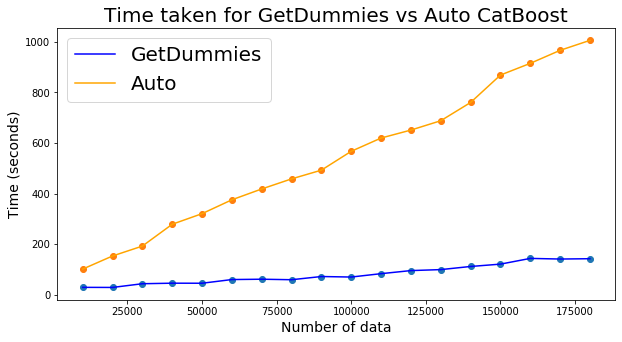

In [4]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(N_D, T_D, 'o')
ax.plot(N_D, T_D, 'blue', label = 'GetDummies')
ax.plot(N_A, T_A, 'o')
ax.plot(N_A, T_A, 'orange', label = 'Auto')
ax.set_title('Time taken for GetDummies vs Auto CatBoost', size = 20)
ax.set_xlabel('Number of data',fontsize = 14 )
ax.set_ylabel('Time (seconds)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()

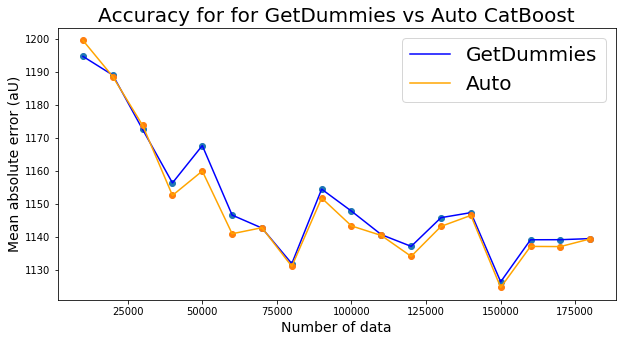

In [5]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(N_D, MAE_D, 'o')
ax.plot(N_D, MAE_D, 'blue', label = 'GetDummies')
ax.plot(N_A, MAE_A, 'o')
ax.plot(N_A, MAE_A, 'orange', label = 'Auto')
ax.set_title('Accuracy for for GetDummies vs Auto CatBoost', size = 20)
ax.set_xlabel('Number of data', fontsize = 14 )
ax.set_ylabel('Mean absolute error (aU)',fontsize = 14)
ax.legend(prop={'size': 20})
plt.show()